In [1]:
!unzip data.zip -d data

unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [3]:
heat_volume = pd.read_csv("../data/объём_теплоты.csv", delimiter=";")
temperatures = pd.read_csv("../data/температура.csv", delimiter=";")
house_characteristics = pd.read_csv("../data/характеристики_домов.csv", delimiter=";")

In [4]:
heat_volume.head()

address_uuid        date  value  is_unreliable
0  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-01  1.013              0
1  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-02  1.071              0
2  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-03  1.071              1
3  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-04  1.087              0
4  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-05  1.105              0

In [5]:
temperatures.head()

date_start                 date_end              temp  \
0  2017-10-01 00:00:00.000  2017-10-01 03:00:00.000  5,54000244140627   
1  2017-10-01 03:00:00.000  2017-10-01 06:00:00.000  5,86000976562502   
2  2017-10-01 06:00:00.000  2017-10-01 09:00:00.000  6,60000000000002   
3  2017-10-01 09:00:00.000  2017-10-01 12:00:00.000  9,52999267578127   
4  2017-10-01 12:00:00.000  2017-10-01 15:00:00.000  9,55001220703127   

           temp_max          temp_min  humidity  
0  5,54000244140627  4,86800537109377       100  
1  5,86000976562502  4,95900878906252       100  
2  6,60000000000002  5,76400146484377       100  
3  9,52999267578127  7,83098754882815        95  
4  9,55001220703127  8,61800537109377        87

In [6]:
house_characteristics.head()

address_uuid  build_year  floor_number  \
0  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
1  e68f3476-3f10-4374-b682-00de840dae3c      1978.0           5.0   
2  e9eb42b5-40b1-459b-b75d-00e01b3dca51      1975.0           5.0   
3  62f5beff-2753-490c-8115-01cfa320ee40      2002.0          10.0   
4  90d1cab6-1aa0-4c28-9df9-01f930e6dede      1967.0           5.0   

   residential_area wall_type  roof_area_total  roof_area_metal  \
0           4621.25     Блоки          1234.00              0.0   
1           2746.54  ж/б блок          1078.55              0.0   
2           5484.05    Кирпич          1835.00              0.0   
3           9641.17    Кирпич          1866.00              0.0   
4           1984.20    Кирпич           903.00              0.0   

   roof_area_web  roof_area_piece_goods  
0        1234.00                    0.0  
1        1078.55                    0.0  
2        1835.00                    0.0  
3        1866.00                    0.0  
4           0.00                  903.0

# Preprocessing

### Preprocessing for temperatures dataset

In [7]:
temperatures[:10]

date_start                 date_end              temp  \
0  2017-10-01 00:00:00.000  2017-10-01 03:00:00.000  5,54000244140627   
1  2017-10-01 03:00:00.000  2017-10-01 06:00:00.000  5,86000976562502   
2  2017-10-01 06:00:00.000  2017-10-01 09:00:00.000  6,60000000000002   
3  2017-10-01 09:00:00.000  2017-10-01 12:00:00.000  9,52999267578127   
4  2017-10-01 12:00:00.000  2017-10-01 15:00:00.000  9,55001220703127   
5  2017-10-01 15:00:00.000  2017-10-01 18:00:00.000  6,10000000000002   
6  2017-10-01 18:00:00.000  2017-10-01 21:00:00.000  4,96999511718752   
7  2017-10-01 21:00:00.000  2017-10-02 00:00:00.000  3,17000732421877   
8  2017-10-02 00:00:00.000  2017-10-02 03:00:00.000   3,2499938964844   
9  2017-10-02 03:00:00.000  2017-10-02 06:00:00.000   2,1299987792969   

           temp_max          temp_min  humidity  
0  5,54000244140627  4,86800537109377       100  
1  5,86000976562502  4,95900878906252       100  
2  6,60000000000002  5,76400146484377       100  
3  9,52999267578127  7,83098754882815        95  
4  9,55001220703127  8,61800537109377        87  
5  6,58999023437502  6,10000000000002        89  
6  5,43999633789065  4,96999511718752        91  
7  3,51799926757815  3,17000732421877       100  
8   3,2499938964844  2,86300048828127       100  
9   2,1299987792969  1,22298583984377        98

In [8]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8481 entries, 0 to 8480
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date_start  8481 non-null   object
 1   date_end    8481 non-null   object
 2   temp        8481 non-null   object
 3   temp_max    8481 non-null   object
 4   temp_min    8481 non-null   object
 5   humidity    8481 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 397.7+ KB


In [9]:
# convert date_start and date_end to datetime
temperatures["date_start"] = pd.to_datetime(temperatures["date_start"])
temperatures["date_end"] = pd.to_datetime(temperatures["date_end"])

# convert temp, temp_max and temp_min to float
temperatures["temp"] = temperatures["temp"].str.replace(',', '.').astype(float)
temperatures["temp_max"] = temperatures["temp_max"].str.replace(',', '.').astype(float)
temperatures["temp_min"] = temperatures["temp_min"].str.replace(',', '.').astype(float)

In [10]:
# after converted
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8481 entries, 0 to 8480
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_start  8481 non-null   datetime64[ns]
 1   date_end    8481 non-null   datetime64[ns]
 2   temp        8481 non-null   float64       
 3   temp_max    8481 non-null   float64       
 4   temp_min    8481 non-null   float64       
 5   humidity    8481 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(1)
memory usage: 397.7 KB


In [11]:
temperatures_daily = temperatures.groupby(temperatures["date_start"].dt.date).mean(['temp', 'temp_max', 'temp_min', 'humidity'])
temperatures_daily.index.rename('date', inplace=True)
temperatures_daily.index = pd.to_datetime(temperatures_daily.index)
temperatures_daily

temp   temp_max   temp_min  humidity
date                                                 
2017-10-01   6.415002   6.578500   5.785001    95.250
2017-10-02   4.072500   4.226373   3.015627    84.250
2017-10-03   6.515005   6.549005   5.193254    85.375
2017-10-04   3.240003   5.155126   3.009504    86.875
2017-10-05   8.136243   8.136243   6.659872    78.875
...               ...        ...        ...       ...
2022-04-26  14.933758  14.933758  14.880005    67.875
2022-04-27  15.307510  15.307510  15.073761    82.750
2022-04-28   9.338757   9.338757   9.338757    74.500
2022-04-29   5.462505   5.553757   5.462505    59.250
2022-04-30   6.772858   6.964290   6.765717    57.000

[1060 rows x 4 columns]

**Overview temperature**

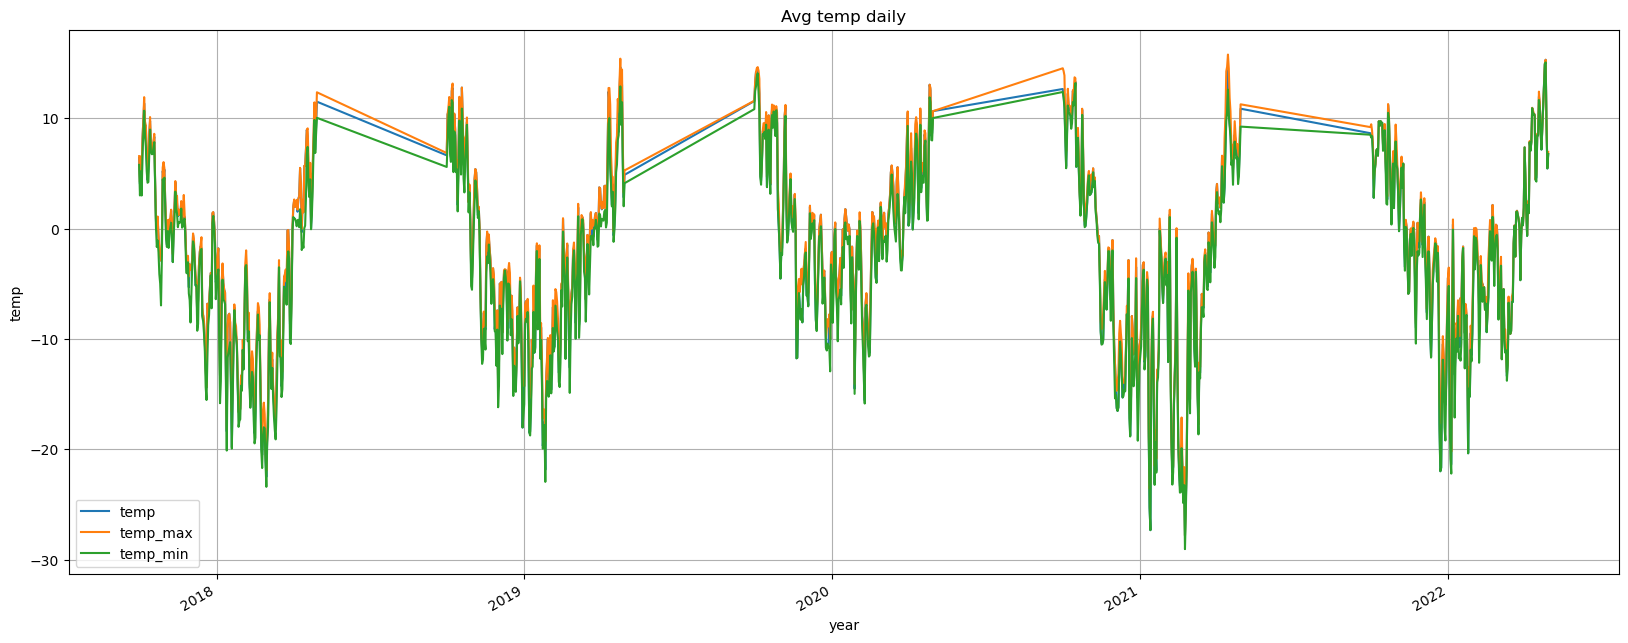

In [12]:
# plot mean temp daily
temperatures_daily['temp'].plot(figsize=(20, 8))
temperatures_daily['temp_max'].plot(figsize=(20, 8))
temperatures_daily['temp_min'].plot(figsize=(20, 8))

plt.title("Avg temp daily")
plt.xlabel("year")
plt.ylabel("temp")
plt.legend()
plt.grid()

In [13]:
# This graph above 
avail_month = temperatures_daily.index.month.unique()
avail_year = temperatures_daily.index.year.unique()
avail_month, avail_year


(Index([10, 11, 12, 1, 2, 3, 4], dtype='int32', name='date'),
 Index([2017, 2018, 2019, 2020, 2021, 2022], dtype='int32', name='date'))

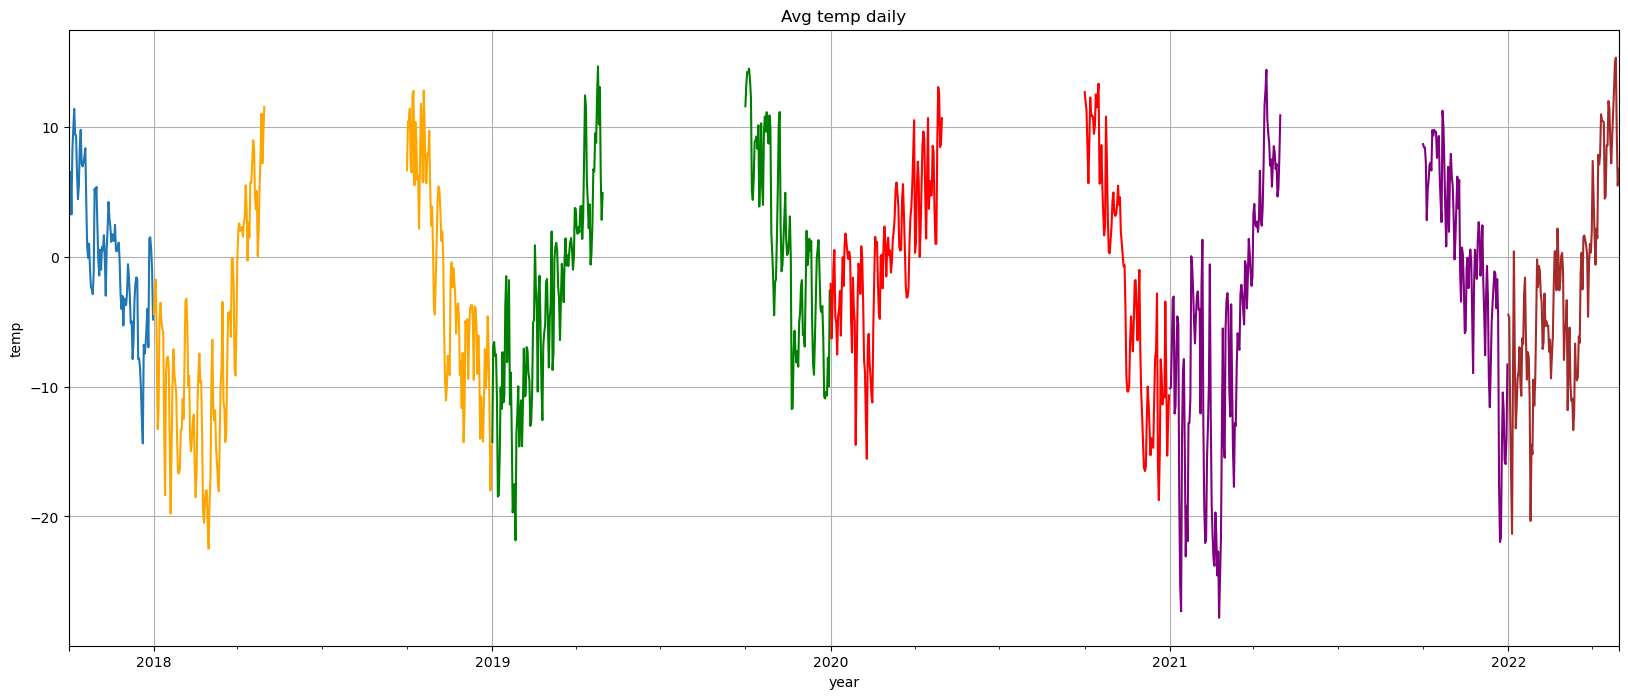

In [14]:
# plot mean temp daily
temperatures_daily[(temperatures_daily.index.year == 2017)]['temp'].plot(figsize=(20, 8))

temperatures_daily[(temperatures_daily.index.year == 2018) & (temperatures_daily.index.month <= 4)]['temp'].plot(figsize=(20, 8), color='orange')
temperatures_daily[(temperatures_daily.index.year == 2018) & (temperatures_daily.index.month >= 10)]['temp'].plot(figsize=(20, 8), color='orange')

temperatures_daily[(temperatures_daily.index.year == 2019) & (temperatures_daily.index.month <= 4)]['temp'].plot(figsize=(20, 8), color='green')
temperatures_daily[(temperatures_daily.index.year == 2019) & (temperatures_daily.index.month >= 10)]['temp'].plot(figsize=(20, 8), color='green')

temperatures_daily[(temperatures_daily.index.year == 2020) & (temperatures_daily.index.month <= 4)]['temp'].plot(figsize=(20, 8), color='red')
temperatures_daily[(temperatures_daily.index.year == 2020) & (temperatures_daily.index.month >= 10)]['temp'].plot(figsize=(20, 8), color='red')

temperatures_daily[(temperatures_daily.index.year == 2021) & (temperatures_daily.index.month <= 4)]['temp'].plot(figsize=(20, 8), color='purple')
temperatures_daily[(temperatures_daily.index.year == 2021) & (temperatures_daily.index.month >= 10)]['temp'].plot(figsize=(20, 8), color='purple')

temperatures_daily[(temperatures_daily.index.year == 2022)]['temp'].plot(figsize=(20, 8), color='brown')


plt.title("Avg temp daily")
plt.xlabel("year")
plt.ylabel("temp")
plt.grid()

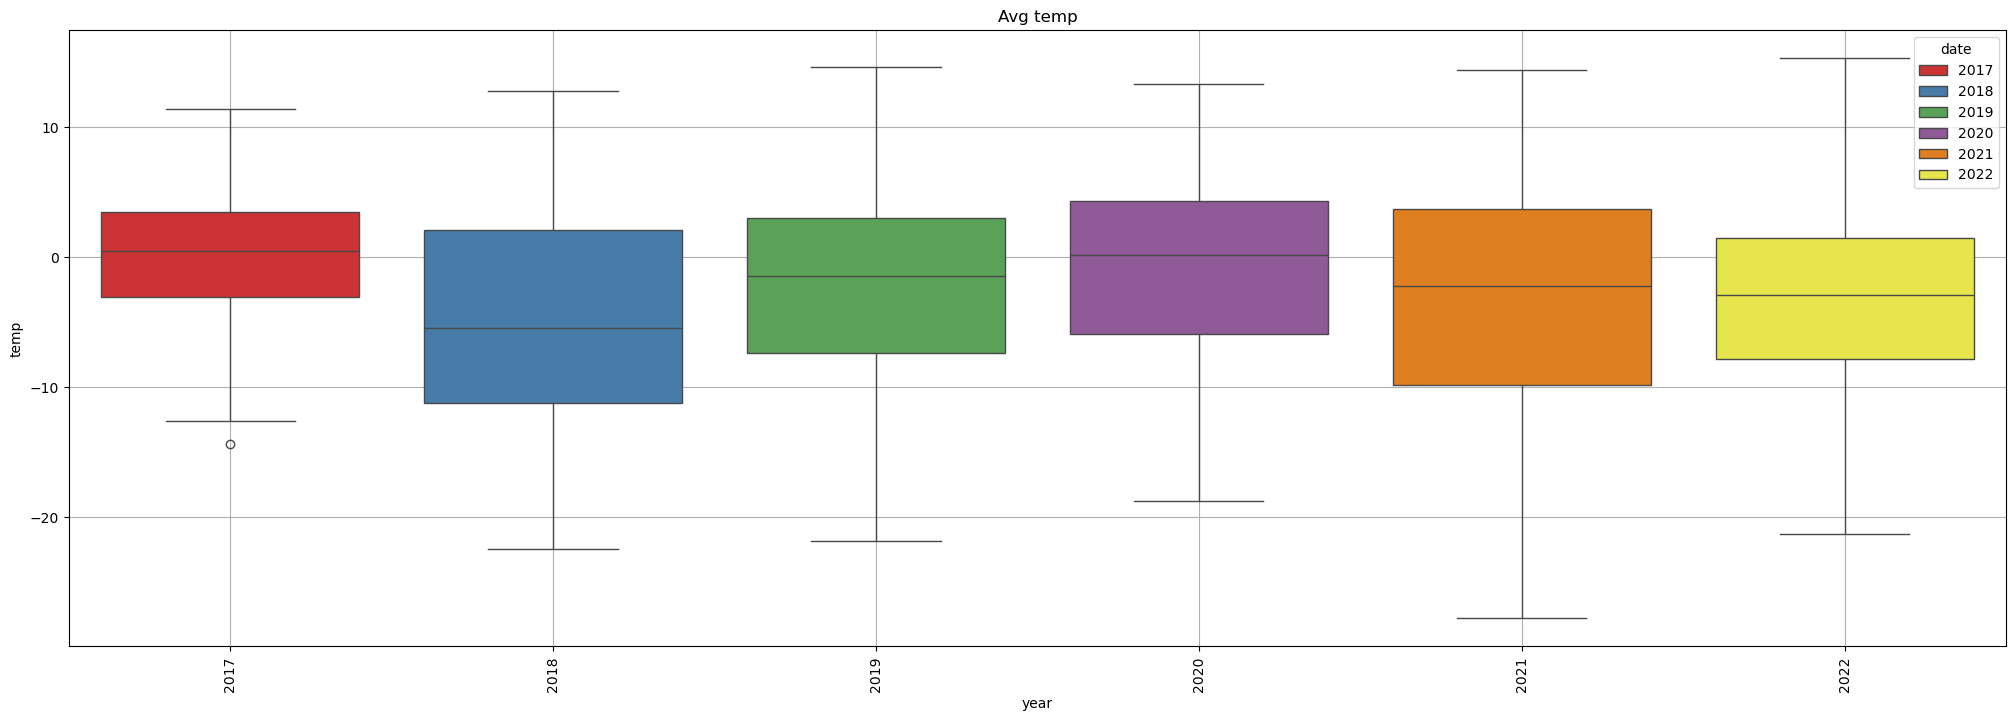

In [15]:
# boxplot by each year
_, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x=temperatures_daily.index.year, y=temperatures_daily['temp'].values, hue=temperatures_daily.index.year, ax=ax, palette='Set1')
plt.title("Avg temp")
plt.xlabel('year')
plt.ylabel('temp')
plt.xticks(rotation=90)
plt.grid()

In [16]:
# month plot
temperatures_mothly = temperatures_daily.copy()
temperatures_mothly['month'] = temperatures_daily.index.month
temperatures_mothly['year'] = temperatures_daily.index.year


temperatures_mothly = temperatures_mothly.groupby(['year', 'month']).mean()


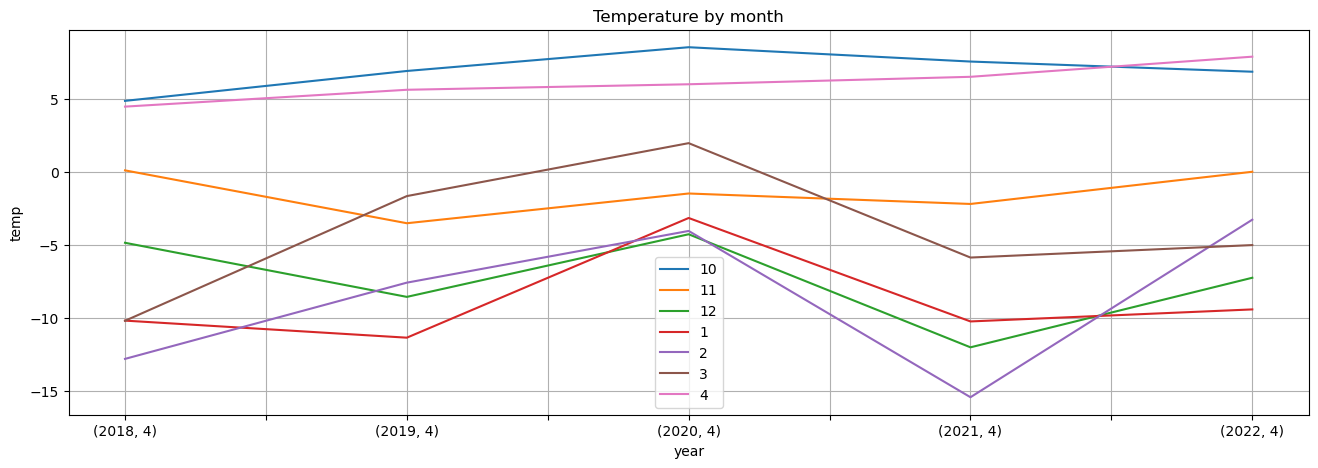

In [17]:
plt.figure(figsize=(16, 5))

for x in avail_month:
    temperatures_mothly.loc[(slice(None), x), :]['temp'].plot()

plt.title("Temperature by month")
# plt.xticks([])
plt.xlabel('year')
plt.ylabel('temp')

plt.legend(avail_month)
plt.grid()

**Overview humidity**

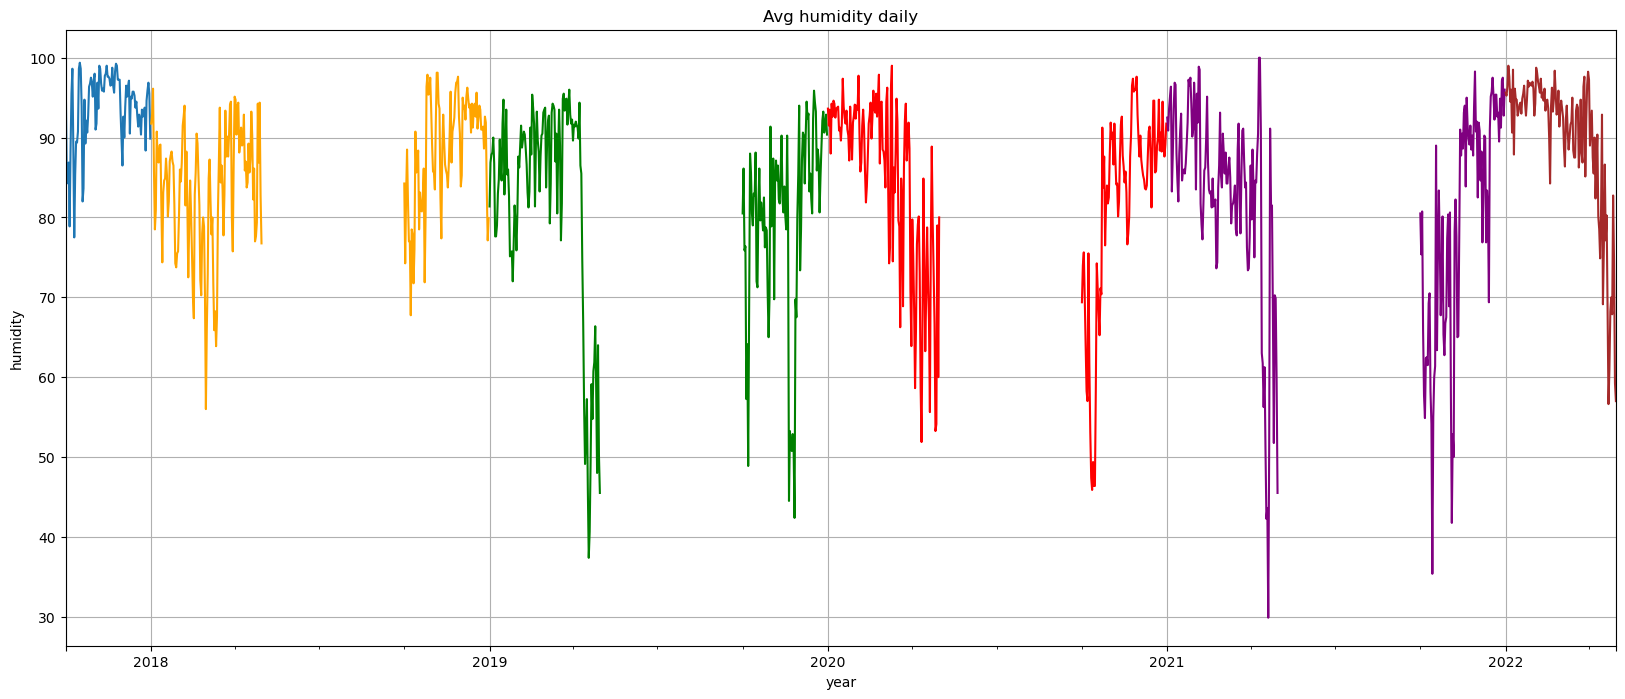

In [18]:
# plot mean humidity daily
temperatures_daily[(temperatures_daily.index.year == 2017)]['humidity'].plot(figsize=(20, 8))

temperatures_daily[(temperatures_daily.index.year == 2018) & (temperatures_daily.index.month <= 4)]['humidity'].plot(figsize=(20, 8), color='orange')
temperatures_daily[(temperatures_daily.index.year == 2018) & (temperatures_daily.index.month >= 10)]['humidity'].plot(figsize=(20, 8), color='orange')

temperatures_daily[(temperatures_daily.index.year == 2019) & (temperatures_daily.index.month <= 4)]['humidity'].plot(figsize=(20, 8), color='green')
temperatures_daily[(temperatures_daily.index.year == 2019) & (temperatures_daily.index.month >= 10)]['humidity'].plot(figsize=(20, 8), color='green')

temperatures_daily[(temperatures_daily.index.year == 2020) & (temperatures_daily.index.month <= 4)]['humidity'].plot(figsize=(20, 8), color='red')
temperatures_daily[(temperatures_daily.index.year == 2020) & (temperatures_daily.index.month >= 10)]['humidity'].plot(figsize=(20, 8), color='red')

temperatures_daily[(temperatures_daily.index.year == 2021) & (temperatures_daily.index.month <= 4)]['humidity'].plot(figsize=(20, 8), color='purple')
temperatures_daily[(temperatures_daily.index.year == 2021) & (temperatures_daily.index.month >= 10)]['humidity'].plot(figsize=(20, 8), color='purple')

temperatures_daily[(temperatures_daily.index.year == 2022)]['humidity'].plot(figsize=(20, 8), color='brown')


plt.title("Avg humidity daily")
plt.xlabel("year")
plt.ylabel("humidity")
plt.grid()

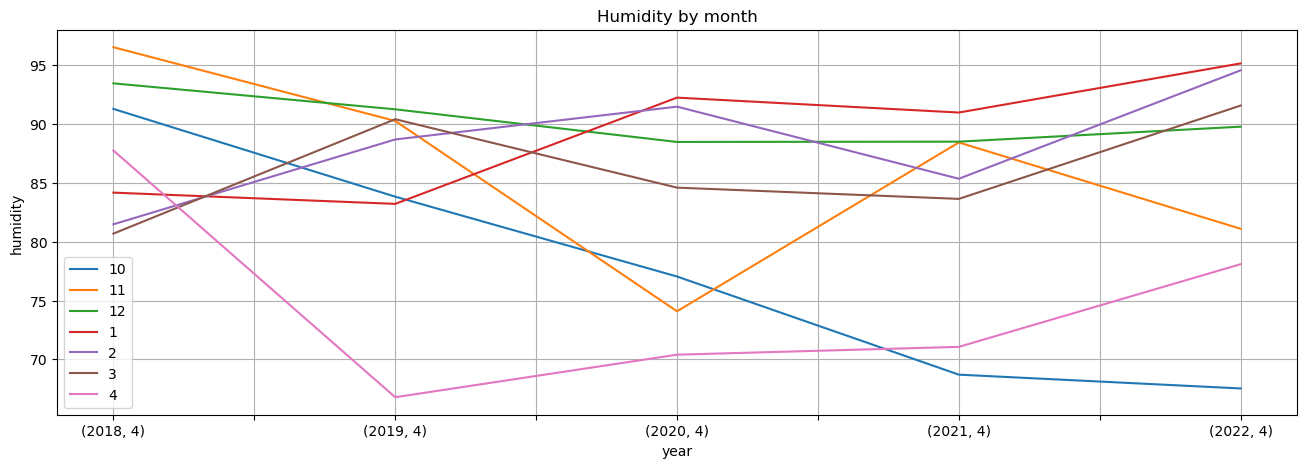

In [19]:
plt.figure(figsize=(16, 5))

for x in avail_month:
    temperatures_mothly.loc[(slice(None), x), :]['humidity'].plot()

plt.title("Humidity by month")
# plt.xticks([])
plt.xlabel('year')
plt.ylabel('humidity')

plt.legend(avail_month)
plt.grid()

### Preprocessing for house_characteristics dataset

In [20]:
house_characteristics.shape

(564, 9)

In [21]:
# drop duplicate if have
house_characteristics.drop_duplicates(inplace=True)

In [22]:
# handle missing data
house_characteristics.isna().sum()

address_uuid              0
build_year                1
floor_number             16
residential_area         18
wall_type                13
roof_area_total          28
roof_area_metal          22
roof_area_web            21
roof_area_piece_goods    22
dtype: int64

In [23]:
# ffill for build_year and floor_year
house_characteristics['build_year'] = house_characteristics['build_year'].ffill()
house_characteristics['floor_number'] = house_characteristics['floor_number'].ffill()

In [24]:
# filling avg for other features missing
house_characteristics['residential_area'] = house_characteristics['residential_area'].fillna(house_characteristics['residential_area'].mean())
house_characteristics['roof_area_total'] = house_characteristics['roof_area_total'].fillna(house_characteristics['roof_area_total'].mean())
house_characteristics['roof_area_metal'] = house_characteristics['roof_area_metal'].fillna(house_characteristics['roof_area_metal'].mean())
house_characteristics['roof_area_web'] = house_characteristics['roof_area_web'].fillna(house_characteristics['roof_area_web'].mean())
house_characteristics['roof_area_piece_goods'] = house_characteristics['roof_area_piece_goods'].fillna(house_characteristics['roof_area_piece_goods'].mean())

In [25]:
# filling most frequent for category feature missing
most_frequent = house_characteristics['wall_type'].value_counts().index[0]
house_characteristics['wall_type'] = house_characteristics['wall_type'].fillna(most_frequent)

# enconding for category feature
label_encoder = preprocessing.LabelEncoder()
house_characteristics['wall_type'] = label_encoder.fit_transform(house_characteristics['wall_type'])

In [26]:
house_characteristics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address_uuid           564 non-null    object 
 1   build_year             564 non-null    float64
 2   floor_number           564 non-null    float64
 3   residential_area       564 non-null    float64
 4   wall_type              564 non-null    int64  
 5   roof_area_total        564 non-null    float64
 6   roof_area_metal        564 non-null    float64
 7   roof_area_web          564 non-null    float64
 8   roof_area_piece_goods  564 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 39.8+ KB


In [27]:
# convert build_year to int
house_characteristics["build_year"] = house_characteristics["build_year"].astype(int)
# convert floor_number to int
house_characteristics["floor_number"] = house_characteristics["floor_number"].astype(int)

### Preprocessing for heat_volume dataset

In [28]:
heat_volume.head(10)

address_uuid        date  value  is_unreliable
0  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-01  1.013              0
1  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-02  1.071              0
2  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-03  1.071              1
3  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-04  1.087              0
4  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-05  1.105              0
5  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-06  1.112              0
6  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-07  1.085              0
7  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-08  1.077              0
8  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-09  1.094              0
9  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-10  1.074              0

In [29]:
heat_volume.shape

(701675, 4)

In [30]:
# drop duplicates if have
heat_volume = heat_volume.drop_duplicates()
heat_volume.shape

(701675, 4)

In [31]:
# check nan value
heat_volume.isna().sum()

address_uuid     0
date             0
value            0
is_unreliable    0
dtype: int64

In [32]:
heat_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701675 entries, 0 to 701674
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   address_uuid   701675 non-null  object 
 1   date           701675 non-null  object 
 2   value          701675 non-null  float64
 3   is_unreliable  701675 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 21.4+ MB


In [33]:
# convert date to datetime
heat_volume['date'] = pd.to_datetime(heat_volume["date"])

In [34]:
start_date = heat_volume.date.min()
end_date = heat_volume.date.max()

start_date, end_date

(Timestamp('2017-10-01 00:00:00'), Timestamp('2022-04-30 00:00:00'))

In [35]:
heat_volume["address_uuid"].unique().shape

(732,)

In [36]:
# just keep uuid house available in house_characteristics dataset
heat_volume_extracted = heat_volume[heat_volume["address_uuid"].isin(house_characteristics["address_uuid"])]

In [37]:
heat_volume_extracted["address_uuid"].unique().shape
# => 10 houses have data in house_characteris but not have in heat_volume

(554,)

In [38]:
heat_volume_extracted.reset_index(drop=True, inplace=True)

In [39]:
heat_volume_extracted

address_uuid       date  value  is_unreliable
0       0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5 2017-10-01  1.013              0
1       0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5 2017-10-02  1.071              0
2       0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5 2017-10-03  1.071              1
3       0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5 2017-10-04  1.087              0
4       0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5 2017-10-05  1.105              0
...                                      ...        ...    ...            ...
564957  ff87b2b7-4a10-44e9-9d0f-4bb145f05b60 2022-04-26  0.000              0
564958  ff87b2b7-4a10-44e9-9d0f-4bb145f05b60 2022-04-27  0.000              0
564959  ff87b2b7-4a10-44e9-9d0f-4bb145f05b60 2022-04-28  0.000              1
564960  ff87b2b7-4a10-44e9-9d0f-4bb145f05b60 2022-04-29  0.000              0
564961  ff87b2b7-4a10-44e9-9d0f-4bb145f05b60 2022-04-30  0.000              0

[564962 rows x 4 columns]

In [40]:
heat_volume_extracted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564962 entries, 0 to 564961
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   address_uuid   564962 non-null  object        
 1   date           564962 non-null  datetime64[ns]
 2   value          564962 non-null  float64       
 3   is_unreliable  564962 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 17.2+ MB


In [41]:
heat_volume_extracted["address_uuid"].value_counts()

address_uuid
ff87b2b7-4a10-44e9-9d0f-4bb145f05b60    1061
d19dd161-c290-4364-aca9-b6eb3738f3c9    1061
e7e21d61-7891-4db0-9a88-0fe3de314aaa    1061
96db4ee3-d1da-4708-975e-71af57c0732c    1061
b58cf9fa-b2fb-45c1-9b2d-72b1023b9750    1061
                                        ... 
8b12c84c-7900-4157-9607-9d610c2c26ca     120
4e81db29-d16a-491f-bac6-4c08ed920a9f      67
8bd868f3-1f18-467d-a4a8-5073b24d188c      67
fb8b2faf-778f-48c0-95e6-762bf558980b      65
86cf8731-c2be-482b-b239-3b32f6a5cbf4      57
Name: count, Length: 554, dtype: int64

In [42]:
id_address_example = heat_volume_extracted["address_uuid"].value_counts().index[0]
id_address_example

'ff87b2b7-4a10-44e9-9d0f-4bb145f05b60'

In [43]:
heat_volume_extracted_address_sample = heat_volume_extracted[heat_volume_extracted["address_uuid"] == id_address_example]
heat_volume_extracted_address_sample.shape

(1061, 4)

<Axes: xlabel='date'>

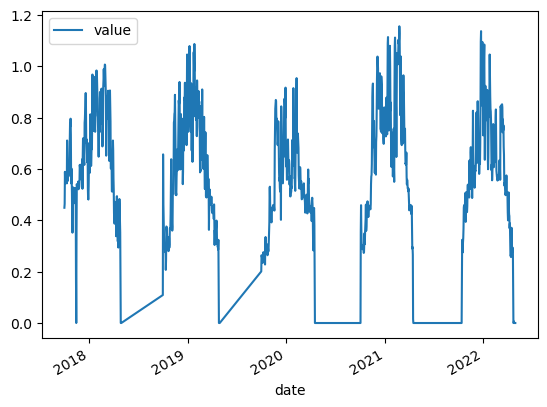

In [44]:
heat_volume_extracted_address_sample.plot(x='date', y='value')

**Comment**: heat usage is high during the middle of winter and gradually decreases at the beginning and end of the season

# Merge data from three datasets

In [45]:
print(heat_volume_extracted.shape)
heat_volume_extracted.head()

(564962, 4)


address_uuid       date  value  is_unreliable
0  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5 2017-10-01  1.013              0
1  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5 2017-10-02  1.071              0
2  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5 2017-10-03  1.071              1
3  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5 2017-10-04  1.087              0
4  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5 2017-10-05  1.105              0

In [46]:
print(house_characteristics.shape)
house_characteristics.head()

(564, 9)


address_uuid  build_year  floor_number  \
0  82c2ad6e-27db-4541-8e5d-00163bbe622e        1976             5   
1  e68f3476-3f10-4374-b682-00de840dae3c        1978             5   
2  e9eb42b5-40b1-459b-b75d-00e01b3dca51        1975             5   
3  62f5beff-2753-490c-8115-01cfa320ee40        2002            10   
4  90d1cab6-1aa0-4c28-9df9-01f930e6dede        1967             5   

   residential_area  wall_type  roof_area_total  roof_area_metal  \
0           4621.25          0          1234.00              0.0   
1           2746.54          7          1078.55              0.0   
2           5484.05          3          1835.00              0.0   
3           9641.17          3          1866.00              0.0   
4           1984.20          3           903.00              0.0   

   roof_area_web  roof_area_piece_goods  
0        1234.00                    0.0  
1        1078.55                    0.0  
2        1835.00                    0.0  
3        1866.00                    0.0  
4           0.00                  903.0

In [47]:
print(temperatures_daily.shape)
temperatures_daily.head()

(1060, 4)


temp  temp_max  temp_min  humidity
date                                              
2017-10-01  6.415002  6.578500  5.785001    95.250
2017-10-02  4.072500  4.226373  3.015627    84.250
2017-10-03  6.515005  6.549005  5.193254    85.375
2017-10-04  3.240003  5.155126  3.009504    86.875
2017-10-05  8.136243  8.136243  6.659872    78.875

In [48]:
temperatures_daily.reset_index()

date       temp   temp_max   temp_min  humidity
0    2017-10-01   6.415002   6.578500   5.785001    95.250
1    2017-10-02   4.072500   4.226373   3.015627    84.250
2    2017-10-03   6.515005   6.549005   5.193254    85.375
3    2017-10-04   3.240003   5.155126   3.009504    86.875
4    2017-10-05   8.136243   8.136243   6.659872    78.875
...         ...        ...        ...        ...       ...
1055 2022-04-26  14.933758  14.933758  14.880005    67.875
1056 2022-04-27  15.307510  15.307510  15.073761    82.750
1057 2022-04-28   9.338757   9.338757   9.338757    74.500
1058 2022-04-29   5.462505   5.553757   5.462505    59.250
1059 2022-04-30   6.772858   6.964290   6.765717    57.000

[1060 rows x 5 columns]

In [49]:
heat_volume_merge = pd.merge(heat_volume_extracted, temperatures_daily.reset_index(), on='date', how='left')

In [50]:
heat_volume_merge = pd.merge(heat_volume_merge, house_characteristics, on='address_uuid', how='left')

In [51]:
heat_volume_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572161 entries, 0 to 572160
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   address_uuid           572161 non-null  object        
 1   date                   572161 non-null  datetime64[ns]
 2   value                  572161 non-null  float64       
 3   is_unreliable          572161 non-null  int64         
 4   temp                   571600 non-null  float64       
 5   temp_max               571600 non-null  float64       
 6   temp_min               571600 non-null  float64       
 7   humidity               571600 non-null  float64       
 8   build_year             572161 non-null  int64         
 9   floor_number           572161 non-null  int64         
 10  residential_area       572161 non-null  float64       
 11  wall_type              572161 non-null  int64         
 12  roof_area_total        572161 non-null  floa

# Time Series forcasting

**Forscasting for one house**

In [52]:
data_one_house_extracted = heat_volume_merge[heat_volume_merge["address_uuid"] == id_address_example]

<Axes: xlabel='date'>

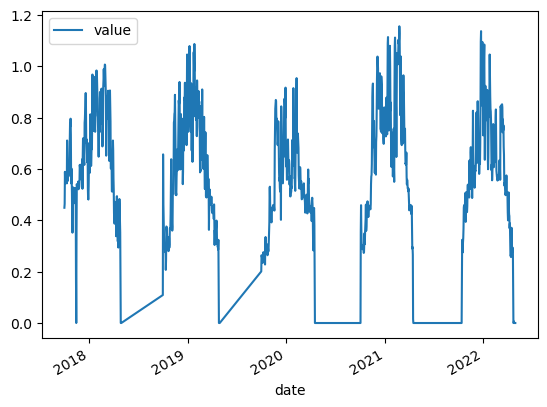

In [53]:
data_one_house_extracted.plot(x='date', y='value')

In [54]:
train_data_one_house_extracted = data_one_house_extracted[data_one_house_extracted['date'] < '2021-10-1']
test_data_one_house_extracted = data_one_house_extracted[data_one_house_extracted['date'] >= '2021-10-1']

In [55]:
train_data_one_house_extracted.shape, test_data_one_house_extracted.shape

((849, 16), (212, 16))

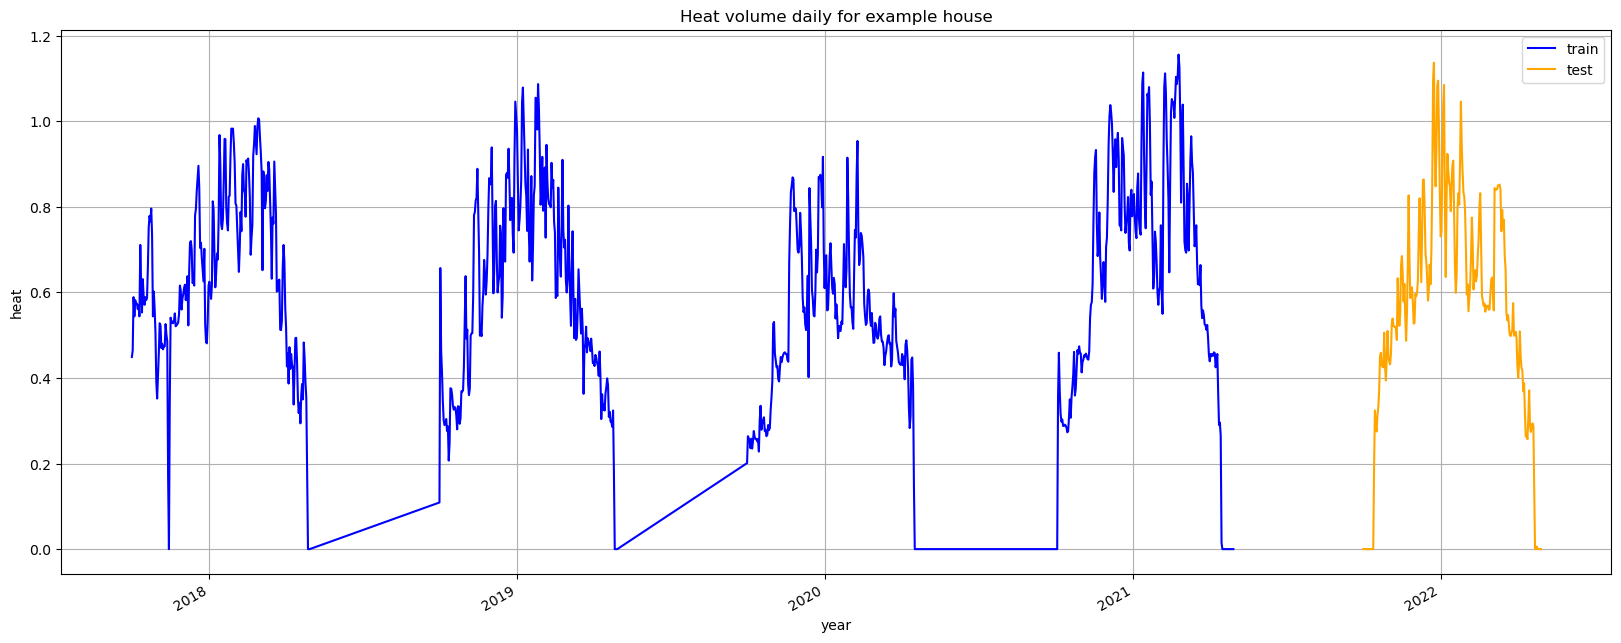

In [56]:
fig, ax = plt.subplots(figsize=(20, 8))

train_data_one_house_extracted.plot(x='date', y='value', color='blue', ax=ax, label='train')
test_data_one_house_extracted.plot(x='date', y='value', color='orange', ax=ax, label='test')
plt.title("Heat volume daily for example house")
plt.xlabel("year")
plt.ylabel("heat")
plt.grid()

In [57]:
x_train_one_house = train_data_one_house_extracted.drop('value', axis=1)
y_train_one_house = train_data_one_house_extracted['value']

x_test_one_house = test_data_one_house_extracted.drop('value', axis=1)
y_test_one_house = test_data_one_house_extracted['value']

**Model training with Prophet**

In [58]:
# !pip install Cython

In [59]:
# !pip install pystan==2.18.0.0

In [60]:
# !pip install fbprophet

In [61]:
from sklearn.metrics import mean_absolute_error

In [62]:
train_data_one_house_cp = train_data_one_house_extracted.copy()
# train_data_one_house_cp.rename(columns={'date': 'ds', 'value': 'y'}, inplace=True)
# train_data_one_house_cp.set_index("address_uuid", inplace=True)
train_data_one_house_cp.head()

address_uuid       date  value  is_unreliable  \
571100  ff87b2b7-4a10-44e9-9d0f-4bb145f05b60 2017-10-01  0.449              0   
571101  ff87b2b7-4a10-44e9-9d0f-4bb145f05b60 2017-10-02  0.464              0   
571102  ff87b2b7-4a10-44e9-9d0f-4bb145f05b60 2017-10-03  0.589              0   
571103  ff87b2b7-4a10-44e9-9d0f-4bb145f05b60 2017-10-04  0.544              0   
571104  ff87b2b7-4a10-44e9-9d0f-4bb145f05b60 2017-10-05  0.582              0   

            temp  temp_max  temp_min  humidity  build_year  floor_number  \
571100  6.415002  6.578500  5.785001    95.250        1904             9   
571101  4.072500  4.226373  3.015627    84.250        1904             9   
571102  6.515005  6.549005  5.193254    85.375        1904             9   
571103  3.240003  5.155126  3.009504    86.875        1904             9   
571104  8.136243  8.136243  6.659872    78.875        1904             9   

        residential_area  wall_type  roof_area_total  roof_area_metal  \
571100       3640.995236          3       912.150981        56.043856   
571101       3640.995236          3       912.150981        56.043856   
571102       3640.995236          3       912.150981        56.043856   
571103       3640.995236          3       912.150981        56.043856   
571104       3640.995236          3       912.150981        56.043856   

        roof_area_web  roof_area_piece_goods  
571100     738.877709             113.989705  
571101     738.877709             113.989705  
571102     738.877709             113.989705  
571103     738.877709             113.989705  
571104     738.877709             113.989705

In [63]:
valid_data_one_house_cp = test_data_one_house_extracted.copy()

### Analysis with Statsmodels

**Using statsmodels to get the trend**

In [64]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [65]:
heat_volume_cycle, heat_volume_trend = hpfilter(train_data_one_house_cp['value'], lamb=1600)

([], [])

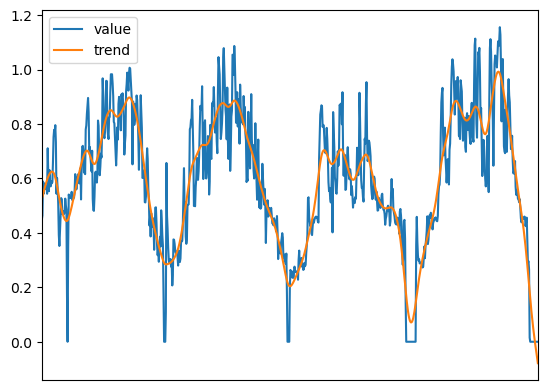

In [66]:
train_data_one_house_cp['trend'] = heat_volume_trend
train_data_one_house_cp[['value', 'trend']].plot().autoscale(axis='x', tight=True)
plt.xticks([])

**Extracted valid dataset**

In [67]:
valid_data_one_house_ext = valid_data_one_house_cp[["date", "value"]]

**ETS model**

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [69]:
train_data_one_house_ext = train_data_one_house_cp[["date", "value"]]

In [70]:
train_data_one_house_ext.set_index("date", inplace=True)
train_data_one_house_ext.sort_index(inplace=True)

In [71]:
decompose_data = seasonal_decompose(train_data_one_house_ext.asfreq('MS'), model="additive")
decompose_data.plot()

ValueError: This function does not handle missing values

In [72]:
train_data_one_house_ext.index.min()

Timestamp('2017-10-01 00:00:00')

In [73]:
pd.date_range(start=train_data_one_house_ext.index.min(), end=train_data_one_house_ext.index.max()).difference(train_data_one_house_ext.index)

DatetimeIndex(['2018-05-01', '2018-05-02', '2018-05-03', '2018-05-04',
               '2018-05-05', '2018-05-06', '2018-05-07', '2018-05-08',
               '2018-05-09', '2018-05-10',
               ...
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28',
               '2020-09-29', '2020-09-30'],
              dtype='datetime64[ns]', length=459, freq=None)

In [74]:
dump_df = pd.DataFrame(pd.date_range(start=train_data_one_house_ext.index.min(), end=train_data_one_house_ext.index.max()))
# dump_df["value"] = 0
dump_df.rename(columns={0: "date"}, inplace=True)
dump_df.set_index("date", inplace=True)
dump_df

Empty DataFrame
Columns: []
Index: [2017-10-01 00:00:00, 2017-10-02 00:00:00, 2017-10-03 00:00:00, 2017-10-04 00:00:00, 2017-10-05 00:00:00, 2017-10-06 00:00:00, 2017-10-07 00:00:00, 2017-10-08 00:00:00, 2017-10-09 00:00:00, 2017-10-10 00:00:00, 2017-10-11 00:00:00, 2017-10-12 00:00:00, 2017-10-13 00:00:00, 2017-10-14 00:00:00, 2017-10-15 00:00:00, 2017-10-16 00:00:00, 2017-10-17 00:00:00, 2017-10-18 00:00:00, 2017-10-19 00:00:00, 2017-10-20 00:00:00, 2017-10-21 00:00:00, 2017-10-22 00:00:00, 2017-10-23 00:00:00, 2017-10-24 00:00:00, 2017-10-25 00:00:00, 2017-10-26 00:00:00, 2017-10-27 00:00:00, 2017-10-28 00:00:00, 2017-10-29 00:00:00, 2017-10-30 00:00:00, 2017-10-31 00:00:00, 2017-11-01 00:00:00, 2017-11-02 00:00:00, 2017-11-03 00:00:00, 2017-11-04 00:00:00, 2017-11-05 00:00:00, 2017-11-06 00:00:00, 2017-11-07 00:00:00, 2017-11-08 00:00:00, 2017-11-09 00:00:00, 2017-11-10 00:00:00, 2017-11-11 00:00:00, 2017-11-12 00:00:00, 2017-11-13 00:00:00, 2017-11-14 00:00:00, 2017-11-15 00:00:00, 2017-11-16 00:00:00, 2017-11-17 00:00:00, 2017-11-18 00:00:00, 2017-11-19 00:00:00, 2017-11-20 00:00:00, 2017-11-21 00:00:00, 2017-11-22 00:00:00, 2017-11-23 00:00:00, 2017-11-24 00:00:00, 2017-11-25 00:00:00, 2017-11-26 00:00:00, 2017-11-27 00:00:00, 2017-11-28 00:00:00, 2017-11-29 00:00:00, 2017-11-30 00:00:00, 2017-12-01 00:00:00, 2017-12-02 00:00:00, 2017-12-03 00:00:00, 2017-12-04 00:00:00, 2017-12-05 00:00:00, 2017-12-06 00:00:00, 2017-12-07 00:00:00, 2017-12-08 00:00:00, 2017-12-09 00:00:00, 2017-12-10 00:00:00, 2017-12-11 00:00:00, 2017-12-12 00:00:00, 2017-12-13 00:00:00, 2017-12-14 00:00:00, 2017-12-15 00:00:00, 2017-12-16 00:00:00, 2017-12-17 00:00:00, 2017-12-18 00:00:00, 2017-12-19 00:00:00, 2017-12-20 00:00:00, 2017-12-21 00:00:00, 2017-12-22 00:00:00, 2017-12-23 00:00:00, 2017-12-24 00:00:00, 2017-12-25 00:00:00, 2017-12-26 00:00:00, 2017-12-27 00:00:00, 2017-12-28 00:00:00, 2017-12-29 00:00:00, 2017-12-30 00:00:00, 2017-12-31 00:00:00, 2018-01-01 00:00:00, 2018-01-02 00:00:00, 2018-01-03 00:00:00, 2018-01-04 00:00:00, 2018-01-05 00:00:00, 2018-01-06 00:00:00, 2018-01-07 00:00:00, 2018-01-08 00:00:00, ...]

[1308 rows x 0 columns]

In [75]:
train_data_one_house_merge = pd.merge(dump_df, train_data_one_house_ext, on='date', how='left')

In [76]:
print(train_data_one_house_merge.shape)
train_data_one_house_merge["value"] = train_data_one_house_merge["value"].fillna(0)

(1308, 1)


<Axes: xlabel='date'>

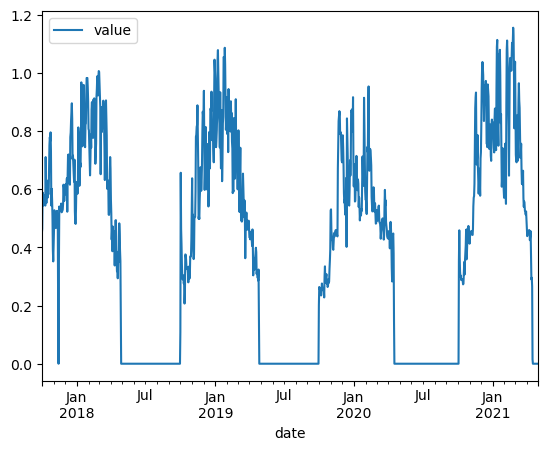

In [77]:
train_data_one_house_merge.plot()

In [78]:
train_data_one_house_merge.isna().sum()

value    0
dtype: int64

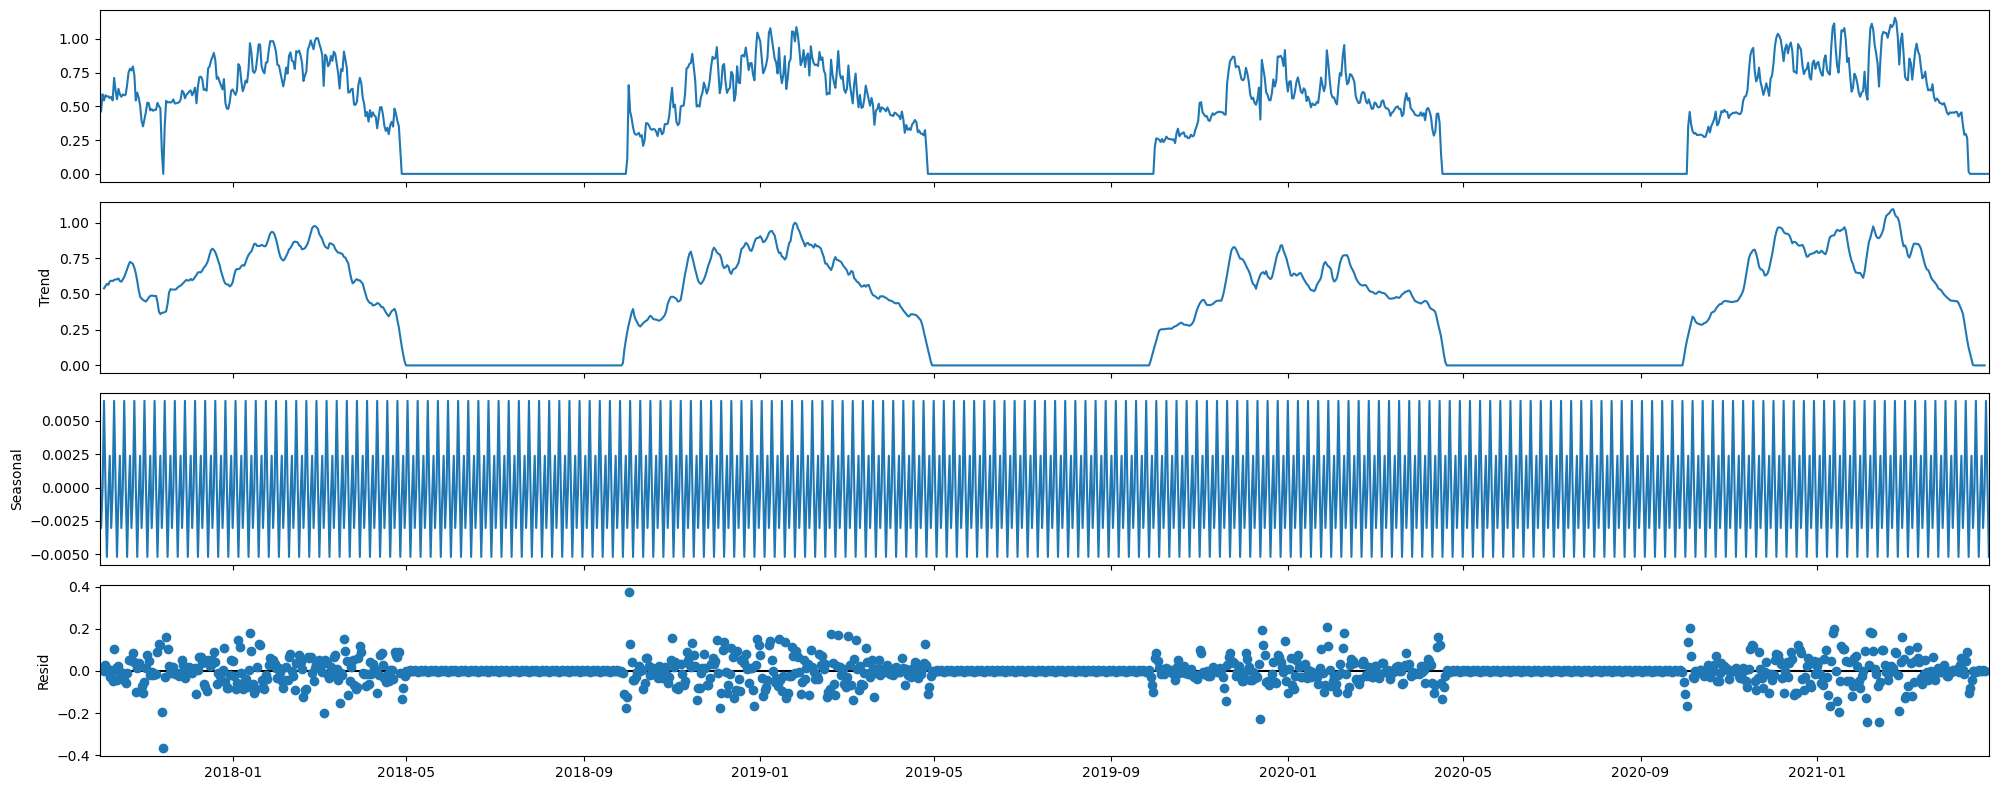

In [79]:
# Change default figsize
plt.rc("figure",figsize=(20,8))

PERIOD = 48*180
decompose_data = seasonal_decompose(train_data_one_house_merge, model="additive")
decompose_data.plot();
plt.show()

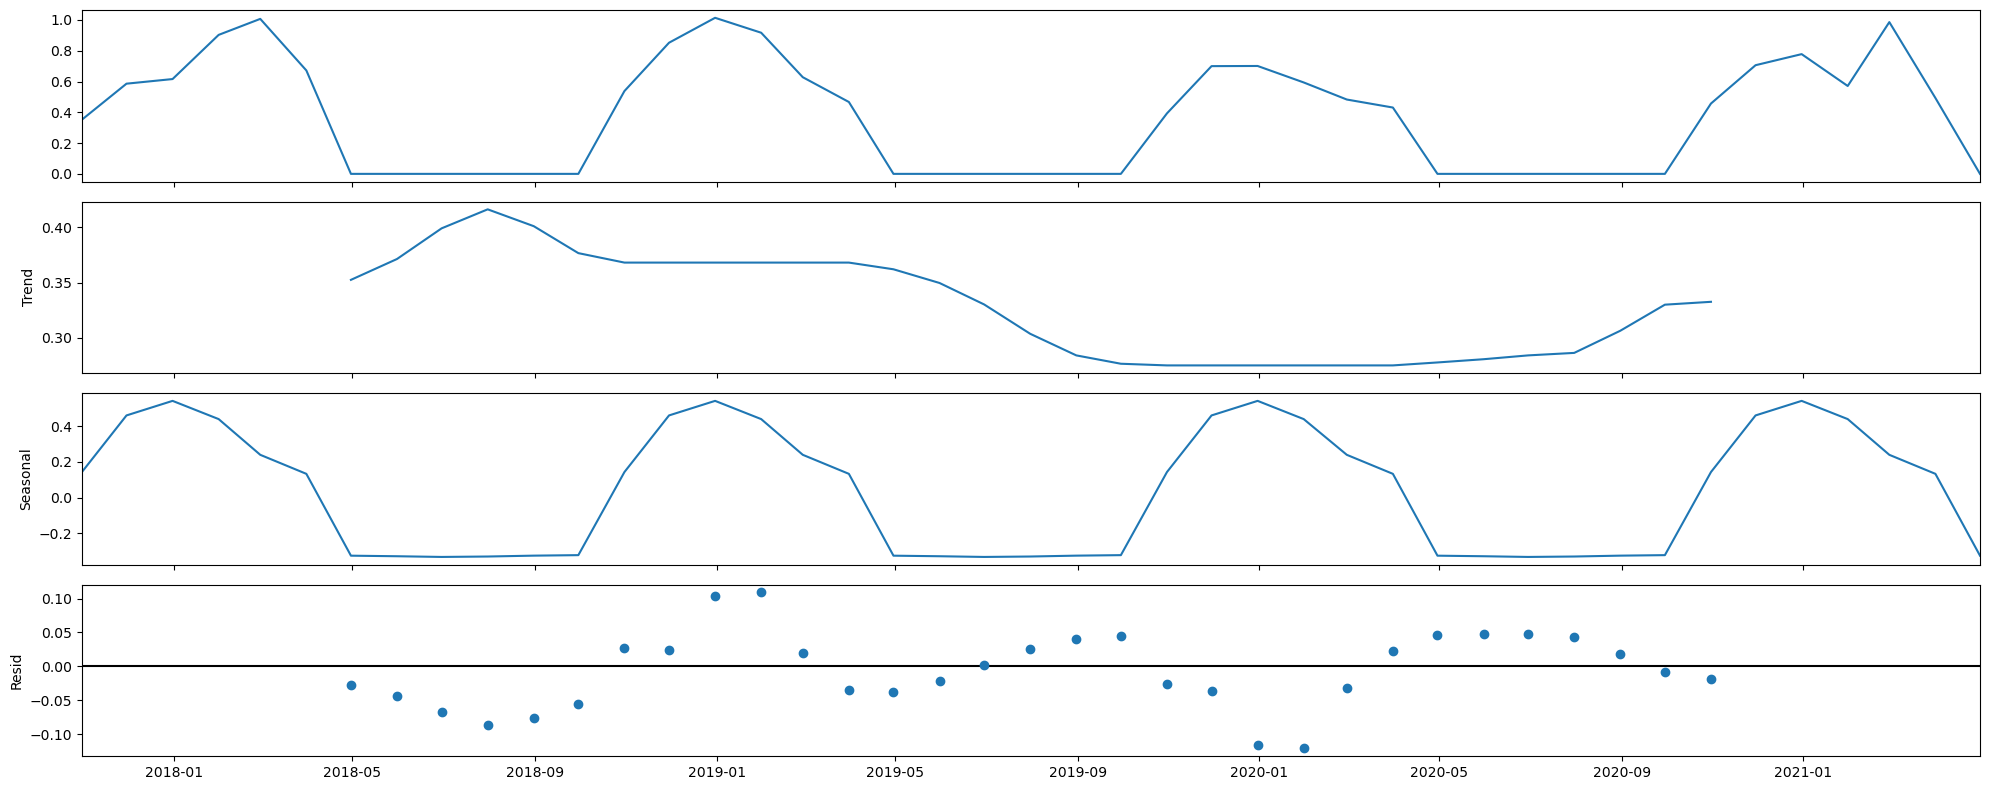

In [80]:
# decomposition by month period
# Change default figsize
plt.rc("figure",figsize=(20,8))

PERIOD = 48*180
decompose_data = seasonal_decompose(train_data_one_house_merge.asfreq('M'), model="additive")
decompose_data.plot();
plt.show()

# Time Series Models

### Prophet

In [81]:
from sklearn.metrics import mean_absolute_error
from prophet import Prophet
from xgboost import XGBRegressor

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [82]:
prophet_model = Prophet(interval_width=0.95)


In [83]:
prophet_train_data = train_data_one_house_merge.reset_index()
prophet_train_data = prophet_train_data.rename(columns={"date": "ds", "value": "y"})


In [84]:
prophet_valid_data = valid_data_one_house_ext.rename(columns={"date": "ds", "value": "y"})

In [85]:
prophet_model.fit(prophet_train_data)

16:32:49 - cmdstanpy - INFO - Chain [1] start processing
16:32:49 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
prophet_pred = prophet_model.predict(prophet_valid_data[["ds"]])
prophet_pred.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2021-10-01  0.473842    0.093574    0.507295     0.473842     0.473842   
1 2021-10-02  0.474180    0.119790    0.548245     0.474180     0.474180   
2 2021-10-03  0.474518    0.138084    0.586194     0.474513     0.474520   
3 2021-10-04  0.474856    0.163951    0.596642     0.474827     0.474876   
4 2021-10-05  0.475194    0.186501    0.604836     0.475145     0.475232   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -0.162334             -0.162334             -0.162334 -0.005700   
1       -0.136883             -0.136883             -0.136883 -0.001087   
2       -0.112278             -0.112278             -0.112278  0.002871   
3       -0.097740             -0.097740             -0.097740 -0.002828   
4       -0.074907             -0.074907             -0.074907  0.000389   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0     -0.005700     -0.005700 -0.156634     -0.156634     -0.156634   
1     -0.001087     -0.001087 -0.135796     -0.135796     -0.135796   
2      0.002871      0.002871 -0.115149     -0.115149     -0.115149   
3     -0.002828     -0.002828 -0.094912     -0.094912     -0.094912   
4      0.000389      0.000389 -0.075296     -0.075296     -0.075296   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  0.311508  
1                         0.0  0.337297  
2                         0.0  0.362240  
3                         0.0  0.377116  
4                         0.0  0.400287

In [87]:
mae = round(mean_absolute_error(prophet_valid_data['y'], prophet_pred['yhat']), 3)

mae

0.198

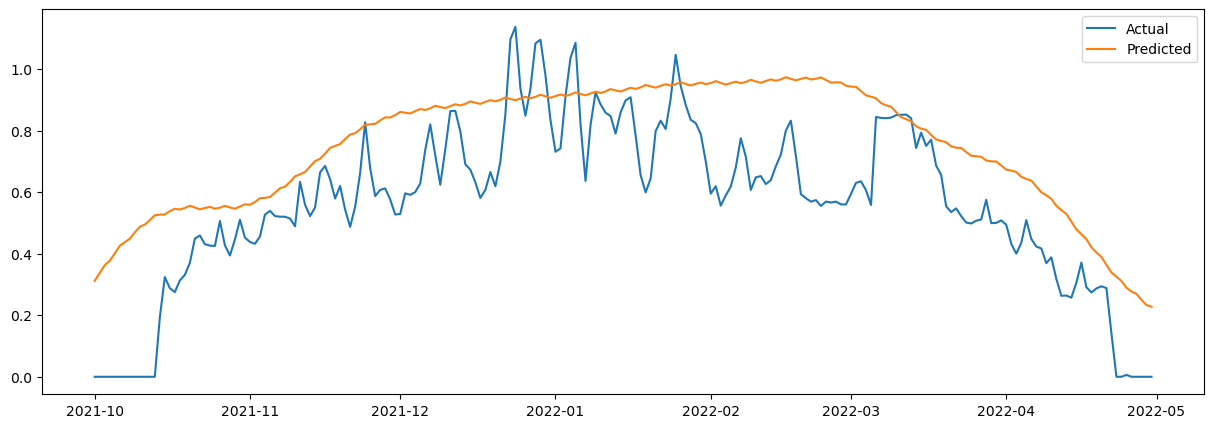

In [88]:
plt.figure(figsize=(15,5))
plt.plot(prophet_valid_data['ds'], prophet_valid_data['y'], label='Actual')
plt.plot(prophet_pred['ds'], prophet_pred['yhat'], label='Predicted')
plt.legend()

### XGBoost

In [89]:
def date_transform(data):
    df = data.copy()
    
    df['Hour'] = df.index.hour
    df['Dayofweek'] = df.index.dayofweek
    df['Dayofmonth'] = df.index.day
    df['Dayofyear'] = df.index.dayofyear
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['Year'] = df.index.year
    
    X = df.drop('value', axis=1)
    y = df['value']
    
    return X, y

In [90]:
X_train, y_train = date_transform(train_data_one_house_merge)

In [91]:
valid_data_sample = valid_data_one_house_ext.set_index('date')

In [92]:
X_valid, y_valid = date_transform(valid_data_sample)

In [93]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, early_stopping_rounds=10)
xgb_model.fit(X_train, y_train, eval_metric='mae', eval_set=[(X_train, y_train), (X_valid, y_valid)])


[0]	validation_0-mae:0.28276	validation_1-mae:0.19131
[1]	validation_0-mae:0.25586	validation_1-mae:0.17064
[2]	validation_0-mae:0.23185	validation_1-mae:0.15507
[3]	validation_0-mae:0.21024	validation_1-mae:0.14414
[4]	validation_0-mae:0.19104	validation_1-mae:0.13711
[5]	validation_0-mae:0.17404	validation_1-mae:0.13197
[6]	validation_0-mae:0.15875	validation_1-mae:0.12921
[7]	validation_0-mae:0.14519	validation_1-mae:0.12686
[8]	validation_0-mae:0.13305	validation_1-mae:0.12607
[9]	validation_0-mae:0.12212	validation_1-mae:0.12579
[10]	validation_0-mae:0.11245	validation_1-mae:0.12618
[11]	validation_0-mae:0.10383	validation_1-mae:0.12619
[12]	validation_0-mae:0.09594	validation_1-mae:0.12698
[13]	validation_0-mae:0.08902	validation_1-mae:0.12736
[14]	validation_0-mae:0.08291	validation_1-mae:0.12767
[15]	validation_0-mae:0.07732	validation_1-mae:0.12835
[16]	validation_0-mae:0.07252	validation_1-mae:0.12869
[17]	validation_0-mae:0.06814	validation_1-mae:0.12916
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [94]:
xgb_pred = xgb_model.predict(X_valid)

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

In [95]:
mae = round(mean_absolute_error(prophet_valid_data['y'], xgb_pred), 3)

mae

0.126

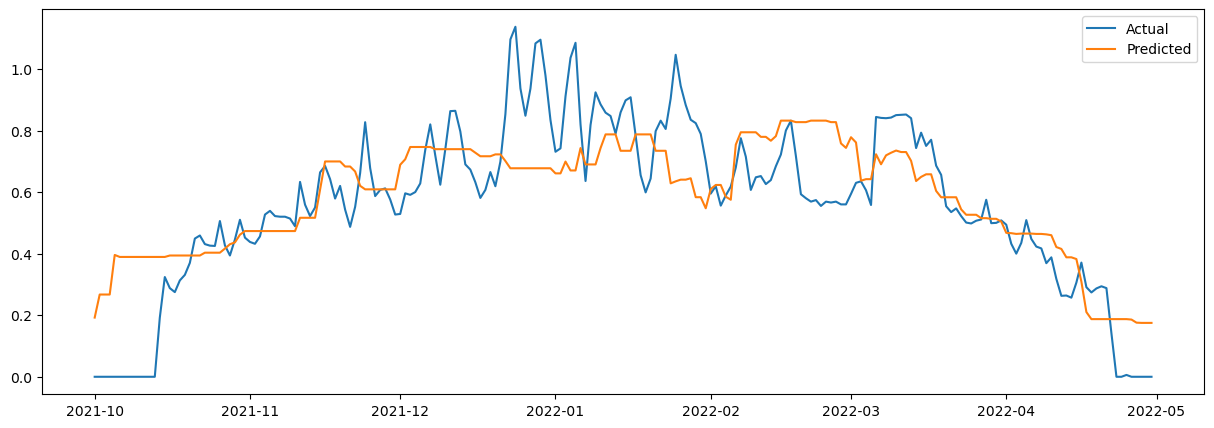

In [96]:
plt.figure(figsize=(15,5))
plt.plot(prophet_valid_data['ds'], prophet_valid_data['y'], label='Actual')
plt.plot(prophet_valid_data['ds'], xgb_pred, label='Predicted')
plt.legend()

### Deep Learning

In [97]:
import tensorflow as tf

2023-11-01 16:32:51.730631: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [98]:
dataset = tf.expand_dims(prophet_train_data['y'], axis=-1)

# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.from_tensor_slices(dataset)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# # Shuffle the windows
# dataset = dataset.shuffle(buffer_size=10)

# # Create batches of windows
# dataset = dataset.batch(2).prefetch(1)

# Print the results
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())
    print()
    break

2023-11-01 16:32:55.989431: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-11-01 16:32:56.359847: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [1308,1]
	 [[{{node Placeholder/_0}}]]
2023-11-01 16:32:56.360194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [1308,1]
	 [[{{node Placeholder/_0}}]]


x =  [[0.449]
 [0.464]
 [0.589]
 [0.544]]
y =  [0.582]



In [99]:
def windowing(data, window_size, shuffle_buffer, batch_size):
    dataset = tf.expand_dims(data, axis=-1)
    dataset = tf.data.Dataset.from_tensor_slices(dataset)
    dataset = dataset.window(window_size+1, shift=1, drop_remainder=True) # window size = 24 + 1 (test)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1])) # (train, test) 
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [100]:
train_deep = windowing(prophet_train_data['y'], 24, 72, 32)
valid_deep = windowing(prophet_valid_data['y'], 24, 72, 32)

In [101]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=16, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[24,1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, activation='relu')),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1)
])

dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 16)            64        
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,833
Trainable params: 4,833
Non-trainable params: 0
_________________________________________________________________


In [102]:
dnn_model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
dnn_model.fit(train_deep, validation_data=valid_deep, epochs=50)

Epoch 1/50


2023-11-01 16:32:57.145875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [1308,1]
	 [[{{node Placeholder/_0}}]]
2023-11-01 16:32:57.146385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [1308,1]
	 [[{{node Placeholder/_0}}]]


     41/Unknown - 4s 44ms/step - loss: 0.1935

2023-11-01 16:33:01.582753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [212,1]
	 [[{{node Placeholder/_0}}]]
2023-11-01 16:33:01.583090: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [212,1]
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - 5s 59ms/step - loss: 0.1935 - val_loss: 0.1291
Epoch 2/50
41/41 [==============================] - 2s 59ms/step - loss: 0.0949 - val_loss: 0.1151
Epoch 3/50
41/41 [==============================] - 3s 62ms/step - loss: 0.0807 - val_loss: 0.1035
Epoch 4/50
41/41 [==============================] - 2s 54ms/step - loss: 0.0745 - val_loss: 0.0957
Epoch 5/50
41/41 [==============================] - 2s 44ms/step - loss: 0.0705 - val_loss: 0.1066
Epoch 6/50
41/41 [==============================] - 3s 61ms/step - loss: 0.0723 - val_loss: 0.0985
Epoch 7/50
41/41 [==============================] - 2s 56ms/step - loss: 0.0640 - val_loss: 0.0841
Epoch 8/50
41/41 [==============================] - 2s 52ms/step - loss: 0.0593 - val_loss: 0.0910
Epoch 9/50
41/41 [==============================] - 3s 60ms/step - loss: 0.0612 - val_loss: 0.0759
Epoch 10/50
41/41 [==============================] - 3s 59ms/step - loss: 0.0568 - val_loss: 0.0794
Epoch 11/50
41/41 [=

<Axes: >

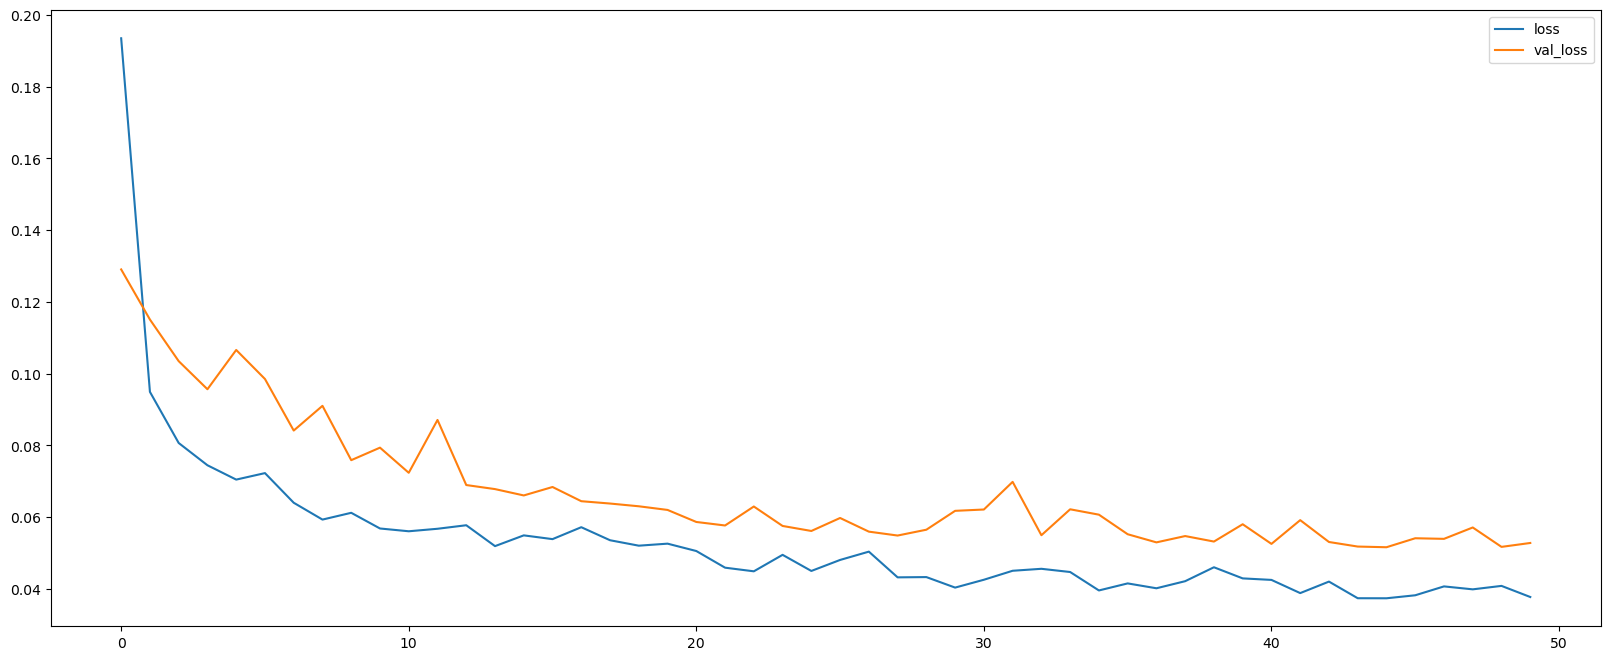

In [103]:
metric = pd.DataFrame(dnn_model.history.history)
metric.plot()

In [104]:
window_size = 24
forecast = []

train_length = len(prophet_train_data)
forecast_series = valid_data_one_house_ext["value"]
# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
    print(time)
    forecast.append(dnn_model.predict(np.expand_dims(forecast_series.iloc[time:time + window_size], axis=-1)[np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

0
1/1 [==============================] - 0s 249ms/step
1
1/1 [==============================] - 0s 42ms/step
2
1/1 [==============================] - 0s 36ms/step
3
1/1 [==============================] - 0s 50ms/step
4
1/1 [==============================] - 0s 46ms/step
5
1/1 [==============================] - 0s 21ms/step
6
1/1 [==============================] - 0s 56ms/step
7
1/1 [==============================] - 0s 37ms/step
8
1/1 [==============================] - 0s 47ms/step
9
1/1 [==============================] - 0s 53ms/step
10
1/1 [==============================] - 0s 36ms/step
11
1/1 [==============================] - 0s 37ms/step
12
1/1 [==============================] - 0s 35ms/step
13
1/1 [==============================] - 0s 49ms/step
14
1/1 [==============================] - 0s 31ms/step
15
1/1 [==============================] - 0s 38ms/step
16
1/1 [==============================] - 0s 36ms/step
17
1/1 [==============================] - 0s 50ms/step
18
1/1 [===========

In [105]:
# df_test['Pred'] = results

mae = round(mean_absolute_error(valid_data_one_house_ext["value"][:-24], results), 3)
print(mae)
plt.figure(figsize=(20,8))

# df_test['DAYTON_MW'].plot(label='Actual')
# df_test['Pred'].plot(label='Predicted')
# plt.text(16770, 3250, 'MAE: {}'.format(mae), fontsize=20, color='red')
# plt.title('Testing Set Forecast', weight='bold', fontsize=25)
# plt.legend()
# plt.show()

0.209


<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

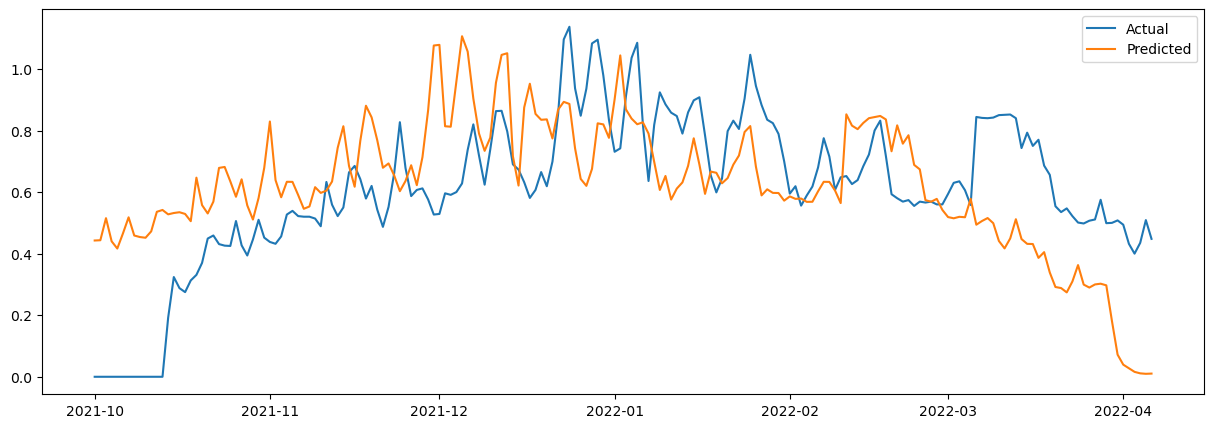

In [106]:
plt.figure(figsize=(15,5))
plt.plot(prophet_valid_data['ds'][:-24], prophet_valid_data['y'][:-24], label='Actual')
plt.plot(prophet_valid_data['ds'][:-24], results, label='Predicted')
plt.legend()

## XGBoost - predictions for all houses 

In [107]:
import joblib

In [108]:
# Get unique `address_uuid`'s house
all_address_uuid = heat_volume_merge["address_uuid"].unique()

In [109]:
result = pd.DataFrame(columns=['address_uuid', 'date', 'volume'])

In [110]:
min_date_train = '2017-10-01'
max_date_train = '2021-04-30'

min_date_valid = '2021-10-01'
max_date_valid = '2022-04-30'

In [111]:
# XGBoost model
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=10)


In [113]:
for id_address in all_address_uuid:
    # Get one house data
    data_one_house_extracted = heat_volume_merge[heat_volume_merge["address_uuid"] == id_address]
    train_data_one_house_extracted = data_one_house_extracted[data_one_house_extracted['date'] < '2021-10-1']
    valid_data_one_house_extracted = data_one_house_extracted[data_one_house_extracted['date'] >= '2021-10-1']

    train_data_one_house_ext = train_data_one_house_extracted[["date", "value"]]
    valid_data_one_house_ext = valid_data_one_house_extracted[["date", "value"]]

    # Make dump date data
    dump_train_df = pd.DataFrame(pd.date_range(start=min_date_train, end=max_date_train))
    dump_train_df.rename(columns={0: "date"}, inplace=True)
    dump_train_df.set_index("date", inplace=True)
    
    dump_valid_df = pd.DataFrame(pd.date_range(start=min_date_valid, end=max_date_valid))
    dump_valid_df.rename(columns={0: "date"}, inplace=True)
    dump_valid_df.set_index("date", inplace=True)

    # merge data for each house
    train_data_one_house_merge = pd.merge(dump_train_df, train_data_one_house_ext, on='date', how='left')
    valid_data_one_house_merge = pd.merge(dump_valid_df, valid_data_one_house_ext, on='date', how='left')

    # fill 0
    train_data_one_house_merge["value"] = train_data_one_house_merge["value"].fillna(0)
    valid_data_one_house_merge["value"] = valid_data_one_house_merge["value"].fillna(0)
    
    # reset date become index
    train_data_one_house_merge.set_index('date', inplace=True)
    valid_data_one_house_merge.set_index('date', inplace=True)

    X_train, y_train = date_transform(train_data_one_house_merge)
    X_valid, y_valid = date_transform(valid_data_one_house_merge)

    xgb_model.fit(X_train, y_train, eval_metric='mae', eval_set=[(X_train, y_train), (X_valid, y_valid)])

    # target = './model/'
    # Save model
    joblib.dump(xgb_model, '../model/xgb_model' + id_address + '.sav')


[0]	validation_0-mae:0.58765	validation_1-mae:0.57078
[1]	validation_0-mae:0.56023	validation_1-mae:0.54003
[2]	validation_0-mae:0.53414	validation_1-mae:0.50929
[3]	validation_0-mae:0.50934	validation_1-mae:0.48194
[4]	validation_0-mae:0.48594	validation_1-mae:0.45478
[5]	validation_0-mae:0.46373	validation_1-mae:0.42873
[6]	validation_0-mae:0.44250	validation_1-mae:0.40515
[7]	validation_0-mae:0.42248	validation_1-mae:0.38194
[8]	validation_0-mae:0.40327	validation_1-mae:0.36007
[9]	validation_0-mae:0.38527	validation_1-mae:0.33979
[10]	validation_0-mae:0.36806	validation_1-mae:0.32002
[11]	validation_0-mae:0.35135	validation_1-mae:0.30138
[12]	validation_0-mae:0.33587	validation_1-mae:0.28327
[13]	validation_0-mae:0.32097	validation_1-mae:0.26647
[14]	validation_0-mae:0.30675	validation_1-mae:0.25086
[15]	validation_0-mae:0.29347	validation_1-mae:0.23876
[16]	validation_0-mae:0.28083	validation_1-mae:0.22834
[17]	validation_0-mae:0.26845	validation_1-mae:0.21899
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[29]	validation_0-mae:0.16233	validation_1-mae:0.17235
[30]	validation_0-mae:0.15646	validation_1-mae:0.17167
[31]	validation_0-mae:0.15090	validation_1-mae:0.17186
[32]	validation_0-mae:0.14574	validation_1-mae:0.17176
[33]	validation_0-mae:0.14072	validation_1-mae:0.17286
[34]	validation_0-mae:0.13596	validation_1-mae:0.17401
[35]	validation_0-mae:0.13136	validation_1-mae:0.17589
[36]	validation_0-mae:0.12710	validation_1-mae:0.17713
[37]	validation_0-mae:0.12317	validation_1-mae:0.17904
[38]	validation_0-mae:0.11930	validation_1-mae:0.18124
[39]	validation_0-mae:0.11552	validation_1-mae:0.18272
[0]	validation_0-mae:1.81590	validation_1-mae:2.26109
[1]	validation_0-mae:1.72700	validation_1-mae:2.14255
[2]	validation_0-mae:1.64251	validation_1-mae:2.03115
[3]	validation_0-mae:1.56246	validation_1-mae:1.92526
[4]	validation_0-mae:1.48628	validation_1-mae:1.83588
[5]	validation_0-mae:1.41388	validation_1-mae:1.74757
[6]	validation_0-mae:1.34498	validation_1-mae:1.67156
[7]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[31]	validation_0-mae:0.40221	validation_1-mae:0.60633
[32]	validation_0-mae:0.38421	validation_1-mae:0.59434
[33]	validation_0-mae:0.36734	validation_1-mae:0.58608
[34]	validation_0-mae:0.35138	validation_1-mae:0.57816
[35]	validation_0-mae:0.33629	validation_1-mae:0.57164
[36]	validation_0-mae:0.32197	validation_1-mae:0.56553
[37]	validation_0-mae:0.30814	validation_1-mae:0.56000
[38]	validation_0-mae:0.29533	validation_1-mae:0.55543
[39]	validation_0-mae:0.28312	validation_1-mae:0.55291
[40]	validation_0-mae:0.27151	validation_1-mae:0.55157
[41]	validation_0-mae:0.26028	validation_1-mae:0.54938
[42]	validation_0-mae:0.25014	validation_1-mae:0.54743
[43]	validation_0-mae:0.24042	validation_1-mae:0.54694
[44]	validation_0-mae:0.23092	validation_1-mae:0.54632
[45]	validation_0-mae:0.22221	validation_1-mae:0.54619
[46]	validation_0-mae:0.21416	validation_1-mae:0.54576
[47]	validation_0-mae:0.20656	validation_1-mae:0.54603
[48]	validation_0-mae:0.19944	validation_1-mae:0.54566
[49]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[36]	validation_0-mae:0.36776	validation_1-mae:0.69346
[37]	validation_0-mae:0.35261	validation_1-mae:0.68996
[38]	validation_0-mae:0.33815	validation_1-mae:0.68925
[39]	validation_0-mae:0.32515	validation_1-mae:0.68821
[40]	validation_0-mae:0.31265	validation_1-mae:0.68821
[41]	validation_0-mae:0.30081	validation_1-mae:0.68920
[42]	validation_0-mae:0.29060	validation_1-mae:0.68917
[43]	validation_0-mae:0.28017	validation_1-mae:0.68948
[44]	validation_0-mae:0.27061	validation_1-mae:0.69159
[45]	validation_0-mae:0.26141	validation_1-mae:0.69375
[46]	validation_0-mae:0.25357	validation_1-mae:0.69461
[47]	validation_0-mae:0.24618	validation_1-mae:0.69561
[48]	validation_0-mae:0.23942	validation_1-mae:0.69626
[0]	validation_0-mae:1.39213	validation_1-mae:2.12092
[1]	validation_0-mae:1.32331	validation_1-mae:2.00833
[2]	validation_0-mae:1.25796	validation_1-mae:1.90132
[3]	validation_0-mae:1.19617	validation_1-mae:1.79576
[4]	validation_0-mae:1.13754	validation_1-mae:1.69531
[5]	validation_

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[32]	validation_0-mae:0.28747	validation_1-mae:0.47633
[33]	validation_0-mae:0.27412	validation_1-mae:0.47412
[34]	validation_0-mae:0.26155	validation_1-mae:0.47170
[35]	validation_0-mae:0.24974	validation_1-mae:0.47055
[36]	validation_0-mae:0.23830	validation_1-mae:0.47069
[37]	validation_0-mae:0.22757	validation_1-mae:0.47132
[38]	validation_0-mae:0.21737	validation_1-mae:0.47283
[39]	validation_0-mae:0.20788	validation_1-mae:0.47507
[40]	validation_0-mae:0.19899	validation_1-mae:0.47620
[41]	validation_0-mae:0.19075	validation_1-mae:0.47722
[42]	validation_0-mae:0.18306	validation_1-mae:0.47842
[43]	validation_0-mae:0.17573	validation_1-mae:0.48085
[44]	validation_0-mae:0.16892	validation_1-mae:0.48291
[45]	validation_0-mae:0.16257	validation_1-mae:0.48459
[0]	validation_0-mae:2.78295	validation_1-mae:4.01026
[1]	validation_0-mae:2.64607	validation_1-mae:3.80973
[2]	validation_0-mae:2.51583	validation_1-mae:3.61903
[3]	validation_0-mae:2.39210	validation_1-mae:3.43772
[4]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[40]	validation_0-mae:0.40821	validation_1-mae:0.73089
[41]	validation_0-mae:0.39201	validation_1-mae:0.72621
[42]	validation_0-mae:0.37703	validation_1-mae:0.72177
[43]	validation_0-mae:0.36299	validation_1-mae:0.72068
[44]	validation_0-mae:0.35028	validation_1-mae:0.72095
[45]	validation_0-mae:0.33774	validation_1-mae:0.72043
[46]	validation_0-mae:0.32602	validation_1-mae:0.71844
[47]	validation_0-mae:0.31541	validation_1-mae:0.71898
[48]	validation_0-mae:0.30535	validation_1-mae:0.71828
[49]	validation_0-mae:0.29572	validation_1-mae:0.72018
[50]	validation_0-mae:0.28698	validation_1-mae:0.72035
[51]	validation_0-mae:0.27869	validation_1-mae:0.72176
[52]	validation_0-mae:0.27084	validation_1-mae:0.72213
[53]	validation_0-mae:0.26395	validation_1-mae:0.72418
[54]	validation_0-mae:0.25745	validation_1-mae:0.72572
[55]	validation_0-mae:0.25114	validation_1-mae:0.72747
[56]	validation_0-mae:0.24556	validation_1-mae:0.73015
[57]	validation_0-mae:0.24000	validation_1-mae:0.73289
[58]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[36]	validation_0-mae:0.23026	validation_1-mae:0.40329
[37]	validation_0-mae:0.22073	validation_1-mae:0.39999
[38]	validation_0-mae:0.21171	validation_1-mae:0.39717
[39]	validation_0-mae:0.20322	validation_1-mae:0.39622
[40]	validation_0-mae:0.19510	validation_1-mae:0.39536
[41]	validation_0-mae:0.18756	validation_1-mae:0.39417
[42]	validation_0-mae:0.18050	validation_1-mae:0.39395
[43]	validation_0-mae:0.17398	validation_1-mae:0.39437
[44]	validation_0-mae:0.16784	validation_1-mae:0.39393
[45]	validation_0-mae:0.16200	validation_1-mae:0.39388
[46]	validation_0-mae:0.15659	validation_1-mae:0.39371
[47]	validation_0-mae:0.15141	validation_1-mae:0.39401
[48]	validation_0-mae:0.14671	validation_1-mae:0.39432
[49]	validation_0-mae:0.14226	validation_1-mae:0.39499
[50]	validation_0-mae:0.13813	validation_1-mae:0.39575
[51]	validation_0-mae:0.13422	validation_1-mae:0.39611
[52]	validation_0-mae:0.13063	validation_1-mae:0.39656
[53]	validation_0-mae:0.12719	validation_1-mae:0.39762
[54]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.52966	validation_1-mae:0.78543
[29]	validation_0-mae:0.50538	validation_1-mae:0.76928
[30]	validation_0-mae:0.48200	validation_1-mae:0.75306
[31]	validation_0-mae:0.45978	validation_1-mae:0.74062
[32]	validation_0-mae:0.43913	validation_1-mae:0.73032
[33]	validation_0-mae:0.41951	validation_1-mae:0.71924
[34]	validation_0-mae:0.40087	validation_1-mae:0.70914
[35]	validation_0-mae:0.38341	validation_1-mae:0.70193
[36]	validation_0-mae:0.36669	validation_1-mae:0.69758
[37]	validation_0-mae:0.35077	validation_1-mae:0.69500
[38]	validation_0-mae:0.33575	validation_1-mae:0.69123
[39]	validation_0-mae:0.32172	validation_1-mae:0.69101
[40]	validation_0-mae:0.30854	validation_1-mae:0.69132
[41]	validation_0-mae:0.29627	validation_1-mae:0.69050
[42]	validation_0-mae:0.28498	validation_1-mae:0.68853
[43]	validation_0-mae:0.27411	validation_1-mae:0.68762
[44]	validation_0-mae:0.26449	validation_1-mae:0.68583
[45]	validation_0-mae:0.25518	validation_1-mae:0.68578
[46]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[33]	validation_0-mae:694.38059	validation_1-mae:0.28314
[34]	validation_0-mae:677.01897	validation_1-mae:0.28048
[35]	validation_0-mae:660.09184	validation_1-mae:0.27786
[36]	validation_0-mae:643.58801	validation_1-mae:0.27596
[37]	validation_0-mae:627.49702	validation_1-mae:0.27446
[38]	validation_0-mae:611.80885	validation_1-mae:0.27217
[39]	validation_0-mae:596.51295	validation_1-mae:0.27163
[40]	validation_0-mae:581.59960	validation_1-mae:0.27088
[41]	validation_0-mae:567.05899	validation_1-mae:0.26932
[42]	validation_0-mae:552.88262	validation_1-mae:0.26791
[43]	validation_0-mae:539.06040	validation_1-mae:0.26809
[44]	validation_0-mae:525.58330	validation_1-mae:0.26852
[45]	validation_0-mae:512.44379	validation_1-mae:0.26925
[46]	validation_0-mae:499.63316	validation_1-mae:0.26824
[47]	validation_0-mae:487.14180	validation_1-mae:0.26880
[48]	validation_0-mae:474.96308	validation_1-mae:0.26856
[49]	validation_0-mae:463.08857	validation_1-mae:0.26915
[50]	validation_0-mae:451.51130

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[38]	validation_0-mae:0.38993	validation_1-mae:0.63946
[39]	validation_0-mae:0.37427	validation_1-mae:0.64408
[40]	validation_0-mae:0.35981	validation_1-mae:0.64738
[41]	validation_0-mae:0.34566	validation_1-mae:0.65350
[42]	validation_0-mae:0.33375	validation_1-mae:0.65672
[43]	validation_0-mae:0.32194	validation_1-mae:0.66090
[44]	validation_0-mae:0.31058	validation_1-mae:0.66615
[0]	validation_0-mae:0.88892	validation_1-mae:1.12666
[1]	validation_0-mae:0.84529	validation_1-mae:1.06990
[2]	validation_0-mae:0.80385	validation_1-mae:1.01584
[3]	validation_0-mae:0.76447	validation_1-mae:0.96415
[4]	validation_0-mae:0.72714	validation_1-mae:0.91534
[5]	validation_0-mae:0.69177	validation_1-mae:0.86884
[6]	validation_0-mae:0.65810	validation_1-mae:0.82462
[7]	validation_0-mae:0.62596	validation_1-mae:0.78228
[8]	validation_0-mae:0.59555	validation_1-mae:0.74279
[9]	validation_0-mae:0.56669	validation_1-mae:0.70473
[10]	validation_0-mae:0.53913	validation_1-mae:0.66826
[11]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[39]	validation_0-mae:0.13808	validation_1-mae:0.26303
[40]	validation_0-mae:0.13270	validation_1-mae:0.26190
[41]	validation_0-mae:0.12778	validation_1-mae:0.26119
[42]	validation_0-mae:0.12309	validation_1-mae:0.26015
[43]	validation_0-mae:0.11869	validation_1-mae:0.25956
[44]	validation_0-mae:0.11454	validation_1-mae:0.25913
[45]	validation_0-mae:0.11071	validation_1-mae:0.25928
[46]	validation_0-mae:0.10717	validation_1-mae:0.25905
[47]	validation_0-mae:0.10385	validation_1-mae:0.25898
[48]	validation_0-mae:0.10069	validation_1-mae:0.25953
[49]	validation_0-mae:0.09778	validation_1-mae:0.25996
[50]	validation_0-mae:0.09493	validation_1-mae:0.26035
[51]	validation_0-mae:0.09241	validation_1-mae:0.26112
[52]	validation_0-mae:0.08989	validation_1-mae:0.26194
[53]	validation_0-mae:0.08756	validation_1-mae:0.26224
[54]	validation_0-mae:0.08541	validation_1-mae:0.26284
[55]	validation_0-mae:0.08343	validation_1-mae:0.26353
[56]	validation_0-mae:0.08153	validation_1-mae:0.26439
[0]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[35]	validation_0-mae:0.14514	validation_1-mae:0.22472
[36]	validation_0-mae:0.13997	validation_1-mae:0.22441
[37]	validation_0-mae:0.13534	validation_1-mae:0.22444
[38]	validation_0-mae:0.13096	validation_1-mae:0.22437
[39]	validation_0-mae:0.12695	validation_1-mae:0.22424
[40]	validation_0-mae:0.12303	validation_1-mae:0.22418
[41]	validation_0-mae:0.11940	validation_1-mae:0.22385
[42]	validation_0-mae:0.11580	validation_1-mae:0.22412
[43]	validation_0-mae:0.11264	validation_1-mae:0.22407
[44]	validation_0-mae:0.10961	validation_1-mae:0.22435
[45]	validation_0-mae:0.10675	validation_1-mae:0.22431
[46]	validation_0-mae:0.10402	validation_1-mae:0.22434
[47]	validation_0-mae:0.10136	validation_1-mae:0.22399
[48]	validation_0-mae:0.09894	validation_1-mae:0.22431
[49]	validation_0-mae:0.09666	validation_1-mae:0.22437
[50]	validation_0-mae:0.09442	validation_1-mae:0.22445
[51]	validation_0-mae:0.09235	validation_1-mae:0.22452
[0]	validation_0-mae:2.75484	validation_1-mae:3.68056
[1]	validat

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[42]	validation_0-mae:0.35388	validation_1-mae:0.99624
[43]	validation_0-mae:0.33942	validation_1-mae:0.99523
[44]	validation_0-mae:0.32556	validation_1-mae:0.99573
[45]	validation_0-mae:0.31262	validation_1-mae:0.99579
[46]	validation_0-mae:0.30081	validation_1-mae:0.99553
[47]	validation_0-mae:0.28933	validation_1-mae:0.99610
[48]	validation_0-mae:0.27881	validation_1-mae:0.99678
[49]	validation_0-mae:0.26890	validation_1-mae:0.99687
[50]	validation_0-mae:0.25968	validation_1-mae:0.99936
[51]	validation_0-mae:0.25111	validation_1-mae:0.99998
[52]	validation_0-mae:0.24320	validation_1-mae:0.99978
[53]	validation_0-mae:0.23568	validation_1-mae:0.99983
[0]	validation_0-mae:1.79860	validation_1-mae:2.37063
[1]	validation_0-mae:1.70988	validation_1-mae:2.25414
[2]	validation_0-mae:1.62550	validation_1-mae:2.14355
[3]	validation_0-mae:1.54542	validation_1-mae:2.03883
[4]	validation_0-mae:1.46935	validation_1-mae:1.94038
[5]	validation_0-mae:1.39710	validation_1-mae:1.84612
[6]	validation_0

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.44855	validation_1-mae:0.66825
[29]	validation_0-mae:0.42779	validation_1-mae:0.65011
[30]	validation_0-mae:0.40808	validation_1-mae:0.63347
[31]	validation_0-mae:0.38942	validation_1-mae:0.61925
[32]	validation_0-mae:0.37186	validation_1-mae:0.60714
[33]	validation_0-mae:0.35538	validation_1-mae:0.59649
[34]	validation_0-mae:0.33976	validation_1-mae:0.58712
[35]	validation_0-mae:0.32513	validation_1-mae:0.58006
[36]	validation_0-mae:0.31140	validation_1-mae:0.57362
[37]	validation_0-mae:0.29817	validation_1-mae:0.56853
[38]	validation_0-mae:0.28595	validation_1-mae:0.56516
[39]	validation_0-mae:0.27455	validation_1-mae:0.56257
[40]	validation_0-mae:0.26393	validation_1-mae:0.55904
[41]	validation_0-mae:0.25380	validation_1-mae:0.55619
[42]	validation_0-mae:0.24436	validation_1-mae:0.55449
[43]	validation_0-mae:0.23557	validation_1-mae:0.55160
[44]	validation_0-mae:0.22720	validation_1-mae:0.54989
[45]	validation_0-mae:0.21952	validation_1-mae:0.54912
[46]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[39]	validation_0-mae:0.27571	validation_1-mae:0.30685
[40]	validation_0-mae:0.26559	validation_1-mae:0.30902
[41]	validation_0-mae:0.25630	validation_1-mae:0.31121
[42]	validation_0-mae:0.24730	validation_1-mae:0.31459
[43]	validation_0-mae:0.23880	validation_1-mae:0.31631
[44]	validation_0-mae:0.23104	validation_1-mae:0.31942
[45]	validation_0-mae:0.22368	validation_1-mae:0.32258
[0]	validation_0-mae:3.28802	validation_1-mae:3.31791
[1]	validation_0-mae:3.12580	validation_1-mae:3.13417
[2]	validation_0-mae:2.97161	validation_1-mae:2.96008
[3]	validation_0-mae:2.82501	validation_1-mae:2.79400
[4]	validation_0-mae:2.68694	validation_1-mae:2.63744
[5]	validation_0-mae:2.55453	validation_1-mae:2.48847
[6]	validation_0-mae:2.42880	validation_1-mae:2.34659
[7]	validation_0-mae:2.30941	validation_1-mae:2.21197
[8]	validation_0-mae:2.19650	validation_1-mae:2.08392
[9]	validation_0-mae:2.08844	validation_1-mae:1.96232
[10]	validation_0-mae:1.98578	validation_1-mae:1.84586
[11]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[27]	validation_0-mae:0.85221	validation_1-mae:0.65936
[28]	validation_0-mae:0.81118	validation_1-mae:0.64076
[29]	validation_0-mae:0.77239	validation_1-mae:0.62541
[30]	validation_0-mae:0.73549	validation_1-mae:0.61142
[31]	validation_0-mae:0.70066	validation_1-mae:0.60099
[32]	validation_0-mae:0.66806	validation_1-mae:0.59148
[33]	validation_0-mae:0.63668	validation_1-mae:0.58204
[34]	validation_0-mae:0.60690	validation_1-mae:0.57585
[35]	validation_0-mae:0.57851	validation_1-mae:0.56892
[36]	validation_0-mae:0.55154	validation_1-mae:0.56448
[37]	validation_0-mae:0.52619	validation_1-mae:0.56231
[38]	validation_0-mae:0.50219	validation_1-mae:0.56021
[39]	validation_0-mae:0.47962	validation_1-mae:0.56041
[40]	validation_0-mae:0.45834	validation_1-mae:0.56110
[41]	validation_0-mae:0.43824	validation_1-mae:0.56301
[42]	validation_0-mae:0.41943	validation_1-mae:0.56431
[43]	validation_0-mae:0.40179	validation_1-mae:0.56743
[44]	validation_0-mae:0.38495	validation_1-mae:0.57108
[45]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[11]	validation_0-mae:1.16406	validation_1-mae:1.45554
[12]	validation_0-mae:1.10766	validation_1-mae:1.38622
[13]	validation_0-mae:1.05407	validation_1-mae:1.31805
[14]	validation_0-mae:1.00312	validation_1-mae:1.25257
[15]	validation_0-mae:0.95493	validation_1-mae:1.19218
[16]	validation_0-mae:0.90909	validation_1-mae:1.13388
[17]	validation_0-mae:0.86547	validation_1-mae:1.08136
[18]	validation_0-mae:0.82400	validation_1-mae:1.03411
[19]	validation_0-mae:0.78455	validation_1-mae:0.99042
[20]	validation_0-mae:0.74710	validation_1-mae:0.95180
[21]	validation_0-mae:0.71169	validation_1-mae:0.92045
[22]	validation_0-mae:0.67816	validation_1-mae:0.89188
[23]	validation_0-mae:0.64623	validation_1-mae:0.86936
[24]	validation_0-mae:0.61574	validation_1-mae:0.84968
[25]	validation_0-mae:0.58690	validation_1-mae:0.83626
[26]	validation_0-mae:0.55937	validation_1-mae:0.82389
[27]	validation_0-mae:0.53333	validation_1-mae:0.81667
[28]	validation_0-mae:0.50849	validation_1-mae:0.80993
[29]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[38]	validation_0-mae:0.31063	validation_1-mae:0.63361
[39]	validation_0-mae:0.29803	validation_1-mae:0.63119
[40]	validation_0-mae:0.28600	validation_1-mae:0.62997
[41]	validation_0-mae:0.27489	validation_1-mae:0.62905
[42]	validation_0-mae:0.26481	validation_1-mae:0.62701
[43]	validation_0-mae:0.25549	validation_1-mae:0.62728
[44]	validation_0-mae:0.24658	validation_1-mae:0.62594
[45]	validation_0-mae:0.23830	validation_1-mae:0.62636
[46]	validation_0-mae:0.23064	validation_1-mae:0.62680
[47]	validation_0-mae:0.22316	validation_1-mae:0.62847
[48]	validation_0-mae:0.21627	validation_1-mae:0.63015
[49]	validation_0-mae:0.20975	validation_1-mae:0.63140
[50]	validation_0-mae:0.20368	validation_1-mae:0.63435
[51]	validation_0-mae:0.19803	validation_1-mae:0.63563
[52]	validation_0-mae:0.19273	validation_1-mae:0.63756
[53]	validation_0-mae:0.18778	validation_1-mae:0.63948
[0]	validation_0-mae:3015.06468	validation_1-mae:2.06700
[1]	validation_0-mae:2939.64911	validation_1-mae:1.96294
[2]	va

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[19]	validation_0-mae:1863.36201	validation_1-mae:0.76928
[20]	validation_0-mae:1816.76352	validation_1-mae:0.73074
[21]	validation_0-mae:1771.33085	validation_1-mae:0.69762
[22]	validation_0-mae:1727.03490	validation_1-mae:0.66630
[23]	validation_0-mae:1683.84693	validation_1-mae:0.63721
[24]	validation_0-mae:1641.73941	validation_1-mae:0.61368
[25]	validation_0-mae:1600.68564	validation_1-mae:0.59221
[26]	validation_0-mae:1560.65845	validation_1-mae:0.57263
[27]	validation_0-mae:1521.63320	validation_1-mae:0.55621
[28]	validation_0-mae:1483.58406	validation_1-mae:0.54200
[29]	validation_0-mae:1446.48714	validation_1-mae:0.52909
[30]	validation_0-mae:1410.31780	validation_1-mae:0.51993
[31]	validation_0-mae:1375.05350	validation_1-mae:0.51391
[32]	validation_0-mae:1340.67119	validation_1-mae:0.50797
[33]	validation_0-mae:1307.14898	validation_1-mae:0.50167
[34]	validation_0-mae:1274.46566	validation_1-mae:0.49632
[35]	validation_0-mae:1242.60002	validation_1-mae:0.49201
[36]	validatio

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[27]	validation_0-mae:0.33015	validation_1-mae:1.05636
[28]	validation_0-mae:0.31765	validation_1-mae:1.04613
[29]	validation_0-mae:0.30534	validation_1-mae:1.03932
[30]	validation_0-mae:0.29406	validation_1-mae:1.02974
[31]	validation_0-mae:0.28296	validation_1-mae:1.02317
[32]	validation_0-mae:0.27344	validation_1-mae:1.01561
[33]	validation_0-mae:0.26241	validation_1-mae:1.00942
[34]	validation_0-mae:0.25297	validation_1-mae:1.00564
[35]	validation_0-mae:0.24307	validation_1-mae:1.00019
[36]	validation_0-mae:0.23332	validation_1-mae:0.99486
[37]	validation_0-mae:0.22455	validation_1-mae:0.99083
[38]	validation_0-mae:0.21511	validation_1-mae:0.98706
[39]	validation_0-mae:0.20674	validation_1-mae:0.98517
[40]	validation_0-mae:0.19887	validation_1-mae:0.98231
[41]	validation_0-mae:0.19099	validation_1-mae:0.97996
[42]	validation_0-mae:0.18349	validation_1-mae:0.97806
[43]	validation_0-mae:0.17670	validation_1-mae:0.97660
[44]	validation_0-mae:0.17030	validation_1-mae:0.97457
[45]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[29]	validation_0-mae:0.64393	validation_1-mae:0.84544
[30]	validation_0-mae:0.61528	validation_1-mae:0.82948
[31]	validation_0-mae:0.58783	validation_1-mae:0.81437
[32]	validation_0-mae:0.56219	validation_1-mae:0.80136
[33]	validation_0-mae:0.53756	validation_1-mae:0.78894
[34]	validation_0-mae:0.51406	validation_1-mae:0.77992
[35]	validation_0-mae:0.49225	validation_1-mae:0.77182
[36]	validation_0-mae:0.47110	validation_1-mae:0.76954
[37]	validation_0-mae:0.45194	validation_1-mae:0.76463
[38]	validation_0-mae:0.43336	validation_1-mae:0.76329
[39]	validation_0-mae:0.41658	validation_1-mae:0.75938
[40]	validation_0-mae:0.39987	validation_1-mae:0.75932
[41]	validation_0-mae:0.38470	validation_1-mae:0.76040
[42]	validation_0-mae:0.37086	validation_1-mae:0.76030
[43]	validation_0-mae:0.35870	validation_1-mae:0.76166
[44]	validation_0-mae:0.34678	validation_1-mae:0.76500
[45]	validation_0-mae:0.33590	validation_1-mae:0.76640
[46]	validation_0-mae:0.32559	validation_1-mae:0.77061
[47]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[27]	validation_0-mae:0.75991	validation_1-mae:1.02614
[28]	validation_0-mae:0.72395	validation_1-mae:0.99907
[29]	validation_0-mae:0.68969	validation_1-mae:0.98017
[30]	validation_0-mae:0.65746	validation_1-mae:0.96289
[31]	validation_0-mae:0.62672	validation_1-mae:0.94792
[32]	validation_0-mae:0.59777	validation_1-mae:0.93334
[33]	validation_0-mae:0.57055	validation_1-mae:0.92204
[34]	validation_0-mae:0.54450	validation_1-mae:0.91057
[35]	validation_0-mae:0.52033	validation_1-mae:0.90132
[36]	validation_0-mae:0.49761	validation_1-mae:0.89603
[37]	validation_0-mae:0.47620	validation_1-mae:0.89368
[38]	validation_0-mae:0.45591	validation_1-mae:0.89236
[39]	validation_0-mae:0.43679	validation_1-mae:0.88877
[40]	validation_0-mae:0.41898	validation_1-mae:0.88766
[41]	validation_0-mae:0.40226	validation_1-mae:0.88537
[42]	validation_0-mae:0.38662	validation_1-mae:0.88652
[43]	validation_0-mae:0.37206	validation_1-mae:0.88892
[44]	validation_0-mae:0.35851	validation_1-mae:0.88807
[45]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[31]	validation_0-mae:0.64128	validation_1-mae:0.69573
[32]	validation_0-mae:0.61129	validation_1-mae:0.66564
[33]	validation_0-mae:0.58291	validation_1-mae:0.63785
[34]	validation_0-mae:0.55611	validation_1-mae:0.61456
[35]	validation_0-mae:0.53084	validation_1-mae:0.59471
[36]	validation_0-mae:0.50702	validation_1-mae:0.57888
[37]	validation_0-mae:0.48404	validation_1-mae:0.56414
[38]	validation_0-mae:0.46250	validation_1-mae:0.55256
[39]	validation_0-mae:0.44227	validation_1-mae:0.54232
[40]	validation_0-mae:0.42318	validation_1-mae:0.53426
[41]	validation_0-mae:0.40530	validation_1-mae:0.52684
[42]	validation_0-mae:0.38786	validation_1-mae:0.51917
[43]	validation_0-mae:0.37195	validation_1-mae:0.51667
[44]	validation_0-mae:0.35643	validation_1-mae:0.51273
[45]	validation_0-mae:0.34234	validation_1-mae:0.51215
[46]	validation_0-mae:0.32864	validation_1-mae:0.50937
[47]	validation_0-mae:0.31589	validation_1-mae:0.51011
[48]	validation_0-mae:0.30402	validation_1-mae:0.50917
[49]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[33]	validation_0-mae:0.54163	validation_1-mae:0.84678
[34]	validation_0-mae:0.51711	validation_1-mae:0.84101
[35]	validation_0-mae:0.49448	validation_1-mae:0.83646
[36]	validation_0-mae:0.47267	validation_1-mae:0.83241
[37]	validation_0-mae:0.45227	validation_1-mae:0.83002
[38]	validation_0-mae:0.43324	validation_1-mae:0.83016
[39]	validation_0-mae:0.41536	validation_1-mae:0.83107
[40]	validation_0-mae:0.39923	validation_1-mae:0.83309
[41]	validation_0-mae:0.38404	validation_1-mae:0.83498
[42]	validation_0-mae:0.36931	validation_1-mae:0.83865
[43]	validation_0-mae:0.35546	validation_1-mae:0.83990
[44]	validation_0-mae:0.34290	validation_1-mae:0.84386
[45]	validation_0-mae:0.33061	validation_1-mae:0.84866
[46]	validation_0-mae:0.31936	validation_1-mae:0.85278
[47]	validation_0-mae:0.30928	validation_1-mae:0.85678
[0]	validation_0-mae:2.09541	validation_1-mae:2.40235
[1]	validation_0-mae:1.99195	validation_1-mae:2.26383
[2]	validation_0-mae:1.89342	validation_1-mae:2.13282
[3]	validatio

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.51860	validation_1-mae:0.45086
[29]	validation_0-mae:0.49379	validation_1-mae:0.44444
[30]	validation_0-mae:0.47061	validation_1-mae:0.44286
[31]	validation_0-mae:0.44862	validation_1-mae:0.44216
[32]	validation_0-mae:0.42758	validation_1-mae:0.44170
[33]	validation_0-mae:0.40761	validation_1-mae:0.44547
[34]	validation_0-mae:0.38897	validation_1-mae:0.44698
[35]	validation_0-mae:0.37142	validation_1-mae:0.45277
[36]	validation_0-mae:0.35511	validation_1-mae:0.45722
[37]	validation_0-mae:0.33987	validation_1-mae:0.46092
[38]	validation_0-mae:0.32508	validation_1-mae:0.46716
[39]	validation_0-mae:0.31156	validation_1-mae:0.47283
[40]	validation_0-mae:0.29862	validation_1-mae:0.47994
[41]	validation_0-mae:0.28648	validation_1-mae:0.48670
[0]	validation_0-mae:0.44005	validation_1-mae:0.50697
[1]	validation_0-mae:0.41834	validation_1-mae:0.51362
[2]	validation_0-mae:0.39756	validation_1-mae:0.51993
[3]	validation_0-mae:0.37786	validation_1-mae:0.52595
[4]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[17]	validation_0-mae:0.98938	validation_1-mae:1.40707
[18]	validation_0-mae:0.94177	validation_1-mae:1.33645
[19]	validation_0-mae:0.89664	validation_1-mae:1.26755
[20]	validation_0-mae:0.85372	validation_1-mae:1.20376
[21]	validation_0-mae:0.81293	validation_1-mae:1.14468
[22]	validation_0-mae:0.77390	validation_1-mae:1.09005
[23]	validation_0-mae:0.73688	validation_1-mae:1.03972
[24]	validation_0-mae:0.70161	validation_1-mae:0.99375
[25]	validation_0-mae:0.66836	validation_1-mae:0.95253
[26]	validation_0-mae:0.63660	validation_1-mae:0.91367
[27]	validation_0-mae:0.60663	validation_1-mae:0.87923
[28]	validation_0-mae:0.57807	validation_1-mae:0.84868
[29]	validation_0-mae:0.55100	validation_1-mae:0.82070
[30]	validation_0-mae:0.52529	validation_1-mae:0.80028
[31]	validation_0-mae:0.50073	validation_1-mae:0.78249
[32]	validation_0-mae:0.47734	validation_1-mae:0.76664
[33]	validation_0-mae:0.45566	validation_1-mae:0.75235
[34]	validation_0-mae:0.43486	validation_1-mae:0.74100
[35]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[86]	validation_0-mae:0.00863	validation_1-mae:0.17755
[87]	validation_0-mae:0.00844	validation_1-mae:0.17738
[88]	validation_0-mae:0.00822	validation_1-mae:0.17722
[89]	validation_0-mae:0.00804	validation_1-mae:0.17707
[90]	validation_0-mae:0.00787	validation_1-mae:0.17693
[91]	validation_0-mae:0.00771	validation_1-mae:0.17680
[92]	validation_0-mae:0.00754	validation_1-mae:0.17665
[93]	validation_0-mae:0.00740	validation_1-mae:0.17654
[94]	validation_0-mae:0.00728	validation_1-mae:0.17638
[95]	validation_0-mae:0.00716	validation_1-mae:0.17623
[96]	validation_0-mae:0.00705	validation_1-mae:0.17610
[97]	validation_0-mae:0.00695	validation_1-mae:0.17597
[98]	validation_0-mae:0.00685	validation_1-mae:0.17584
[99]	validation_0-mae:0.00676	validation_1-mae:0.17572
[100]	validation_0-mae:0.00667	validation_1-mae:0.17560
[101]	validation_0-mae:0.00659	validation_1-mae:0.17549
[102]	validation_0-mae:0.00652	validation_1-mae:0.17537
[103]	validation_0-mae:0.00644	validation_1-mae:0.17529
[104]	

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:0.41949	validation_1-mae:0.33499
[1]	validation_0-mae:0.39863	validation_1-mae:0.31907
[2]	validation_0-mae:0.37880	validation_1-mae:0.30390
[3]	validation_0-mae:0.35997	validation_1-mae:0.28947
[4]	validation_0-mae:0.34209	validation_1-mae:0.27577
[5]	validation_0-mae:0.32510	validation_1-mae:0.26273
[6]	validation_0-mae:0.30898	validation_1-mae:0.25032
[7]	validation_0-mae:0.29363	validation_1-mae:0.23917
[8]	validation_0-mae:0.27908	validation_1-mae:0.22802
[9]	validation_0-mae:0.26525	validation_1-mae:0.21735
[10]	validation_0-mae:0.25211	validation_1-mae:0.20727
[11]	validation_0-mae:0.23960	validation_1-mae:0.19818
[12]	validation_0-mae:0.22774	validation_1-mae:0.18908
[13]	validation_0-mae:0.21644	validation_1-mae:0.18042
[14]	validation_0-mae:0.20572	validation_1-mae:0.17213
[15]	validation_0-mae:0.19552	validation_1-mae:0.16473
[16]	validation_0-mae:0.18585	validation_1-mae:0.15728
[17]	validation_0-mae:0.17666	validation_1-mae:0.15027
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[75]	validation_0-mae:0.01182	validation_1-mae:0.08709
[76]	validation_0-mae:0.01138	validation_1-mae:0.08708
[77]	validation_0-mae:0.01095	validation_1-mae:0.08708
[78]	validation_0-mae:0.01055	validation_1-mae:0.08704
[79]	validation_0-mae:0.01015	validation_1-mae:0.08702
[80]	validation_0-mae:0.00977	validation_1-mae:0.08702
[81]	validation_0-mae:0.00941	validation_1-mae:0.08702
[82]	validation_0-mae:0.00908	validation_1-mae:0.08700
[83]	validation_0-mae:0.00877	validation_1-mae:0.08699
[84]	validation_0-mae:0.00847	validation_1-mae:0.08698
[85]	validation_0-mae:0.00820	validation_1-mae:0.08696
[86]	validation_0-mae:0.00794	validation_1-mae:0.08691
[87]	validation_0-mae:0.00770	validation_1-mae:0.08687
[88]	validation_0-mae:0.00745	validation_1-mae:0.08684
[89]	validation_0-mae:0.00723	validation_1-mae:0.08680
[90]	validation_0-mae:0.00701	validation_1-mae:0.08676
[91]	validation_0-mae:0.00680	validation_1-mae:0.08674
[92]	validation_0-mae:0.00661	validation_1-mae:0.08670
[93]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[36]	validation_0-mae:3.36541	validation_1-mae:32.84935
[37]	validation_0-mae:3.21643	validation_1-mae:32.77337
[38]	validation_0-mae:3.07481	validation_1-mae:32.71561
[39]	validation_0-mae:2.94009	validation_1-mae:32.68340
[40]	validation_0-mae:2.81085	validation_1-mae:32.65819
[41]	validation_0-mae:2.68944	validation_1-mae:32.64730
[42]	validation_0-mae:2.57360	validation_1-mae:32.65025
[43]	validation_0-mae:2.46367	validation_1-mae:32.66916
[44]	validation_0-mae:2.35981	validation_1-mae:32.67966
[45]	validation_0-mae:2.26162	validation_1-mae:32.69738
[46]	validation_0-mae:2.16945	validation_1-mae:32.72314
[47]	validation_0-mae:2.08311	validation_1-mae:32.75121
[48]	validation_0-mae:1.99961	validation_1-mae:32.79248
[49]	validation_0-mae:1.92033	validation_1-mae:32.82265
[50]	validation_0-mae:1.84452	validation_1-mae:32.87038
[0]	validation_0-mae:0.29499	validation_1-mae:0.21272
[1]	validation_0-mae:0.28095	validation_1-mae:0.20630
[2]	validation_0-mae:0.26770	validation_1-mae:0.2005

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[36]	validation_0-mae:0.37625	validation_1-mae:0.61206
[37]	validation_0-mae:0.35916	validation_1-mae:0.60105
[38]	validation_0-mae:0.34279	validation_1-mae:0.59016
[39]	validation_0-mae:0.32748	validation_1-mae:0.58014
[40]	validation_0-mae:0.31278	validation_1-mae:0.57308
[41]	validation_0-mae:0.29883	validation_1-mae:0.56783
[42]	validation_0-mae:0.28559	validation_1-mae:0.56384
[43]	validation_0-mae:0.27340	validation_1-mae:0.56094
[44]	validation_0-mae:0.26168	validation_1-mae:0.55938
[45]	validation_0-mae:0.25054	validation_1-mae:0.55654
[46]	validation_0-mae:0.23983	validation_1-mae:0.55624
[47]	validation_0-mae:0.22981	validation_1-mae:0.55576
[48]	validation_0-mae:0.22037	validation_1-mae:0.55486
[49]	validation_0-mae:0.21143	validation_1-mae:0.55477
[50]	validation_0-mae:0.20278	validation_1-mae:0.55538
[51]	validation_0-mae:0.19480	validation_1-mae:0.55600
[52]	validation_0-mae:0.18720	validation_1-mae:0.55598
[53]	validation_0-mae:0.18005	validation_1-mae:0.55639
[54]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:0.87727	validation_1-mae:0.95692
[27]	validation_0-mae:0.83577	validation_1-mae:0.91359
[28]	validation_0-mae:0.79625	validation_1-mae:0.87745
[29]	validation_0-mae:0.75900	validation_1-mae:0.84150
[30]	validation_0-mae:0.72360	validation_1-mae:0.81240
[31]	validation_0-mae:0.69005	validation_1-mae:0.78595
[32]	validation_0-mae:0.65801	validation_1-mae:0.76805
[33]	validation_0-mae:0.62779	validation_1-mae:0.75017
[34]	validation_0-mae:0.59906	validation_1-mae:0.73776
[35]	validation_0-mae:0.57234	validation_1-mae:0.72949
[36]	validation_0-mae:0.54878	validation_1-mae:0.72032
[37]	validation_0-mae:0.52625	validation_1-mae:0.71436
[38]	validation_0-mae:0.50327	validation_1-mae:0.71180
[39]	validation_0-mae:0.48191	validation_1-mae:0.70709
[40]	validation_0-mae:0.46170	validation_1-mae:0.70662
[41]	validation_0-mae:0.44282	validation_1-mae:0.70783
[42]	validation_0-mae:0.42461	validation_1-mae:0.70921
[43]	validation_0-mae:0.40936	validation_1-mae:0.70781
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[4]	validation_0-mae:2.09080	validation_1-mae:2.72248
[5]	validation_0-mae:1.98954	validation_1-mae:2.59321
[6]	validation_0-mae:1.89324	validation_1-mae:2.47203
[7]	validation_0-mae:1.80143	validation_1-mae:2.35955
[8]	validation_0-mae:1.71457	validation_1-mae:2.25101
[9]	validation_0-mae:1.63264	validation_1-mae:2.14592
[10]	validation_0-mae:1.55426	validation_1-mae:2.05534
[11]	validation_0-mae:1.47953	validation_1-mae:1.97095
[12]	validation_0-mae:1.40883	validation_1-mae:1.89312
[13]	validation_0-mae:1.34146	validation_1-mae:1.82296
[14]	validation_0-mae:1.27768	validation_1-mae:1.75890
[15]	validation_0-mae:1.21672	validation_1-mae:1.70438
[16]	validation_0-mae:1.15891	validation_1-mae:1.65657
[17]	validation_0-mae:1.10404	validation_1-mae:1.61875
[18]	validation_0-mae:1.05181	validation_1-mae:1.58313
[19]	validation_0-mae:1.00191	validation_1-mae:1.55579
[20]	validation_0-mae:0.95451	validation_1-mae:1.53470
[21]	validation_0-mae:0.90973	validation_1-mae:1.51636
[22]	validation_

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.22687	validation_1-mae:1.58435
[1]	validation_0-mae:1.16911	validation_1-mae:1.50214
[2]	validation_0-mae:1.11387	validation_1-mae:1.42502
[3]	validation_0-mae:1.06129	validation_1-mae:1.34982
[4]	validation_0-mae:1.01114	validation_1-mae:1.28023
[5]	validation_0-mae:0.96363	validation_1-mae:1.21289
[6]	validation_0-mae:0.91821	validation_1-mae:1.14720
[7]	validation_0-mae:0.87536	validation_1-mae:1.08767
[8]	validation_0-mae:0.83450	validation_1-mae:1.02692
[9]	validation_0-mae:0.79570	validation_1-mae:0.96924
[10]	validation_0-mae:0.75881	validation_1-mae:0.91542
[11]	validation_0-mae:0.72337	validation_1-mae:0.86308
[12]	validation_0-mae:0.68872	validation_1-mae:0.81265
[13]	validation_0-mae:0.65728	validation_1-mae:0.76726
[14]	validation_0-mae:0.62662	validation_1-mae:0.72439
[15]	validation_0-mae:0.59660	validation_1-mae:0.68491
[16]	validation_0-mae:0.56912	validation_1-mae:0.64841
[17]	validation_0-mae:0.54407	validation_1-mae:0.61544
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[44]	validation_0-mae:0.04981	validation_1-mae:0.04981
[45]	validation_0-mae:0.04732	validation_1-mae:0.04732
[46]	validation_0-mae:0.04496	validation_1-mae:0.04496
[47]	validation_0-mae:0.04271	validation_1-mae:0.04271
[48]	validation_0-mae:0.04058	validation_1-mae:0.04058
[49]	validation_0-mae:0.03855	validation_1-mae:0.03855
[50]	validation_0-mae:0.03662	validation_1-mae:0.03662
[51]	validation_0-mae:0.03479	validation_1-mae:0.03479
[52]	validation_0-mae:0.03306	validation_1-mae:0.03306
[53]	validation_0-mae:0.03140	validation_1-mae:0.03140
[54]	validation_0-mae:0.02984	validation_1-mae:0.02984
[55]	validation_0-mae:0.02834	validation_1-mae:0.02834
[56]	validation_0-mae:0.02693	validation_1-mae:0.02693
[57]	validation_0-mae:0.02558	validation_1-mae:0.02558
[58]	validation_0-mae:0.02430	validation_1-mae:0.02430
[59]	validation_0-mae:0.02309	validation_1-mae:0.02309
[60]	validation_0-mae:0.02194	validation_1-mae:0.02194
[61]	validation_0-mae:0.02084	validation_1-mae:0.02084
[62]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.88833	validation_1-mae:2.46203
[1]	validation_0-mae:1.79511	validation_1-mae:2.33107
[2]	validation_0-mae:1.70654	validation_1-mae:2.20652
[3]	validation_0-mae:1.62244	validation_1-mae:2.08825
[4]	validation_0-mae:1.54250	validation_1-mae:1.97614
[5]	validation_0-mae:1.46666	validation_1-mae:1.87107
[6]	validation_0-mae:1.39458	validation_1-mae:1.77172
[7]	validation_0-mae:1.32615	validation_1-mae:1.67633
[8]	validation_0-mae:1.26132	validation_1-mae:1.58490
[9]	validation_0-mae:1.19985	validation_1-mae:1.49894
[10]	validation_0-mae:1.14146	validation_1-mae:1.41781
[11]	validation_0-mae:1.08593	validation_1-mae:1.34025
[12]	validation_0-mae:1.03319	validation_1-mae:1.26488
[13]	validation_0-mae:0.98309	validation_1-mae:1.19458
[14]	validation_0-mae:0.93533	validation_1-mae:1.12663
[15]	validation_0-mae:0.89005	validation_1-mae:1.06413
[16]	validation_0-mae:0.84733	validation_1-mae:1.00267
[17]	validation_0-mae:0.80657	validation_1-mae:0.94455
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_cate

[15]	validation_0-mae:1.10966	validation_1-mae:1.18867
[16]	validation_0-mae:1.05590	validation_1-mae:1.12190
[17]	validation_0-mae:1.00502	validation_1-mae:1.05887
[18]	validation_0-mae:0.95633	validation_1-mae:0.99596
[19]	validation_0-mae:0.91027	validation_1-mae:0.94176
[20]	validation_0-mae:0.86639	validation_1-mae:0.89314
[21]	validation_0-mae:0.82459	validation_1-mae:0.84826
[22]	validation_0-mae:0.78502	validation_1-mae:0.81014
[23]	validation_0-mae:0.74744	validation_1-mae:0.77462
[24]	validation_0-mae:0.71183	validation_1-mae:0.74791
[25]	validation_0-mae:0.67795	validation_1-mae:0.72336
[26]	validation_0-mae:0.64595	validation_1-mae:0.70400
[27]	validation_0-mae:0.61534	validation_1-mae:0.68917
[28]	validation_0-mae:0.58669	validation_1-mae:0.67828
[29]	validation_0-mae:0.55943	validation_1-mae:0.66846
[30]	validation_0-mae:0.53377	validation_1-mae:0.66075
[31]	validation_0-mae:0.50960	validation_1-mae:0.65552
[32]	validation_0-mae:0.48623	validation_1-mae:0.65306
[33]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[12]	validation_0-mae:1182.90419	validation_1-mae:1.90325
[13]	validation_0-mae:1153.29603	validation_1-mae:1.81019
[14]	validation_0-mae:1124.42992	validation_1-mae:1.72294
[15]	validation_0-mae:1096.28741	validation_1-mae:1.63926
[16]	validation_0-mae:1068.85007	validation_1-mae:1.56125
[17]	validation_0-mae:1042.10014	validation_1-mae:1.48502
[18]	validation_0-mae:1016.02070	validation_1-mae:1.41526
[19]	validation_0-mae:990.59470	validation_1-mae:1.35129
[20]	validation_0-mae:965.80548	validation_1-mae:1.28873
[21]	validation_0-mae:941.63759	validation_1-mae:1.23446
[22]	validation_0-mae:918.07506	validation_1-mae:1.18332
[23]	validation_0-mae:895.10282	validation_1-mae:1.13813
[24]	validation_0-mae:872.70606	validation_1-mae:1.09357
[25]	validation_0-mae:850.87045	validation_1-mae:1.05549
[26]	validation_0-mae:829.58153	validation_1-mae:1.02224
[27]	validation_0-mae:808.82558	validation_1-mae:0.98628
[28]	validation_0-mae:788.58982	validation_1-mae:0.95958
[29]	validation_0-mae:76

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[5]	validation_0-mae:1.19056	validation_1-mae:1.46141
[6]	validation_0-mae:1.13231	validation_1-mae:1.38235
[7]	validation_0-mae:1.07694	validation_1-mae:1.30790
[8]	validation_0-mae:1.02472	validation_1-mae:1.23542
[9]	validation_0-mae:0.97511	validation_1-mae:1.16744
[10]	validation_0-mae:0.92838	validation_1-mae:1.10360
[11]	validation_0-mae:0.88376	validation_1-mae:1.04120
[12]	validation_0-mae:0.84141	validation_1-mae:0.98229
[13]	validation_0-mae:0.80094	validation_1-mae:0.92647
[14]	validation_0-mae:0.76285	validation_1-mae:0.87445
[15]	validation_0-mae:0.72614	validation_1-mae:0.82346
[16]	validation_0-mae:0.69183	validation_1-mae:0.77624
[17]	validation_0-mae:0.65898	validation_1-mae:0.73170
[18]	validation_0-mae:0.62776	validation_1-mae:0.69325
[19]	validation_0-mae:0.59745	validation_1-mae:0.65895
[20]	validation_0-mae:0.56933	validation_1-mae:0.62761
[21]	validation_0-mae:0.54266	validation_1-mae:0.60127
[22]	validation_0-mae:0.51687	validation_1-mae:0.57816
[23]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[1]	validation_0-mae:2.10783	validation_1-mae:2.54455
[2]	validation_0-mae:2.00694	validation_1-mae:2.40947
[3]	validation_0-mae:1.91114	validation_1-mae:2.28473
[4]	validation_0-mae:1.82022	validation_1-mae:2.17211
[5]	validation_0-mae:1.73372	validation_1-mae:2.05907
[6]	validation_0-mae:1.65164	validation_1-mae:1.95778
[7]	validation_0-mae:1.57349	validation_1-mae:1.85866
[8]	validation_0-mae:1.49912	validation_1-mae:1.76502
[9]	validation_0-mae:1.42844	validation_1-mae:1.67727
[10]	validation_0-mae:1.36207	validation_1-mae:1.59115
[11]	validation_0-mae:1.29911	validation_1-mae:1.51162
[12]	validation_0-mae:1.23849	validation_1-mae:1.43651
[13]	validation_0-mae:1.18097	validation_1-mae:1.36240
[14]	validation_0-mae:1.12641	validation_1-mae:1.28945
[15]	validation_0-mae:1.07387	validation_1-mae:1.22276
[16]	validation_0-mae:1.02451	validation_1-mae:1.15906
[17]	validation_0-mae:0.97735	validation_1-mae:1.09735
[18]	validation_0-mae:0.93183	validation_1-mae:1.03795
[19]	validation_0-m

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[9]	validation_0-mae:1.48319	validation_1-mae:1.94334
[10]	validation_0-mae:1.41243	validation_1-mae:1.85204
[11]	validation_0-mae:1.34599	validation_1-mae:1.76445
[12]	validation_0-mae:1.28195	validation_1-mae:1.68299
[13]	validation_0-mae:1.22149	validation_1-mae:1.60385
[14]	validation_0-mae:1.16490	validation_1-mae:1.52983
[15]	validation_0-mae:1.11110	validation_1-mae:1.45954
[16]	validation_0-mae:1.05996	validation_1-mae:1.39452
[17]	validation_0-mae:1.01135	validation_1-mae:1.32882
[18]	validation_0-mae:0.96503	validation_1-mae:1.26755
[19]	validation_0-mae:0.91873	validation_1-mae:1.20995
[20]	validation_0-mae:0.87484	validation_1-mae:1.15426
[21]	validation_0-mae:0.83523	validation_1-mae:1.10349
[22]	validation_0-mae:0.79756	validation_1-mae:1.05500
[23]	validation_0-mae:0.75996	validation_1-mae:1.00804
[24]	validation_0-mae:0.72618	validation_1-mae:0.96350
[25]	validation_0-mae:0.69407	validation_1-mae:0.92132
[26]	validation_0-mae:0.66361	validation_1-mae:0.88515
[27]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.63638	validation_1-mae:3.37285
[1]	validation_0-mae:2.50781	validation_1-mae:3.20593
[2]	validation_0-mae:2.38538	validation_1-mae:3.04651
[3]	validation_0-mae:2.26896	validation_1-mae:2.90050
[4]	validation_0-mae:2.15874	validation_1-mae:2.75601
[5]	validation_0-mae:2.05393	validation_1-mae:2.61910
[6]	validation_0-mae:1.95388	validation_1-mae:2.48696
[7]	validation_0-mae:1.85926	validation_1-mae:2.36164
[8]	validation_0-mae:1.76874	validation_1-mae:2.24626
[9]	validation_0-mae:1.68334	validation_1-mae:2.13777
[10]	validation_0-mae:1.60217	validation_1-mae:2.03164
[11]	validation_0-mae:1.52506	validation_1-mae:1.92925
[12]	validation_0-mae:1.45126	validation_1-mae:1.83293
[13]	validation_0-mae:1.38147	validation_1-mae:1.74086
[14]	validation_0-mae:1.31525	validation_1-mae:1.65480
[15]	validation_0-mae:1.25209	validation_1-mae:1.57091
[16]	validation_0-mae:1.19224	validation_1-mae:1.48971
[17]	validation_0-mae:1.13567	validation_1-mae:1.41187
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[15]	validation_0-mae:0.53533	validation_1-mae:0.72772
[16]	validation_0-mae:0.51270	validation_1-mae:0.70386
[17]	validation_0-mae:0.49049	validation_1-mae:0.68062
[18]	validation_0-mae:0.46975	validation_1-mae:0.65698
[19]	validation_0-mae:0.45004	validation_1-mae:0.63536
[20]	validation_0-mae:0.43141	validation_1-mae:0.61713
[21]	validation_0-mae:0.41359	validation_1-mae:0.60055
[22]	validation_0-mae:0.39661	validation_1-mae:0.58404
[23]	validation_0-mae:0.38063	validation_1-mae:0.56990
[24]	validation_0-mae:0.36512	validation_1-mae:0.55671
[25]	validation_0-mae:0.35005	validation_1-mae:0.54549
[26]	validation_0-mae:0.33657	validation_1-mae:0.53491
[27]	validation_0-mae:0.32317	validation_1-mae:0.52471
[28]	validation_0-mae:0.31098	validation_1-mae:0.51673
[29]	validation_0-mae:0.29913	validation_1-mae:0.50953
[30]	validation_0-mae:0.28811	validation_1-mae:0.50523
[31]	validation_0-mae:0.27753	validation_1-mae:0.50129
[32]	validation_0-mae:0.26687	validation_1-mae:0.49766
[33]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.10027	validation_1-mae:1.50028
[1]	validation_0-mae:1.04630	validation_1-mae:1.44001
[2]	validation_0-mae:0.99507	validation_1-mae:1.38267
[3]	validation_0-mae:0.94639	validation_1-mae:1.32827
[4]	validation_0-mae:0.90019	validation_1-mae:1.27738
[5]	validation_0-mae:0.85647	validation_1-mae:1.22746
[6]	validation_0-mae:0.81487	validation_1-mae:1.18000
[7]	validation_0-mae:0.77526	validation_1-mae:1.13505
[8]	validation_0-mae:0.73747	validation_1-mae:1.09249
[9]	validation_0-mae:0.70167	validation_1-mae:1.05206
[10]	validation_0-mae:0.66779	validation_1-mae:1.01228
[11]	validation_0-mae:0.63566	validation_1-mae:0.97422
[12]	validation_0-mae:0.60495	validation_1-mae:0.93799
[13]	validation_0-mae:0.57597	validation_1-mae:0.90361
[14]	validation_0-mae:0.54832	validation_1-mae:0.87131
[15]	validation_0-mae:0.52214	validation_1-mae:0.84015
[16]	validation_0-mae:0.49721	validation_1-mae:0.81055
[17]	validation_0-mae:0.47351	validation_1-mae:0.78240
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[75]	validation_0-mae:0.07170	validation_1-mae:0.38187
[76]	validation_0-mae:0.07095	validation_1-mae:0.38149
[77]	validation_0-mae:0.07023	validation_1-mae:0.38141
[78]	validation_0-mae:0.06962	validation_1-mae:0.38109
[79]	validation_0-mae:0.06905	validation_1-mae:0.38080
[80]	validation_0-mae:0.06843	validation_1-mae:0.38068
[81]	validation_0-mae:0.06792	validation_1-mae:0.38046
[82]	validation_0-mae:0.06732	validation_1-mae:0.38040
[83]	validation_0-mae:0.06676	validation_1-mae:0.38016
[84]	validation_0-mae:0.06612	validation_1-mae:0.38019
[85]	validation_0-mae:0.06547	validation_1-mae:0.38038
[86]	validation_0-mae:0.06483	validation_1-mae:0.38059
[87]	validation_0-mae:0.06433	validation_1-mae:0.38062
[88]	validation_0-mae:0.06391	validation_1-mae:0.38058
[89]	validation_0-mae:0.06351	validation_1-mae:0.38049
[90]	validation_0-mae:0.06309	validation_1-mae:0.38051
[91]	validation_0-mae:0.06257	validation_1-mae:0.38080
[92]	validation_0-mae:0.06198	validation_1-mae:0.38137
[0]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[38]	validation_0-mae:0.54186	validation_1-mae:0.68675
[39]	validation_0-mae:0.51877	validation_1-mae:0.68025
[40]	validation_0-mae:0.49922	validation_1-mae:0.67820
[41]	validation_0-mae:0.48060	validation_1-mae:0.67562
[42]	validation_0-mae:0.46124	validation_1-mae:0.67263
[43]	validation_0-mae:0.44538	validation_1-mae:0.67525
[44]	validation_0-mae:0.43019	validation_1-mae:0.67668
[45]	validation_0-mae:0.41564	validation_1-mae:0.67737
[46]	validation_0-mae:0.40191	validation_1-mae:0.67999
[47]	validation_0-mae:0.38964	validation_1-mae:0.68342
[48]	validation_0-mae:0.37782	validation_1-mae:0.68601
[49]	validation_0-mae:0.36655	validation_1-mae:0.68950
[50]	validation_0-mae:0.35674	validation_1-mae:0.69289
[51]	validation_0-mae:0.34727	validation_1-mae:0.69644
[52]	validation_0-mae:0.33847	validation_1-mae:0.70234
[0]	validation_0-mae:1.22987	validation_1-mae:1.81784
[1]	validation_0-mae:1.16971	validation_1-mae:1.72726
[2]	validation_0-mae:1.11260	validation_1-mae:1.64126
[3]	validatio

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:0.94619	validation_1-mae:1.91358
[1]	validation_0-mae:0.89964	validation_1-mae:1.85033
[2]	validation_0-mae:0.85545	validation_1-mae:1.79021
[3]	validation_0-mae:0.81343	validation_1-mae:1.73309
[4]	validation_0-mae:0.77346	validation_1-mae:1.67905
[5]	validation_0-mae:0.73539	validation_1-mae:1.62945
[6]	validation_0-mae:0.69926	validation_1-mae:1.58028
[7]	validation_0-mae:0.66510	validation_1-mae:1.53427
[8]	validation_0-mae:0.63250	validation_1-mae:1.49192
[9]	validation_0-mae:0.60167	validation_1-mae:1.45025
[10]	validation_0-mae:0.57227	validation_1-mae:1.41008
[11]	validation_0-mae:0.54438	validation_1-mae:1.37220
[12]	validation_0-mae:0.51789	validation_1-mae:1.33641
[13]	validation_0-mae:0.49277	validation_1-mae:1.30288
[14]	validation_0-mae:0.46886	validation_1-mae:1.27036
[15]	validation_0-mae:0.44617	validation_1-mae:1.24026
[16]	validation_0-mae:0.42472	validation_1-mae:1.21132
[17]	validation_0-mae:0.40420	validation_1-mae:1.18364
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[67]	validation_0-mae:0.06711	validation_1-mae:0.71113
[68]	validation_0-mae:0.06607	validation_1-mae:0.70979
[69]	validation_0-mae:0.06513	validation_1-mae:0.70828
[70]	validation_0-mae:0.06433	validation_1-mae:0.70715
[71]	validation_0-mae:0.06356	validation_1-mae:0.70575
[72]	validation_0-mae:0.06281	validation_1-mae:0.70445
[73]	validation_0-mae:0.06214	validation_1-mae:0.70345
[74]	validation_0-mae:0.06154	validation_1-mae:0.70225
[75]	validation_0-mae:0.06087	validation_1-mae:0.70099
[76]	validation_0-mae:0.06031	validation_1-mae:0.69992
[77]	validation_0-mae:0.05977	validation_1-mae:0.69891
[78]	validation_0-mae:0.05929	validation_1-mae:0.69788
[79]	validation_0-mae:0.05877	validation_1-mae:0.69696
[80]	validation_0-mae:0.05826	validation_1-mae:0.69622
[81]	validation_0-mae:0.05775	validation_1-mae:0.69521
[82]	validation_0-mae:0.05731	validation_1-mae:0.69460
[83]	validation_0-mae:0.05689	validation_1-mae:0.69373
[84]	validation_0-mae:0.05648	validation_1-mae:0.69326
[85]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[60]	validation_0-mae:0.21710	validation_1-mae:0.92311
[61]	validation_0-mae:0.21272	validation_1-mae:0.92329
[62]	validation_0-mae:0.20839	validation_1-mae:0.92477
[0]	validation_0-mae:1.79693	validation_1-mae:1.78234
[1]	validation_0-mae:1.70809	validation_1-mae:1.67222
[2]	validation_0-mae:1.62365	validation_1-mae:1.56760
[3]	validation_0-mae:1.54346	validation_1-mae:1.46818
[4]	validation_0-mae:1.46736	validation_1-mae:1.37356
[5]	validation_0-mae:1.39504	validation_1-mae:1.28334
[6]	validation_0-mae:1.32640	validation_1-mae:1.19773
[7]	validation_0-mae:1.26115	validation_1-mae:1.11497
[8]	validation_0-mae:1.19922	validation_1-mae:1.03748
[9]	validation_0-mae:1.14056	validation_1-mae:0.96366
[10]	validation_0-mae:1.08474	validation_1-mae:0.89149
[11]	validation_0-mae:1.03198	validation_1-mae:0.82384
[12]	validation_0-mae:0.98165	validation_1-mae:0.75981
[13]	validation_0-mae:0.93401	validation_1-mae:0.69554
[14]	validation_0-mae:0.88899	validation_1-mae:0.63984
[15]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[18]	validation_0-mae:0.49837	validation_1-mae:0.31457
[19]	validation_0-mae:0.47440	validation_1-mae:0.30999
[20]	validation_0-mae:0.45155	validation_1-mae:0.30707
[21]	validation_0-mae:0.42997	validation_1-mae:0.30889
[22]	validation_0-mae:0.40929	validation_1-mae:0.31353
[23]	validation_0-mae:0.38977	validation_1-mae:0.32156
[24]	validation_0-mae:0.37115	validation_1-mae:0.33034
[25]	validation_0-mae:0.35350	validation_1-mae:0.34113
[26]	validation_0-mae:0.33673	validation_1-mae:0.35402
[27]	validation_0-mae:0.32078	validation_1-mae:0.36638
[28]	validation_0-mae:0.30568	validation_1-mae:0.38012
[29]	validation_0-mae:0.29116	validation_1-mae:0.39311
[0]	validation_0-mae:2.20208	validation_1-mae:3.14801
[1]	validation_0-mae:2.09377	validation_1-mae:2.98691
[2]	validation_0-mae:1.99093	validation_1-mae:2.83451
[3]	validation_0-mae:1.89324	validation_1-mae:2.68891
[4]	validation_0-mae:1.80059	validation_1-mae:2.55112
[5]	validation_0-mae:1.71273	validation_1-mae:2.42042
[6]	validation_0

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[4]	validation_0-mae:1.89154	validation_1-mae:2.91452
[5]	validation_0-mae:1.80020	validation_1-mae:2.77469
[6]	validation_0-mae:1.71342	validation_1-mae:2.64196
[7]	validation_0-mae:1.63149	validation_1-mae:2.51529
[8]	validation_0-mae:1.55308	validation_1-mae:2.39392
[9]	validation_0-mae:1.47845	validation_1-mae:2.28063
[10]	validation_0-mae:1.40782	validation_1-mae:2.17029
[11]	validation_0-mae:1.34052	validation_1-mae:2.06504
[12]	validation_0-mae:1.27652	validation_1-mae:1.96696
[13]	validation_0-mae:1.21586	validation_1-mae:1.87302
[14]	validation_0-mae:1.15846	validation_1-mae:1.78341
[15]	validation_0-mae:1.10394	validation_1-mae:1.70034
[16]	validation_0-mae:1.05173	validation_1-mae:1.62009
[17]	validation_0-mae:1.00262	validation_1-mae:1.54398
[18]	validation_0-mae:0.95602	validation_1-mae:1.47204
[19]	validation_0-mae:0.91171	validation_1-mae:1.40383
[20]	validation_0-mae:0.86982	validation_1-mae:1.33887
[21]	validation_0-mae:0.82961	validation_1-mae:1.27685
[22]	validation_

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[62]	validation_0-mae:0.14424	validation_1-mae:0.64267
[63]	validation_0-mae:0.14128	validation_1-mae:0.64385
[64]	validation_0-mae:0.13819	validation_1-mae:0.64525
[0]	validation_0-mae:2.20883	validation_1-mae:2.63480
[1]	validation_0-mae:2.10282	validation_1-mae:2.50479
[2]	validation_0-mae:2.00218	validation_1-mae:2.38115
[3]	validation_0-mae:1.90653	validation_1-mae:2.26376
[4]	validation_0-mae:1.81571	validation_1-mae:2.15212
[5]	validation_0-mae:1.72994	validation_1-mae:2.04248
[6]	validation_0-mae:1.64782	validation_1-mae:1.94211
[7]	validation_0-mae:1.56976	validation_1-mae:1.84460
[8]	validation_0-mae:1.49598	validation_1-mae:1.75157
[9]	validation_0-mae:1.42557	validation_1-mae:1.66347
[10]	validation_0-mae:1.35901	validation_1-mae:1.58157
[11]	validation_0-mae:1.29540	validation_1-mae:1.49985
[12]	validation_0-mae:1.23504	validation_1-mae:1.42319
[13]	validation_0-mae:1.17775	validation_1-mae:1.35147
[14]	validation_0-mae:1.12318	validation_1-mae:1.28463
[15]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.84111	validation_1-mae:3.99972
[1]	validation_0-mae:2.70042	validation_1-mae:3.81981
[2]	validation_0-mae:2.56661	validation_1-mae:3.64872
[3]	validation_0-mae:2.43970	validation_1-mae:3.48058
[4]	validation_0-mae:2.31906	validation_1-mae:3.32079
[5]	validation_0-mae:2.20459	validation_1-mae:3.17232
[6]	validation_0-mae:2.09626	validation_1-mae:3.02426
[7]	validation_0-mae:1.99334	validation_1-mae:2.88773
[8]	validation_0-mae:1.89551	validation_1-mae:2.75104
[9]	validation_0-mae:1.80244	validation_1-mae:2.62749
[10]	validation_0-mae:1.71437	validation_1-mae:2.50568
[11]	validation_0-mae:1.63053	validation_1-mae:2.39411
[12]	validation_0-mae:1.55100	validation_1-mae:2.28419
[13]	validation_0-mae:1.47567	validation_1-mae:2.18049
[14]	validation_0-mae:1.40389	validation_1-mae:2.07972
[15]	validation_0-mae:1.33577	validation_1-mae:1.98538
[16]	validation_0-mae:1.27089	validation_1-mae:1.89818
[17]	validation_0-mae:1.20917	validation_1-mae:1.81387
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[3]	validation_0-mae:1.15645	validation_1-mae:1.33744
[4]	validation_0-mae:1.10007	validation_1-mae:1.26802
[5]	validation_0-mae:1.04639	validation_1-mae:1.20418
[6]	validation_0-mae:0.99552	validation_1-mae:1.14030
[7]	validation_0-mae:0.94717	validation_1-mae:1.08173
[8]	validation_0-mae:0.90141	validation_1-mae:1.02435
[9]	validation_0-mae:0.85778	validation_1-mae:0.97083
[10]	validation_0-mae:0.81636	validation_1-mae:0.92089
[11]	validation_0-mae:0.77698	validation_1-mae:0.87217
[12]	validation_0-mae:0.73950	validation_1-mae:0.82762
[13]	validation_0-mae:0.70393	validation_1-mae:0.78331
[14]	validation_0-mae:0.67023	validation_1-mae:0.74162
[15]	validation_0-mae:0.63811	validation_1-mae:0.70403
[16]	validation_0-mae:0.60765	validation_1-mae:0.66759
[17]	validation_0-mae:0.57863	validation_1-mae:0.63445
[18]	validation_0-mae:0.55110	validation_1-mae:0.60177
[19]	validation_0-mae:0.52475	validation_1-mae:0.57325
[20]	validation_0-mae:0.49991	validation_1-mae:0.54864
[21]	validation_0

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[2]	validation_0-mae:2.86449	validation_1-mae:3.92754
[3]	validation_0-mae:2.72406	validation_1-mae:3.73712
[4]	validation_0-mae:2.59087	validation_1-mae:3.55682
[5]	validation_0-mae:2.46416	validation_1-mae:3.38523
[6]	validation_0-mae:2.34399	validation_1-mae:3.22571
[7]	validation_0-mae:2.22954	validation_1-mae:3.07438
[8]	validation_0-mae:2.12082	validation_1-mae:2.93194
[9]	validation_0-mae:2.01746	validation_1-mae:2.79649
[10]	validation_0-mae:1.91931	validation_1-mae:2.66692
[11]	validation_0-mae:1.82611	validation_1-mae:2.54281
[12]	validation_0-mae:1.73752	validation_1-mae:2.42439
[13]	validation_0-mae:1.65311	validation_1-mae:2.30879
[14]	validation_0-mae:1.57334	validation_1-mae:2.19976
[15]	validation_0-mae:1.49716	validation_1-mae:2.09764
[16]	validation_0-mae:1.42503	validation_1-mae:1.99877
[17]	validation_0-mae:1.35639	validation_1-mae:1.90445
[18]	validation_0-mae:1.29101	validation_1-mae:1.81716
[19]	validation_0-mae:1.22893	validation_1-mae:1.73181
[20]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[3]	validation_0-mae:0.44632	validation_1-mae:0.44910
[4]	validation_0-mae:0.42494	validation_1-mae:0.42751
[5]	validation_0-mae:0.40461	validation_1-mae:0.40783
[6]	validation_0-mae:0.38535	validation_1-mae:0.38871
[7]	validation_0-mae:0.36707	validation_1-mae:0.37037
[8]	validation_0-mae:0.34970	validation_1-mae:0.35265
[9]	validation_0-mae:0.33322	validation_1-mae:0.33658
[10]	validation_0-mae:0.31748	validation_1-mae:0.32122
[11]	validation_0-mae:0.30251	validation_1-mae:0.30651
[12]	validation_0-mae:0.28836	validation_1-mae:0.29311
[13]	validation_0-mae:0.27480	validation_1-mae:0.28028
[14]	validation_0-mae:0.26203	validation_1-mae:0.26966
[15]	validation_0-mae:0.24988	validation_1-mae:0.26015
[16]	validation_0-mae:0.23841	validation_1-mae:0.25118
[17]	validation_0-mae:0.22768	validation_1-mae:0.24323
[18]	validation_0-mae:0.21740	validation_1-mae:0.23642
[19]	validation_0-mae:0.20777	validation_1-mae:0.23035
[20]	validation_0-mae:0.19878	validation_1-mae:0.22488
[21]	validation_0

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[5]	validation_0-mae:2.38529	validation_1-mae:3.38622
[6]	validation_0-mae:2.26786	validation_1-mae:3.20511
[7]	validation_0-mae:2.15650	validation_1-mae:3.03604
[8]	validation_0-mae:2.05056	validation_1-mae:2.87191
[9]	validation_0-mae:1.94981	validation_1-mae:2.71665
[10]	validation_0-mae:1.85405	validation_1-mae:2.57177
[11]	validation_0-mae:1.76314	validation_1-mae:2.43399
[12]	validation_0-mae:1.67696	validation_1-mae:2.30100
[13]	validation_0-mae:1.59490	validation_1-mae:2.17395
[14]	validation_0-mae:1.51688	validation_1-mae:2.05477
[15]	validation_0-mae:1.44282	validation_1-mae:1.93866
[16]	validation_0-mae:1.37261	validation_1-mae:1.82658
[17]	validation_0-mae:1.30576	validation_1-mae:1.72111
[18]	validation_0-mae:1.24231	validation_1-mae:1.62825
[19]	validation_0-mae:1.18177	validation_1-mae:1.54113
[20]	validation_0-mae:1.12465	validation_1-mae:1.46006
[21]	validation_0-mae:1.06984	validation_1-mae:1.38337
[22]	validation_0-mae:1.01808	validation_1-mae:1.31717
[23]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.48492	validation_1-mae:2.42828
[1]	validation_0-mae:1.41314	validation_1-mae:2.30407
[2]	validation_0-mae:1.34494	validation_1-mae:2.18600
[3]	validation_0-mae:1.28020	validation_1-mae:2.07643
[4]	validation_0-mae:1.21872	validation_1-mae:1.97145
[5]	validation_0-mae:1.16032	validation_1-mae:1.87217
[6]	validation_0-mae:1.10485	validation_1-mae:1.77807
[7]	validation_0-mae:1.05176	validation_1-mae:1.68809
[8]	validation_0-mae:1.00128	validation_1-mae:1.60249
[9]	validation_0-mae:0.95329	validation_1-mae:1.52112
[10]	validation_0-mae:0.90772	validation_1-mae:1.44370
[11]	validation_0-mae:0.86451	validation_1-mae:1.37031
[12]	validation_0-mae:0.82341	validation_1-mae:1.30047
[13]	validation_0-mae:0.78447	validation_1-mae:1.23451
[14]	validation_0-mae:0.74745	validation_1-mae:1.17249
[15]	validation_0-mae:0.71244	validation_1-mae:1.11443
[16]	validation_0-mae:0.67911	validation_1-mae:1.06015
[17]	validation_0-mae:0.64743	validation_1-mae:1.01012
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.73264	validation_1-mae:3.76709
[1]	validation_0-mae:2.59746	validation_1-mae:3.56585
[2]	validation_0-mae:2.46892	validation_1-mae:3.37410
[3]	validation_0-mae:2.34694	validation_1-mae:3.19302
[4]	validation_0-mae:2.23108	validation_1-mae:3.02211
[5]	validation_0-mae:2.12095	validation_1-mae:2.85982
[6]	validation_0-mae:2.01639	validation_1-mae:2.70336
[7]	validation_0-mae:1.91733	validation_1-mae:2.55106
[8]	validation_0-mae:1.82365	validation_1-mae:2.40714
[9]	validation_0-mae:1.73454	validation_1-mae:2.26999
[10]	validation_0-mae:1.64992	validation_1-mae:2.14212
[11]	validation_0-mae:1.56958	validation_1-mae:2.01963
[12]	validation_0-mae:1.49302	validation_1-mae:1.90192
[13]	validation_0-mae:1.42048	validation_1-mae:1.79061
[14]	validation_0-mae:1.35154	validation_1-mae:1.68393
[15]	validation_0-mae:1.28573	validation_1-mae:1.58485
[16]	validation_0-mae:1.22338	validation_1-mae:1.48952
[17]	validation_0-mae:1.16422	validation_1-mae:1.40117
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[5]	validation_0-mae:2.71567	validation_1-mae:3.67121
[6]	validation_0-mae:2.58550	validation_1-mae:3.49612
[7]	validation_0-mae:2.46166	validation_1-mae:3.32013
[8]	validation_0-mae:2.34339	validation_1-mae:3.15834
[9]	validation_0-mae:2.23147	validation_1-mae:3.00172
[10]	validation_0-mae:2.12538	validation_1-mae:2.85119
[11]	validation_0-mae:2.02474	validation_1-mae:2.70544
[12]	validation_0-mae:1.92906	validation_1-mae:2.56685
[13]	validation_0-mae:1.83829	validation_1-mae:2.44197
[14]	validation_0-mae:1.75179	validation_1-mae:2.31598
[15]	validation_0-mae:1.67030	validation_1-mae:2.19801
[16]	validation_0-mae:1.59183	validation_1-mae:2.08204
[17]	validation_0-mae:1.51820	validation_1-mae:1.97559
[18]	validation_0-mae:1.44791	validation_1-mae:1.87435
[19]	validation_0-mae:1.38039	validation_1-mae:1.77442
[20]	validation_0-mae:1.31635	validation_1-mae:1.67936
[21]	validation_0-mae:1.25619	validation_1-mae:1.58953
[22]	validation_0-mae:1.19893	validation_1-mae:1.50798
[23]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:0.85076	validation_1-mae:0.66353
[27]	validation_0-mae:0.81213	validation_1-mae:0.65779
[28]	validation_0-mae:0.77390	validation_1-mae:0.65252
[29]	validation_0-mae:0.73798	validation_1-mae:0.65538
[30]	validation_0-mae:0.70522	validation_1-mae:0.66233
[31]	validation_0-mae:0.67269	validation_1-mae:0.67056
[32]	validation_0-mae:0.64351	validation_1-mae:0.67715
[33]	validation_0-mae:0.61414	validation_1-mae:0.68991
[34]	validation_0-mae:0.58638	validation_1-mae:0.70092
[35]	validation_0-mae:0.56190	validation_1-mae:0.71285
[36]	validation_0-mae:0.53755	validation_1-mae:0.72818
[37]	validation_0-mae:0.51548	validation_1-mae:0.74420
[0]	validation_0-mae:3.99861	validation_1-mae:3.66986
[1]	validation_0-mae:3.80288	validation_1-mae:3.39486
[2]	validation_0-mae:3.61746	validation_1-mae:3.14507
[3]	validation_0-mae:3.44105	validation_1-mae:2.89323
[4]	validation_0-mae:3.27449	validation_1-mae:2.65698
[5]	validation_0-mae:3.11530	validation_1-mae:2.42825
[6]	validation_0

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[45]	validation_0-mae:0.39503	validation_1-mae:1.08854
[46]	validation_0-mae:0.38181	validation_1-mae:1.09248
[47]	validation_0-mae:0.36988	validation_1-mae:1.09825
[48]	validation_0-mae:0.35827	validation_1-mae:1.10163
[0]	validation_0-mae:1.31347	validation_1-mae:1.80500
[1]	validation_0-mae:1.24878	validation_1-mae:1.71718
[2]	validation_0-mae:1.18735	validation_1-mae:1.63433
[3]	validation_0-mae:1.12898	validation_1-mae:1.55285
[4]	validation_0-mae:1.07344	validation_1-mae:1.47802
[5]	validation_0-mae:1.02081	validation_1-mae:1.40469
[6]	validation_0-mae:0.97068	validation_1-mae:1.33413
[7]	validation_0-mae:0.92318	validation_1-mae:1.26738
[8]	validation_0-mae:0.87811	validation_1-mae:1.20414
[9]	validation_0-mae:0.83525	validation_1-mae:1.14405
[10]	validation_0-mae:0.79430	validation_1-mae:1.08742
[11]	validation_0-mae:0.75573	validation_1-mae:1.03434
[12]	validation_0-mae:0.71892	validation_1-mae:0.98178
[13]	validation_0-mae:0.68426	validation_1-mae:0.93227
[14]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[57]	validation_0-mae:0.11295	validation_1-mae:0.33453
[58]	validation_0-mae:0.11028	validation_1-mae:0.33466
[0]	validation_0-mae:0.26491	validation_1-mae:0.15319
[1]	validation_0-mae:0.25251	validation_1-mae:0.14731
[2]	validation_0-mae:0.24073	validation_1-mae:0.14199
[3]	validation_0-mae:0.22953	validation_1-mae:0.13699
[4]	validation_0-mae:0.21886	validation_1-mae:0.13234
[5]	validation_0-mae:0.20880	validation_1-mae:0.12781
[6]	validation_0-mae:0.19915	validation_1-mae:0.12362
[7]	validation_0-mae:0.19000	validation_1-mae:0.11981
[8]	validation_0-mae:0.18134	validation_1-mae:0.11611
[9]	validation_0-mae:0.17310	validation_1-mae:0.11263
[10]	validation_0-mae:0.16530	validation_1-mae:0.10929
[11]	validation_0-mae:0.15792	validation_1-mae:0.10625
[12]	validation_0-mae:0.15086	validation_1-mae:0.10311
[13]	validation_0-mae:0.14417	validation_1-mae:0.10004
[14]	validation_0-mae:0.13787	validation_1-mae:0.09758
[15]	validation_0-mae:0.13185	validation_1-mae:0.09532
[16]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:3.59208	validation_1-mae:4.64822
[1]	validation_0-mae:3.41636	validation_1-mae:4.42555
[2]	validation_0-mae:3.24922	validation_1-mae:4.21386
[3]	validation_0-mae:3.09060	validation_1-mae:4.01260
[4]	validation_0-mae:2.94007	validation_1-mae:3.81669
[5]	validation_0-mae:2.79705	validation_1-mae:3.63045
[6]	validation_0-mae:2.66153	validation_1-mae:3.45065
[7]	validation_0-mae:2.53290	validation_1-mae:3.28082
[8]	validation_0-mae:2.41099	validation_1-mae:3.11563
[9]	validation_0-mae:2.29475	validation_1-mae:2.96160
[10]	validation_0-mae:2.18397	validation_1-mae:2.81431
[11]	validation_0-mae:2.07924	validation_1-mae:2.67319
[12]	validation_0-mae:1.97907	validation_1-mae:2.54295
[13]	validation_0-mae:1.88447	validation_1-mae:2.41477
[14]	validation_0-mae:1.79429	validation_1-mae:2.28972
[15]	validation_0-mae:1.70841	validation_1-mae:2.17345
[16]	validation_0-mae:1.62666	validation_1-mae:2.06409
[17]	validation_0-mae:1.54919	validation_1-mae:1.95601
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.92985	validation_1-mae:2.43561
[1]	validation_0-mae:1.83435	validation_1-mae:2.30383
[2]	validation_0-mae:1.74439	validation_1-mae:2.17856
[3]	validation_0-mae:1.65919	validation_1-mae:2.05927
[4]	validation_0-mae:1.57809	validation_1-mae:1.94264
[5]	validation_0-mae:1.50115	validation_1-mae:1.83251
[6]	validation_0-mae:1.42808	validation_1-mae:1.72754
[7]	validation_0-mae:1.35879	validation_1-mae:1.63058
[8]	validation_0-mae:1.29323	validation_1-mae:1.53610
[9]	validation_0-mae:1.23062	validation_1-mae:1.44513
[10]	validation_0-mae:1.17060	validation_1-mae:1.35918
[11]	validation_0-mae:1.11408	validation_1-mae:1.27755
[12]	validation_0-mae:1.06034	validation_1-mae:1.20025
[13]	validation_0-mae:1.00864	validation_1-mae:1.12750
[14]	validation_0-mae:0.96008	validation_1-mae:1.05706
[15]	validation_0-mae:0.91405	validation_1-mae:0.99178
[16]	validation_0-mae:0.86996	validation_1-mae:0.92947
[17]	validation_0-mae:0.82829	validation_1-mae:0.87412
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mae:0.87464	validation_1-mae:1.20121
[1]	validation_0-mae:0.83286	validation_1-mae:1.15275
[2]	validation_0-mae:0.79313	validation_1-mae:1.10673
[3]	validation_0-mae:0.75536	validation_1-mae:1.06282
[4]	validation_0-mae:0.71943	validation_1-mae:1.02087
[5]	validation_0-mae:0.68558	validation_1-mae:0.98154
[6]	validation_0-mae:0.65328	validation_1-mae:0.94451
[7]	validation_0-mae:0.62285	validation_1-mae:0.90835
[8]	validation_0-mae:0.59376	validation_1-mae:0.87362
[9]	validation_0-mae:0.56643	validation_1-mae:0.84089
[10]	validation_0-mae:0.54024	validation_1-mae:0.80932
[11]	validation_0-mae:0.51553	validation_1-mae:0.77983
[12]	validation_0-mae:0.49196	validation_1-mae:0.75128
[13]	validation_0-mae:0.46970	validation_1-mae:0.72472
[14]	validation_0-mae:0.44861	validation_1-mae:0.69940
[15]	validation_0-mae:0.42831	validation_1-mae:0.67478
[16]	validation_0-mae:0.40933	validation_1-mae:0.65103
[17]	validation_0-mae:0.39114	validation_1-mae:0.63009
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[67]	validation_0-mae:0.10671	validation_1-mae:0.44057
[68]	validation_0-mae:0.10560	validation_1-mae:0.44150
[0]	validation_0-mae:1.92350	validation_1-mae:2.41711
[1]	validation_0-mae:1.83202	validation_1-mae:2.29978
[2]	validation_0-mae:1.74503	validation_1-mae:2.18814
[3]	validation_0-mae:1.66103	validation_1-mae:2.08704
[4]	validation_0-mae:1.58267	validation_1-mae:1.98511
[5]	validation_0-mae:1.50823	validation_1-mae:1.88554
[6]	validation_0-mae:1.43665	validation_1-mae:1.79202
[7]	validation_0-mae:1.36942	validation_1-mae:1.70270
[8]	validation_0-mae:1.30444	validation_1-mae:1.62031
[9]	validation_0-mae:1.24379	validation_1-mae:1.53901
[10]	validation_0-mae:1.18618	validation_1-mae:1.46199
[11]	validation_0-mae:1.13046	validation_1-mae:1.38975
[12]	validation_0-mae:1.07847	validation_1-mae:1.32071
[13]	validation_0-mae:1.02834	validation_1-mae:1.25715
[14]	validation_0-mae:0.98135	validation_1-mae:1.19470
[15]	validation_0-mae:0.93712	validation_1-mae:1.13555
[16]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.80398	validation_1-mae:3.72767
[1]	validation_0-mae:2.66633	validation_1-mae:3.53251
[2]	validation_0-mae:2.53534	validation_1-mae:3.35186
[3]	validation_0-mae:2.41103	validation_1-mae:3.17829
[4]	validation_0-mae:2.29254	validation_1-mae:3.01742
[5]	validation_0-mae:2.18001	validation_1-mae:2.86362
[6]	validation_0-mae:2.07347	validation_1-mae:2.71791
[7]	validation_0-mae:1.97280	validation_1-mae:2.57575
[8]	validation_0-mae:1.87692	validation_1-mae:2.44727
[9]	validation_0-mae:1.78550	validation_1-mae:2.32196
[10]	validation_0-mae:1.69903	validation_1-mae:2.20586
[11]	validation_0-mae:1.61698	validation_1-mae:2.09507
[12]	validation_0-mae:1.53858	validation_1-mae:1.98530
[13]	validation_0-mae:1.46425	validation_1-mae:1.88261
[14]	validation_0-mae:1.39295	validation_1-mae:1.78622
[15]	validation_0-mae:1.32613	validation_1-mae:1.69477
[16]	validation_0-mae:1.26241	validation_1-mae:1.60587
[17]	validation_0-mae:1.20213	validation_1-mae:1.52251
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.88288	validation_1-mae:3.51707
[1]	validation_0-mae:2.74060	validation_1-mae:3.31196
[2]	validation_0-mae:2.60536	validation_1-mae:3.11702
[3]	validation_0-mae:2.47647	validation_1-mae:2.93262
[4]	validation_0-mae:2.35410	validation_1-mae:2.75603
[5]	validation_0-mae:2.23808	validation_1-mae:2.58868
[6]	validation_0-mae:2.12799	validation_1-mae:2.43065
[7]	validation_0-mae:2.02342	validation_1-mae:2.28435
[8]	validation_0-mae:1.92385	validation_1-mae:2.14376
[9]	validation_0-mae:1.82931	validation_1-mae:2.01164
[10]	validation_0-mae:1.73976	validation_1-mae:1.88662
[11]	validation_0-mae:1.65569	validation_1-mae:1.76658
[12]	validation_0-mae:1.57547	validation_1-mae:1.65356
[13]	validation_0-mae:1.49953	validation_1-mae:1.54299
[14]	validation_0-mae:1.42662	validation_1-mae:1.44138
[15]	validation_0-mae:1.35816	validation_1-mae:1.34408
[16]	validation_0-mae:1.29301	validation_1-mae:1.25167
[17]	validation_0-mae:1.23026	validation_1-mae:1.16675
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[17]	validation_0-mae:1.14179	validation_1-mae:1.22073
[18]	validation_0-mae:1.08757	validation_1-mae:1.14086
[19]	validation_0-mae:1.03560	validation_1-mae:1.06698
[20]	validation_0-mae:0.98632	validation_1-mae:0.99775
[21]	validation_0-mae:0.93950	validation_1-mae:0.93591
[22]	validation_0-mae:0.89478	validation_1-mae:0.87751
[23]	validation_0-mae:0.85268	validation_1-mae:0.82250
[24]	validation_0-mae:0.81264	validation_1-mae:0.77287
[25]	validation_0-mae:0.77439	validation_1-mae:0.73014
[26]	validation_0-mae:0.73835	validation_1-mae:0.69719
[27]	validation_0-mae:0.70393	validation_1-mae:0.66887
[28]	validation_0-mae:0.67141	validation_1-mae:0.64798
[29]	validation_0-mae:0.64054	validation_1-mae:0.63186
[30]	validation_0-mae:0.61108	validation_1-mae:0.61854
[31]	validation_0-mae:0.58286	validation_1-mae:0.61102
[32]	validation_0-mae:0.55600	validation_1-mae:0.60386
[33]	validation_0-mae:0.53074	validation_1-mae:0.59997
[34]	validation_0-mae:0.50698	validation_1-mae:0.59571
[35]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.10275	validation_1-mae:2.08085
[1]	validation_0-mae:2.00400	validation_1-mae:1.95902
[2]	validation_0-mae:1.90995	validation_1-mae:1.84308
[3]	validation_0-mae:1.82037	validation_1-mae:1.73280
[4]	validation_0-mae:1.73524	validation_1-mae:1.62573
[5]	validation_0-mae:1.65409	validation_1-mae:1.52607
[6]	validation_0-mae:1.57705	validation_1-mae:1.43413
[7]	validation_0-mae:1.50376	validation_1-mae:1.34245
[8]	validation_0-mae:1.43405	validation_1-mae:1.25406
[9]	validation_0-mae:1.36766	validation_1-mae:1.17536
[10]	validation_0-mae:1.30432	validation_1-mae:1.09649
[11]	validation_0-mae:1.24407	validation_1-mae:1.02281
[12]	validation_0-mae:1.18666	validation_1-mae:0.95228
[13]	validation_0-mae:1.13202	validation_1-mae:0.88841
[14]	validation_0-mae:1.07992	validation_1-mae:0.82570
[15]	validation_0-mae:1.03027	validation_1-mae:0.76669
[16]	validation_0-mae:0.98295	validation_1-mae:0.71476
[17]	validation_0-mae:0.93787	validation_1-mae:0.66891
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[7]	validation_0-mae:0.23440	validation_1-mae:0.19554
[8]	validation_0-mae:0.22332	validation_1-mae:0.18676
[9]	validation_0-mae:0.21287	validation_1-mae:0.17929
[10]	validation_0-mae:0.20296	validation_1-mae:0.17362
[11]	validation_0-mae:0.19358	validation_1-mae:0.16851
[12]	validation_0-mae:0.18466	validation_1-mae:0.16335
[13]	validation_0-mae:0.17623	validation_1-mae:0.15981
[14]	validation_0-mae:0.16830	validation_1-mae:0.15635
[15]	validation_0-mae:0.16079	validation_1-mae:0.15289
[16]	validation_0-mae:0.15360	validation_1-mae:0.14976
[17]	validation_0-mae:0.14683	validation_1-mae:0.14715
[18]	validation_0-mae:0.14036	validation_1-mae:0.14441
[19]	validation_0-mae:0.13435	validation_1-mae:0.14260
[20]	validation_0-mae:0.12863	validation_1-mae:0.14140
[21]	validation_0-mae:0.12316	validation_1-mae:0.14018
[22]	validation_0-mae:0.11802	validation_1-mae:0.13872
[23]	validation_0-mae:0.11323	validation_1-mae:0.13772
[24]	validation_0-mae:0.10861	validation_1-mae:0.13682
[25]	validati

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[37]	validation_0-mae:0.41225	validation_1-mae:0.93494
[38]	validation_0-mae:0.39511	validation_1-mae:0.93724
[39]	validation_0-mae:0.37894	validation_1-mae:0.94240
[40]	validation_0-mae:0.36403	validation_1-mae:0.94506
[41]	validation_0-mae:0.34954	validation_1-mae:0.94994
[42]	validation_0-mae:0.33600	validation_1-mae:0.95308
[43]	validation_0-mae:0.32267	validation_1-mae:0.95778
[44]	validation_0-mae:0.31022	validation_1-mae:0.96290
[45]	validation_0-mae:0.29880	validation_1-mae:0.96698
[0]	validation_0-mae:2.44819	validation_1-mae:2.48663
[1]	validation_0-mae:2.32842	validation_1-mae:2.34760
[2]	validation_0-mae:2.21471	validation_1-mae:2.20965
[3]	validation_0-mae:2.10672	validation_1-mae:2.08105
[4]	validation_0-mae:2.00416	validation_1-mae:1.95579
[5]	validation_0-mae:1.90688	validation_1-mae:1.83661
[6]	validation_0-mae:1.81447	validation_1-mae:1.72393
[7]	validation_0-mae:1.72647	validation_1-mae:1.61715
[8]	validation_0-mae:1.64305	validation_1-mae:1.51542
[9]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[5]	validation_0-mae:2.13506	validation_1-mae:2.82777
[6]	validation_0-mae:2.03220	validation_1-mae:2.67992
[7]	validation_0-mae:1.93331	validation_1-mae:2.54140
[8]	validation_0-mae:1.83968	validation_1-mae:2.40903
[9]	validation_0-mae:1.75118	validation_1-mae:2.28421
[10]	validation_0-mae:1.66716	validation_1-mae:2.16417
[11]	validation_0-mae:1.58770	validation_1-mae:2.04934
[12]	validation_0-mae:1.51221	validation_1-mae:1.94255
[13]	validation_0-mae:1.44029	validation_1-mae:1.83917
[14]	validation_0-mae:1.37145	validation_1-mae:1.74273
[15]	validation_0-mae:1.30595	validation_1-mae:1.64990
[16]	validation_0-mae:1.24420	validation_1-mae:1.56257
[17]	validation_0-mae:1.18546	validation_1-mae:1.47998
[18]	validation_0-mae:1.12924	validation_1-mae:1.40147
[19]	validation_0-mae:1.07608	validation_1-mae:1.33242
[20]	validation_0-mae:1.02538	validation_1-mae:1.26966
[21]	validation_0-mae:0.97713	validation_1-mae:1.21117
[22]	validation_0-mae:0.93073	validation_1-mae:1.15546
[23]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[54]	validation_0-mae:0.30662	validation_1-mae:0.84881
[0]	validation_0-mae:1.85311	validation_1-mae:2.12260
[1]	validation_0-mae:1.76279	validation_1-mae:2.00222
[2]	validation_0-mae:1.67717	validation_1-mae:1.88320
[3]	validation_0-mae:1.59582	validation_1-mae:1.77132
[4]	validation_0-mae:1.51855	validation_1-mae:1.66565
[5]	validation_0-mae:1.44494	validation_1-mae:1.56382
[6]	validation_0-mae:1.37509	validation_1-mae:1.46732
[7]	validation_0-mae:1.30840	validation_1-mae:1.37451
[8]	validation_0-mae:1.24511	validation_1-mae:1.28591
[9]	validation_0-mae:1.18493	validation_1-mae:1.20300
[10]	validation_0-mae:1.12770	validation_1-mae:1.12881
[11]	validation_0-mae:1.07336	validation_1-mae:1.06589
[12]	validation_0-mae:1.02161	validation_1-mae:1.01689
[13]	validation_0-mae:0.97239	validation_1-mae:0.97878
[14]	validation_0-mae:0.92567	validation_1-mae:0.94504
[15]	validation_0-mae:0.88120	validation_1-mae:0.91623
[16]	validation_0-mae:0.83883	validation_1-mae:0.89558
[17]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.38191	validation_1-mae:0.54636
[29]	validation_0-mae:0.36515	validation_1-mae:0.53611
[30]	validation_0-mae:0.34939	validation_1-mae:0.52630
[31]	validation_0-mae:0.33410	validation_1-mae:0.51795
[32]	validation_0-mae:0.31976	validation_1-mae:0.51133
[33]	validation_0-mae:0.30603	validation_1-mae:0.50313
[34]	validation_0-mae:0.29319	validation_1-mae:0.49602
[35]	validation_0-mae:0.28099	validation_1-mae:0.49109
[36]	validation_0-mae:0.26940	validation_1-mae:0.48715
[37]	validation_0-mae:0.25843	validation_1-mae:0.48355
[38]	validation_0-mae:0.24805	validation_1-mae:0.48234
[39]	validation_0-mae:0.23813	validation_1-mae:0.48102
[40]	validation_0-mae:0.22864	validation_1-mae:0.48102
[41]	validation_0-mae:0.21975	validation_1-mae:0.48145
[42]	validation_0-mae:0.21135	validation_1-mae:0.48038
[43]	validation_0-mae:0.20346	validation_1-mae:0.48070
[44]	validation_0-mae:0.19599	validation_1-mae:0.48158
[45]	validation_0-mae:0.18875	validation_1-mae:0.48328
[46]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1603.01915	validation_1-mae:2.93078
[1]	validation_0-mae:1562.89072	validation_1-mae:2.76930
[2]	validation_0-mae:1523.76847	validation_1-mae:2.61950
[3]	validation_0-mae:1485.62659	validation_1-mae:2.47247
[4]	validation_0-mae:1448.44039	validation_1-mae:2.33695
[5]	validation_0-mae:1412.18654	validation_1-mae:2.20843
[6]	validation_0-mae:1376.84121	validation_1-mae:2.08730
[7]	validation_0-mae:1342.38124	validation_1-mae:1.97455
[8]	validation_0-mae:1308.78548	validation_1-mae:1.86590
[9]	validation_0-mae:1276.03133	validation_1-mae:1.76560
[10]	validation_0-mae:1244.09740	validation_1-mae:1.66713
[11]	validation_0-mae:1212.96380	validation_1-mae:1.57523
[12]	validation_0-mae:1182.61005	validation_1-mae:1.48641
[13]	validation_0-mae:1153.01716	validation_1-mae:1.40367
[14]	validation_0-mae:1124.16518	validation_1-mae:1.32426
[15]	validation_0-mae:1096.03619	validation_1-mae:1.25176
[16]	validation_0-mae:1068.61204	validation_1-mae:1.18232
[17]	validation_0-mae:10

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[2]	validation_0-mae:1.48335	validation_1-mae:2.25701
[3]	validation_0-mae:1.41311	validation_1-mae:2.13107
[4]	validation_0-mae:1.34679	validation_1-mae:2.01151
[5]	validation_0-mae:1.28358	validation_1-mae:1.89506
[6]	validation_0-mae:1.22414	validation_1-mae:1.78440
[7]	validation_0-mae:1.16776	validation_1-mae:1.67918
[8]	validation_0-mae:1.11376	validation_1-mae:1.58195
[9]	validation_0-mae:1.06248	validation_1-mae:1.48837
[10]	validation_0-mae:1.01375	validation_1-mae:1.40004
[11]	validation_0-mae:0.96737	validation_1-mae:1.31534
[12]	validation_0-mae:0.92341	validation_1-mae:1.23576
[13]	validation_0-mae:0.88149	validation_1-mae:1.15926
[14]	validation_0-mae:0.84163	validation_1-mae:1.08611
[15]	validation_0-mae:0.80227	validation_1-mae:1.01767
[16]	validation_0-mae:0.76624	validation_1-mae:0.95343
[17]	validation_0-mae:0.73210	validation_1-mae:0.89089
[18]	validation_0-mae:0.69845	validation_1-mae:0.83286
[19]	validation_0-mae:0.66759	validation_1-mae:0.77826
[20]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.43203	validation_1-mae:3.88629
[1]	validation_0-mae:2.31296	validation_1-mae:3.67419
[2]	validation_0-mae:2.19983	validation_1-mae:3.47255
[3]	validation_0-mae:2.09232	validation_1-mae:3.28048
[4]	validation_0-mae:1.99015	validation_1-mae:3.09753
[5]	validation_0-mae:1.89307	validation_1-mae:2.92570
[6]	validation_0-mae:1.80103	validation_1-mae:2.76327
[7]	validation_0-mae:1.71358	validation_1-mae:2.61111
[8]	validation_0-mae:1.63044	validation_1-mae:2.46677
[9]	validation_0-mae:1.55106	validation_1-mae:2.32840
[10]	validation_0-mae:1.47582	validation_1-mae:2.19779
[11]	validation_0-mae:1.40437	validation_1-mae:2.07413
[12]	validation_0-mae:1.33646	validation_1-mae:1.95637
[13]	validation_0-mae:1.27184	validation_1-mae:1.84471
[14]	validation_0-mae:1.21071	validation_1-mae:1.73947
[15]	validation_0-mae:1.15230	validation_1-mae:1.64079
[16]	validation_0-mae:1.09693	validation_1-mae:1.54593
[17]	validation_0-mae:1.04428	validation_1-mae:1.45616
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[3]	validation_0-mae:2.11597	validation_1-mae:3.65296
[4]	validation_0-mae:2.01248	validation_1-mae:3.52859
[5]	validation_0-mae:1.91460	validation_1-mae:3.40407
[6]	validation_0-mae:1.82166	validation_1-mae:3.28785
[7]	validation_0-mae:1.73314	validation_1-mae:3.18165
[8]	validation_0-mae:1.64874	validation_1-mae:3.08028
[9]	validation_0-mae:1.56910	validation_1-mae:2.98028
[10]	validation_0-mae:1.49302	validation_1-mae:2.88636
[11]	validation_0-mae:1.42088	validation_1-mae:2.79745
[12]	validation_0-mae:1.35204	validation_1-mae:2.71195
[13]	validation_0-mae:1.28703	validation_1-mae:2.63076
[14]	validation_0-mae:1.22456	validation_1-mae:2.55567
[15]	validation_0-mae:1.16582	validation_1-mae:2.48218
[16]	validation_0-mae:1.10922	validation_1-mae:2.41362
[17]	validation_0-mae:1.05569	validation_1-mae:2.34434
[18]	validation_0-mae:1.00514	validation_1-mae:2.27861
[19]	validation_0-mae:0.95698	validation_1-mae:2.21758
[20]	validation_0-mae:0.91118	validation_1-mae:2.15710
[21]	validation_0

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.08357	validation_1-mae:2.92818
[1]	validation_0-mae:1.98130	validation_1-mae:2.76651
[2]	validation_0-mae:1.88401	validation_1-mae:2.61207
[3]	validation_0-mae:1.79188	validation_1-mae:2.46733
[4]	validation_0-mae:1.70416	validation_1-mae:2.32907
[5]	validation_0-mae:1.62102	validation_1-mae:2.19811
[6]	validation_0-mae:1.54174	validation_1-mae:2.07476
[7]	validation_0-mae:1.46633	validation_1-mae:1.95666
[8]	validation_0-mae:1.39469	validation_1-mae:1.84477
[9]	validation_0-mae:1.32640	validation_1-mae:1.73726
[10]	validation_0-mae:1.26167	validation_1-mae:1.63524
[11]	validation_0-mae:1.20015	validation_1-mae:1.53919
[12]	validation_0-mae:1.14156	validation_1-mae:1.44735
[13]	validation_0-mae:1.08614	validation_1-mae:1.36204
[14]	validation_0-mae:1.03343	validation_1-mae:1.28032
[15]	validation_0-mae:0.98329	validation_1-mae:1.20753
[16]	validation_0-mae:0.93565	validation_1-mae:1.14045
[17]	validation_0-mae:0.89039	validation_1-mae:1.07948
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[9]	validation_0-mae:1.23628	validation_1-mae:1.68697
[10]	validation_0-mae:1.17974	validation_1-mae:1.60008
[11]	validation_0-mae:1.12590	validation_1-mae:1.51828
[12]	validation_0-mae:1.07512	validation_1-mae:1.44238
[13]	validation_0-mae:1.02700	validation_1-mae:1.37136
[14]	validation_0-mae:0.98054	validation_1-mae:1.30481
[15]	validation_0-mae:0.93651	validation_1-mae:1.24645
[16]	validation_0-mae:0.89478	validation_1-mae:1.19370
[17]	validation_0-mae:0.85466	validation_1-mae:1.14963
[18]	validation_0-mae:0.81708	validation_1-mae:1.10675
[19]	validation_0-mae:0.78107	validation_1-mae:1.06467
[20]	validation_0-mae:0.74727	validation_1-mae:1.03083
[21]	validation_0-mae:0.71452	validation_1-mae:1.00219
[22]	validation_0-mae:0.68415	validation_1-mae:0.97413
[23]	validation_0-mae:0.65515	validation_1-mae:0.95276
[24]	validation_0-mae:0.62723	validation_1-mae:0.93427
[25]	validation_0-mae:0.60103	validation_1-mae:0.91716
[26]	validation_0-mae:0.57600	validation_1-mae:0.90630
[27]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[61]	validation_0-mae:0.14377	validation_1-mae:1.26632
[62]	validation_0-mae:0.14169	validation_1-mae:1.26517
[63]	validation_0-mae:0.13966	validation_1-mae:1.26312
[64]	validation_0-mae:0.13755	validation_1-mae:1.26246
[65]	validation_0-mae:0.13596	validation_1-mae:1.26082
[66]	validation_0-mae:0.13449	validation_1-mae:1.25927
[67]	validation_0-mae:0.13276	validation_1-mae:1.25938
[68]	validation_0-mae:0.13091	validation_1-mae:1.25952
[69]	validation_0-mae:0.12891	validation_1-mae:1.26073
[70]	validation_0-mae:0.12765	validation_1-mae:1.25953
[71]	validation_0-mae:0.12588	validation_1-mae:1.25997
[72]	validation_0-mae:0.12436	validation_1-mae:1.26005
[73]	validation_0-mae:0.12297	validation_1-mae:1.26129
[74]	validation_0-mae:0.12174	validation_1-mae:1.26143
[75]	validation_0-mae:0.12064	validation_1-mae:1.26162
[0]	validation_0-mae:3.17458	validation_1-mae:4.59900
[1]	validation_0-mae:3.01885	validation_1-mae:4.34918
[2]	validation_0-mae:2.87059	validation_1-mae:4.11742
[3]	validatio

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[6]	validation_0-mae:1.42713	validation_1-mae:1.88503
[7]	validation_0-mae:1.35757	validation_1-mae:1.78930
[8]	validation_0-mae:1.29132	validation_1-mae:1.69804
[9]	validation_0-mae:1.22837	validation_1-mae:1.61187
[10]	validation_0-mae:1.16842	validation_1-mae:1.52797
[11]	validation_0-mae:1.11163	validation_1-mae:1.44796
[12]	validation_0-mae:1.05804	validation_1-mae:1.37058
[13]	validation_0-mae:1.00656	validation_1-mae:1.30042
[14]	validation_0-mae:0.95839	validation_1-mae:1.23027
[15]	validation_0-mae:0.91185	validation_1-mae:1.16420
[16]	validation_0-mae:0.86816	validation_1-mae:1.10077
[17]	validation_0-mae:0.82676	validation_1-mae:1.04038
[18]	validation_0-mae:0.78747	validation_1-mae:0.98343
[19]	validation_0-mae:0.75011	validation_1-mae:0.93179
[20]	validation_0-mae:0.71456	validation_1-mae:0.88339
[21]	validation_0-mae:0.68075	validation_1-mae:0.83856
[22]	validation_0-mae:0.64893	validation_1-mae:0.79534
[23]	validation_0-mae:0.61792	validation_1-mae:0.75968
[24]	validatio

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[2]	validation_0-mae:1.15957	validation_1-mae:1.22837
[3]	validation_0-mae:1.10325	validation_1-mae:1.16520
[4]	validation_0-mae:1.05000	validation_1-mae:1.10404
[5]	validation_0-mae:0.99922	validation_1-mae:1.04811
[6]	validation_0-mae:0.95092	validation_1-mae:0.99187
[7]	validation_0-mae:0.90509	validation_1-mae:0.94145
[8]	validation_0-mae:0.86153	validation_1-mae:0.89303
[9]	validation_0-mae:0.82015	validation_1-mae:0.84576
[10]	validation_0-mae:0.78090	validation_1-mae:0.80096
[11]	validation_0-mae:0.74347	validation_1-mae:0.75732
[12]	validation_0-mae:0.70800	validation_1-mae:0.71614
[13]	validation_0-mae:0.67418	validation_1-mae:0.67782
[14]	validation_0-mae:0.64214	validation_1-mae:0.64123
[15]	validation_0-mae:0.61149	validation_1-mae:0.60670
[16]	validation_0-mae:0.58265	validation_1-mae:0.57240
[17]	validation_0-mae:0.55504	validation_1-mae:0.54315
[18]	validation_0-mae:0.52866	validation_1-mae:0.51638
[19]	validation_0-mae:0.50383	validation_1-mae:0.49052
[20]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.54337	validation_1-mae:1.91404
[1]	validation_0-mae:1.46836	validation_1-mae:1.81765
[2]	validation_0-mae:1.39708	validation_1-mae:1.72643
[3]	validation_0-mae:1.32958	validation_1-mae:1.63724
[4]	validation_0-mae:1.26538	validation_1-mae:1.55310
[5]	validation_0-mae:1.20467	validation_1-mae:1.46874
[6]	validation_0-mae:1.14712	validation_1-mae:1.39005
[7]	validation_0-mae:1.09213	validation_1-mae:1.31674
[8]	validation_0-mae:1.04007	validation_1-mae:1.24554
[9]	validation_0-mae:0.99062	validation_1-mae:1.17872
[10]	validation_0-mae:0.94310	validation_1-mae:1.11852
[11]	validation_0-mae:0.89913	validation_1-mae:1.06093
[12]	validation_0-mae:0.85635	validation_1-mae:1.00424
[13]	validation_0-mae:0.81672	validation_1-mae:0.95023
[14]	validation_0-mae:0.77815	validation_1-mae:0.89723
[15]	validation_0-mae:0.74170	validation_1-mae:0.85073
[16]	validation_0-mae:0.70603	validation_1-mae:0.80333
[17]	validation_0-mae:0.67211	validation_1-mae:0.75897
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[5]	validation_0-mae:1.65000	validation_1-mae:2.52512
[6]	validation_0-mae:1.57047	validation_1-mae:2.39750
[7]	validation_0-mae:1.49489	validation_1-mae:2.27658
[8]	validation_0-mae:1.42313	validation_1-mae:2.16301
[9]	validation_0-mae:1.35497	validation_1-mae:2.05438
[10]	validation_0-mae:1.29001	validation_1-mae:1.95101
[11]	validation_0-mae:1.22853	validation_1-mae:1.85311
[12]	validation_0-mae:1.16991	validation_1-mae:1.76026
[13]	validation_0-mae:1.11436	validation_1-mae:1.67059
[14]	validation_0-mae:1.06143	validation_1-mae:1.58621
[15]	validation_0-mae:1.01080	validation_1-mae:1.50329
[16]	validation_0-mae:0.96368	validation_1-mae:1.42664
[17]	validation_0-mae:0.91779	validation_1-mae:1.35098
[18]	validation_0-mae:0.87456	validation_1-mae:1.28265
[19]	validation_0-mae:0.83327	validation_1-mae:1.21511
[20]	validation_0-mae:0.79433	validation_1-mae:1.15367
[21]	validation_0-mae:0.75789	validation_1-mae:1.09416
[22]	validation_0-mae:0.72284	validation_1-mae:1.03806
[23]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.41076	validation_1-mae:0.43622
[23]	validation_0-mae:0.39116	validation_1-mae:0.42269
[24]	validation_0-mae:0.37251	validation_1-mae:0.41213
[25]	validation_0-mae:0.35486	validation_1-mae:0.40458
[26]	validation_0-mae:0.33806	validation_1-mae:0.39772
[27]	validation_0-mae:0.32205	validation_1-mae:0.39192
[28]	validation_0-mae:0.30702	validation_1-mae:0.38814
[29]	validation_0-mae:0.29270	validation_1-mae:0.38441
[30]	validation_0-mae:0.27909	validation_1-mae:0.38074
[31]	validation_0-mae:0.26605	validation_1-mae:0.37802
[32]	validation_0-mae:0.25402	validation_1-mae:0.37573
[33]	validation_0-mae:0.24284	validation_1-mae:0.37431
[34]	validation_0-mae:0.23206	validation_1-mae:0.37289
[35]	validation_0-mae:0.22198	validation_1-mae:0.37326
[36]	validation_0-mae:0.21258	validation_1-mae:0.37369
[37]	validation_0-mae:0.20376	validation_1-mae:0.37407
[38]	validation_0-mae:0.19548	validation_1-mae:0.37510
[39]	validation_0-mae:0.18766	validation_1-mae:0.37517
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:0.63069	validation_1-mae:0.57974
[1]	validation_0-mae:0.59978	validation_1-mae:0.54256
[2]	validation_0-mae:0.57046	validation_1-mae:0.50747
[3]	validation_0-mae:0.54257	validation_1-mae:0.47376
[4]	validation_0-mae:0.51613	validation_1-mae:0.44171
[5]	validation_0-mae:0.49097	validation_1-mae:0.41050
[6]	validation_0-mae:0.46704	validation_1-mae:0.38176
[7]	validation_0-mae:0.44431	validation_1-mae:0.35434
[8]	validation_0-mae:0.42273	validation_1-mae:0.32893
[9]	validation_0-mae:0.40222	validation_1-mae:0.30455
[10]	validation_0-mae:0.38273	validation_1-mae:0.28338
[11]	validation_0-mae:0.36417	validation_1-mae:0.26505
[12]	validation_0-mae:0.34653	validation_1-mae:0.24785
[13]	validation_0-mae:0.32980	validation_1-mae:0.23281
[14]	validation_0-mae:0.31389	validation_1-mae:0.22136
[15]	validation_0-mae:0.29877	validation_1-mae:0.21056
[16]	validation_0-mae:0.28444	validation_1-mae:0.20325
[17]	validation_0-mae:0.27077	validation_1-mae:0.19767
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtyp

[10]	validation_0-mae:0.62610	validation_1-mae:0.73954
[11]	validation_0-mae:0.59643	validation_1-mae:0.69886
[12]	validation_0-mae:0.56831	validation_1-mae:0.66026
[13]	validation_0-mae:0.54180	validation_1-mae:0.62309
[14]	validation_0-mae:0.51656	validation_1-mae:0.58853
[15]	validation_0-mae:0.49267	validation_1-mae:0.55524
[16]	validation_0-mae:0.46999	validation_1-mae:0.52541
[17]	validation_0-mae:0.44837	validation_1-mae:0.49989
[18]	validation_0-mae:0.42792	validation_1-mae:0.47650
[19]	validation_0-mae:0.40850	validation_1-mae:0.45686
[20]	validation_0-mae:0.38988	validation_1-mae:0.44146
[21]	validation_0-mae:0.37220	validation_1-mae:0.42845
[22]	validation_0-mae:0.35569	validation_1-mae:0.41613
[23]	validation_0-mae:0.33974	validation_1-mae:0.40461
[24]	validation_0-mae:0.32468	validation_1-mae:0.39543
[25]	validation_0-mae:0.31047	validation_1-mae:0.38807
[26]	validation_0-mae:0.29734	validation_1-mae:0.38147
[27]	validation_0-mae:0.28488	validation_1-mae:0.37671
[28]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.06562	validation_1-mae:3.20529
[1]	validation_0-mae:1.96395	validation_1-mae:3.07080
[2]	validation_0-mae:1.86743	validation_1-mae:2.94284
[3]	validation_0-mae:1.77574	validation_1-mae:2.82118
[4]	validation_0-mae:1.68886	validation_1-mae:2.70626
[5]	validation_0-mae:1.60644	validation_1-mae:2.59776
[6]	validation_0-mae:1.52809	validation_1-mae:2.49426
[7]	validation_0-mae:1.45392	validation_1-mae:2.39685
[8]	validation_0-mae:1.38325	validation_1-mae:2.30304
[9]	validation_0-mae:1.31639	validation_1-mae:2.21568
[10]	validation_0-mae:1.25310	validation_1-mae:2.13139
[11]	validation_0-mae:1.19253	validation_1-mae:2.05117
[12]	validation_0-mae:1.13509	validation_1-mae:1.97594
[13]	validation_0-mae:1.08031	validation_1-mae:1.90401
[14]	validation_0-mae:1.02864	validation_1-mae:1.83748
[15]	validation_0-mae:0.97928	validation_1-mae:1.77554
[16]	validation_0-mae:0.93225	validation_1-mae:1.71991
[17]	validation_0-mae:0.88775	validation_1-mae:1.67111
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[2]	validation_0-mae:0.98066	validation_1-mae:1.03507
[3]	validation_0-mae:0.93245	validation_1-mae:0.97410
[4]	validation_0-mae:0.88669	validation_1-mae:0.91582
[5]	validation_0-mae:0.84321	validation_1-mae:0.85815
[6]	validation_0-mae:0.80206	validation_1-mae:0.80442
[7]	validation_0-mae:0.76281	validation_1-mae:0.75276
[8]	validation_0-mae:0.72564	validation_1-mae:0.70411
[9]	validation_0-mae:0.69030	validation_1-mae:0.65745
[10]	validation_0-mae:0.65679	validation_1-mae:0.61342
[11]	validation_0-mae:0.62491	validation_1-mae:0.57110
[12]	validation_0-mae:0.59463	validation_1-mae:0.53148
[13]	validation_0-mae:0.56586	validation_1-mae:0.49441
[14]	validation_0-mae:0.53848	validation_1-mae:0.45846
[15]	validation_0-mae:0.51243	validation_1-mae:0.42520
[16]	validation_0-mae:0.48767	validation_1-mae:0.39574
[17]	validation_0-mae:0.46427	validation_1-mae:0.36962
[18]	validation_0-mae:0.44193	validation_1-mae:0.34747
[19]	validation_0-mae:0.42080	validation_1-mae:0.32983
[20]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[7]	validation_0-mae:0.52595	validation_1-mae:0.51285
[8]	validation_0-mae:0.50068	validation_1-mae:0.48095
[9]	validation_0-mae:0.47672	validation_1-mae:0.44960
[10]	validation_0-mae:0.45389	validation_1-mae:0.42035
[11]	validation_0-mae:0.43211	validation_1-mae:0.39247
[12]	validation_0-mae:0.41142	validation_1-mae:0.36648
[13]	validation_0-mae:0.39199	validation_1-mae:0.34347
[14]	validation_0-mae:0.37347	validation_1-mae:0.32264
[15]	validation_0-mae:0.35572	validation_1-mae:0.30457
[16]	validation_0-mae:0.33885	validation_1-mae:0.29050
[17]	validation_0-mae:0.32281	validation_1-mae:0.27846
[18]	validation_0-mae:0.30753	validation_1-mae:0.26638
[19]	validation_0-mae:0.29318	validation_1-mae:0.25723
[20]	validation_0-mae:0.27921	validation_1-mae:0.24913
[21]	validation_0-mae:0.26594	validation_1-mae:0.24295
[22]	validation_0-mae:0.25335	validation_1-mae:0.23743
[23]	validation_0-mae:0.24129	validation_1-mae:0.23345
[24]	validation_0-mae:0.23006	validation_1-mae:0.23149
[25]	validati

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[59]	validation_0-mae:0.40038	validation_1-mae:2.43646
[60]	validation_0-mae:0.39402	validation_1-mae:2.43739
[61]	validation_0-mae:0.38791	validation_1-mae:2.43976
[62]	validation_0-mae:0.38239	validation_1-mae:2.43993
[63]	validation_0-mae:0.37776	validation_1-mae:2.44200
[64]	validation_0-mae:0.37379	validation_1-mae:2.44268
[65]	validation_0-mae:0.36952	validation_1-mae:2.44523
[66]	validation_0-mae:0.36475	validation_1-mae:2.44444
[67]	validation_0-mae:0.36059	validation_1-mae:2.44464
[68]	validation_0-mae:0.35729	validation_1-mae:2.44543
[0]	validation_0-mae:5.43708	validation_1-mae:7.28603
[1]	validation_0-mae:5.17095	validation_1-mae:6.91445
[2]	validation_0-mae:4.91816	validation_1-mae:6.56094
[3]	validation_0-mae:4.67778	validation_1-mae:6.22518
[4]	validation_0-mae:4.44928	validation_1-mae:5.90795
[5]	validation_0-mae:4.23189	validation_1-mae:5.60192
[6]	validation_0-mae:4.02433	validation_1-mae:5.30827
[7]	validation_0-mae:3.82825	validation_1-mae:5.02603
[8]	validation_0-m

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[6]	validation_0-mae:0.91192	validation_1-mae:0.94144
[7]	validation_0-mae:0.86883	validation_1-mae:0.88475
[8]	validation_0-mae:0.82818	validation_1-mae:0.83097
[9]	validation_0-mae:0.78975	validation_1-mae:0.77870
[10]	validation_0-mae:0.75314	validation_1-mae:0.72950
[11]	validation_0-mae:0.71787	validation_1-mae:0.68193
[12]	validation_0-mae:0.68464	validation_1-mae:0.63807
[13]	validation_0-mae:0.65290	validation_1-mae:0.59601
[14]	validation_0-mae:0.62308	validation_1-mae:0.55577
[15]	validation_0-mae:0.59442	validation_1-mae:0.52045
[16]	validation_0-mae:0.56719	validation_1-mae:0.48885
[17]	validation_0-mae:0.54108	validation_1-mae:0.46161
[18]	validation_0-mae:0.51532	validation_1-mae:0.43780
[19]	validation_0-mae:0.49208	validation_1-mae:0.41624
[20]	validation_0-mae:0.46962	validation_1-mae:0.39909
[21]	validation_0-mae:0.44746	validation_1-mae:0.38706
[22]	validation_0-mae:0.42633	validation_1-mae:0.37804
[23]	validation_0-mae:0.40740	validation_1-mae:0.37075
[24]	validatio

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:3.20525	validation_1-mae:4.07531
[1]	validation_0-mae:3.04878	validation_1-mae:3.87843
[2]	validation_0-mae:2.90012	validation_1-mae:3.69121
[3]	validation_0-mae:2.75891	validation_1-mae:3.50508
[4]	validation_0-mae:2.62477	validation_1-mae:3.32842
[5]	validation_0-mae:2.49718	validation_1-mae:3.16039
[6]	validation_0-mae:2.37607	validation_1-mae:3.00105
[7]	validation_0-mae:2.26103	validation_1-mae:2.84977
[8]	validation_0-mae:2.15182	validation_1-mae:2.70652
[9]	validation_0-mae:2.04752	validation_1-mae:2.56896
[10]	validation_0-mae:1.94857	validation_1-mae:2.43913
[11]	validation_0-mae:1.85453	validation_1-mae:2.31573
[12]	validation_0-mae:1.76518	validation_1-mae:2.19771
[13]	validation_0-mae:1.68042	validation_1-mae:2.08595
[14]	validation_0-mae:1.59965	validation_1-mae:1.97942
[15]	validation_0-mae:1.52289	validation_1-mae:1.87819
[16]	validation_0-mae:1.44990	validation_1-mae:1.78150
[17]	validation_0-mae:1.38040	validation_1-mae:1.68896
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.99252	validation_1-mae:2.69735
[1]	validation_0-mae:1.89513	validation_1-mae:2.55754
[2]	validation_0-mae:1.80272	validation_1-mae:2.42320
[3]	validation_0-mae:1.71498	validation_1-mae:2.29618
[4]	validation_0-mae:1.63160	validation_1-mae:2.16977
[5]	validation_0-mae:1.55227	validation_1-mae:2.04756
[6]	validation_0-mae:1.47736	validation_1-mae:1.93643
[7]	validation_0-mae:1.40615	validation_1-mae:1.82797
[8]	validation_0-mae:1.33853	validation_1-mae:1.72512
[9]	validation_0-mae:1.27456	validation_1-mae:1.63287
[10]	validation_0-mae:1.21418	validation_1-mae:1.53920
[11]	validation_0-mae:1.15651	validation_1-mae:1.45210
[12]	validation_0-mae:1.10208	validation_1-mae:1.36762
[13]	validation_0-mae:1.04994	validation_1-mae:1.28881
[14]	validation_0-mae:1.00056	validation_1-mae:1.21330
[15]	validation_0-mae:0.95374	validation_1-mae:1.13999
[16]	validation_0-mae:0.90919	validation_1-mae:1.07078
[17]	validation_0-mae:0.86695	validation_1-mae:1.00509
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[5]	validation_0-mae:1.72971	validation_1-mae:2.08373
[6]	validation_0-mae:1.64601	validation_1-mae:1.97661
[7]	validation_0-mae:1.56641	validation_1-mae:1.87526
[8]	validation_0-mae:1.49059	validation_1-mae:1.77933
[9]	validation_0-mae:1.41872	validation_1-mae:1.68842
[10]	validation_0-mae:1.35040	validation_1-mae:1.60103
[11]	validation_0-mae:1.28513	validation_1-mae:1.52054
[12]	validation_0-mae:1.22362	validation_1-mae:1.44197
[13]	validation_0-mae:1.16570	validation_1-mae:1.36854
[14]	validation_0-mae:1.11018	validation_1-mae:1.29764
[15]	validation_0-mae:1.05787	validation_1-mae:1.23051
[16]	validation_0-mae:1.00805	validation_1-mae:1.16637
[17]	validation_0-mae:0.96090	validation_1-mae:1.10497
[18]	validation_0-mae:0.91607	validation_1-mae:1.04691
[19]	validation_0-mae:0.87326	validation_1-mae:0.99123
[20]	validation_0-mae:0.83299	validation_1-mae:0.93912
[21]	validation_0-mae:0.79453	validation_1-mae:0.89048
[22]	validation_0-mae:0.75793	validation_1-mae:0.84861
[23]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.93306	validation_1-mae:3.19820
[1]	validation_0-mae:2.79185	validation_1-mae:3.02120
[2]	validation_0-mae:2.65780	validation_1-mae:2.85328
[3]	validation_0-mae:2.53052	validation_1-mae:2.69444
[4]	validation_0-mae:2.40961	validation_1-mae:2.54482
[5]	validation_0-mae:2.29524	validation_1-mae:2.39803
[6]	validation_0-mae:2.18644	validation_1-mae:2.25814
[7]	validation_0-mae:2.08305	validation_1-mae:2.12847
[8]	validation_0-mae:1.98478	validation_1-mae:2.00498
[9]	validation_0-mae:1.89143	validation_1-mae:1.88475
[10]	validation_0-mae:1.80283	validation_1-mae:1.77070
[11]	validation_0-mae:1.71827	validation_1-mae:1.66416
[12]	validation_0-mae:1.63817	validation_1-mae:1.56183
[13]	validation_0-mae:1.56194	validation_1-mae:1.46460
[14]	validation_0-mae:1.48952	validation_1-mae:1.37292
[15]	validation_0-mae:1.42060	validation_1-mae:1.28729
[16]	validation_0-mae:1.35489	validation_1-mae:1.21670
[17]	validation_0-mae:1.29260	validation_1-mae:1.15201
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[2]	validation_0-mae:1.31798	validation_1-mae:1.80452
[3]	validation_0-mae:1.25307	validation_1-mae:1.71696
[4]	validation_0-mae:1.19140	validation_1-mae:1.63282
[5]	validation_0-mae:1.13304	validation_1-mae:1.55282
[6]	validation_0-mae:1.07737	validation_1-mae:1.47749
[7]	validation_0-mae:1.02457	validation_1-mae:1.40563
[8]	validation_0-mae:0.97460	validation_1-mae:1.33712
[9]	validation_0-mae:0.92719	validation_1-mae:1.27066
[10]	validation_0-mae:0.88189	validation_1-mae:1.20912
[11]	validation_0-mae:0.83910	validation_1-mae:1.14996
[12]	validation_0-mae:0.79853	validation_1-mae:1.09201
[13]	validation_0-mae:0.75998	validation_1-mae:1.03750
[14]	validation_0-mae:0.72330	validation_1-mae:0.98492
[15]	validation_0-mae:0.68858	validation_1-mae:0.93462
[16]	validation_0-mae:0.65595	validation_1-mae:0.88618
[17]	validation_0-mae:0.62500	validation_1-mae:0.84117
[18]	validation_0-mae:0.59542	validation_1-mae:0.79702
[19]	validation_0-mae:0.56726	validation_1-mae:0.75491
[20]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.12431	validation_1-mae:1.36847
[1]	validation_0-mae:1.06918	validation_1-mae:1.29824
[2]	validation_0-mae:1.01683	validation_1-mae:1.23143
[3]	validation_0-mae:0.96705	validation_1-mae:1.16854
[4]	validation_0-mae:0.91993	validation_1-mae:1.10726
[5]	validation_0-mae:0.87508	validation_1-mae:1.04960
[6]	validation_0-mae:0.83242	validation_1-mae:0.99502
[7]	validation_0-mae:0.79162	validation_1-mae:0.94598
[8]	validation_0-mae:0.75300	validation_1-mae:0.89622
[9]	validation_0-mae:0.71636	validation_1-mae:0.84853
[10]	validation_0-mae:0.68124	validation_1-mae:0.80514
[11]	validation_0-mae:0.64809	validation_1-mae:0.76228
[12]	validation_0-mae:0.61651	validation_1-mae:0.72271
[13]	validation_0-mae:0.58652	validation_1-mae:0.68518
[14]	validation_0-mae:0.55800	validation_1-mae:0.64971
[15]	validation_0-mae:0.53091	validation_1-mae:0.61464
[16]	validation_0-mae:0.50528	validation_1-mae:0.58114
[17]	validation_0-mae:0.48081	validation_1-mae:0.54917
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[8]	validation_0-mae:0.31524	validation_1-mae:0.31524
[9]	validation_0-mae:0.29949	validation_1-mae:0.29949
[10]	validation_0-mae:0.28453	validation_1-mae:0.28453
[11]	validation_0-mae:0.27031	validation_1-mae:0.27031
[12]	validation_0-mae:0.25681	validation_1-mae:0.25681
[13]	validation_0-mae:0.24397	validation_1-mae:0.24397
[14]	validation_0-mae:0.23179	validation_1-mae:0.23179
[15]	validation_0-mae:0.22020	validation_1-mae:0.22020
[16]	validation_0-mae:0.20920	validation_1-mae:0.20920
[17]	validation_0-mae:0.19875	validation_1-mae:0.19875
[18]	validation_0-mae:0.18882	validation_1-mae:0.18882
[19]	validation_0-mae:0.17939	validation_1-mae:0.17939
[20]	validation_0-mae:0.17042	validation_1-mae:0.17042
[21]	validation_0-mae:0.16191	validation_1-mae:0.16191
[22]	validation_0-mae:0.15382	validation_1-mae:0.15382
[23]	validation_0-mae:0.14614	validation_1-mae:0.14614
[24]	validation_0-mae:0.13883	validation_1-mae:0.13883
[25]	validation_0-mae:0.13190	validation_1-mae:0.13190
[26]	validat

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[1]	validation_0-mae:0.85875	validation_1-mae:0.97052
[2]	validation_0-mae:0.81756	validation_1-mae:0.91901
[3]	validation_0-mae:0.77836	validation_1-mae:0.87202
[4]	validation_0-mae:0.74109	validation_1-mae:0.82552
[5]	validation_0-mae:0.70566	validation_1-mae:0.78294
[6]	validation_0-mae:0.67203	validation_1-mae:0.74255
[7]	validation_0-mae:0.64007	validation_1-mae:0.70247
[8]	validation_0-mae:0.60984	validation_1-mae:0.66481
[9]	validation_0-mae:0.58096	validation_1-mae:0.62908
[10]	validation_0-mae:0.55354	validation_1-mae:0.59496
[11]	validation_0-mae:0.52765	validation_1-mae:0.56246
[12]	validation_0-mae:0.50308	validation_1-mae:0.53108
[13]	validation_0-mae:0.47977	validation_1-mae:0.50112
[14]	validation_0-mae:0.45650	validation_1-mae:0.47247
[15]	validation_0-mae:0.43432	validation_1-mae:0.44532
[16]	validation_0-mae:0.41325	validation_1-mae:0.41907
[17]	validation_0-mae:0.39413	validation_1-mae:0.39504
[18]	validation_0-mae:0.37603	validation_1-mae:0.37176
[19]	validation_0-m

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.83513	validation_1-mae:3.76638
[1]	validation_0-mae:1.74669	validation_1-mae:3.62375
[2]	validation_0-mae:1.66258	validation_1-mae:3.48803
[3]	validation_0-mae:1.58304	validation_1-mae:3.35923
[4]	validation_0-mae:1.50716	validation_1-mae:3.23787
[5]	validation_0-mae:1.43516	validation_1-mae:3.12110
[6]	validation_0-mae:1.36675	validation_1-mae:3.01181
[7]	validation_0-mae:1.30147	validation_1-mae:2.90746
[8]	validation_0-mae:1.23969	validation_1-mae:2.81225
[9]	validation_0-mae:1.18103	validation_1-mae:2.72434
[10]	validation_0-mae:1.12529	validation_1-mae:2.64210
[11]	validation_0-mae:1.07223	validation_1-mae:2.56386
[12]	validation_0-mae:1.02194	validation_1-mae:2.48772
[13]	validation_0-mae:0.97433	validation_1-mae:2.41329
[14]	validation_0-mae:0.92908	validation_1-mae:2.34303
[15]	validation_0-mae:0.88617	validation_1-mae:2.28063
[16]	validation_0-mae:0.84553	validation_1-mae:2.21911
[17]	validation_0-mae:0.80678	validation_1-mae:2.16217
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[46]	validation_0-mae:0.25596	validation_1-mae:1.60291
[47]	validation_0-mae:0.24815	validation_1-mae:1.60048
[48]	validation_0-mae:0.24065	validation_1-mae:1.59911
[49]	validation_0-mae:0.23330	validation_1-mae:1.59668
[50]	validation_0-mae:0.22709	validation_1-mae:1.59588
[51]	validation_0-mae:0.22139	validation_1-mae:1.59425
[52]	validation_0-mae:0.21570	validation_1-mae:1.59273
[53]	validation_0-mae:0.21050	validation_1-mae:1.59081
[54]	validation_0-mae:0.20500	validation_1-mae:1.59229
[55]	validation_0-mae:0.19994	validation_1-mae:1.59340
[56]	validation_0-mae:0.19534	validation_1-mae:1.59277
[57]	validation_0-mae:0.19056	validation_1-mae:1.59367
[58]	validation_0-mae:0.18611	validation_1-mae:1.59458
[59]	validation_0-mae:0.18199	validation_1-mae:1.59348
[60]	validation_0-mae:0.17795	validation_1-mae:1.59351
[61]	validation_0-mae:0.17431	validation_1-mae:1.59298
[62]	validation_0-mae:0.17116	validation_1-mae:1.59345
[0]	validation_0-mae:0.47502	validation_1-mae:0.47502
[1]	validat

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[64]	validation_0-mae:0.01787	validation_1-mae:0.01787
[65]	validation_0-mae:0.01698	validation_1-mae:0.01698
[66]	validation_0-mae:0.01613	validation_1-mae:0.01613
[67]	validation_0-mae:0.01532	validation_1-mae:0.01532
[68]	validation_0-mae:0.01456	validation_1-mae:0.01456
[69]	validation_0-mae:0.01383	validation_1-mae:0.01383
[70]	validation_0-mae:0.01314	validation_1-mae:0.01314
[71]	validation_0-mae:0.01248	validation_1-mae:0.01248
[72]	validation_0-mae:0.01186	validation_1-mae:0.01186
[73]	validation_0-mae:0.01127	validation_1-mae:0.01127
[74]	validation_0-mae:0.01070	validation_1-mae:0.01070
[75]	validation_0-mae:0.01017	validation_1-mae:0.01017
[76]	validation_0-mae:0.00966	validation_1-mae:0.00966
[77]	validation_0-mae:0.00918	validation_1-mae:0.00918
[78]	validation_0-mae:0.00872	validation_1-mae:0.00872
[79]	validation_0-mae:0.00828	validation_1-mae:0.00828
[80]	validation_0-mae:0.00787	validation_1-mae:0.00787
[81]	validation_0-mae:0.00748	validation_1-mae:0.00748
[82]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[29]	validation_0-mae:0.27736	validation_1-mae:0.37444
[30]	validation_0-mae:0.26493	validation_1-mae:0.37162
[31]	validation_0-mae:0.25308	validation_1-mae:0.36839
[32]	validation_0-mae:0.24204	validation_1-mae:0.36619
[33]	validation_0-mae:0.23165	validation_1-mae:0.36413
[34]	validation_0-mae:0.22164	validation_1-mae:0.36537
[35]	validation_0-mae:0.21245	validation_1-mae:0.36610
[36]	validation_0-mae:0.20361	validation_1-mae:0.36824
[37]	validation_0-mae:0.19544	validation_1-mae:0.36932
[38]	validation_0-mae:0.18756	validation_1-mae:0.37190
[39]	validation_0-mae:0.18041	validation_1-mae:0.37365
[40]	validation_0-mae:0.17372	validation_1-mae:0.37604
[41]	validation_0-mae:0.16742	validation_1-mae:0.37877
[42]	validation_0-mae:0.16167	validation_1-mae:0.38107
[0]	validation_0-mae:0.68501	validation_1-mae:0.76321
[1]	validation_0-mae:0.65186	validation_1-mae:0.72204
[2]	validation_0-mae:0.62041	validation_1-mae:0.68277
[3]	validation_0-mae:0.59049	validation_1-mae:0.64579
[4]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[2]	validation_0-mae:1.85893	validation_1-mae:2.36707
[3]	validation_0-mae:1.77128	validation_1-mae:2.24953
[4]	validation_0-mae:1.68851	validation_1-mae:2.13231
[5]	validation_0-mae:1.60968	validation_1-mae:2.02688
[6]	validation_0-mae:1.53478	validation_1-mae:1.92679
[7]	validation_0-mae:1.46365	validation_1-mae:1.82915
[8]	validation_0-mae:1.39572	validation_1-mae:1.73882
[9]	validation_0-mae:1.33146	validation_1-mae:1.65079
[10]	validation_0-mae:1.27029	validation_1-mae:1.56457
[11]	validation_0-mae:1.21252	validation_1-mae:1.48578
[12]	validation_0-mae:1.15821	validation_1-mae:1.40880
[13]	validation_0-mae:1.10552	validation_1-mae:1.33604
[14]	validation_0-mae:1.05449	validation_1-mae:1.26594
[15]	validation_0-mae:1.00569	validation_1-mae:1.19871
[16]	validation_0-mae:0.96083	validation_1-mae:1.13603
[17]	validation_0-mae:0.91769	validation_1-mae:1.07427
[18]	validation_0-mae:0.87638	validation_1-mae:1.01781
[19]	validation_0-mae:0.83707	validation_1-mae:0.96744
[20]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[51]	validation_0-mae:0.09394	validation_1-mae:0.21593
[52]	validation_0-mae:0.09168	validation_1-mae:0.21567
[53]	validation_0-mae:0.08946	validation_1-mae:0.21603
[54]	validation_0-mae:0.08731	validation_1-mae:0.21695
[55]	validation_0-mae:0.08534	validation_1-mae:0.21721
[0]	validation_0-mae:0.90507	validation_1-mae:1.07640
[1]	validation_0-mae:0.86104	validation_1-mae:1.02612
[2]	validation_0-mae:0.81919	validation_1-mae:0.97854
[3]	validation_0-mae:0.77929	validation_1-mae:0.93425
[4]	validation_0-mae:0.74145	validation_1-mae:0.89226
[5]	validation_0-mae:0.70549	validation_1-mae:0.85275
[6]	validation_0-mae:0.67141	validation_1-mae:0.81395
[7]	validation_0-mae:0.63898	validation_1-mae:0.77781
[8]	validation_0-mae:0.60811	validation_1-mae:0.74150
[9]	validation_0-mae:0.57885	validation_1-mae:0.70948
[10]	validation_0-mae:0.55100	validation_1-mae:0.67649
[11]	validation_0-mae:0.52469	validation_1-mae:0.64712
[12]	validation_0-mae:0.49960	validation_1-mae:0.61783
[13]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.58932	validation_1-mae:1.64588
[1]	validation_0-mae:1.51256	validation_1-mae:1.55770
[2]	validation_0-mae:1.43962	validation_1-mae:1.47366
[3]	validation_0-mae:1.37029	validation_1-mae:1.39495
[4]	validation_0-mae:1.30459	validation_1-mae:1.31965
[5]	validation_0-mae:1.24210	validation_1-mae:1.24761
[6]	validation_0-mae:1.18270	validation_1-mae:1.17973
[7]	validation_0-mae:1.12639	validation_1-mae:1.11500
[8]	validation_0-mae:1.07274	validation_1-mae:1.05297
[9]	validation_0-mae:1.02183	validation_1-mae:0.99464
[10]	validation_0-mae:0.97338	validation_1-mae:0.93850
[11]	validation_0-mae:0.92720	validation_1-mae:0.88518
[12]	validation_0-mae:0.88340	validation_1-mae:0.83420
[13]	validation_0-mae:0.84182	validation_1-mae:0.78582
[14]	validation_0-mae:0.80226	validation_1-mae:0.73934
[15]	validation_0-mae:0.76449	validation_1-mae:0.69740
[16]	validation_0-mae:0.72883	validation_1-mae:0.65828
[17]	validation_0-mae:0.69487	validation_1-mae:0.62176
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[6]	validation_0-mae:1.38303	validation_1-mae:1.66949
[7]	validation_0-mae:1.31750	validation_1-mae:1.58070
[8]	validation_0-mae:1.25333	validation_1-mae:1.49580
[9]	validation_0-mae:1.19425	validation_1-mae:1.41653
[10]	validation_0-mae:1.13646	validation_1-mae:1.34076
[11]	validation_0-mae:1.08287	validation_1-mae:1.26949
[12]	validation_0-mae:1.03232	validation_1-mae:1.20074
[13]	validation_0-mae:0.98269	validation_1-mae:1.13375
[14]	validation_0-mae:0.93532	validation_1-mae:1.07063
[15]	validation_0-mae:0.89165	validation_1-mae:1.01193
[16]	validation_0-mae:0.84883	validation_1-mae:0.95563
[17]	validation_0-mae:0.80939	validation_1-mae:0.90703
[18]	validation_0-mae:0.77082	validation_1-mae:0.86324
[19]	validation_0-mae:0.73451	validation_1-mae:0.82641
[20]	validation_0-mae:0.69951	validation_1-mae:0.79807
[21]	validation_0-mae:0.66619	validation_1-mae:0.76996
[22]	validation_0-mae:0.63491	validation_1-mae:0.74427
[23]	validation_0-mae:0.60635	validation_1-mae:0.72485
[24]	validatio

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[54]	validation_0-mae:0.15177	validation_1-mae:0.39434
[55]	validation_0-mae:0.14797	validation_1-mae:0.39455
[56]	validation_0-mae:0.14435	validation_1-mae:0.39565
[57]	validation_0-mae:0.14078	validation_1-mae:0.39657
[58]	validation_0-mae:0.13749	validation_1-mae:0.39713
[59]	validation_0-mae:0.13454	validation_1-mae:0.39843
[60]	validation_0-mae:0.13185	validation_1-mae:0.39973
[61]	validation_0-mae:0.12928	validation_1-mae:0.40084
[62]	validation_0-mae:0.12665	validation_1-mae:0.40153
[63]	validation_0-mae:0.12450	validation_1-mae:0.40301
[0]	validation_0-mae:3.00330	validation_1-mae:3.75958
[1]	validation_0-mae:2.85862	validation_1-mae:3.56504
[2]	validation_0-mae:2.72109	validation_1-mae:3.38006
[3]	validation_0-mae:2.59110	validation_1-mae:3.19837
[4]	validation_0-mae:2.46685	validation_1-mae:3.02546
[5]	validation_0-mae:2.34558	validation_1-mae:2.85852
[6]	validation_0-mae:2.23352	validation_1-mae:2.70319
[7]	validation_0-mae:2.12747	validation_1-mae:2.56046
[8]	validation_0-m

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.01174	validation_1-mae:1.32237
[1]	validation_0-mae:0.96252	validation_1-mae:1.25435
[2]	validation_0-mae:0.91581	validation_1-mae:1.18967
[3]	validation_0-mae:0.87132	validation_1-mae:1.12830
[4]	validation_0-mae:0.82922	validation_1-mae:1.06981
[5]	validation_0-mae:0.78931	validation_1-mae:1.01431
[6]	validation_0-mae:0.75149	validation_1-mae:0.96177
[7]	validation_0-mae:0.71555	validation_1-mae:0.91147
[8]	validation_0-mae:0.68133	validation_1-mae:0.86435
[9]	validation_0-mae:0.64880	validation_1-mae:0.81907
[10]	validation_0-mae:0.61775	validation_1-mae:0.77542
[11]	validation_0-mae:0.58841	validation_1-mae:0.73439
[12]	validation_0-mae:0.56034	validation_1-mae:0.69530
[13]	validation_0-mae:0.53381	validation_1-mae:0.65768
[14]	validation_0-mae:0.50860	validation_1-mae:0.62325
[15]	validation_0-mae:0.48464	validation_1-mae:0.58956
[16]	validation_0-mae:0.46192	validation_1-mae:0.55796
[17]	validation_0-mae:0.44023	validation_1-mae:0.52708
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_cate

[50]	validation_0-mae:0.11144	validation_1-mae:0.29035
[51]	validation_0-mae:0.10835	validation_1-mae:0.29218
[0]	validation_0-mae:0.47502	validation_1-mae:0.47502
[1]	validation_0-mae:0.45129	validation_1-mae:0.45129
[2]	validation_0-mae:0.42874	validation_1-mae:0.42874
[3]	validation_0-mae:0.40732	validation_1-mae:0.40732
[4]	validation_0-mae:0.38697	validation_1-mae:0.38697
[5]	validation_0-mae:0.36763	validation_1-mae:0.36763
[6]	validation_0-mae:0.34927	validation_1-mae:0.34927
[7]	validation_0-mae:0.33182	validation_1-mae:0.33182
[8]	validation_0-mae:0.31524	validation_1-mae:0.31524
[9]	validation_0-mae:0.29949	validation_1-mae:0.29949
[10]	validation_0-mae:0.28453	validation_1-mae:0.28453
[11]	validation_0-mae:0.27031	validation_1-mae:0.27031
[12]	validation_0-mae:0.25681	validation_1-mae:0.25681
[13]	validation_0-mae:0.24397	validation_1-mae:0.24397
[14]	validation_0-mae:0.23179	validation_1-mae:0.23179
[15]	validation_0-mae:0.22020	validation_1-mae:0.22020
[16]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[78]	validation_0-mae:0.00872	validation_1-mae:0.00872
[79]	validation_0-mae:0.00828	validation_1-mae:0.00828
[80]	validation_0-mae:0.00787	validation_1-mae:0.00787
[81]	validation_0-mae:0.00748	validation_1-mae:0.00748
[82]	validation_0-mae:0.00710	validation_1-mae:0.00710
[83]	validation_0-mae:0.00675	validation_1-mae:0.00675
[84]	validation_0-mae:0.00641	validation_1-mae:0.00641
[85]	validation_0-mae:0.00609	validation_1-mae:0.00609
[86]	validation_0-mae:0.00579	validation_1-mae:0.00579
[87]	validation_0-mae:0.00550	validation_1-mae:0.00550
[88]	validation_0-mae:0.00522	validation_1-mae:0.00522
[89]	validation_0-mae:0.00496	validation_1-mae:0.00496
[90]	validation_0-mae:0.00471	validation_1-mae:0.00471
[91]	validation_0-mae:0.00448	validation_1-mae:0.00448
[92]	validation_0-mae:0.00425	validation_1-mae:0.00425
[93]	validation_0-mae:0.00404	validation_1-mae:0.00404
[94]	validation_0-mae:0.00384	validation_1-mae:0.00384
[95]	validation_0-mae:0.00365	validation_1-mae:0.00365
[96]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[11]	validation_0-mae:0.23154	validation_1-mae:0.15860
[12]	validation_0-mae:0.22045	validation_1-mae:0.14977
[13]	validation_0-mae:0.20989	validation_1-mae:0.14184
[14]	validation_0-mae:0.19988	validation_1-mae:0.13545
[15]	validation_0-mae:0.19036	validation_1-mae:0.12983
[16]	validation_0-mae:0.18135	validation_1-mae:0.12589
[17]	validation_0-mae:0.17277	validation_1-mae:0.12258
[18]	validation_0-mae:0.16462	validation_1-mae:0.11988
[19]	validation_0-mae:0.15690	validation_1-mae:0.11828
[20]	validation_0-mae:0.14957	validation_1-mae:0.11636
[21]	validation_0-mae:0.14265	validation_1-mae:0.11589
[22]	validation_0-mae:0.13608	validation_1-mae:0.11546
[23]	validation_0-mae:0.12981	validation_1-mae:0.11449
[24]	validation_0-mae:0.12394	validation_1-mae:0.11480
[25]	validation_0-mae:0.11839	validation_1-mae:0.11491
[26]	validation_0-mae:0.11311	validation_1-mae:0.11566
[27]	validation_0-mae:0.10813	validation_1-mae:0.11576
[28]	validation_0-mae:0.10343	validation_1-mae:0.11675
[29]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.89854	validation_1-mae:4.19831
[1]	validation_0-mae:2.75735	validation_1-mae:3.99028
[2]	validation_0-mae:2.62279	validation_1-mae:3.80310
[3]	validation_0-mae:2.49533	validation_1-mae:3.61561
[4]	validation_0-mae:2.37470	validation_1-mae:3.43439
[5]	validation_0-mae:2.25977	validation_1-mae:3.27194
[6]	validation_0-mae:2.15095	validation_1-mae:3.11669
[7]	validation_0-mae:2.04758	validation_1-mae:2.96243
[8]	validation_0-mae:1.94949	validation_1-mae:2.81402
[9]	validation_0-mae:1.85658	validation_1-mae:2.67492
[10]	validation_0-mae:1.76800	validation_1-mae:2.54090
[11]	validation_0-mae:1.68384	validation_1-mae:2.41415
[12]	validation_0-mae:1.60384	validation_1-mae:2.29272
[13]	validation_0-mae:1.52771	validation_1-mae:2.18002
[14]	validation_0-mae:1.45527	validation_1-mae:2.07186
[15]	validation_0-mae:1.38642	validation_1-mae:1.96468
[16]	validation_0-mae:1.32070	validation_1-mae:1.86913
[17]	validation_0-mae:1.25853	validation_1-mae:1.77498
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[54]	validation_0-mae:0.29232	validation_1-mae:0.95783
[55]	validation_0-mae:0.28593	validation_1-mae:0.95933
[56]	validation_0-mae:0.27994	validation_1-mae:0.96002
[57]	validation_0-mae:0.27366	validation_1-mae:0.95999
[58]	validation_0-mae:0.26861	validation_1-mae:0.96079
[59]	validation_0-mae:0.26395	validation_1-mae:0.96043
[60]	validation_0-mae:0.25824	validation_1-mae:0.96076
[61]	validation_0-mae:0.25383	validation_1-mae:0.96204
[62]	validation_0-mae:0.24987	validation_1-mae:0.96361
[63]	validation_0-mae:0.24578	validation_1-mae:0.96416
[64]	validation_0-mae:0.24215	validation_1-mae:0.96468
[0]	validation_0-mae:2.78645	validation_1-mae:3.55306
[1]	validation_0-mae:2.65046	validation_1-mae:3.36904
[2]	validation_0-mae:2.52198	validation_1-mae:3.19321
[3]	validation_0-mae:2.39917	validation_1-mae:3.02290
[4]	validation_0-mae:2.28237	validation_1-mae:2.85938
[5]	validation_0-mae:2.17158	validation_1-mae:2.70224
[6]	validation_0-mae:2.06616	validation_1-mae:2.55214
[7]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:0.47502	validation_1-mae:1.60487
[1]	validation_0-mae:0.45129	validation_1-mae:1.58517
[2]	validation_0-mae:0.42874	validation_1-mae:1.56645
[3]	validation_0-mae:0.40732	validation_1-mae:1.54867
[4]	validation_0-mae:0.38697	validation_1-mae:1.53178
[5]	validation_0-mae:0.36763	validation_1-mae:1.51575
[6]	validation_0-mae:0.34927	validation_1-mae:1.50067
[7]	validation_0-mae:0.33182	validation_1-mae:1.48635
[8]	validation_0-mae:0.31524	validation_1-mae:1.47274
[9]	validation_0-mae:0.29949	validation_1-mae:1.45982
[10]	validation_0-mae:0.28453	validation_1-mae:1.44754
[11]	validation_0-mae:0.27031	validation_1-mae:1.43587
[12]	validation_0-mae:0.25681	validation_1-mae:1.42478
[13]	validation_0-mae:0.24397	validation_1-mae:1.41425
[14]	validation_0-mae:0.23179	validation_1-mae:1.40425
[15]	validation_0-mae:0.22020	validation_1-mae:1.39474
[16]	validation_0-mae:0.20920	validation_1-mae:1.38571
[17]	validation_0-mae:0.19875	validation_1-mae:1.37714
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[56]	validation_0-mae:0.02693	validation_1-mae:1.23611
[57]	validation_0-mae:0.02558	validation_1-mae:1.23501
[58]	validation_0-mae:0.02430	validation_1-mae:1.23396
[59]	validation_0-mae:0.02309	validation_1-mae:1.23296
[60]	validation_0-mae:0.02194	validation_1-mae:1.23201
[61]	validation_0-mae:0.02084	validation_1-mae:1.23111
[62]	validation_0-mae:0.01980	validation_1-mae:1.23026
[63]	validation_0-mae:0.01881	validation_1-mae:1.22945
[64]	validation_0-mae:0.01787	validation_1-mae:1.22868
[65]	validation_0-mae:0.01698	validation_1-mae:1.22794
[66]	validation_0-mae:0.01613	validation_1-mae:1.22725
[67]	validation_0-mae:0.01532	validation_1-mae:1.22659
[68]	validation_0-mae:0.01456	validation_1-mae:1.22596
[69]	validation_0-mae:0.01383	validation_1-mae:1.22536
[70]	validation_0-mae:0.01314	validation_1-mae:1.22479
[71]	validation_0-mae:0.01248	validation_1-mae:1.22426
[72]	validation_0-mae:0.01186	validation_1-mae:1.22374
[73]	validation_0-mae:0.01127	validation_1-mae:1.22326
[74]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:3.08668	validation_1-mae:4.22249
[1]	validation_0-mae:2.93665	validation_1-mae:4.00392
[2]	validation_0-mae:2.79475	validation_1-mae:3.79046
[3]	validation_0-mae:2.65964	validation_1-mae:3.58475
[4]	validation_0-mae:2.53164	validation_1-mae:3.38913
[5]	validation_0-mae:2.40843	validation_1-mae:3.20975
[6]	validation_0-mae:2.29284	validation_1-mae:3.03070
[7]	validation_0-mae:2.18304	validation_1-mae:2.85811
[8]	validation_0-mae:2.07686	validation_1-mae:2.70464
[9]	validation_0-mae:1.97802	validation_1-mae:2.55111
[10]	validation_0-mae:1.88373	validation_1-mae:2.40277
[11]	validation_0-mae:1.79450	validation_1-mae:2.26207
[12]	validation_0-mae:1.70805	validation_1-mae:2.13642
[13]	validation_0-mae:1.62705	validation_1-mae:2.00944
[14]	validation_0-mae:1.54856	validation_1-mae:1.89343
[15]	validation_0-mae:1.47571	validation_1-mae:1.77850
[16]	validation_0-mae:1.40469	validation_1-mae:1.67528
[17]	validation_0-mae:1.33750	validation_1-mae:1.57432
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:0.32611	validation_1-mae:0.22144
[1]	validation_0-mae:0.31038	validation_1-mae:0.20784
[2]	validation_0-mae:0.29546	validation_1-mae:0.19505
[3]	validation_0-mae:0.28131	validation_1-mae:0.18298
[4]	validation_0-mae:0.26783	validation_1-mae:0.17175
[5]	validation_0-mae:0.25506	validation_1-mae:0.16167
[6]	validation_0-mae:0.24298	validation_1-mae:0.15256
[7]	validation_0-mae:0.23150	validation_1-mae:0.14486
[8]	validation_0-mae:0.22070	validation_1-mae:0.13863
[9]	validation_0-mae:0.21040	validation_1-mae:0.13378
[10]	validation_0-mae:0.20079	validation_1-mae:0.13041
[11]	validation_0-mae:0.19163	validation_1-mae:0.12744
[12]	validation_0-mae:0.18295	validation_1-mae:0.12465
[13]	validation_0-mae:0.17477	validation_1-mae:0.12301
[14]	validation_0-mae:0.16692	validation_1-mae:0.12175
[15]	validation_0-mae:0.15956	validation_1-mae:0.12037
[16]	validation_0-mae:0.15257	validation_1-mae:0.11953
[17]	validation_0-mae:0.14603	validation_1-mae:0.11912
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.82100	validation_1-mae:2.37102
[1]	validation_0-mae:1.73218	validation_1-mae:2.24304
[2]	validation_0-mae:1.64768	validation_1-mae:2.12528
[3]	validation_0-mae:1.56690	validation_1-mae:2.01078
[4]	validation_0-mae:1.49009	validation_1-mae:1.90512
[5]	validation_0-mae:1.41747	validation_1-mae:1.80104
[6]	validation_0-mae:1.34871	validation_1-mae:1.70121
[7]	validation_0-mae:1.28345	validation_1-mae:1.60680
[8]	validation_0-mae:1.22103	validation_1-mae:1.51990
[9]	validation_0-mae:1.16152	validation_1-mae:1.43606
[10]	validation_0-mae:1.10567	validation_1-mae:1.35458
[11]	validation_0-mae:1.05269	validation_1-mae:1.27869
[12]	validation_0-mae:1.00184	validation_1-mae:1.20499
[13]	validation_0-mae:0.95379	validation_1-mae:1.13843
[14]	validation_0-mae:0.90825	validation_1-mae:1.07178
[15]	validation_0-mae:0.86506	validation_1-mae:1.00978
[16]	validation_0-mae:0.82386	validation_1-mae:0.95224
[17]	validation_0-mae:0.78438	validation_1-mae:0.89784
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_cate

[47]	validation_0-mae:0.21363	validation_1-mae:0.49568
[48]	validation_0-mae:0.20678	validation_1-mae:0.49831
[49]	validation_0-mae:0.20024	validation_1-mae:0.50075
[50]	validation_0-mae:0.19418	validation_1-mae:0.50383
[0]	validation_0-mae:1.32819	validation_1-mae:1.52883
[1]	validation_0-mae:1.26291	validation_1-mae:1.47063
[2]	validation_0-mae:1.20101	validation_1-mae:1.41116
[3]	validation_0-mae:1.14241	validation_1-mae:1.35572
[4]	validation_0-mae:1.08671	validation_1-mae:1.30318
[5]	validation_0-mae:1.03373	validation_1-mae:1.25461
[6]	validation_0-mae:0.98358	validation_1-mae:1.21019
[7]	validation_0-mae:0.93579	validation_1-mae:1.16318
[8]	validation_0-mae:0.89054	validation_1-mae:1.12041
[9]	validation_0-mae:0.84744	validation_1-mae:1.07962
[10]	validation_0-mae:0.80668	validation_1-mae:1.04263
[11]	validation_0-mae:0.76788	validation_1-mae:1.00825
[12]	validation_0-mae:0.73107	validation_1-mae:0.97402
[13]	validation_0-mae:0.69617	validation_1-mae:0.94350
[14]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.71300	validation_1-mae:2.06072
[1]	validation_0-mae:1.62926	validation_1-mae:1.96571
[2]	validation_0-mae:1.54973	validation_1-mae:1.87272
[3]	validation_0-mae:1.47407	validation_1-mae:1.78681
[4]	validation_0-mae:1.40205	validation_1-mae:1.70333
[5]	validation_0-mae:1.33390	validation_1-mae:1.62408
[6]	validation_0-mae:1.26886	validation_1-mae:1.54827
[7]	validation_0-mae:1.20709	validation_1-mae:1.47545
[8]	validation_0-mae:1.14853	validation_1-mae:1.40819
[9]	validation_0-mae:1.09294	validation_1-mae:1.34445
[10]	validation_0-mae:1.04012	validation_1-mae:1.28407
[11]	validation_0-mae:0.98996	validation_1-mae:1.22573
[12]	validation_0-mae:0.94236	validation_1-mae:1.17086
[13]	validation_0-mae:0.89722	validation_1-mae:1.11828
[14]	validation_0-mae:0.85422	validation_1-mae:1.06879
[15]	validation_0-mae:0.81313	validation_1-mae:1.02323
[16]	validation_0-mae:0.77443	validation_1-mae:0.97756
[17]	validation_0-mae:0.73775	validation_1-mae:0.93630
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[58]	validation_0-mae:0.14479	validation_1-mae:0.51950
[0]	validation_0-mae:0.73494	validation_1-mae:4.57400
[1]	validation_0-mae:0.69913	validation_1-mae:4.53213
[2]	validation_0-mae:0.66511	validation_1-mae:4.49339
[3]	validation_0-mae:0.63273	validation_1-mae:4.45573
[4]	validation_0-mae:0.60199	validation_1-mae:4.42053
[5]	validation_0-mae:0.57278	validation_1-mae:4.38666
[6]	validation_0-mae:0.54506	validation_1-mae:4.35499
[7]	validation_0-mae:0.51871	validation_1-mae:4.32428
[8]	validation_0-mae:0.49365	validation_1-mae:4.29594
[9]	validation_0-mae:0.46980	validation_1-mae:4.26896
[10]	validation_0-mae:0.44721	validation_1-mae:4.24274
[11]	validation_0-mae:0.42567	validation_1-mae:4.21829
[12]	validation_0-mae:0.40517	validation_1-mae:4.19462
[13]	validation_0-mae:0.38574	validation_1-mae:4.17211
[14]	validation_0-mae:0.36726	validation_1-mae:4.15116
[15]	validation_0-mae:0.34971	validation_1-mae:4.13043
[16]	validation_0-mae:0.33309	validation_1-mae:4.11104
[17]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[51]	validation_0-mae:0.07417	validation_1-mae:3.79593
[52]	validation_0-mae:0.07180	validation_1-mae:3.79276
[53]	validation_0-mae:0.06961	validation_1-mae:3.78961
[54]	validation_0-mae:0.06752	validation_1-mae:3.78673
[55]	validation_0-mae:0.06560	validation_1-mae:3.78391
[56]	validation_0-mae:0.06373	validation_1-mae:3.78113
[57]	validation_0-mae:0.06201	validation_1-mae:3.77850
[58]	validation_0-mae:0.06050	validation_1-mae:3.77586
[59]	validation_0-mae:0.05907	validation_1-mae:3.77326
[60]	validation_0-mae:0.05764	validation_1-mae:3.77083
[61]	validation_0-mae:0.05628	validation_1-mae:3.76872
[62]	validation_0-mae:0.05497	validation_1-mae:3.76693
[63]	validation_0-mae:0.05372	validation_1-mae:3.76515
[64]	validation_0-mae:0.05269	validation_1-mae:3.76345
[65]	validation_0-mae:0.05173	validation_1-mae:3.76211
[66]	validation_0-mae:0.05081	validation_1-mae:3.76050
[67]	validation_0-mae:0.04993	validation_1-mae:3.75882
[68]	validation_0-mae:0.04908	validation_1-mae:3.75745
[69]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.96343	validation_1-mae:4.05963
[1]	validation_0-mae:2.81777	validation_1-mae:3.85076
[2]	validation_0-mae:2.67935	validation_1-mae:3.65309
[3]	validation_0-mae:2.54768	validation_1-mae:3.46430
[4]	validation_0-mae:2.42275	validation_1-mae:3.28643
[5]	validation_0-mae:2.30409	validation_1-mae:3.11533
[6]	validation_0-mae:2.19096	validation_1-mae:2.96304
[7]	validation_0-mae:2.08312	validation_1-mae:2.81970
[8]	validation_0-mae:1.98065	validation_1-mae:2.68361
[9]	validation_0-mae:1.88412	validation_1-mae:2.54659
[10]	validation_0-mae:1.79220	validation_1-mae:2.41476
[11]	validation_0-mae:1.70475	validation_1-mae:2.28957
[12]	validation_0-mae:1.62114	validation_1-mae:2.17753
[13]	validation_0-mae:1.54190	validation_1-mae:2.06593
[14]	validation_0-mae:1.46648	validation_1-mae:1.95917
[15]	validation_0-mae:1.39543	validation_1-mae:1.85848
[16]	validation_0-mae:1.32751	validation_1-mae:1.76539
[17]	validation_0-mae:1.26300	validation_1-mae:1.66896
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_cate

[44]	validation_0-mae:0.36331	validation_1-mae:0.85380
[45]	validation_0-mae:0.35018	validation_1-mae:0.85169
[46]	validation_0-mae:0.33779	validation_1-mae:0.85070
[47]	validation_0-mae:0.32617	validation_1-mae:0.85016
[48]	validation_0-mae:0.31546	validation_1-mae:0.85196
[49]	validation_0-mae:0.30551	validation_1-mae:0.85380
[50]	validation_0-mae:0.29587	validation_1-mae:0.85409
[51]	validation_0-mae:0.28708	validation_1-mae:0.85604
[52]	validation_0-mae:0.27878	validation_1-mae:0.85874
[53]	validation_0-mae:0.27141	validation_1-mae:0.86063
[54]	validation_0-mae:0.26470	validation_1-mae:0.86229
[55]	validation_0-mae:0.25821	validation_1-mae:0.86398
[56]	validation_0-mae:0.25214	validation_1-mae:0.86567
[57]	validation_0-mae:0.24652	validation_1-mae:0.86672
[0]	validation_0-mae:0.61677	validation_1-mae:0.66665
[1]	validation_0-mae:0.58653	validation_1-mae:0.63116
[2]	validation_0-mae:0.55778	validation_1-mae:0.59636
[3]	validation_0-mae:0.53048	validation_1-mae:0.56434
[4]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[41]	validation_0-mae:0.08862	validation_1-mae:0.20091
[0]	validation_0-mae:16009.09441	validation_1-mae:1.48273
[1]	validation_0-mae:15608.83783	validation_1-mae:1.40688
[2]	validation_0-mae:15218.59064	validation_1-mae:1.33909
[3]	validation_0-mae:14838.10002	validation_1-mae:1.27377
[4]	validation_0-mae:14467.12293	validation_1-mae:1.21044
[5]	validation_0-mae:14105.42299	validation_1-mae:1.14873
[6]	validation_0-mae:13752.76527	validation_1-mae:1.08932
[7]	validation_0-mae:13408.92617	validation_1-mae:1.03302
[8]	validation_0-mae:13073.68402	validation_1-mae:0.98473
[9]	validation_0-mae:12746.82432	validation_1-mae:0.93574
[10]	validation_0-mae:12428.13672	validation_1-mae:0.89143
[11]	validation_0-mae:12117.41697	validation_1-mae:0.84882
[12]	validation_0-mae:11814.46617	validation_1-mae:0.80973
[13]	validation_0-mae:11519.09127	validation_1-mae:0.76957
[14]	validation_0-mae:11231.09979	validation_1-mae:0.73441
[15]	validation_0-mae:10950.31000	validation_1-mae:0.70101
[16]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.88152	validation_1-mae:3.04422
[1]	validation_0-mae:1.79052	validation_1-mae:2.88901
[2]	validation_0-mae:1.70362	validation_1-mae:2.73754
[3]	validation_0-mae:1.62111	validation_1-mae:2.59793
[4]	validation_0-mae:1.54305	validation_1-mae:2.46571
[5]	validation_0-mae:1.46854	validation_1-mae:2.33868
[6]	validation_0-mae:1.39786	validation_1-mae:2.21961
[7]	validation_0-mae:1.33086	validation_1-mae:2.10703
[8]	validation_0-mae:1.26689	validation_1-mae:1.99907
[9]	validation_0-mae:1.20617	validation_1-mae:1.89734
[10]	validation_0-mae:1.14865	validation_1-mae:1.80066
[11]	validation_0-mae:1.09388	validation_1-mae:1.70878
[12]	validation_0-mae:1.04181	validation_1-mae:1.62158
[13]	validation_0-mae:0.99242	validation_1-mae:1.53891
[14]	validation_0-mae:0.94519	validation_1-mae:1.46020
[15]	validation_0-mae:0.90056	validation_1-mae:1.38496
[16]	validation_0-mae:0.85786	validation_1-mae:1.31306
[17]	validation_0-mae:0.81751	validation_1-mae:1.24515
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[33]	validation_0-mae:0.38854	validation_1-mae:0.71226
[34]	validation_0-mae:0.37221	validation_1-mae:0.70477
[35]	validation_0-mae:0.35679	validation_1-mae:0.69824
[36]	validation_0-mae:0.34156	validation_1-mae:0.69129
[37]	validation_0-mae:0.32703	validation_1-mae:0.68714
[38]	validation_0-mae:0.31342	validation_1-mae:0.68063
[39]	validation_0-mae:0.30069	validation_1-mae:0.67812
[40]	validation_0-mae:0.28911	validation_1-mae:0.67394
[41]	validation_0-mae:0.27845	validation_1-mae:0.67152
[42]	validation_0-mae:0.26783	validation_1-mae:0.66913
[43]	validation_0-mae:0.25788	validation_1-mae:0.66731
[44]	validation_0-mae:0.24832	validation_1-mae:0.66772
[45]	validation_0-mae:0.23921	validation_1-mae:0.66698
[46]	validation_0-mae:0.23108	validation_1-mae:0.66610
[47]	validation_0-mae:0.22301	validation_1-mae:0.66592
[48]	validation_0-mae:0.21549	validation_1-mae:0.66612
[49]	validation_0-mae:0.20839	validation_1-mae:0.66574
[50]	validation_0-mae:0.20206	validation_1-mae:0.66740
[51]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:0.87021	validation_1-mae:1.11786
[1]	validation_0-mae:0.82908	validation_1-mae:1.07924
[2]	validation_0-mae:0.78942	validation_1-mae:1.04357
[3]	validation_0-mae:0.75234	validation_1-mae:1.00894
[4]	validation_0-mae:0.71667	validation_1-mae:0.97501
[5]	validation_0-mae:0.68319	validation_1-mae:0.94351
[6]	validation_0-mae:0.65083	validation_1-mae:0.91468
[7]	validation_0-mae:0.62019	validation_1-mae:0.88547
[8]	validation_0-mae:0.59113	validation_1-mae:0.85777
[9]	validation_0-mae:0.56354	validation_1-mae:0.83107
[10]	validation_0-mae:0.53735	validation_1-mae:0.80584
[11]	validation_0-mae:0.51158	validation_1-mae:0.78194
[12]	validation_0-mae:0.48704	validation_1-mae:0.75922
[13]	validation_0-mae:0.46476	validation_1-mae:0.73884
[14]	validation_0-mae:0.44267	validation_1-mae:0.71791
[15]	validation_0-mae:0.42249	validation_1-mae:0.69807
[16]	validation_0-mae:0.40260	validation_1-mae:0.67929
[17]	validation_0-mae:0.38379	validation_1-mae:0.66240
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[50]	validation_0-mae:0.11133	validation_1-mae:0.53298
[51]	validation_0-mae:0.10887	validation_1-mae:0.53386
[0]	validation_0-mae:1.87797	validation_1-mae:2.31624
[1]	validation_0-mae:1.78858	validation_1-mae:2.19651
[2]	validation_0-mae:1.70370	validation_1-mae:2.08267
[3]	validation_0-mae:1.62342	validation_1-mae:1.97403
[4]	validation_0-mae:1.54715	validation_1-mae:1.87485
[5]	validation_0-mae:1.47428	validation_1-mae:1.78155
[6]	validation_0-mae:1.40560	validation_1-mae:1.68873
[7]	validation_0-mae:1.33995	validation_1-mae:1.60581
[8]	validation_0-mae:1.27791	validation_1-mae:1.52823
[9]	validation_0-mae:1.21906	validation_1-mae:1.44915
[10]	validation_0-mae:1.16311	validation_1-mae:1.37640
[11]	validation_0-mae:1.10991	validation_1-mae:1.30985
[12]	validation_0-mae:1.05939	validation_1-mae:1.24741
[13]	validation_0-mae:1.01151	validation_1-mae:1.19102
[14]	validation_0-mae:0.96593	validation_1-mae:1.13810
[15]	validation_0-mae:0.92258	validation_1-mae:1.08537
[16]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.26433	validation_1-mae:1.67694
[1]	validation_0-mae:1.20263	validation_1-mae:1.58597
[2]	validation_0-mae:1.14406	validation_1-mae:1.49952
[3]	validation_0-mae:1.08826	validation_1-mae:1.41924
[4]	validation_0-mae:1.03526	validation_1-mae:1.34113
[5]	validation_0-mae:0.98481	validation_1-mae:1.26968
[6]	validation_0-mae:0.93710	validation_1-mae:1.20066
[7]	validation_0-mae:0.89180	validation_1-mae:1.13377
[8]	validation_0-mae:0.84866	validation_1-mae:1.07034
[9]	validation_0-mae:0.80757	validation_1-mae:1.01058
[10]	validation_0-mae:0.76843	validation_1-mae:0.95366
[11]	validation_0-mae:0.73145	validation_1-mae:0.89924
[12]	validation_0-mae:0.69603	validation_1-mae:0.84736
[13]	validation_0-mae:0.66257	validation_1-mae:0.79836
[14]	validation_0-mae:0.63092	validation_1-mae:0.75152
[15]	validation_0-mae:0.60052	validation_1-mae:0.71037
[16]	validation_0-mae:0.57171	validation_1-mae:0.67127
[17]	validation_0-mae:0.54452	validation_1-mae:0.63596
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:0.90698	validation_1-mae:0.91095
[1]	validation_0-mae:0.86249	validation_1-mae:0.85933
[2]	validation_0-mae:0.82027	validation_1-mae:0.81117
[3]	validation_0-mae:0.78013	validation_1-mae:0.76538
[4]	validation_0-mae:0.74211	validation_1-mae:0.72082
[5]	validation_0-mae:0.70589	validation_1-mae:0.67690
[6]	validation_0-mae:0.67158	validation_1-mae:0.63714
[7]	validation_0-mae:0.63881	validation_1-mae:0.60036
[8]	validation_0-mae:0.60774	validation_1-mae:0.56351
[9]	validation_0-mae:0.57813	validation_1-mae:0.52851
[10]	validation_0-mae:0.55003	validation_1-mae:0.49577
[11]	validation_0-mae:0.52336	validation_1-mae:0.46581
[12]	validation_0-mae:0.49792	validation_1-mae:0.43929
[13]	validation_0-mae:0.47379	validation_1-mae:0.41464
[14]	validation_0-mae:0.45088	validation_1-mae:0.38995
[15]	validation_0-mae:0.42914	validation_1-mae:0.36935
[16]	validation_0-mae:0.40849	validation_1-mae:0.35074
[17]	validation_0-mae:0.38890	validation_1-mae:0.33490
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.82450	validation_1-mae:2.58806
[1]	validation_0-mae:1.73574	validation_1-mae:2.46109
[2]	validation_0-mae:1.65144	validation_1-mae:2.34145
[3]	validation_0-mae:1.57170	validation_1-mae:2.22860
[4]	validation_0-mae:1.49565	validation_1-mae:2.12102
[5]	validation_0-mae:1.42339	validation_1-mae:2.01842
[6]	validation_0-mae:1.35477	validation_1-mae:1.92553
[7]	validation_0-mae:1.28958	validation_1-mae:1.83327
[8]	validation_0-mae:1.22761	validation_1-mae:1.74931
[9]	validation_0-mae:1.16859	validation_1-mae:1.66509
[10]	validation_0-mae:1.11271	validation_1-mae:1.58557
[11]	validation_0-mae:1.05988	validation_1-mae:1.50599
[12]	validation_0-mae:1.00827	validation_1-mae:1.43433
[13]	validation_0-mae:0.96040	validation_1-mae:1.36625
[14]	validation_0-mae:0.91492	validation_1-mae:1.29827
[15]	validation_0-mae:0.87152	validation_1-mae:1.23427
[16]	validation_0-mae:0.83042	validation_1-mae:1.17463
[17]	validation_0-mae:0.79106	validation_1-mae:1.11902
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[51]	validation_0-mae:0.18531	validation_1-mae:0.57650
[52]	validation_0-mae:0.17960	validation_1-mae:0.57611
[53]	validation_0-mae:0.17476	validation_1-mae:0.57537
[54]	validation_0-mae:0.16987	validation_1-mae:0.57515
[55]	validation_0-mae:0.16536	validation_1-mae:0.57445
[56]	validation_0-mae:0.16140	validation_1-mae:0.57498
[57]	validation_0-mae:0.15716	validation_1-mae:0.57467
[58]	validation_0-mae:0.15342	validation_1-mae:0.57469
[59]	validation_0-mae:0.14998	validation_1-mae:0.57460
[60]	validation_0-mae:0.14710	validation_1-mae:0.57527
[61]	validation_0-mae:0.14441	validation_1-mae:0.57610
[62]	validation_0-mae:0.14154	validation_1-mae:0.57660
[63]	validation_0-mae:0.13844	validation_1-mae:0.57752
[64]	validation_0-mae:0.13578	validation_1-mae:0.57821
[0]	validation_0-mae:2.11899	validation_1-mae:2.97581
[1]	validation_0-mae:2.01482	validation_1-mae:2.83106
[2]	validation_0-mae:1.91576	validation_1-mae:2.69338
[3]	validation_0-mae:1.82147	validation_1-mae:2.56319
[4]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[52]	validation_0-mae:0.20205	validation_1-mae:0.52774
[53]	validation_0-mae:0.19587	validation_1-mae:0.52649
[54]	validation_0-mae:0.19022	validation_1-mae:0.52486
[55]	validation_0-mae:0.18510	validation_1-mae:0.52512
[56]	validation_0-mae:0.18001	validation_1-mae:0.52439
[57]	validation_0-mae:0.17554	validation_1-mae:0.52442
[58]	validation_0-mae:0.17145	validation_1-mae:0.52474
[59]	validation_0-mae:0.16745	validation_1-mae:0.52421
[60]	validation_0-mae:0.16386	validation_1-mae:0.52391
[61]	validation_0-mae:0.16048	validation_1-mae:0.52428
[62]	validation_0-mae:0.15721	validation_1-mae:0.52453
[63]	validation_0-mae:0.15427	validation_1-mae:0.52532
[64]	validation_0-mae:0.15131	validation_1-mae:0.52567
[65]	validation_0-mae:0.14864	validation_1-mae:0.52630
[66]	validation_0-mae:0.14625	validation_1-mae:0.52641
[67]	validation_0-mae:0.14404	validation_1-mae:0.52582
[68]	validation_0-mae:0.14204	validation_1-mae:0.52602
[69]	validation_0-mae:0.14001	validation_1-mae:0.52697
[70]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[50]	validation_0-mae:0.19905	validation_1-mae:0.46162
[51]	validation_0-mae:0.19444	validation_1-mae:0.46119
[52]	validation_0-mae:0.18976	validation_1-mae:0.45940
[53]	validation_0-mae:0.18509	validation_1-mae:0.45957
[54]	validation_0-mae:0.18095	validation_1-mae:0.45774
[55]	validation_0-mae:0.17578	validation_1-mae:0.45862
[56]	validation_0-mae:0.17224	validation_1-mae:0.45957
[57]	validation_0-mae:0.16860	validation_1-mae:0.45917
[58]	validation_0-mae:0.16447	validation_1-mae:0.46003
[59]	validation_0-mae:0.16143	validation_1-mae:0.46130
[60]	validation_0-mae:0.15823	validation_1-mae:0.46224
[61]	validation_0-mae:0.15567	validation_1-mae:0.46310
[62]	validation_0-mae:0.15302	validation_1-mae:0.46298
[63]	validation_0-mae:0.15082	validation_1-mae:0.46456
[64]	validation_0-mae:0.14861	validation_1-mae:0.46625
[0]	validation_0-mae:1.70858	validation_1-mae:2.63310
[1]	validation_0-mae:1.62485	validation_1-mae:2.51340
[2]	validation_0-mae:1.54515	validation_1-mae:2.39964
[3]	validatio

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[50]	validation_0-mae:0.18221	validation_1-mae:0.66820
[51]	validation_0-mae:0.17709	validation_1-mae:0.66653
[52]	validation_0-mae:0.17228	validation_1-mae:0.66564
[53]	validation_0-mae:0.16780	validation_1-mae:0.66507
[54]	validation_0-mae:0.16299	validation_1-mae:0.66654
[55]	validation_0-mae:0.15910	validation_1-mae:0.66628
[56]	validation_0-mae:0.15495	validation_1-mae:0.66589
[57]	validation_0-mae:0.15154	validation_1-mae:0.66573
[58]	validation_0-mae:0.14763	validation_1-mae:0.66633
[59]	validation_0-mae:0.14467	validation_1-mae:0.66679
[60]	validation_0-mae:0.14182	validation_1-mae:0.66688
[61]	validation_0-mae:0.13870	validation_1-mae:0.66714
[62]	validation_0-mae:0.13588	validation_1-mae:0.66823
[0]	validation_0-mae:0.84580	validation_1-mae:0.91653
[1]	validation_0-mae:0.80433	validation_1-mae:0.86637
[2]	validation_0-mae:0.76507	validation_1-mae:0.81885
[3]	validation_0-mae:0.72769	validation_1-mae:0.77445
[4]	validation_0-mae:0.69223	validation_1-mae:0.73176
[5]	validation_

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.68081	validation_1-mae:3.60123
[1]	validation_0-mae:2.54879	validation_1-mae:3.41426
[2]	validation_0-mae:2.42317	validation_1-mae:3.23682
[3]	validation_0-mae:2.30376	validation_1-mae:3.06805
[4]	validation_0-mae:2.19050	validation_1-mae:2.90865
[5]	validation_0-mae:2.08279	validation_1-mae:2.76303
[6]	validation_0-mae:1.98077	validation_1-mae:2.62108
[7]	validation_0-mae:1.88397	validation_1-mae:2.48532
[8]	validation_0-mae:1.79179	validation_1-mae:2.35895
[9]	validation_0-mae:1.70450	validation_1-mae:2.24053
[10]	validation_0-mae:1.62165	validation_1-mae:2.12755
[11]	validation_0-mae:1.54285	validation_1-mae:2.01926
[12]	validation_0-mae:1.46802	validation_1-mae:1.91781
[13]	validation_0-mae:1.39710	validation_1-mae:1.82000
[14]	validation_0-mae:1.32951	validation_1-mae:1.72838
[15]	validation_0-mae:1.26543	validation_1-mae:1.64010
[16]	validation_0-mae:1.20431	validation_1-mae:1.55769
[17]	validation_0-mae:1.14649	validation_1-mae:1.47893
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:3.06222	validation_1-mae:3.86043
[1]	validation_0-mae:2.91202	validation_1-mae:3.64092
[2]	validation_0-mae:2.76920	validation_1-mae:3.43225
[3]	validation_0-mae:2.63368	validation_1-mae:3.23840
[4]	validation_0-mae:2.50485	validation_1-mae:3.05409
[5]	validation_0-mae:2.38214	validation_1-mae:2.87494
[6]	validation_0-mae:2.26556	validation_1-mae:2.70477
[7]	validation_0-mae:2.15516	validation_1-mae:2.54641
[8]	validation_0-mae:2.05084	validation_1-mae:2.39680
[9]	validation_0-mae:1.95105	validation_1-mae:2.25276
[10]	validation_0-mae:1.85603	validation_1-mae:2.11909
[11]	validation_0-mae:1.76585	validation_1-mae:1.98685
[12]	validation_0-mae:1.67991	validation_1-mae:1.86374
[13]	validation_0-mae:1.59820	validation_1-mae:1.74824
[14]	validation_0-mae:1.52051	validation_1-mae:1.63488
[15]	validation_0-mae:1.44689	validation_1-mae:1.53020
[16]	validation_0-mae:1.37680	validation_1-mae:1.42944
[17]	validation_0-mae:1.31087	validation_1-mae:1.33617
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.62132	validation_1-mae:2.20547
[1]	validation_0-mae:1.54345	validation_1-mae:2.09052
[2]	validation_0-mae:1.46923	validation_1-mae:1.98061
[3]	validation_0-mae:1.39890	validation_1-mae:1.87642
[4]	validation_0-mae:1.33174	validation_1-mae:1.77731
[5]	validation_0-mae:1.26795	validation_1-mae:1.68380
[6]	validation_0-mae:1.20746	validation_1-mae:1.59506
[7]	validation_0-mae:1.14999	validation_1-mae:1.51062
[8]	validation_0-mae:1.09590	validation_1-mae:1.43040
[9]	validation_0-mae:1.04352	validation_1-mae:1.35320
[10]	validation_0-mae:0.99341	validation_1-mae:1.27970
[11]	validation_0-mae:0.94641	validation_1-mae:1.21068
[12]	validation_0-mae:0.90192	validation_1-mae:1.14496
[13]	validation_0-mae:0.85884	validation_1-mae:1.08272
[14]	validation_0-mae:0.81776	validation_1-mae:1.02341
[15]	validation_0-mae:0.77957	validation_1-mae:0.96790
[16]	validation_0-mae:0.74251	validation_1-mae:0.91462
[17]	validation_0-mae:0.70726	validation_1-mae:0.86364
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.43523	validation_1-mae:3.86096
[1]	validation_0-mae:2.31597	validation_1-mae:3.65524
[2]	validation_0-mae:2.20261	validation_1-mae:3.46291
[3]	validation_0-mae:2.09497	validation_1-mae:3.27824
[4]	validation_0-mae:1.99259	validation_1-mae:3.10988
[5]	validation_0-mae:1.89530	validation_1-mae:2.94267
[6]	validation_0-mae:1.80292	validation_1-mae:2.78245
[7]	validation_0-mae:1.71515	validation_1-mae:2.63977
[8]	validation_0-mae:1.63179	validation_1-mae:2.49765
[9]	validation_0-mae:1.55236	validation_1-mae:2.36336
[10]	validation_0-mae:1.47697	validation_1-mae:2.24329
[11]	validation_0-mae:1.40557	validation_1-mae:2.12480
[12]	validation_0-mae:1.33753	validation_1-mae:2.01165
[13]	validation_0-mae:1.27274	validation_1-mae:1.90319
[14]	validation_0-mae:1.21156	validation_1-mae:1.80158
[15]	validation_0-mae:1.15358	validation_1-mae:1.71031
[16]	validation_0-mae:1.09856	validation_1-mae:1.61861
[17]	validation_0-mae:1.04647	validation_1-mae:1.53144
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[51]	validation_0-mae:0.24088	validation_1-mae:0.90565
[52]	validation_0-mae:0.23403	validation_1-mae:0.90944
[53]	validation_0-mae:0.22767	validation_1-mae:0.91410
[54]	validation_0-mae:0.22030	validation_1-mae:0.91588
[55]	validation_0-mae:0.21410	validation_1-mae:0.91832
[0]	validation_0-mae:0.88731	validation_1-mae:1.23859
[1]	validation_0-mae:0.84507	validation_1-mae:1.17598
[2]	validation_0-mae:0.80487	validation_1-mae:1.11488
[3]	validation_0-mae:0.76661	validation_1-mae:1.05808
[4]	validation_0-mae:0.73023	validation_1-mae:1.00355
[5]	validation_0-mae:0.69579	validation_1-mae:0.95115
[6]	validation_0-mae:0.66308	validation_1-mae:0.90207
[7]	validation_0-mae:0.63197	validation_1-mae:0.85440
[8]	validation_0-mae:0.60218	validation_1-mae:0.81070
[9]	validation_0-mae:0.57388	validation_1-mae:0.76872
[10]	validation_0-mae:0.54699	validation_1-mae:0.72778
[11]	validation_0-mae:0.52138	validation_1-mae:0.69029
[12]	validation_0-mae:0.49712	validation_1-mae:0.65453
[13]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.45471	validation_1-mae:1.51330
[1]	validation_0-mae:1.38447	validation_1-mae:1.43392
[2]	validation_0-mae:1.31763	validation_1-mae:1.35697
[3]	validation_0-mae:1.25419	validation_1-mae:1.28410
[4]	validation_0-mae:1.19392	validation_1-mae:1.21671
[5]	validation_0-mae:1.13659	validation_1-mae:1.15159
[6]	validation_0-mae:1.08197	validation_1-mae:1.08916
[7]	validation_0-mae:1.03020	validation_1-mae:1.03017
[8]	validation_0-mae:0.98096	validation_1-mae:0.97460
[9]	validation_0-mae:0.93416	validation_1-mae:0.92055
[10]	validation_0-mae:0.88951	validation_1-mae:0.87119
[11]	validation_0-mae:0.84716	validation_1-mae:0.82442
[12]	validation_0-mae:0.80674	validation_1-mae:0.77997
[13]	validation_0-mae:0.76837	validation_1-mae:0.74094
[14]	validation_0-mae:0.73179	validation_1-mae:0.70423
[15]	validation_0-mae:0.69714	validation_1-mae:0.66910
[16]	validation_0-mae:0.66420	validation_1-mae:0.63735
[17]	validation_0-mae:0.63277	validation_1-mae:0.60913
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[34]	validation_0-mae:0.29275	validation_1-mae:0.46120
[35]	validation_0-mae:0.28112	validation_1-mae:0.46159
[36]	validation_0-mae:0.27010	validation_1-mae:0.46155
[37]	validation_0-mae:0.25983	validation_1-mae:0.46129
[38]	validation_0-mae:0.24993	validation_1-mae:0.46150
[39]	validation_0-mae:0.24087	validation_1-mae:0.46304
[40]	validation_0-mae:0.23216	validation_1-mae:0.46501
[41]	validation_0-mae:0.22425	validation_1-mae:0.46592
[42]	validation_0-mae:0.21671	validation_1-mae:0.46705
[43]	validation_0-mae:0.20953	validation_1-mae:0.46886
[44]	validation_0-mae:0.20269	validation_1-mae:0.46904
[0]	validation_0-mae:3.28641	validation_1-mae:4.47499
[1]	validation_0-mae:3.12423	validation_1-mae:4.23337
[2]	validation_0-mae:2.97041	validation_1-mae:4.00140
[3]	validation_0-mae:2.82435	validation_1-mae:3.78137
[4]	validation_0-mae:2.68523	validation_1-mae:3.57270
[5]	validation_0-mae:2.55307	validation_1-mae:3.37368
[6]	validation_0-mae:2.42778	validation_1-mae:3.18026
[7]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.51993	validation_1-mae:3.15973
[1]	validation_0-mae:2.39617	validation_1-mae:3.00117
[2]	validation_0-mae:2.27908	validation_1-mae:2.85093
[3]	validation_0-mae:2.16791	validation_1-mae:2.70847
[4]	validation_0-mae:2.06221	validation_1-mae:2.57307
[5]	validation_0-mae:1.96170	validation_1-mae:2.44419
[6]	validation_0-mae:1.86640	validation_1-mae:2.31437
[7]	validation_0-mae:1.77633	validation_1-mae:2.18868
[8]	validation_0-mae:1.69010	validation_1-mae:2.07730
[9]	validation_0-mae:1.60848	validation_1-mae:1.96338
[10]	validation_0-mae:1.53107	validation_1-mae:1.85879
[11]	validation_0-mae:1.45723	validation_1-mae:1.75572
[12]	validation_0-mae:1.38695	validation_1-mae:1.66094
[13]	validation_0-mae:1.32073	validation_1-mae:1.56784
[14]	validation_0-mae:1.25740	validation_1-mae:1.47922
[15]	validation_0-mae:1.19730	validation_1-mae:1.39505
[16]	validation_0-mae:1.14001	validation_1-mae:1.31669
[17]	validation_0-mae:1.08568	validation_1-mae:1.24045
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[31]	validation_0-mae:0.55760	validation_1-mae:0.73915
[32]	validation_0-mae:0.53278	validation_1-mae:0.73719
[33]	validation_0-mae:0.50917	validation_1-mae:0.73769
[34]	validation_0-mae:0.48707	validation_1-mae:0.73799
[35]	validation_0-mae:0.46607	validation_1-mae:0.73981
[36]	validation_0-mae:0.44633	validation_1-mae:0.74229
[37]	validation_0-mae:0.42754	validation_1-mae:0.74630
[38]	validation_0-mae:0.40988	validation_1-mae:0.75279
[39]	validation_0-mae:0.39335	validation_1-mae:0.75932
[40]	validation_0-mae:0.37774	validation_1-mae:0.76647
[41]	validation_0-mae:0.36281	validation_1-mae:0.77495
[42]	validation_0-mae:0.34890	validation_1-mae:0.78476
[0]	validation_0-mae:2.22134	validation_1-mae:3.45007
[1]	validation_0-mae:2.11384	validation_1-mae:3.30088
[2]	validation_0-mae:2.01191	validation_1-mae:3.15700
[3]	validation_0-mae:1.91498	validation_1-mae:3.02087
[4]	validation_0-mae:1.82262	validation_1-mae:2.89927
[5]	validation_0-mae:1.73491	validation_1-mae:2.78726
[6]	validation_0

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[52]	validation_0-mae:0.22346	validation_1-mae:1.26415
[0]	validation_0-mae:4.02446	validation_1-mae:5.35316
[1]	validation_0-mae:3.82699	validation_1-mae:5.10402
[2]	validation_0-mae:3.63980	validation_1-mae:4.87188
[3]	validation_0-mae:3.46154	validation_1-mae:4.64848
[4]	validation_0-mae:3.29220	validation_1-mae:4.43869
[5]	validation_0-mae:3.13156	validation_1-mae:4.24186
[6]	validation_0-mae:2.97869	validation_1-mae:4.06467
[7]	validation_0-mae:2.83352	validation_1-mae:3.88761
[8]	validation_0-mae:2.69536	validation_1-mae:3.72242
[9]	validation_0-mae:2.56431	validation_1-mae:3.56355
[10]	validation_0-mae:2.43980	validation_1-mae:3.41385
[11]	validation_0-mae:2.32126	validation_1-mae:3.27602
[12]	validation_0-mae:2.20844	validation_1-mae:3.14398
[13]	validation_0-mae:2.10117	validation_1-mae:3.02023
[14]	validation_0-mae:1.99937	validation_1-mae:2.89955
[15]	validation_0-mae:1.90287	validation_1-mae:2.78675
[16]	validation_0-mae:1.81139	validation_1-mae:2.67785
[17]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[51]	validation_0-mae:0.40339	validation_1-mae:1.51395
[52]	validation_0-mae:0.39232	validation_1-mae:1.51355
[53]	validation_0-mae:0.38113	validation_1-mae:1.51499
[54]	validation_0-mae:0.37061	validation_1-mae:1.51797
[55]	validation_0-mae:0.36124	validation_1-mae:1.51992
[56]	validation_0-mae:0.35201	validation_1-mae:1.52293
[57]	validation_0-mae:0.34329	validation_1-mae:1.52660
[58]	validation_0-mae:0.33527	validation_1-mae:1.53098
[59]	validation_0-mae:0.32725	validation_1-mae:1.53542
[0]	validation_0-mae:2.94810	validation_1-mae:3.48405
[1]	validation_0-mae:2.80802	validation_1-mae:3.28864
[2]	validation_0-mae:2.67477	validation_1-mae:3.10674
[3]	validation_0-mae:2.54826	validation_1-mae:2.93014
[4]	validation_0-mae:2.42812	validation_1-mae:2.76673
[5]	validation_0-mae:2.31317	validation_1-mae:2.61056
[6]	validation_0-mae:2.20486	validation_1-mae:2.46307
[7]	validation_0-mae:2.10179	validation_1-mae:2.32289
[8]	validation_0-mae:2.00341	validation_1-mae:2.18811
[9]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.58899	validation_1-mae:2.17345
[1]	validation_0-mae:1.51111	validation_1-mae:2.06631
[2]	validation_0-mae:1.43722	validation_1-mae:1.96129
[3]	validation_0-mae:1.36713	validation_1-mae:1.86460
[4]	validation_0-mae:1.30039	validation_1-mae:1.76967
[5]	validation_0-mae:1.23704	validation_1-mae:1.67955
[6]	validation_0-mae:1.17681	validation_1-mae:1.59575
[7]	validation_0-mae:1.11967	validation_1-mae:1.51329
[8]	validation_0-mae:1.06520	validation_1-mae:1.43893
[9]	validation_0-mae:1.01370	validation_1-mae:1.36580
[10]	validation_0-mae:0.96446	validation_1-mae:1.29581
[11]	validation_0-mae:0.91801	validation_1-mae:1.22876
[12]	validation_0-mae:0.87388	validation_1-mae:1.16577
[13]	validation_0-mae:0.83172	validation_1-mae:1.10579
[14]	validation_0-mae:0.79181	validation_1-mae:1.04875
[15]	validation_0-mae:0.75385	validation_1-mae:0.99555
[16]	validation_0-mae:0.71784	validation_1-mae:0.94478
[17]	validation_0-mae:0.68340	validation_1-mae:0.89617
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[52]	validation_0-mae:0.15772	validation_1-mae:0.49285
[53]	validation_0-mae:0.15364	validation_1-mae:0.49256
[54]	validation_0-mae:0.14989	validation_1-mae:0.49261
[55]	validation_0-mae:0.14614	validation_1-mae:0.49271
[56]	validation_0-mae:0.14282	validation_1-mae:0.49262
[57]	validation_0-mae:0.13977	validation_1-mae:0.49269
[58]	validation_0-mae:0.13686	validation_1-mae:0.49276
[59]	validation_0-mae:0.13409	validation_1-mae:0.49313
[60]	validation_0-mae:0.13148	validation_1-mae:0.49306
[61]	validation_0-mae:0.12900	validation_1-mae:0.49381
[62]	validation_0-mae:0.12666	validation_1-mae:0.49423
[0]	validation_0-mae:2.46124	validation_1-mae:3.82724
[1]	validation_0-mae:2.33960	validation_1-mae:3.65175
[2]	validation_0-mae:2.22396	validation_1-mae:3.48462
[3]	validation_0-mae:2.11415	validation_1-mae:3.32562
[4]	validation_0-mae:2.00985	validation_1-mae:3.17650
[5]	validation_0-mae:1.91110	validation_1-mae:3.02764
[6]	validation_0-mae:1.81683	validation_1-mae:2.89220
[7]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[48]	validation_0-mae:0.26843	validation_1-mae:0.88097
[49]	validation_0-mae:0.26041	validation_1-mae:0.87799
[50]	validation_0-mae:0.25276	validation_1-mae:0.87711
[51]	validation_0-mae:0.24586	validation_1-mae:0.87597
[52]	validation_0-mae:0.23899	validation_1-mae:0.87469
[53]	validation_0-mae:0.23286	validation_1-mae:0.87387
[54]	validation_0-mae:0.22691	validation_1-mae:0.87405
[55]	validation_0-mae:0.22149	validation_1-mae:0.87422
[56]	validation_0-mae:0.21629	validation_1-mae:0.87443
[57]	validation_0-mae:0.21147	validation_1-mae:0.87410
[58]	validation_0-mae:0.20672	validation_1-mae:0.87432
[59]	validation_0-mae:0.20243	validation_1-mae:0.87353
[60]	validation_0-mae:0.19810	validation_1-mae:0.87332
[61]	validation_0-mae:0.19437	validation_1-mae:0.87330
[62]	validation_0-mae:0.19094	validation_1-mae:0.87216
[63]	validation_0-mae:0.18768	validation_1-mae:0.87144
[64]	validation_0-mae:0.18468	validation_1-mae:0.87165
[65]	validation_0-mae:0.18176	validation_1-mae:0.87009
[66]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[23]	validation_0-mae:0.55932	validation_1-mae:0.66293
[24]	validation_0-mae:0.53406	validation_1-mae:0.63389
[25]	validation_0-mae:0.51020	validation_1-mae:0.60746
[26]	validation_0-mae:0.48769	validation_1-mae:0.58392
[27]	validation_0-mae:0.46611	validation_1-mae:0.56117
[28]	validation_0-mae:0.44574	validation_1-mae:0.54273
[29]	validation_0-mae:0.42642	validation_1-mae:0.52633
[30]	validation_0-mae:0.40786	validation_1-mae:0.51174
[31]	validation_0-mae:0.39033	validation_1-mae:0.49783
[32]	validation_0-mae:0.37365	validation_1-mae:0.48457
[33]	validation_0-mae:0.35821	validation_1-mae:0.47445
[34]	validation_0-mae:0.34346	validation_1-mae:0.46755
[35]	validation_0-mae:0.32950	validation_1-mae:0.46022
[36]	validation_0-mae:0.31635	validation_1-mae:0.45369
[37]	validation_0-mae:0.30366	validation_1-mae:0.44892
[38]	validation_0-mae:0.29177	validation_1-mae:0.44589
[39]	validation_0-mae:0.27946	validation_1-mae:0.44358
[40]	validation_0-mae:0.26855	validation_1-mae:0.44110
[41]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[53]	validation_0-mae:0.35443	validation_1-mae:1.05525
[0]	validation_0-mae:2.12341	validation_1-mae:2.82342
[1]	validation_0-mae:2.02007	validation_1-mae:2.70399
[2]	validation_0-mae:1.92236	validation_1-mae:2.58679
[3]	validation_0-mae:1.82953	validation_1-mae:2.47618
[4]	validation_0-mae:1.74114	validation_1-mae:2.36855
[5]	validation_0-mae:1.65666	validation_1-mae:2.26958
[6]	validation_0-mae:1.57643	validation_1-mae:2.17798
[7]	validation_0-mae:1.50017	validation_1-mae:2.09097
[8]	validation_0-mae:1.42789	validation_1-mae:2.00571
[9]	validation_0-mae:1.35908	validation_1-mae:1.92512
[10]	validation_0-mae:1.29373	validation_1-mae:1.85040
[11]	validation_0-mae:1.23157	validation_1-mae:1.77521
[12]	validation_0-mae:1.17291	validation_1-mae:1.70218
[13]	validation_0-mae:1.11697	validation_1-mae:1.63917
[14]	validation_0-mae:1.06419	validation_1-mae:1.57338
[15]	validation_0-mae:1.01347	validation_1-mae:1.51361
[16]	validation_0-mae:0.96524	validation_1-mae:1.45457
[17]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[50]	validation_0-mae:0.22985	validation_1-mae:0.75727
[51]	validation_0-mae:0.22365	validation_1-mae:0.75589
[52]	validation_0-mae:0.21789	validation_1-mae:0.75421
[53]	validation_0-mae:0.21257	validation_1-mae:0.75264
[54]	validation_0-mae:0.20739	validation_1-mae:0.75283
[55]	validation_0-mae:0.20262	validation_1-mae:0.75198
[56]	validation_0-mae:0.19825	validation_1-mae:0.75149
[57]	validation_0-mae:0.19416	validation_1-mae:0.75118
[58]	validation_0-mae:0.19025	validation_1-mae:0.75095
[59]	validation_0-mae:0.18660	validation_1-mae:0.75034
[60]	validation_0-mae:0.18259	validation_1-mae:0.75106
[61]	validation_0-mae:0.17961	validation_1-mae:0.75053
[62]	validation_0-mae:0.17624	validation_1-mae:0.75155
[63]	validation_0-mae:0.17303	validation_1-mae:0.75235
[64]	validation_0-mae:0.17053	validation_1-mae:0.75445
[65]	validation_0-mae:0.16809	validation_1-mae:0.75535
[66]	validation_0-mae:0.16584	validation_1-mae:0.75528
[67]	validation_0-mae:0.16372	validation_1-mae:0.75664
[68]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[49]	validation_0-mae:0.20024	validation_1-mae:0.53088
[50]	validation_0-mae:0.19481	validation_1-mae:0.53182
[51]	validation_0-mae:0.18972	validation_1-mae:0.53178
[52]	validation_0-mae:0.18491	validation_1-mae:0.53198
[53]	validation_0-mae:0.18010	validation_1-mae:0.53276
[54]	validation_0-mae:0.17574	validation_1-mae:0.53387
[55]	validation_0-mae:0.17175	validation_1-mae:0.53434
[0]	validation_0-mae:3.24505	validation_1-mae:4.55822
[1]	validation_0-mae:3.08523	validation_1-mae:4.31551
[2]	validation_0-mae:2.93347	validation_1-mae:4.08265
[3]	validation_0-mae:2.78920	validation_1-mae:3.86146
[4]	validation_0-mae:2.65203	validation_1-mae:3.65135
[5]	validation_0-mae:2.52159	validation_1-mae:3.44985
[6]	validation_0-mae:2.39778	validation_1-mae:3.25990
[7]	validation_0-mae:2.28075	validation_1-mae:3.07570
[8]	validation_0-mae:2.16967	validation_1-mae:2.89776
[9]	validation_0-mae:2.06428	validation_1-mae:2.72925
[10]	validation_0-mae:1.96392	validation_1-mae:2.57576
[11]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.11902	validation_1-mae:2.70603
[1]	validation_0-mae:2.01536	validation_1-mae:2.57178
[2]	validation_0-mae:1.91669	validation_1-mae:2.44367
[3]	validation_0-mae:1.82303	validation_1-mae:2.32259
[4]	validation_0-mae:1.73391	validation_1-mae:2.20501
[5]	validation_0-mae:1.64947	validation_1-mae:2.09526
[6]	validation_0-mae:1.56918	validation_1-mae:1.99049
[7]	validation_0-mae:1.49293	validation_1-mae:1.88996
[8]	validation_0-mae:1.42061	validation_1-mae:1.79813
[9]	validation_0-mae:1.35194	validation_1-mae:1.70903
[10]	validation_0-mae:1.28656	validation_1-mae:1.62346
[11]	validation_0-mae:1.22443	validation_1-mae:1.54252
[12]	validation_0-mae:1.16534	validation_1-mae:1.46549
[13]	validation_0-mae:1.10929	validation_1-mae:1.39221
[14]	validation_0-mae:1.05582	validation_1-mae:1.32238
[15]	validation_0-mae:1.00529	validation_1-mae:1.25582
[16]	validation_0-mae:0.95664	validation_1-mae:1.19210
[17]	validation_0-mae:0.91096	validation_1-mae:1.13283
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[41]	validation_0-mae:0.29619	validation_1-mae:0.63815
[42]	validation_0-mae:0.28399	validation_1-mae:0.63706
[43]	validation_0-mae:0.27242	validation_1-mae:0.63637
[44]	validation_0-mae:0.26151	validation_1-mae:0.63542
[45]	validation_0-mae:0.25133	validation_1-mae:0.63495
[46]	validation_0-mae:0.24172	validation_1-mae:0.63504
[47]	validation_0-mae:0.23265	validation_1-mae:0.63482
[48]	validation_0-mae:0.22418	validation_1-mae:0.63437
[49]	validation_0-mae:0.21620	validation_1-mae:0.63437
[50]	validation_0-mae:0.20855	validation_1-mae:0.63533
[51]	validation_0-mae:0.20157	validation_1-mae:0.63527
[52]	validation_0-mae:0.19460	validation_1-mae:0.63522
[53]	validation_0-mae:0.18820	validation_1-mae:0.63552
[54]	validation_0-mae:0.18224	validation_1-mae:0.63561
[55]	validation_0-mae:0.17666	validation_1-mae:0.63491
[56]	validation_0-mae:0.17143	validation_1-mae:0.63574
[57]	validation_0-mae:0.16645	validation_1-mae:0.63630
[58]	validation_0-mae:0.16152	validation_1-mae:0.63732
[0]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:4.95981	validation_1-mae:7.20138
[1]	validation_0-mae:4.71636	validation_1-mae:6.85969
[2]	validation_0-mae:4.48557	validation_1-mae:6.52209
[3]	validation_0-mae:4.26595	validation_1-mae:6.19835
[4]	validation_0-mae:4.05753	validation_1-mae:5.90302
[5]	validation_0-mae:3.85920	validation_1-mae:5.62163
[6]	validation_0-mae:3.67101	validation_1-mae:5.35730
[7]	validation_0-mae:3.49232	validation_1-mae:5.10383
[8]	validation_0-mae:3.32275	validation_1-mae:4.86463
[9]	validation_0-mae:3.16166	validation_1-mae:4.63662
[10]	validation_0-mae:3.00810	validation_1-mae:4.42213
[11]	validation_0-mae:2.86184	validation_1-mae:4.20982
[12]	validation_0-mae:2.72248	validation_1-mae:4.02059
[13]	validation_0-mae:2.59068	validation_1-mae:3.83670
[14]	validation_0-mae:2.46559	validation_1-mae:3.66627
[15]	validation_0-mae:2.34685	validation_1-mae:3.49759
[16]	validation_0-mae:2.23336	validation_1-mae:3.33678
[17]	validation_0-mae:2.12595	validation_1-mae:3.18222
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[45]	validation_0-mae:0.58132	validation_1-mae:1.73940
[46]	validation_0-mae:0.55973	validation_1-mae:1.74762
[47]	validation_0-mae:0.54042	validation_1-mae:1.75457
[48]	validation_0-mae:0.52255	validation_1-mae:1.76357
[49]	validation_0-mae:0.50578	validation_1-mae:1.77079
[0]	validation_0-mae:2.13212	validation_1-mae:2.83283
[1]	validation_0-mae:2.02754	validation_1-mae:2.69057
[2]	validation_0-mae:1.92824	validation_1-mae:2.54979
[3]	validation_0-mae:1.83377	validation_1-mae:2.41588
[4]	validation_0-mae:1.74429	validation_1-mae:2.29018
[5]	validation_0-mae:1.65933	validation_1-mae:2.16988
[6]	validation_0-mae:1.57865	validation_1-mae:2.05588
[7]	validation_0-mae:1.50212	validation_1-mae:1.94709
[8]	validation_0-mae:1.42922	validation_1-mae:1.84312
[9]	validation_0-mae:1.35975	validation_1-mae:1.74534
[10]	validation_0-mae:1.29391	validation_1-mae:1.65213
[11]	validation_0-mae:1.23133	validation_1-mae:1.56375
[12]	validation_0-mae:1.17189	validation_1-mae:1.47895
[13]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[46]	validation_0-mae:0.25525	validation_1-mae:0.73999
[0]	validation_0-mae:1601.06901	validation_1-mae:0.25761
[1]	validation_0-mae:1561.03723	validation_1-mae:0.25362
[2]	validation_0-mae:1522.00663	validation_1-mae:0.24989
[3]	validation_0-mae:1483.95210	validation_1-mae:0.24627
[4]	validation_0-mae:1446.84988	validation_1-mae:0.24337
[5]	validation_0-mae:1410.67538	validation_1-mae:0.24006
[6]	validation_0-mae:1375.40546	validation_1-mae:0.23705
[7]	validation_0-mae:1341.01745	validation_1-mae:0.23411
[8]	validation_0-mae:1307.48936	validation_1-mae:0.23100
[9]	validation_0-mae:1274.79967	validation_1-mae:0.22874
[10]	validation_0-mae:1242.92737	validation_1-mae:0.22649
[11]	validation_0-mae:1211.85215	validation_1-mae:0.22363
[12]	validation_0-mae:1181.55412	validation_1-mae:0.22142
[13]	validation_0-mae:1152.01370	validation_1-mae:0.21932
[14]	validation_0-mae:1123.21186	validation_1-mae:0.21703
[15]	validation_0-mae:1095.13027	validation_1-mae:0.21530
[16]	validation_0-mae:1067.

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.83683	validation_1-mae:3.67698
[1]	validation_0-mae:2.69749	validation_1-mae:3.48394
[2]	validation_0-mae:2.56528	validation_1-mae:3.29478
[3]	validation_0-mae:2.43992	validation_1-mae:3.10717
[4]	validation_0-mae:2.32069	validation_1-mae:2.93625
[5]	validation_0-mae:2.20716	validation_1-mae:2.77329
[6]	validation_0-mae:2.09961	validation_1-mae:2.61141
[7]	validation_0-mae:1.99733	validation_1-mae:2.46235
[8]	validation_0-mae:1.90025	validation_1-mae:2.31702
[9]	validation_0-mae:1.80752	validation_1-mae:2.18815
[10]	validation_0-mae:1.71974	validation_1-mae:2.05715
[11]	validation_0-mae:1.63632	validation_1-mae:1.93576
[12]	validation_0-mae:1.55735	validation_1-mae:1.81659
[13]	validation_0-mae:1.48202	validation_1-mae:1.70801
[14]	validation_0-mae:1.41090	validation_1-mae:1.60024
[15]	validation_0-mae:1.34348	validation_1-mae:1.49788
[16]	validation_0-mae:1.27907	validation_1-mae:1.40203
[17]	validation_0-mae:1.21812	validation_1-mae:1.30970
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[38]	validation_0-mae:0.45774	validation_1-mae:0.61343
[39]	validation_0-mae:0.43917	validation_1-mae:0.61289
[40]	validation_0-mae:0.42192	validation_1-mae:0.61571
[41]	validation_0-mae:0.40552	validation_1-mae:0.61820
[42]	validation_0-mae:0.39007	validation_1-mae:0.62141
[43]	validation_0-mae:0.37565	validation_1-mae:0.62744
[44]	validation_0-mae:0.36178	validation_1-mae:0.63183
[45]	validation_0-mae:0.34892	validation_1-mae:0.63692
[46]	validation_0-mae:0.33710	validation_1-mae:0.64089
[47]	validation_0-mae:0.32565	validation_1-mae:0.64950
[48]	validation_0-mae:0.31503	validation_1-mae:0.65589
[0]	validation_0-mae:1.54568	validation_1-mae:2.06847
[1]	validation_0-mae:1.47094	validation_1-mae:1.99515
[2]	validation_0-mae:1.40101	validation_1-mae:1.92377
[3]	validation_0-mae:1.33347	validation_1-mae:1.85743
[4]	validation_0-mae:1.27042	validation_1-mae:1.79292
[5]	validation_0-mae:1.20955	validation_1-mae:1.73359
[6]	validation_0-mae:1.15180	validation_1-mae:1.67694
[7]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[52]	validation_0-mae:0.17259	validation_1-mae:0.95282
[53]	validation_0-mae:0.16861	validation_1-mae:0.95306
[54]	validation_0-mae:0.16471	validation_1-mae:0.95311
[55]	validation_0-mae:0.16087	validation_1-mae:0.95269
[56]	validation_0-mae:0.15778	validation_1-mae:0.95359
[57]	validation_0-mae:0.15439	validation_1-mae:0.95334
[58]	validation_0-mae:0.15147	validation_1-mae:0.95331
[59]	validation_0-mae:0.14873	validation_1-mae:0.95239
[60]	validation_0-mae:0.14593	validation_1-mae:0.95187
[61]	validation_0-mae:0.14344	validation_1-mae:0.95188
[62]	validation_0-mae:0.14123	validation_1-mae:0.95198
[63]	validation_0-mae:0.13898	validation_1-mae:0.95235
[64]	validation_0-mae:0.13682	validation_1-mae:0.95229
[65]	validation_0-mae:0.13467	validation_1-mae:0.95285
[66]	validation_0-mae:0.13290	validation_1-mae:0.95289
[67]	validation_0-mae:0.13108	validation_1-mae:0.95342
[68]	validation_0-mae:0.12967	validation_1-mae:0.95283
[69]	validation_0-mae:0.12836	validation_1-mae:0.95211
[70]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[47]	validation_0-mae:0.32316	validation_1-mae:0.94336
[48]	validation_0-mae:0.31257	validation_1-mae:0.94624
[49]	validation_0-mae:0.30277	validation_1-mae:0.94793
[50]	validation_0-mae:0.29383	validation_1-mae:0.95042
[51]	validation_0-mae:0.28471	validation_1-mae:0.95209
[52]	validation_0-mae:0.27654	validation_1-mae:0.95425
[53]	validation_0-mae:0.26914	validation_1-mae:0.95650
[54]	validation_0-mae:0.26234	validation_1-mae:0.95868
[0]	validation_0-mae:2.46367	validation_1-mae:3.80675
[1]	validation_0-mae:2.34216	validation_1-mae:3.65261
[2]	validation_0-mae:2.22701	validation_1-mae:3.50758
[3]	validation_0-mae:2.11738	validation_1-mae:3.36858
[4]	validation_0-mae:2.01363	validation_1-mae:3.23667
[5]	validation_0-mae:1.91544	validation_1-mae:3.11188
[6]	validation_0-mae:1.82158	validation_1-mae:2.99360
[7]	validation_0-mae:1.73312	validation_1-mae:2.88122
[8]	validation_0-mae:1.64821	validation_1-mae:2.77412
[9]	validation_0-mae:1.56797	validation_1-mae:2.67209
[10]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[63]	validation_0-mae:0.18934	validation_1-mae:1.25034
[64]	validation_0-mae:0.18624	validation_1-mae:1.25122
[65]	validation_0-mae:0.18303	validation_1-mae:1.25078
[66]	validation_0-mae:0.18053	validation_1-mae:1.25058
[67]	validation_0-mae:0.17821	validation_1-mae:1.25082
[68]	validation_0-mae:0.17514	validation_1-mae:1.25071
[69]	validation_0-mae:0.17289	validation_1-mae:1.25237
[70]	validation_0-mae:0.17021	validation_1-mae:1.25198
[71]	validation_0-mae:0.16752	validation_1-mae:1.25355
[0]	validation_0-mae:1.51374	validation_1-mae:1.85897
[1]	validation_0-mae:1.43982	validation_1-mae:1.76209
[2]	validation_0-mae:1.36943	validation_1-mae:1.66963
[3]	validation_0-mae:1.30227	validation_1-mae:1.58450
[4]	validation_0-mae:1.23878	validation_1-mae:1.50192
[5]	validation_0-mae:1.17815	validation_1-mae:1.42520
[6]	validation_0-mae:1.12061	validation_1-mae:1.35274
[7]	validation_0-mae:1.06618	validation_1-mae:1.28257
[8]	validation_0-mae:1.01451	validation_1-mae:1.21651
[9]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:0.94064	validation_1-mae:0.95737
[1]	validation_0-mae:0.89480	validation_1-mae:0.90155
[2]	validation_0-mae:0.85121	validation_1-mae:0.85016
[3]	validation_0-mae:0.80975	validation_1-mae:0.79960
[4]	validation_0-mae:0.77026	validation_1-mae:0.75498
[5]	validation_0-mae:0.73283	validation_1-mae:0.71000
[6]	validation_0-mae:0.69724	validation_1-mae:0.67008
[7]	validation_0-mae:0.66345	validation_1-mae:0.63030
[8]	validation_0-mae:0.63130	validation_1-mae:0.59249
[9]	validation_0-mae:0.60073	validation_1-mae:0.55768
[10]	validation_0-mae:0.57173	validation_1-mae:0.52465
[11]	validation_0-mae:0.54419	validation_1-mae:0.49336
[12]	validation_0-mae:0.51807	validation_1-mae:0.46331
[13]	validation_0-mae:0.49316	validation_1-mae:0.43489
[14]	validation_0-mae:0.46949	validation_1-mae:0.40812
[15]	validation_0-mae:0.44697	validation_1-mae:0.38363
[16]	validation_0-mae:0.42561	validation_1-mae:0.36015
[17]	validation_0-mae:0.40541	validation_1-mae:0.33799
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:0.47502	validation_1-mae:0.47502
[1]	validation_0-mae:0.45129	validation_1-mae:0.45129
[2]	validation_0-mae:0.42874	validation_1-mae:0.42874
[3]	validation_0-mae:0.40732	validation_1-mae:0.40732
[4]	validation_0-mae:0.38697	validation_1-mae:0.38697
[5]	validation_0-mae:0.36763	validation_1-mae:0.36763
[6]	validation_0-mae:0.34927	validation_1-mae:0.34927
[7]	validation_0-mae:0.33182	validation_1-mae:0.33182
[8]	validation_0-mae:0.31524	validation_1-mae:0.31524
[9]	validation_0-mae:0.29949	validation_1-mae:0.29949
[10]	validation_0-mae:0.28453	validation_1-mae:0.28453
[11]	validation_0-mae:0.27031	validation_1-mae:0.27031
[12]	validation_0-mae:0.25681	validation_1-mae:0.25681
[13]	validation_0-mae:0.24397	validation_1-mae:0.24397
[14]	validation_0-mae:0.23179	validation_1-mae:0.23179
[15]	validation_0-mae:0.22020	validation_1-mae:0.22020
[16]	validation_0-mae:0.20920	validation_1-mae:0.20920
[17]	validation_0-mae:0.19875	validation_1-mae:0.19875
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[50]	validation_0-mae:0.03662	validation_1-mae:0.03662
[51]	validation_0-mae:0.03479	validation_1-mae:0.03479
[52]	validation_0-mae:0.03306	validation_1-mae:0.03306
[53]	validation_0-mae:0.03140	validation_1-mae:0.03140
[54]	validation_0-mae:0.02984	validation_1-mae:0.02984
[55]	validation_0-mae:0.02834	validation_1-mae:0.02834
[56]	validation_0-mae:0.02693	validation_1-mae:0.02693
[57]	validation_0-mae:0.02558	validation_1-mae:0.02558
[58]	validation_0-mae:0.02430	validation_1-mae:0.02430
[59]	validation_0-mae:0.02309	validation_1-mae:0.02309
[60]	validation_0-mae:0.02194	validation_1-mae:0.02194
[61]	validation_0-mae:0.02084	validation_1-mae:0.02084
[62]	validation_0-mae:0.01980	validation_1-mae:0.01980
[63]	validation_0-mae:0.01881	validation_1-mae:0.01881
[64]	validation_0-mae:0.01787	validation_1-mae:0.01787
[65]	validation_0-mae:0.01698	validation_1-mae:0.01698
[66]	validation_0-mae:0.01613	validation_1-mae:0.01613
[67]	validation_0-mae:0.01532	validation_1-mae:0.01532
[68]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[45]	validation_0-mae:0.24952	validation_1-mae:0.47013
[46]	validation_0-mae:0.24219	validation_1-mae:0.47097
[47]	validation_0-mae:0.23532	validation_1-mae:0.47441
[48]	validation_0-mae:0.22877	validation_1-mae:0.47751
[49]	validation_0-mae:0.22297	validation_1-mae:0.47903
[50]	validation_0-mae:0.21739	validation_1-mae:0.48311
[0]	validation_0-mae:0.47468	validation_1-mae:0.47405
[1]	validation_0-mae:0.45096	validation_1-mae:0.45033
[2]	validation_0-mae:0.42843	validation_1-mae:0.42780
[3]	validation_0-mae:0.40703	validation_1-mae:0.40639
[4]	validation_0-mae:0.38669	validation_1-mae:0.38606
[5]	validation_0-mae:0.36737	validation_1-mae:0.36674
[6]	validation_0-mae:0.34902	validation_1-mae:0.34838
[7]	validation_0-mae:0.33158	validation_1-mae:0.33095
[8]	validation_0-mae:0.31501	validation_1-mae:0.31438
[9]	validation_0-mae:0.29928	validation_1-mae:0.29864
[10]	validation_0-mae:0.28432	validation_1-mae:0.28369
[11]	validation_0-mae:0.27012	validation_1-mae:0.26948
[12]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[61]	validation_0-mae:0.02083	validation_1-mae:0.02019
[62]	validation_0-mae:0.01979	validation_1-mae:0.01915
[63]	validation_0-mae:0.01880	validation_1-mae:0.01816
[64]	validation_0-mae:0.01786	validation_1-mae:0.01722
[65]	validation_0-mae:0.01697	validation_1-mae:0.01633
[66]	validation_0-mae:0.01612	validation_1-mae:0.01548
[67]	validation_0-mae:0.01531	validation_1-mae:0.01468
[68]	validation_0-mae:0.01455	validation_1-mae:0.01391
[69]	validation_0-mae:0.01382	validation_1-mae:0.01319
[70]	validation_0-mae:0.01313	validation_1-mae:0.01250
[71]	validation_0-mae:0.01247	validation_1-mae:0.01184
[72]	validation_0-mae:0.01185	validation_1-mae:0.01122
[73]	validation_0-mae:0.01126	validation_1-mae:0.01063
[74]	validation_0-mae:0.01070	validation_1-mae:0.01006
[75]	validation_0-mae:0.01016	validation_1-mae:0.00953
[76]	validation_0-mae:0.00965	validation_1-mae:0.00902
[77]	validation_0-mae:0.00917	validation_1-mae:0.00854
[78]	validation_0-mae:0.00871	validation_1-mae:0.00809
[79]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.89834	validation_1-mae:2.58343
[1]	validation_0-mae:1.80730	validation_1-mae:2.45998
[2]	validation_0-mae:1.72059	validation_1-mae:2.34227
[3]	validation_0-mae:1.63811	validation_1-mae:2.23454
[4]	validation_0-mae:1.56063	validation_1-mae:2.12586
[5]	validation_0-mae:1.48674	validation_1-mae:2.02177
[6]	validation_0-mae:1.41640	validation_1-mae:1.92475
[7]	validation_0-mae:1.34946	validation_1-mae:1.83626
[8]	validation_0-mae:1.28626	validation_1-mae:1.75060
[9]	validation_0-mae:1.22677	validation_1-mae:1.66608
[10]	validation_0-mae:1.17010	validation_1-mae:1.58535
[11]	validation_0-mae:1.11530	validation_1-mae:1.51122
[12]	validation_0-mae:1.06343	validation_1-mae:1.43814
[13]	validation_0-mae:1.01390	validation_1-mae:1.37168
[14]	validation_0-mae:0.96747	validation_1-mae:1.30522
[15]	validation_0-mae:0.92256	validation_1-mae:1.24067
[16]	validation_0-mae:0.87983	validation_1-mae:1.18005
[17]	validation_0-mae:0.83914	validation_1-mae:1.12275
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[49]	validation_0-mae:0.23416	validation_1-mae:0.62164
[50]	validation_0-mae:0.22719	validation_1-mae:0.62279
[51]	validation_0-mae:0.22169	validation_1-mae:0.62349
[52]	validation_0-mae:0.21654	validation_1-mae:0.62571
[53]	validation_0-mae:0.21075	validation_1-mae:0.62718
[0]	validation_0-mae:2.17057	validation_1-mae:3.17888
[1]	validation_0-mae:2.06356	validation_1-mae:3.02206
[2]	validation_0-mae:1.96195	validation_1-mae:2.87292
[3]	validation_0-mae:1.86535	validation_1-mae:2.73446
[4]	validation_0-mae:1.77377	validation_1-mae:2.59897
[5]	validation_0-mae:1.68670	validation_1-mae:2.47034
[6]	validation_0-mae:1.60417	validation_1-mae:2.34786
[7]	validation_0-mae:1.52578	validation_1-mae:2.23163
[8]	validation_0-mae:1.45120	validation_1-mae:2.12430
[9]	validation_0-mae:1.38044	validation_1-mae:2.01942
[10]	validation_0-mae:1.31314	validation_1-mae:1.92549
[11]	validation_0-mae:1.24936	validation_1-mae:1.83185
[12]	validation_0-mae:1.18869	validation_1-mae:1.74210
[13]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:3.64291	validation_1-mae:5.38483
[1]	validation_0-mae:3.46251	validation_1-mae:5.13300
[2]	validation_0-mae:3.29150	validation_1-mae:4.88984
[3]	validation_0-mae:3.12851	validation_1-mae:4.66063
[4]	validation_0-mae:2.97434	validation_1-mae:4.44108
[5]	validation_0-mae:2.82780	validation_1-mae:4.23308
[6]	validation_0-mae:2.68863	validation_1-mae:4.03366
[7]	validation_0-mae:2.55610	validation_1-mae:3.84289
[8]	validation_0-mae:2.43072	validation_1-mae:3.65760
[9]	validation_0-mae:2.31161	validation_1-mae:3.48162
[10]	validation_0-mae:2.19848	validation_1-mae:3.31565
[11]	validation_0-mae:2.09103	validation_1-mae:3.15799
[12]	validation_0-mae:1.98899	validation_1-mae:3.01360
[13]	validation_0-mae:1.89225	validation_1-mae:2.87238
[14]	validation_0-mae:1.80038	validation_1-mae:2.73902
[15]	validation_0-mae:1.71285	validation_1-mae:2.61255
[16]	validation_0-mae:1.62961	validation_1-mae:2.49457
[17]	validation_0-mae:1.55115	validation_1-mae:2.37833
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[45]	validation_0-mae:0.45118	validation_1-mae:1.12638
[46]	validation_0-mae:0.43627	validation_1-mae:1.12191
[47]	validation_0-mae:0.42221	validation_1-mae:1.11760
[48]	validation_0-mae:0.40898	validation_1-mae:1.11361
[49]	validation_0-mae:0.39659	validation_1-mae:1.10947
[50]	validation_0-mae:0.38507	validation_1-mae:1.10700
[51]	validation_0-mae:0.37391	validation_1-mae:1.10704
[52]	validation_0-mae:0.36432	validation_1-mae:1.10572
[53]	validation_0-mae:0.35507	validation_1-mae:1.10620
[54]	validation_0-mae:0.34639	validation_1-mae:1.10188
[55]	validation_0-mae:0.33852	validation_1-mae:1.10100
[56]	validation_0-mae:0.33075	validation_1-mae:1.10010
[57]	validation_0-mae:0.32353	validation_1-mae:1.09970
[58]	validation_0-mae:0.31699	validation_1-mae:1.09940
[59]	validation_0-mae:0.31103	validation_1-mae:1.09977
[60]	validation_0-mae:0.30530	validation_1-mae:1.09903
[61]	validation_0-mae:0.29893	validation_1-mae:1.10140
[62]	validation_0-mae:0.29316	validation_1-mae:1.10359
[63]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[77]	validation_0-mae:0.00918	validation_1-mae:0.00918
[78]	validation_0-mae:0.00872	validation_1-mae:0.00872
[79]	validation_0-mae:0.00828	validation_1-mae:0.00828
[80]	validation_0-mae:0.00787	validation_1-mae:0.00787
[81]	validation_0-mae:0.00748	validation_1-mae:0.00748
[82]	validation_0-mae:0.00710	validation_1-mae:0.00710
[83]	validation_0-mae:0.00675	validation_1-mae:0.00675
[84]	validation_0-mae:0.00641	validation_1-mae:0.00641
[85]	validation_0-mae:0.00609	validation_1-mae:0.00609
[86]	validation_0-mae:0.00579	validation_1-mae:0.00579
[87]	validation_0-mae:0.00550	validation_1-mae:0.00550
[88]	validation_0-mae:0.00522	validation_1-mae:0.00522
[89]	validation_0-mae:0.00496	validation_1-mae:0.00496
[90]	validation_0-mae:0.00471	validation_1-mae:0.00471
[91]	validation_0-mae:0.00448	validation_1-mae:0.00448
[92]	validation_0-mae:0.00425	validation_1-mae:0.00425
[93]	validation_0-mae:0.00404	validation_1-mae:0.00404
[94]	validation_0-mae:0.00384	validation_1-mae:0.00384
[95]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[54]	validation_0-mae:0.30683	validation_1-mae:0.82129
[55]	validation_0-mae:0.30089	validation_1-mae:0.82162
[56]	validation_0-mae:0.29524	validation_1-mae:0.82248
[57]	validation_0-mae:0.28943	validation_1-mae:0.82228
[58]	validation_0-mae:0.28387	validation_1-mae:0.82269
[59]	validation_0-mae:0.27911	validation_1-mae:0.82396
[60]	validation_0-mae:0.27482	validation_1-mae:0.82485
[61]	validation_0-mae:0.27077	validation_1-mae:0.82482
[62]	validation_0-mae:0.26601	validation_1-mae:0.82682
[0]	validation_0-mae:2.53817	validation_1-mae:3.04601
[1]	validation_0-mae:2.41579	validation_1-mae:2.89728
[2]	validation_0-mae:2.29966	validation_1-mae:2.75465
[3]	validation_0-mae:2.18938	validation_1-mae:2.61984
[4]	validation_0-mae:2.08486	validation_1-mae:2.49186
[5]	validation_0-mae:1.98583	validation_1-mae:2.37007
[6]	validation_0-mae:1.89135	validation_1-mae:2.25283
[7]	validation_0-mae:1.80196	validation_1-mae:2.14314
[8]	validation_0-mae:1.71637	validation_1-mae:2.03933
[9]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[43]	validation_0-mae:0.36008	validation_1-mae:0.65691
[44]	validation_0-mae:0.34732	validation_1-mae:0.65543
[45]	validation_0-mae:0.33529	validation_1-mae:0.65377
[46]	validation_0-mae:0.32394	validation_1-mae:0.65204
[47]	validation_0-mae:0.31306	validation_1-mae:0.65131
[48]	validation_0-mae:0.30322	validation_1-mae:0.64977
[49]	validation_0-mae:0.29355	validation_1-mae:0.64880
[50]	validation_0-mae:0.28470	validation_1-mae:0.64785
[51]	validation_0-mae:0.27620	validation_1-mae:0.64753
[52]	validation_0-mae:0.26775	validation_1-mae:0.64794
[53]	validation_0-mae:0.26024	validation_1-mae:0.64718
[54]	validation_0-mae:0.25299	validation_1-mae:0.64640
[55]	validation_0-mae:0.24651	validation_1-mae:0.64600
[56]	validation_0-mae:0.24036	validation_1-mae:0.64624
[57]	validation_0-mae:0.23431	validation_1-mae:0.64622
[58]	validation_0-mae:0.22878	validation_1-mae:0.64613
[59]	validation_0-mae:0.22370	validation_1-mae:0.64589
[60]	validation_0-mae:0.21919	validation_1-mae:0.64518
[61]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:4.06740	validation_1-mae:5.54974
[1]	validation_0-mae:3.86844	validation_1-mae:5.25361
[2]	validation_0-mae:3.67758	validation_1-mae:4.97143
[3]	validation_0-mae:3.49620	validation_1-mae:4.70390
[4]	validation_0-mae:3.32550	validation_1-mae:4.45245
[5]	validation_0-mae:3.16316	validation_1-mae:4.21061
[6]	validation_0-mae:3.00864	validation_1-mae:3.98385
[7]	validation_0-mae:2.86055	validation_1-mae:3.76780
[8]	validation_0-mae:2.72134	validation_1-mae:3.56143
[9]	validation_0-mae:2.58897	validation_1-mae:3.36619
[10]	validation_0-mae:2.46167	validation_1-mae:3.18301
[11]	validation_0-mae:2.34250	validation_1-mae:3.00735
[12]	validation_0-mae:2.22895	validation_1-mae:2.84193
[13]	validation_0-mae:2.12179	validation_1-mae:2.68515
[14]	validation_0-mae:2.01957	validation_1-mae:2.53320
[15]	validation_0-mae:1.92295	validation_1-mae:2.39118
[16]	validation_0-mae:1.83136	validation_1-mae:2.25909
[17]	validation_0-mae:1.74381	validation_1-mae:2.13295
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[48]	validation_0-mae:0.44421	validation_1-mae:0.82962
[49]	validation_0-mae:0.42974	validation_1-mae:0.83275
[50]	validation_0-mae:0.41598	validation_1-mae:0.83335
[51]	validation_0-mae:0.40318	validation_1-mae:0.83438
[52]	validation_0-mae:0.39118	validation_1-mae:0.83848
[53]	validation_0-mae:0.38005	validation_1-mae:0.84182
[54]	validation_0-mae:0.37019	validation_1-mae:0.84319
[55]	validation_0-mae:0.36108	validation_1-mae:0.84692
[0]	validation_0-mae:2.14627	validation_1-mae:2.77350
[1]	validation_0-mae:2.04023	validation_1-mae:2.62991
[2]	validation_0-mae:1.93954	validation_1-mae:2.49336
[3]	validation_0-mae:1.84387	validation_1-mae:2.36354
[4]	validation_0-mae:1.75315	validation_1-mae:2.24093
[5]	validation_0-mae:1.66744	validation_1-mae:2.12769
[6]	validation_0-mae:1.58688	validation_1-mae:2.01965
[7]	validation_0-mae:1.51021	validation_1-mae:1.91844
[8]	validation_0-mae:1.43754	validation_1-mae:1.82129
[9]	validation_0-mae:1.36870	validation_1-mae:1.72924
[10]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[47]	validation_0-mae:0.24720	validation_1-mae:0.59699
[48]	validation_0-mae:0.23854	validation_1-mae:0.59715
[49]	validation_0-mae:0.23047	validation_1-mae:0.59548
[50]	validation_0-mae:0.22302	validation_1-mae:0.59571
[51]	validation_0-mae:0.21580	validation_1-mae:0.59633
[52]	validation_0-mae:0.20906	validation_1-mae:0.59676
[53]	validation_0-mae:0.20324	validation_1-mae:0.59849
[54]	validation_0-mae:0.19697	validation_1-mae:0.60015
[55]	validation_0-mae:0.19142	validation_1-mae:0.60302
[56]	validation_0-mae:0.18587	validation_1-mae:0.60481
[57]	validation_0-mae:0.18087	validation_1-mae:0.60751
[58]	validation_0-mae:0.17595	validation_1-mae:0.60945
[0]	validation_0-mae:1.24606	validation_1-mae:1.82376
[1]	validation_0-mae:1.18510	validation_1-mae:1.75389
[2]	validation_0-mae:1.12708	validation_1-mae:1.68740
[3]	validation_0-mae:1.07201	validation_1-mae:1.62413
[4]	validation_0-mae:1.01953	validation_1-mae:1.56387
[5]	validation_0-mae:0.96971	validation_1-mae:1.50673
[6]	validation_0

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[44]	validation_0-mae:0.14791	validation_1-mae:0.70893
[45]	validation_0-mae:0.14158	validation_1-mae:0.71062
[46]	validation_0-mae:0.13568	validation_1-mae:0.71209
[47]	validation_0-mae:0.13010	validation_1-mae:0.71352
[48]	validation_0-mae:0.12476	validation_1-mae:0.71485
[0]	validation_0-mae:1.32044	validation_1-mae:1.65073
[1]	validation_0-mae:1.25526	validation_1-mae:1.56299
[2]	validation_0-mae:1.19352	validation_1-mae:1.47979
[3]	validation_0-mae:1.13493	validation_1-mae:1.40086
[4]	validation_0-mae:1.07925	validation_1-mae:1.32651
[5]	validation_0-mae:1.02646	validation_1-mae:1.25789
[6]	validation_0-mae:0.97623	validation_1-mae:1.19119
[7]	validation_0-mae:0.92834	validation_1-mae:1.13002
[8]	validation_0-mae:0.88299	validation_1-mae:1.06998
[9]	validation_0-mae:0.83982	validation_1-mae:1.01483
[10]	validation_0-mae:0.79879	validation_1-mae:0.95963
[11]	validation_0-mae:0.75983	validation_1-mae:0.90728
[12]	validation_0-mae:0.72278	validation_1-mae:0.85818
[13]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[44]	validation_0-mae:0.16235	validation_1-mae:0.35457
[45]	validation_0-mae:0.15641	validation_1-mae:0.35482
[46]	validation_0-mae:0.15082	validation_1-mae:0.35521
[47]	validation_0-mae:0.14571	validation_1-mae:0.35607
[48]	validation_0-mae:0.14085	validation_1-mae:0.35772
[49]	validation_0-mae:0.13636	validation_1-mae:0.35938
[50]	validation_0-mae:0.13217	validation_1-mae:0.35985
[51]	validation_0-mae:0.12829	validation_1-mae:0.36174
[0]	validation_0-mae:1.08046	validation_1-mae:1.25083
[1]	validation_0-mae:1.02766	validation_1-mae:1.18087
[2]	validation_0-mae:0.97766	validation_1-mae:1.11433
[3]	validation_0-mae:0.93022	validation_1-mae:1.05095
[4]	validation_0-mae:0.88517	validation_1-mae:0.99129
[5]	validation_0-mae:0.84239	validation_1-mae:0.93497
[6]	validation_0-mae:0.80160	validation_1-mae:0.88058
[7]	validation_0-mae:0.76271	validation_1-mae:0.83092
[8]	validation_0-mae:0.72578	validation_1-mae:0.78177
[9]	validation_0-mae:0.69097	validation_1-mae:0.73519
[10]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.93162	validation_1-mae:16.30554
[1]	validation_0-mae:1.83968	validation_1-mae:16.24496
[2]	validation_0-mae:1.75219	validation_1-mae:16.18665
[3]	validation_0-mae:1.66883	validation_1-mae:16.13227
[4]	validation_0-mae:1.58907	validation_1-mae:16.08193
[5]	validation_0-mae:1.51308	validation_1-mae:16.03383
[6]	validation_0-mae:1.44158	validation_1-mae:15.98759
[7]	validation_0-mae:1.37292	validation_1-mae:15.94038
[8]	validation_0-mae:1.30753	validation_1-mae:15.89597
[9]	validation_0-mae:1.24545	validation_1-mae:15.85681
[10]	validation_0-mae:1.18679	validation_1-mae:15.81666
[11]	validation_0-mae:1.13169	validation_1-mae:15.78052
[12]	validation_0-mae:1.07928	validation_1-mae:15.74650
[13]	validation_0-mae:1.02865	validation_1-mae:15.71275
[14]	validation_0-mae:0.98137	validation_1-mae:15.68352
[15]	validation_0-mae:0.93543	validation_1-mae:15.65377
[16]	validation_0-mae:0.89191	validation_1-mae:15.62872
[17]	validation_0-mae:0.85045	validation_1-mae:15.60173
[1

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[43]	validation_0-mae:0.28055	validation_1-mae:15.26137
[44]	validation_0-mae:0.27164	validation_1-mae:15.25948
[45]	validation_0-mae:0.26331	validation_1-mae:15.25582
[46]	validation_0-mae:0.25449	validation_1-mae:15.25269
[47]	validation_0-mae:0.24728	validation_1-mae:15.25122
[48]	validation_0-mae:0.24009	validation_1-mae:15.24784
[49]	validation_0-mae:0.23355	validation_1-mae:15.24716
[50]	validation_0-mae:0.22737	validation_1-mae:15.24439
[51]	validation_0-mae:0.22072	validation_1-mae:15.24196
[52]	validation_0-mae:0.21536	validation_1-mae:15.24187
[53]	validation_0-mae:0.21032	validation_1-mae:15.24134
[54]	validation_0-mae:0.20457	validation_1-mae:15.23864
[55]	validation_0-mae:0.19948	validation_1-mae:15.23684
[56]	validation_0-mae:0.19528	validation_1-mae:15.23635
[57]	validation_0-mae:0.19108	validation_1-mae:15.23392
[58]	validation_0-mae:0.18753	validation_1-mae:15.23322
[59]	validation_0-mae:0.18392	validation_1-mae:15.23063
[60]	validation_0-mae:0.18051	validation_1-mae:1

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[49]	validation_0-mae:0.31784	validation_1-mae:0.94892
[0]	validation_0-mae:1.44191	validation_1-mae:1.91423
[1]	validation_0-mae:1.37505	validation_1-mae:1.81079
[2]	validation_0-mae:1.31133	validation_1-mae:1.71735
[3]	validation_0-mae:1.25096	validation_1-mae:1.62412
[4]	validation_0-mae:1.19314	validation_1-mae:1.54000
[5]	validation_0-mae:1.13831	validation_1-mae:1.45998
[6]	validation_0-mae:1.08666	validation_1-mae:1.37840
[7]	validation_0-mae:1.03697	validation_1-mae:1.30530
[8]	validation_0-mae:0.98990	validation_1-mae:1.23684
[9]	validation_0-mae:0.94536	validation_1-mae:1.16824
[10]	validation_0-mae:0.90346	validation_1-mae:1.10291
[11]	validation_0-mae:0.86363	validation_1-mae:1.04067
[12]	validation_0-mae:0.82552	validation_1-mae:0.98134
[13]	validation_0-mae:0.79012	validation_1-mae:0.92553
[14]	validation_0-mae:0.75554	validation_1-mae:0.87176
[15]	validation_0-mae:0.72358	validation_1-mae:0.82148
[16]	validation_0-mae:0.69192	validation_1-mae:0.77537
[17]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[40]	validation_0-mae:0.23441	validation_1-mae:0.40875
[41]	validation_0-mae:0.22504	validation_1-mae:0.40896
[42]	validation_0-mae:0.21633	validation_1-mae:0.40921
[43]	validation_0-mae:0.20836	validation_1-mae:0.41128
[44]	validation_0-mae:0.20060	validation_1-mae:0.41150
[45]	validation_0-mae:0.19333	validation_1-mae:0.41314
[46]	validation_0-mae:0.18706	validation_1-mae:0.41481
[0]	validation_0-mae:2.49771	validation_1-mae:3.43635
[1]	validation_0-mae:2.37675	validation_1-mae:3.26054
[2]	validation_0-mae:2.26179	validation_1-mae:3.09962
[3]	validation_0-mae:2.15263	validation_1-mae:2.94543
[4]	validation_0-mae:2.04867	validation_1-mae:2.79903
[5]	validation_0-mae:1.94998	validation_1-mae:2.66057
[6]	validation_0-mae:1.85600	validation_1-mae:2.52890
[7]	validation_0-mae:1.76658	validation_1-mae:2.40366
[8]	validation_0-mae:1.68206	validation_1-mae:2.28529
[9]	validation_0-mae:1.60195	validation_1-mae:2.17391
[10]	validation_0-mae:1.52667	validation_1-mae:2.06734
[11]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[42]	validation_0-mae:0.39124	validation_1-mae:0.80509
[43]	validation_0-mae:0.37908	validation_1-mae:0.80415
[44]	validation_0-mae:0.36796	validation_1-mae:0.80414
[45]	validation_0-mae:0.35760	validation_1-mae:0.80679
[46]	validation_0-mae:0.34738	validation_1-mae:0.80963
[47]	validation_0-mae:0.33818	validation_1-mae:0.81162
[48]	validation_0-mae:0.32930	validation_1-mae:0.81523
[49]	validation_0-mae:0.32101	validation_1-mae:0.81787
[50]	validation_0-mae:0.31339	validation_1-mae:0.82330
[51]	validation_0-mae:0.30635	validation_1-mae:0.82768
[52]	validation_0-mae:0.29904	validation_1-mae:0.83263
[53]	validation_0-mae:0.29246	validation_1-mae:0.83687
[54]	validation_0-mae:0.28598	validation_1-mae:0.84180
[0]	validation_0-mae:3.20700	validation_1-mae:4.22187
[1]	validation_0-mae:3.05189	validation_1-mae:4.01432
[2]	validation_0-mae:2.90653	validation_1-mae:3.81537
[3]	validation_0-mae:2.76851	validation_1-mae:3.62140
[4]	validation_0-mae:2.63601	validation_1-mae:3.45002
[5]	validation_

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[35]	validation_0-mae:0.61981	validation_1-mae:0.85382
[36]	validation_0-mae:0.59495	validation_1-mae:0.84509
[37]	validation_0-mae:0.57138	validation_1-mae:0.83631
[38]	validation_0-mae:0.54872	validation_1-mae:0.82967
[39]	validation_0-mae:0.52765	validation_1-mae:0.82517
[40]	validation_0-mae:0.50811	validation_1-mae:0.82195
[41]	validation_0-mae:0.48988	validation_1-mae:0.82019
[42]	validation_0-mae:0.47255	validation_1-mae:0.82012
[43]	validation_0-mae:0.45645	validation_1-mae:0.81853
[44]	validation_0-mae:0.44120	validation_1-mae:0.81908
[45]	validation_0-mae:0.42594	validation_1-mae:0.82177
[46]	validation_0-mae:0.41250	validation_1-mae:0.82214
[47]	validation_0-mae:0.39970	validation_1-mae:0.82348
[48]	validation_0-mae:0.38754	validation_1-mae:0.82588
[49]	validation_0-mae:0.37578	validation_1-mae:0.82729
[50]	validation_0-mae:0.36519	validation_1-mae:0.82897
[51]	validation_0-mae:0.35538	validation_1-mae:0.83267
[52]	validation_0-mae:0.34601	validation_1-mae:0.83370
[53]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[44]	validation_0-mae:0.42461	validation_1-mae:0.77642
[45]	validation_0-mae:0.41049	validation_1-mae:0.77535
[46]	validation_0-mae:0.39792	validation_1-mae:0.77546
[47]	validation_0-mae:0.38592	validation_1-mae:0.77736
[48]	validation_0-mae:0.37476	validation_1-mae:0.77849
[49]	validation_0-mae:0.36422	validation_1-mae:0.78040
[50]	validation_0-mae:0.35403	validation_1-mae:0.78376
[51]	validation_0-mae:0.34487	validation_1-mae:0.78758
[52]	validation_0-mae:0.33592	validation_1-mae:0.79096
[53]	validation_0-mae:0.32767	validation_1-mae:0.79501
[54]	validation_0-mae:0.32013	validation_1-mae:0.79902
[55]	validation_0-mae:0.31332	validation_1-mae:0.80219
[0]	validation_0-mae:1.46779	validation_1-mae:1.72341
[1]	validation_0-mae:1.39581	validation_1-mae:1.63830
[2]	validation_0-mae:1.32750	validation_1-mae:1.55920
[3]	validation_0-mae:1.26265	validation_1-mae:1.48426
[4]	validation_0-mae:1.20122	validation_1-mae:1.41241
[5]	validation_0-mae:1.14262	validation_1-mae:1.34387
[6]	validation_0

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[32]	validation_0-mae:0.31017	validation_1-mae:0.52898
[33]	validation_0-mae:0.29673	validation_1-mae:0.52457
[34]	validation_0-mae:0.28407	validation_1-mae:0.52096
[35]	validation_0-mae:0.27224	validation_1-mae:0.51982
[36]	validation_0-mae:0.26132	validation_1-mae:0.51785
[37]	validation_0-mae:0.25105	validation_1-mae:0.51719
[38]	validation_0-mae:0.24142	validation_1-mae:0.51565
[39]	validation_0-mae:0.23243	validation_1-mae:0.51444
[40]	validation_0-mae:0.22388	validation_1-mae:0.51543
[41]	validation_0-mae:0.21617	validation_1-mae:0.51604
[42]	validation_0-mae:0.20883	validation_1-mae:0.51789
[43]	validation_0-mae:0.20199	validation_1-mae:0.51813
[44]	validation_0-mae:0.19551	validation_1-mae:0.51940
[45]	validation_0-mae:0.18958	validation_1-mae:0.52031
[46]	validation_0-mae:0.18410	validation_1-mae:0.52120
[47]	validation_0-mae:0.17893	validation_1-mae:0.52342
[48]	validation_0-mae:0.17384	validation_1-mae:0.52530
[0]	validation_0-mae:0.76362	validation_1-mae:1.65984
[1]	validat

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[46]	validation_0-mae:0.08187	validation_1-mae:0.82901
[47]	validation_0-mae:0.07836	validation_1-mae:0.83040
[48]	validation_0-mae:0.07499	validation_1-mae:0.83144
[49]	validation_0-mae:0.07182	validation_1-mae:0.83270
[50]	validation_0-mae:0.06881	validation_1-mae:0.83306
[0]	validation_0-mae:1.57411	validation_1-mae:1.63951
[1]	validation_0-mae:1.49774	validation_1-mae:1.55425
[2]	validation_0-mae:1.42523	validation_1-mae:1.47091
[3]	validation_0-mae:1.35629	validation_1-mae:1.39416
[4]	validation_0-mae:1.29091	validation_1-mae:1.31870
[5]	validation_0-mae:1.22861	validation_1-mae:1.24828
[6]	validation_0-mae:1.16954	validation_1-mae:1.17994
[7]	validation_0-mae:1.11335	validation_1-mae:1.11502
[8]	validation_0-mae:1.05989	validation_1-mae:1.05290
[9]	validation_0-mae:1.00881	validation_1-mae:0.99422
[10]	validation_0-mae:0.96040	validation_1-mae:0.93905
[11]	validation_0-mae:0.91424	validation_1-mae:0.88670
[12]	validation_0-mae:0.87033	validation_1-mae:0.83560
[13]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[48]	validation_0-mae:0.17202	validation_1-mae:0.40189
[0]	validation_0-mae:3.01453	validation_1-mae:4.48511
[1]	validation_0-mae:2.86892	validation_1-mae:4.25852
[2]	validation_0-mae:2.72766	validation_1-mae:4.04371
[3]	validation_0-mae:2.59472	validation_1-mae:3.84396
[4]	validation_0-mae:2.47000	validation_1-mae:3.64588
[5]	validation_0-mae:2.34950	validation_1-mae:3.45361
[6]	validation_0-mae:2.23493	validation_1-mae:3.27139
[7]	validation_0-mae:2.12607	validation_1-mae:3.09790
[8]	validation_0-mae:2.02291	validation_1-mae:2.93844
[9]	validation_0-mae:1.92491	validation_1-mae:2.78391
[10]	validation_0-mae:1.83196	validation_1-mae:2.64230
[11]	validation_0-mae:1.74371	validation_1-mae:2.51038
[12]	validation_0-mae:1.66058	validation_1-mae:2.38039
[13]	validation_0-mae:1.58154	validation_1-mae:2.26042
[14]	validation_0-mae:1.50642	validation_1-mae:2.14403
[15]	validation_0-mae:1.43504	validation_1-mae:2.03848
[16]	validation_0-mae:1.36736	validation_1-mae:1.93586
[17]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[48]	validation_0-mae:0.34527	validation_1-mae:1.01019
[49]	validation_0-mae:0.33528	validation_1-mae:1.01011
[50]	validation_0-mae:0.32590	validation_1-mae:1.01186
[51]	validation_0-mae:0.31692	validation_1-mae:1.01388
[52]	validation_0-mae:0.30860	validation_1-mae:1.01594
[53]	validation_0-mae:0.30098	validation_1-mae:1.01624
[0]	validation_0-mae:2.99653	validation_1-mae:3.86849
[1]	validation_0-mae:2.84850	validation_1-mae:3.66886
[2]	validation_0-mae:2.70817	validation_1-mae:3.47485
[3]	validation_0-mae:2.57493	validation_1-mae:3.29167
[4]	validation_0-mae:2.44812	validation_1-mae:3.12285
[5]	validation_0-mae:2.32778	validation_1-mae:2.95711
[6]	validation_0-mae:2.21359	validation_1-mae:2.79835
[7]	validation_0-mae:2.10482	validation_1-mae:2.64553
[8]	validation_0-mae:2.00214	validation_1-mae:2.50373
[9]	validation_0-mae:1.90413	validation_1-mae:2.36623
[10]	validation_0-mae:1.81138	validation_1-mae:2.23481
[11]	validation_0-mae:1.72329	validation_1-mae:2.10741
[12]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[50]	validation_0-mae:0.29784	validation_1-mae:0.76860
[51]	validation_0-mae:0.28856	validation_1-mae:0.77166
[52]	validation_0-mae:0.27987	validation_1-mae:0.77456
[53]	validation_0-mae:0.27142	validation_1-mae:0.77798
[0]	validation_0-mae:2.28393	validation_1-mae:3.13969
[1]	validation_0-mae:2.17356	validation_1-mae:2.98202
[2]	validation_0-mae:2.06831	validation_1-mae:2.83607
[3]	validation_0-mae:1.96834	validation_1-mae:2.69282
[4]	validation_0-mae:1.87359	validation_1-mae:2.55599
[5]	validation_0-mae:1.78364	validation_1-mae:2.42667
[6]	validation_0-mae:1.69780	validation_1-mae:2.30668
[7]	validation_0-mae:1.61643	validation_1-mae:2.19141
[8]	validation_0-mae:1.53915	validation_1-mae:2.08059
[9]	validation_0-mae:1.46561	validation_1-mae:1.97675
[10]	validation_0-mae:1.39557	validation_1-mae:1.87948
[11]	validation_0-mae:1.32914	validation_1-mae:1.78009
[12]	validation_0-mae:1.26587	validation_1-mae:1.68582
[13]	validation_0-mae:1.20585	validation_1-mae:1.60105
[14]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[42]	validation_0-mae:0.35381	validation_1-mae:0.66539
[43]	validation_0-mae:0.34240	validation_1-mae:0.66261
[44]	validation_0-mae:0.33124	validation_1-mae:0.65961
[45]	validation_0-mae:0.32090	validation_1-mae:0.65824
[46]	validation_0-mae:0.31245	validation_1-mae:0.65801
[47]	validation_0-mae:0.30350	validation_1-mae:0.65753
[48]	validation_0-mae:0.29430	validation_1-mae:0.66012
[49]	validation_0-mae:0.28575	validation_1-mae:0.66074
[50]	validation_0-mae:0.27766	validation_1-mae:0.66169
[51]	validation_0-mae:0.27061	validation_1-mae:0.66126
[52]	validation_0-mae:0.26428	validation_1-mae:0.66221
[53]	validation_0-mae:0.25899	validation_1-mae:0.66357
[54]	validation_0-mae:0.25256	validation_1-mae:0.66668
[55]	validation_0-mae:0.24659	validation_1-mae:0.67003
[56]	validation_0-mae:0.24095	validation_1-mae:0.67170
[57]	validation_0-mae:0.23573	validation_1-mae:0.67545
[0]	validation_0-mae:2.93405	validation_1-mae:4.27204
[1]	validation_0-mae:2.79013	validation_1-mae:4.04112
[2]	validati

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.67502	validation_1-mae:2.35048
[1]	validation_0-mae:1.59274	validation_1-mae:2.23412
[2]	validation_0-mae:1.51463	validation_1-mae:2.12377
[3]	validation_0-mae:1.44035	validation_1-mae:2.01854
[4]	validation_0-mae:1.36975	validation_1-mae:1.91867
[5]	validation_0-mae:1.30255	validation_1-mae:1.82532
[6]	validation_0-mae:1.23873	validation_1-mae:1.73782
[7]	validation_0-mae:1.17824	validation_1-mae:1.65595
[8]	validation_0-mae:1.12086	validation_1-mae:1.57433
[9]	validation_0-mae:1.06599	validation_1-mae:1.49976
[10]	validation_0-mae:1.01446	validation_1-mae:1.43017
[11]	validation_0-mae:0.96521	validation_1-mae:1.36266
[12]	validation_0-mae:0.91823	validation_1-mae:1.29842
[13]	validation_0-mae:0.87381	validation_1-mae:1.23981
[14]	validation_0-mae:0.83156	validation_1-mae:1.18788
[15]	validation_0-mae:0.79154	validation_1-mae:1.13799
[16]	validation_0-mae:0.75322	validation_1-mae:1.09167
[17]	validation_0-mae:0.71696	validation_1-mae:1.04759
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[46]	validation_0-mae:0.20108	validation_1-mae:0.63129
[47]	validation_0-mae:0.19463	validation_1-mae:0.63098
[48]	validation_0-mae:0.18851	validation_1-mae:0.63213
[49]	validation_0-mae:0.18295	validation_1-mae:0.63374
[50]	validation_0-mae:0.17801	validation_1-mae:0.63466
[51]	validation_0-mae:0.17341	validation_1-mae:0.63526
[52]	validation_0-mae:0.16898	validation_1-mae:0.63620
[53]	validation_0-mae:0.16469	validation_1-mae:0.63813
[54]	validation_0-mae:0.16104	validation_1-mae:0.63902
[55]	validation_0-mae:0.15739	validation_1-mae:0.64135
[56]	validation_0-mae:0.15410	validation_1-mae:0.64247
[57]	validation_0-mae:0.15072	validation_1-mae:0.64437
[0]	validation_0-mae:1.56582	validation_1-mae:1.73791
[1]	validation_0-mae:1.48972	validation_1-mae:1.65053
[2]	validation_0-mae:1.41749	validation_1-mae:1.56804
[3]	validation_0-mae:1.34882	validation_1-mae:1.48914
[4]	validation_0-mae:1.28354	validation_1-mae:1.41464
[5]	validation_0-mae:1.22142	validation_1-mae:1.34344
[6]	validation_0

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[36]	validation_0-mae:0.27375	validation_1-mae:0.41738
[37]	validation_0-mae:0.26166	validation_1-mae:0.41329
[38]	validation_0-mae:0.25040	validation_1-mae:0.41077
[39]	validation_0-mae:0.23960	validation_1-mae:0.40795
[40]	validation_0-mae:0.22953	validation_1-mae:0.40662
[41]	validation_0-mae:0.21982	validation_1-mae:0.40575
[42]	validation_0-mae:0.21080	validation_1-mae:0.40592
[43]	validation_0-mae:0.20205	validation_1-mae:0.40622
[44]	validation_0-mae:0.19399	validation_1-mae:0.40692
[45]	validation_0-mae:0.18624	validation_1-mae:0.40835
[46]	validation_0-mae:0.17908	validation_1-mae:0.40950
[47]	validation_0-mae:0.17241	validation_1-mae:0.41158
[48]	validation_0-mae:0.16603	validation_1-mae:0.41250
[49]	validation_0-mae:0.16004	validation_1-mae:0.41453
[50]	validation_0-mae:0.15446	validation_1-mae:0.41617
[0]	validation_0-mae:1.35191	validation_1-mae:1.61740
[1]	validation_0-mae:1.28621	validation_1-mae:1.52446
[2]	validation_0-mae:1.22365	validation_1-mae:1.43406
[3]	validatio

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.02531	validation_1-mae:2.16642
[1]	validation_0-mae:0.97492	validation_1-mae:2.05099
[2]	validation_0-mae:0.92702	validation_1-mae:1.94121
[3]	validation_0-mae:0.88150	validation_1-mae:1.83704
[4]	validation_0-mae:0.83824	validation_1-mae:1.73801
[5]	validation_0-mae:0.79709	validation_1-mae:1.64377
[6]	validation_0-mae:0.75797	validation_1-mae:1.55415
[7]	validation_0-mae:0.72089	validation_1-mae:1.46972
[8]	validation_0-mae:0.68571	validation_1-mae:1.38984
[9]	validation_0-mae:0.65217	validation_1-mae:1.31337
[10]	validation_0-mae:0.62032	validation_1-mae:1.24090
[11]	validation_0-mae:0.59010	validation_1-mae:1.17201
[12]	validation_0-mae:0.56125	validation_1-mae:1.10598
[13]	validation_0-mae:0.53390	validation_1-mae:1.04369
[14]	validation_0-mae:0.50793	validation_1-mae:0.98432
[15]	validation_0-mae:0.48315	validation_1-mae:0.92722
[16]	validation_0-mae:0.45969	validation_1-mae:0.87370
[17]	validation_0-mae:0.43739	validation_1-mae:0.82264
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.31636	validation_1-mae:1.68085
[1]	validation_0-mae:1.25187	validation_1-mae:1.59242
[2]	validation_0-mae:1.19063	validation_1-mae:1.50861
[3]	validation_0-mae:1.13249	validation_1-mae:1.42892
[4]	validation_0-mae:1.07726	validation_1-mae:1.35347
[5]	validation_0-mae:1.02473	validation_1-mae:1.28111
[6]	validation_0-mae:0.97474	validation_1-mae:1.21141
[7]	validation_0-mae:0.92724	validation_1-mae:1.14590
[8]	validation_0-mae:0.88227	validation_1-mae:1.08199
[9]	validation_0-mae:0.83952	validation_1-mae:1.02207
[10]	validation_0-mae:0.79884	validation_1-mae:0.96387
[11]	validation_0-mae:0.76018	validation_1-mae:0.90831
[12]	validation_0-mae:0.72353	validation_1-mae:0.85618
[13]	validation_0-mae:0.68848	validation_1-mae:0.80567
[14]	validation_0-mae:0.65525	validation_1-mae:0.75907
[15]	validation_0-mae:0.62354	validation_1-mae:0.71547
[16]	validation_0-mae:0.59345	validation_1-mae:0.67512
[17]	validation_0-mae:0.56489	validation_1-mae:0.63988
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[35]	validation_0-mae:0.23956	validation_1-mae:0.42744
[36]	validation_0-mae:0.22942	validation_1-mae:0.42586
[37]	validation_0-mae:0.21994	validation_1-mae:0.42585
[38]	validation_0-mae:0.21091	validation_1-mae:0.42461
[39]	validation_0-mae:0.20264	validation_1-mae:0.42417
[40]	validation_0-mae:0.19491	validation_1-mae:0.42320
[41]	validation_0-mae:0.18763	validation_1-mae:0.42307
[42]	validation_0-mae:0.18036	validation_1-mae:0.42301
[43]	validation_0-mae:0.17399	validation_1-mae:0.42203
[44]	validation_0-mae:0.16777	validation_1-mae:0.42272
[45]	validation_0-mae:0.16214	validation_1-mae:0.42419
[46]	validation_0-mae:0.15702	validation_1-mae:0.42367
[47]	validation_0-mae:0.15179	validation_1-mae:0.42574
[48]	validation_0-mae:0.14744	validation_1-mae:0.42720
[49]	validation_0-mae:0.14312	validation_1-mae:0.42901
[50]	validation_0-mae:0.13877	validation_1-mae:0.42996
[51]	validation_0-mae:0.13492	validation_1-mae:0.43229
[52]	validation_0-mae:0.13117	validation_1-mae:0.43409
[0]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[41]	validation_0-mae:0.44924	validation_1-mae:0.71200
[42]	validation_0-mae:0.43304	validation_1-mae:0.70835
[43]	validation_0-mae:0.41958	validation_1-mae:0.70498
[44]	validation_0-mae:0.40715	validation_1-mae:0.70345
[45]	validation_0-mae:0.39559	validation_1-mae:0.70153
[46]	validation_0-mae:0.38467	validation_1-mae:0.70094
[47]	validation_0-mae:0.37446	validation_1-mae:0.69930
[48]	validation_0-mae:0.36345	validation_1-mae:0.70235
[49]	validation_0-mae:0.35278	validation_1-mae:0.70310
[50]	validation_0-mae:0.34303	validation_1-mae:0.70692
[51]	validation_0-mae:0.33443	validation_1-mae:0.70942
[52]	validation_0-mae:0.32747	validation_1-mae:0.71035
[53]	validation_0-mae:0.32102	validation_1-mae:0.71215
[54]	validation_0-mae:0.31495	validation_1-mae:0.71305
[55]	validation_0-mae:0.30908	validation_1-mae:0.71404
[56]	validation_0-mae:0.30319	validation_1-mae:0.71534
[0]	validation_0-mae:1.85954	validation_1-mae:2.53437
[1]	validation_0-mae:1.76841	validation_1-mae:2.41228
[2]	validati

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[42]	validation_0-mae:0.25472	validation_1-mae:0.59891
[43]	validation_0-mae:0.24476	validation_1-mae:0.59899
[44]	validation_0-mae:0.23542	validation_1-mae:0.59941
[45]	validation_0-mae:0.22678	validation_1-mae:0.59914
[46]	validation_0-mae:0.21854	validation_1-mae:0.59966
[47]	validation_0-mae:0.21100	validation_1-mae:0.60034
[48]	validation_0-mae:0.20382	validation_1-mae:0.60079
[49]	validation_0-mae:0.19722	validation_1-mae:0.60202
[50]	validation_0-mae:0.19117	validation_1-mae:0.60310
[51]	validation_0-mae:0.18550	validation_1-mae:0.60600
[52]	validation_0-mae:0.18020	validation_1-mae:0.60649
[0]	validation_0-mae:0.47502	validation_1-mae:0.47502
[1]	validation_0-mae:0.45129	validation_1-mae:0.45129
[2]	validation_0-mae:0.42874	validation_1-mae:0.42874
[3]	validation_0-mae:0.40732	validation_1-mae:0.40732
[4]	validation_0-mae:0.38697	validation_1-mae:0.38697
[5]	validation_0-mae:0.36763	validation_1-mae:0.36763
[6]	validation_0-mae:0.34927	validation_1-mae:0.34927
[7]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[33]	validation_0-mae:0.08753	validation_1-mae:0.08753
[34]	validation_0-mae:0.08316	validation_1-mae:0.08316
[35]	validation_0-mae:0.07900	validation_1-mae:0.07900
[36]	validation_0-mae:0.07506	validation_1-mae:0.07506
[37]	validation_0-mae:0.07131	validation_1-mae:0.07131
[38]	validation_0-mae:0.06774	validation_1-mae:0.06774
[39]	validation_0-mae:0.06436	validation_1-mae:0.06436
[40]	validation_0-mae:0.06114	validation_1-mae:0.06114
[41]	validation_0-mae:0.05809	validation_1-mae:0.05809
[42]	validation_0-mae:0.05519	validation_1-mae:0.05519
[43]	validation_0-mae:0.05243	validation_1-mae:0.05243
[44]	validation_0-mae:0.04981	validation_1-mae:0.04981
[45]	validation_0-mae:0.04732	validation_1-mae:0.04732
[46]	validation_0-mae:0.04496	validation_1-mae:0.04496
[47]	validation_0-mae:0.04271	validation_1-mae:0.04271
[48]	validation_0-mae:0.04058	validation_1-mae:0.04058
[49]	validation_0-mae:0.03855	validation_1-mae:0.03855
[50]	validation_0-mae:0.03662	validation_1-mae:0.03662
[51]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[27]	validation_0-mae:0.98074	validation_1-mae:1.36232
[28]	validation_0-mae:0.93502	validation_1-mae:1.29778
[29]	validation_0-mae:0.89123	validation_1-mae:1.24213
[30]	validation_0-mae:0.84974	validation_1-mae:1.18955
[31]	validation_0-mae:0.81103	validation_1-mae:1.14775
[32]	validation_0-mae:0.77396	validation_1-mae:1.11054
[33]	validation_0-mae:0.73908	validation_1-mae:1.07533
[34]	validation_0-mae:0.70553	validation_1-mae:1.04380
[35]	validation_0-mae:0.67391	validation_1-mae:1.01644
[36]	validation_0-mae:0.64399	validation_1-mae:0.99260
[37]	validation_0-mae:0.61590	validation_1-mae:0.97295
[38]	validation_0-mae:0.58922	validation_1-mae:0.95559
[39]	validation_0-mae:0.56430	validation_1-mae:0.94005
[40]	validation_0-mae:0.54063	validation_1-mae:0.92699
[41]	validation_0-mae:0.51851	validation_1-mae:0.91592
[42]	validation_0-mae:0.49758	validation_1-mae:0.90882
[43]	validation_0-mae:0.47751	validation_1-mae:0.89812
[44]	validation_0-mae:0.45886	validation_1-mae:0.89074
[45]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[43]	validation_0-mae:0.40178	validation_1-mae:0.96207
[44]	validation_0-mae:0.38691	validation_1-mae:0.96505
[45]	validation_0-mae:0.37325	validation_1-mae:0.96740
[46]	validation_0-mae:0.36081	validation_1-mae:0.97164
[47]	validation_0-mae:0.34904	validation_1-mae:0.97605
[48]	validation_0-mae:0.33830	validation_1-mae:0.98134
[49]	validation_0-mae:0.32812	validation_1-mae:0.98743
[50]	validation_0-mae:0.31871	validation_1-mae:0.99142
[51]	validation_0-mae:0.30986	validation_1-mae:0.99737
[0]	validation_0-mae:1.16783	validation_1-mae:1.45948
[1]	validation_0-mae:1.11188	validation_1-mae:1.38794
[2]	validation_0-mae:1.05874	validation_1-mae:1.31974
[3]	validation_0-mae:1.00813	validation_1-mae:1.25457
[4]	validation_0-mae:0.96003	validation_1-mae:1.19248
[5]	validation_0-mae:0.91412	validation_1-mae:1.13174
[6]	validation_0-mae:0.87072	validation_1-mae:1.07586
[7]	validation_0-mae:0.82951	validation_1-mae:1.02178
[8]	validation_0-mae:0.79011	validation_1-mae:0.96940
[9]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[46]	validation_0-mae:0.16305	validation_1-mae:0.35949
[47]	validation_0-mae:0.15873	validation_1-mae:0.36088
[48]	validation_0-mae:0.15445	validation_1-mae:0.36247
[49]	validation_0-mae:0.15073	validation_1-mae:0.36370
[50]	validation_0-mae:0.14698	validation_1-mae:0.36554
[51]	validation_0-mae:0.14375	validation_1-mae:0.36667
[52]	validation_0-mae:0.14067	validation_1-mae:0.36803
[53]	validation_0-mae:0.13784	validation_1-mae:0.37023
[0]	validation_0-mae:4.83595	validation_1-mae:3.15516
[1]	validation_0-mae:4.62402	validation_1-mae:3.53340
[2]	validation_0-mae:4.42866	validation_1-mae:3.90977
[3]	validation_0-mae:4.23575	validation_1-mae:4.28418
[4]	validation_0-mae:4.06046	validation_1-mae:4.64134
[5]	validation_0-mae:3.89255	validation_1-mae:4.99110
[6]	validation_0-mae:3.72372	validation_1-mae:5.33048
[7]	validation_0-mae:3.57074	validation_1-mae:5.64576
[8]	validation_0-mae:3.42374	validation_1-mae:5.95061
[9]	validation_0-mae:3.27894	validation_1-mae:6.24385
[0]	validation_0-mae

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[27]	validation_0-mae:0.31768	validation_1-mae:0.40944
[28]	validation_0-mae:0.30282	validation_1-mae:0.40757
[29]	validation_0-mae:0.28873	validation_1-mae:0.40614
[30]	validation_0-mae:0.27545	validation_1-mae:0.40562
[31]	validation_0-mae:0.26282	validation_1-mae:0.40496
[32]	validation_0-mae:0.25082	validation_1-mae:0.40462
[33]	validation_0-mae:0.23943	validation_1-mae:0.40449
[34]	validation_0-mae:0.22884	validation_1-mae:0.40594
[35]	validation_0-mae:0.21883	validation_1-mae:0.40737
[36]	validation_0-mae:0.20938	validation_1-mae:0.40867
[37]	validation_0-mae:0.20055	validation_1-mae:0.40986
[38]	validation_0-mae:0.19224	validation_1-mae:0.41190
[39]	validation_0-mae:0.18447	validation_1-mae:0.41355
[40]	validation_0-mae:0.17713	validation_1-mae:0.41566
[41]	validation_0-mae:0.17033	validation_1-mae:0.41804
[42]	validation_0-mae:0.16384	validation_1-mae:0.42038
[0]	validation_0-mae:4.15055	validation_1-mae:5.23886
[1]	validation_0-mae:3.94510	validation_1-mae:4.95191
[2]	validati

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[42]	validation_0-mae:0.55121	validation_1-mae:1.10259
[43]	validation_0-mae:0.52972	validation_1-mae:1.11234
[44]	validation_0-mae:0.50939	validation_1-mae:1.12704
[45]	validation_0-mae:0.49076	validation_1-mae:1.14314
[46]	validation_0-mae:0.47315	validation_1-mae:1.15810
[47]	validation_0-mae:0.45645	validation_1-mae:1.17438
[0]	validation_0-mae:0.59520	validation_1-mae:0.62704
[1]	validation_0-mae:0.56663	validation_1-mae:0.59184
[2]	validation_0-mae:0.53959	validation_1-mae:0.55852
[3]	validation_0-mae:0.51376	validation_1-mae:0.52670
[4]	validation_0-mae:0.48928	validation_1-mae:0.49653
[5]	validation_0-mae:0.46602	validation_1-mae:0.46776
[6]	validation_0-mae:0.44395	validation_1-mae:0.44042
[7]	validation_0-mae:0.42296	validation_1-mae:0.41445
[8]	validation_0-mae:0.40288	validation_1-mae:0.39069
[9]	validation_0-mae:0.38391	validation_1-mae:0.36790
[10]	validation_0-mae:0.36587	validation_1-mae:0.34660
[11]	validation_0-mae:0.34856	validation_1-mae:0.32595
[12]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[30]	validation_0-mae:0.14541	validation_1-mae:0.21238
[31]	validation_0-mae:0.13972	validation_1-mae:0.21260
[32]	validation_0-mae:0.13408	validation_1-mae:0.21307
[33]	validation_0-mae:0.12881	validation_1-mae:0.21266
[34]	validation_0-mae:0.12399	validation_1-mae:0.21342
[35]	validation_0-mae:0.11932	validation_1-mae:0.21442
[36]	validation_0-mae:0.11507	validation_1-mae:0.21550
[37]	validation_0-mae:0.11082	validation_1-mae:0.21676
[38]	validation_0-mae:0.10684	validation_1-mae:0.21719
[0]	validation_0-mae:1.81943	validation_1-mae:2.16820
[1]	validation_0-mae:1.72992	validation_1-mae:2.04189
[2]	validation_0-mae:1.64467	validation_1-mae:1.92146
[3]	validation_0-mae:1.56363	validation_1-mae:1.80942
[4]	validation_0-mae:1.48658	validation_1-mae:1.70295
[5]	validation_0-mae:1.41381	validation_1-mae:1.59853
[6]	validation_0-mae:1.34465	validation_1-mae:1.49919
[7]	validation_0-mae:1.27902	validation_1-mae:1.40512
[8]	validation_0-mae:1.21678	validation_1-mae:1.31953
[9]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.45335	validation_1-mae:0.43531
[29]	validation_0-mae:0.43218	validation_1-mae:0.43388
[30]	validation_0-mae:0.41223	validation_1-mae:0.43298
[31]	validation_0-mae:0.39288	validation_1-mae:0.43164
[32]	validation_0-mae:0.37458	validation_1-mae:0.43132
[33]	validation_0-mae:0.35752	validation_1-mae:0.43162
[34]	validation_0-mae:0.34103	validation_1-mae:0.43217
[35]	validation_0-mae:0.32545	validation_1-mae:0.43388
[36]	validation_0-mae:0.31075	validation_1-mae:0.43625
[37]	validation_0-mae:0.29684	validation_1-mae:0.43909
[38]	validation_0-mae:0.28396	validation_1-mae:0.44450
[39]	validation_0-mae:0.27157	validation_1-mae:0.44870
[40]	validation_0-mae:0.26039	validation_1-mae:0.45439
[41]	validation_0-mae:0.24938	validation_1-mae:0.45872
[0]	validation_0-mae:1.82834	validation_1-mae:2.43776
[1]	validation_0-mae:1.74139	validation_1-mae:2.31537
[2]	validation_0-mae:1.65757	validation_1-mae:2.19924
[3]	validation_0-mae:1.57904	validation_1-mae:2.08664
[4]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[31]	validation_0-mae:0.42497	validation_1-mae:0.65884
[32]	validation_0-mae:0.40819	validation_1-mae:0.65122
[33]	validation_0-mae:0.39219	validation_1-mae:0.64389
[34]	validation_0-mae:0.37659	validation_1-mae:0.64128
[35]	validation_0-mae:0.36307	validation_1-mae:0.63688
[36]	validation_0-mae:0.34960	validation_1-mae:0.63633
[37]	validation_0-mae:0.33723	validation_1-mae:0.63429
[38]	validation_0-mae:0.32538	validation_1-mae:0.63369
[39]	validation_0-mae:0.31417	validation_1-mae:0.63378
[40]	validation_0-mae:0.30419	validation_1-mae:0.63402
[41]	validation_0-mae:0.29476	validation_1-mae:0.63268
[42]	validation_0-mae:0.28510	validation_1-mae:0.63274
[43]	validation_0-mae:0.27665	validation_1-mae:0.63207
[44]	validation_0-mae:0.26813	validation_1-mae:0.63490
[45]	validation_0-mae:0.26030	validation_1-mae:0.63763
[46]	validation_0-mae:0.25308	validation_1-mae:0.63976
[47]	validation_0-mae:0.24643	validation_1-mae:0.64143
[48]	validation_0-mae:0.24043	validation_1-mae:0.64429
[49]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[47]	validation_0-mae:0.23889	validation_1-mae:0.56216
[48]	validation_0-mae:0.23081	validation_1-mae:0.56305
[49]	validation_0-mae:0.22321	validation_1-mae:0.56351
[50]	validation_0-mae:0.21611	validation_1-mae:0.56485
[0]	validation_0-mae:2.40208	validation_1-mae:3.64939
[1]	validation_0-mae:2.28389	validation_1-mae:3.47092
[2]	validation_0-mae:2.17156	validation_1-mae:3.30118
[3]	validation_0-mae:2.06480	validation_1-mae:3.14530
[4]	validation_0-mae:1.96330	validation_1-mae:2.99484
[5]	validation_0-mae:1.86747	validation_1-mae:2.85184
[6]	validation_0-mae:1.77658	validation_1-mae:2.71738
[7]	validation_0-mae:1.69038	validation_1-mae:2.59353
[8]	validation_0-mae:1.60926	validation_1-mae:2.46799
[9]	validation_0-mae:1.53221	validation_1-mae:2.35259
[10]	validation_0-mae:1.45722	validation_1-mae:2.24217
[11]	validation_0-mae:1.38648	validation_1-mae:2.13409
[12]	validation_0-mae:1.31912	validation_1-mae:2.03062
[13]	validation_0-mae:1.25520	validation_1-mae:1.93263
[14]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.60549	validation_1-mae:0.97768
[29]	validation_0-mae:0.57732	validation_1-mae:0.95814
[30]	validation_0-mae:0.55078	validation_1-mae:0.94422
[31]	validation_0-mae:0.52555	validation_1-mae:0.93347
[32]	validation_0-mae:0.50161	validation_1-mae:0.92424
[33]	validation_0-mae:0.47909	validation_1-mae:0.91415
[34]	validation_0-mae:0.45759	validation_1-mae:0.90696
[35]	validation_0-mae:0.43751	validation_1-mae:0.89943
[36]	validation_0-mae:0.41852	validation_1-mae:0.89344
[37]	validation_0-mae:0.40046	validation_1-mae:0.89064
[38]	validation_0-mae:0.38356	validation_1-mae:0.88814
[39]	validation_0-mae:0.36726	validation_1-mae:0.88732
[40]	validation_0-mae:0.35232	validation_1-mae:0.88853
[41]	validation_0-mae:0.33823	validation_1-mae:0.88904
[42]	validation_0-mae:0.32435	validation_1-mae:0.88927
[43]	validation_0-mae:0.31191	validation_1-mae:0.89151
[44]	validation_0-mae:0.29990	validation_1-mae:0.89469
[45]	validation_0-mae:0.28856	validation_1-mae:0.89931
[46]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:4.29361	validation_1-mae:6.91728
[1]	validation_0-mae:4.08324	validation_1-mae:6.56289
[2]	validation_0-mae:3.88258	validation_1-mae:6.22591
[3]	validation_0-mae:3.69214	validation_1-mae:5.91035
[4]	validation_0-mae:3.51109	validation_1-mae:5.60413
[5]	validation_0-mae:3.33937	validation_1-mae:5.31561
[6]	validation_0-mae:3.17563	validation_1-mae:5.05025
[7]	validation_0-mae:3.02110	validation_1-mae:4.79173
[8]	validation_0-mae:2.87380	validation_1-mae:4.54073
[9]	validation_0-mae:2.73410	validation_1-mae:4.31079
[10]	validation_0-mae:2.60148	validation_1-mae:4.08772
[11]	validation_0-mae:2.47513	validation_1-mae:3.87372
[12]	validation_0-mae:2.35489	validation_1-mae:3.67544
[13]	validation_0-mae:2.24076	validation_1-mae:3.47962
[14]	validation_0-mae:2.13224	validation_1-mae:3.29404
[15]	validation_0-mae:2.02944	validation_1-mae:3.11827
[16]	validation_0-mae:1.93160	validation_1-mae:2.95213
[17]	validation_0-mae:1.83895	validation_1-mae:2.79610
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-mae:0.42416	validation_1-mae:1.41803
[52]	validation_0-mae:0.41202	validation_1-mae:1.42022
[53]	validation_0-mae:0.40064	validation_1-mae:1.42329
[54]	validation_0-mae:0.38991	validation_1-mae:1.42358
[55]	validation_0-mae:0.38019	validation_1-mae:1.42718
[56]	validation_0-mae:0.37120	validation_1-mae:1.42886
[57]	validation_0-mae:0.36266	validation_1-mae:1.43033
[58]	validation_0-mae:0.35483	validation_1-mae:1.43339
[59]	validation_0-mae:0.34737	validation_1-mae:1.43522
[0]	validation_0-mae:1.25659	validation_1-mae:1.65725
[1]	validation_0-mae:1.19503	validation_1-mae:1.56888
[2]	validation_0-mae:1.13637	validation_1-mae:1.48446
[3]	validation_0-mae:1.08074	validation_1-mae:1.40446
[4]	validation_0-mae:1.02792	validation_1-mae:1.32784
[5]	validation_0-mae:0.97796	validation_1-mae:1.25574
[6]	validation_0-mae:0.93032	validation_1-mae:1.18687
[7]	validation_0-mae:0.88507	validation_1-mae:1.12121
[8]	validation_0-mae:0.84227	validation_1-mae:1.05905
[9]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[23]	validation_0-mae:0.40567	validation_1-mae:0.44748
[24]	validation_0-mae:0.38658	validation_1-mae:0.42979
[25]	validation_0-mae:0.36883	validation_1-mae:0.41336
[26]	validation_0-mae:0.35195	validation_1-mae:0.40001
[27]	validation_0-mae:0.33595	validation_1-mae:0.38732
[28]	validation_0-mae:0.32047	validation_1-mae:0.37472
[29]	validation_0-mae:0.30616	validation_1-mae:0.36449
[30]	validation_0-mae:0.29269	validation_1-mae:0.35628
[31]	validation_0-mae:0.28001	validation_1-mae:0.35018
[32]	validation_0-mae:0.26801	validation_1-mae:0.34450
[33]	validation_0-mae:0.25631	validation_1-mae:0.33904
[34]	validation_0-mae:0.24582	validation_1-mae:0.33678
[35]	validation_0-mae:0.23545	validation_1-mae:0.33394
[36]	validation_0-mae:0.22586	validation_1-mae:0.33180
[37]	validation_0-mae:0.21668	validation_1-mae:0.32950
[38]	validation_0-mae:0.20825	validation_1-mae:0.33048
[39]	validation_0-mae:0.20040	validation_1-mae:0.32991
[40]	validation_0-mae:0.19298	validation_1-mae:0.33045
[41]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[47]	validation_0-mae:0.36513	validation_1-mae:0.92719
[0]	validation_0-mae:2.88089	validation_1-mae:4.00892
[1]	validation_0-mae:2.74815	validation_1-mae:3.82506
[2]	validation_0-mae:2.62186	validation_1-mae:3.65102
[3]	validation_0-mae:2.50193	validation_1-mae:3.48536
[4]	validation_0-mae:2.38778	validation_1-mae:3.32833
[5]	validation_0-mae:2.27976	validation_1-mae:3.17882
[6]	validation_0-mae:2.17757	validation_1-mae:3.03755
[7]	validation_0-mae:2.07437	validation_1-mae:2.87720
[8]	validation_0-mae:1.97603	validation_1-mae:2.72507
[9]	validation_0-mae:1.88266	validation_1-mae:2.57938
[10]	validation_0-mae:1.79413	validation_1-mae:2.44226
[11]	validation_0-mae:1.71053	validation_1-mae:2.31155
[12]	validation_0-mae:1.63050	validation_1-mae:2.18738
[13]	validation_0-mae:1.56162	validation_1-mae:2.08974
[14]	validation_0-mae:1.49630	validation_1-mae:1.99634
[15]	validation_0-mae:1.43466	validation_1-mae:1.90813
[16]	validation_0-mae:1.37885	validation_1-mae:1.81835
[17]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[46]	validation_0-mae:0.41053	validation_1-mae:0.81786
[47]	validation_0-mae:0.39855	validation_1-mae:0.81895
[48]	validation_0-mae:0.38563	validation_1-mae:0.81729
[49]	validation_0-mae:0.37310	validation_1-mae:0.81631
[50]	validation_0-mae:0.36401	validation_1-mae:0.81932
[51]	validation_0-mae:0.35516	validation_1-mae:0.82468
[52]	validation_0-mae:0.34724	validation_1-mae:0.82813
[53]	validation_0-mae:0.33950	validation_1-mae:0.83060
[54]	validation_0-mae:0.33203	validation_1-mae:0.83440
[55]	validation_0-mae:0.32499	validation_1-mae:0.84023
[56]	validation_0-mae:0.31535	validation_1-mae:0.84009
[57]	validation_0-mae:0.30647	validation_1-mae:0.84026
[58]	validation_0-mae:0.29817	validation_1-mae:0.84006
[0]	validation_0-mae:1.69605	validation_1-mae:2.33100
[1]	validation_0-mae:1.61288	validation_1-mae:2.20567
[2]	validation_0-mae:1.53393	validation_1-mae:2.08712
[3]	validation_0-mae:1.45892	validation_1-mae:1.97397
[4]	validation_0-mae:1.38788	validation_1-mae:1.86657
[5]	validation_

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[44]	validation_0-mae:0.21721	validation_1-mae:0.57213
[45]	validation_0-mae:0.20994	validation_1-mae:0.57404
[46]	validation_0-mae:0.20343	validation_1-mae:0.57684
[47]	validation_0-mae:0.19729	validation_1-mae:0.58002
[48]	validation_0-mae:0.19154	validation_1-mae:0.58271
[49]	validation_0-mae:0.18617	validation_1-mae:0.58546
[50]	validation_0-mae:0.18092	validation_1-mae:0.58853
[51]	validation_0-mae:0.17604	validation_1-mae:0.59127
[0]	validation_0-mae:1.78803	validation_1-mae:2.46268
[1]	validation_0-mae:1.70009	validation_1-mae:2.34164
[2]	validation_0-mae:1.61687	validation_1-mae:2.22656
[3]	validation_0-mae:1.53762	validation_1-mae:2.11800
[4]	validation_0-mae:1.46253	validation_1-mae:2.01336
[5]	validation_0-mae:1.39122	validation_1-mae:1.91586
[6]	validation_0-mae:1.32346	validation_1-mae:1.82108
[7]	validation_0-mae:1.25945	validation_1-mae:1.73286
[8]	validation_0-mae:1.19798	validation_1-mae:1.65193
[9]	validation_0-mae:1.14004	validation_1-mae:1.57077
[10]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[39]	validation_0-mae:0.27571	validation_1-mae:0.52019
[40]	validation_0-mae:0.26465	validation_1-mae:0.51629
[41]	validation_0-mae:0.25380	validation_1-mae:0.51199
[42]	validation_0-mae:0.24372	validation_1-mae:0.50962
[43]	validation_0-mae:0.23439	validation_1-mae:0.50829
[44]	validation_0-mae:0.22578	validation_1-mae:0.50646
[45]	validation_0-mae:0.21722	validation_1-mae:0.50446
[46]	validation_0-mae:0.20948	validation_1-mae:0.50350
[47]	validation_0-mae:0.20221	validation_1-mae:0.50241
[48]	validation_0-mae:0.19569	validation_1-mae:0.50285
[49]	validation_0-mae:0.18956	validation_1-mae:0.50369
[50]	validation_0-mae:0.18393	validation_1-mae:0.50580
[51]	validation_0-mae:0.17863	validation_1-mae:0.50669
[52]	validation_0-mae:0.17378	validation_1-mae:0.50764
[53]	validation_0-mae:0.16868	validation_1-mae:0.50855
[54]	validation_0-mae:0.16406	validation_1-mae:0.50942
[55]	validation_0-mae:0.15980	validation_1-mae:0.51077
[56]	validation_0-mae:0.15577	validation_1-mae:0.51211
[57]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[39]	validation_0-mae:0.46482	validation_1-mae:0.73223
[40]	validation_0-mae:0.44524	validation_1-mae:0.72671
[41]	validation_0-mae:0.42654	validation_1-mae:0.72139
[42]	validation_0-mae:0.40935	validation_1-mae:0.71842
[43]	validation_0-mae:0.39320	validation_1-mae:0.71726
[44]	validation_0-mae:0.37810	validation_1-mae:0.71557
[45]	validation_0-mae:0.36361	validation_1-mae:0.71417
[46]	validation_0-mae:0.34990	validation_1-mae:0.71362
[47]	validation_0-mae:0.33759	validation_1-mae:0.71628
[48]	validation_0-mae:0.32560	validation_1-mae:0.71858
[49]	validation_0-mae:0.31480	validation_1-mae:0.72093
[50]	validation_0-mae:0.30419	validation_1-mae:0.72555
[51]	validation_0-mae:0.29462	validation_1-mae:0.73080
[52]	validation_0-mae:0.28562	validation_1-mae:0.73432
[53]	validation_0-mae:0.27705	validation_1-mae:0.73868
[54]	validation_0-mae:0.26930	validation_1-mae:0.74444
[55]	validation_0-mae:0.26161	validation_1-mae:0.74991
[56]	validation_0-mae:0.25475	validation_1-mae:0.75543
[0]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[44]	validation_0-mae:0.25194	validation_1-mae:1.41779
[45]	validation_0-mae:0.24364	validation_1-mae:1.42037
[0]	validation_0-mae:0.99778	validation_1-mae:1.31824
[1]	validation_0-mae:0.94897	validation_1-mae:1.25768
[2]	validation_0-mae:0.90254	validation_1-mae:1.20006
[3]	validation_0-mae:0.85842	validation_1-mae:1.14612
[4]	validation_0-mae:0.81668	validation_1-mae:1.09183
[5]	validation_0-mae:0.77689	validation_1-mae:1.04052
[6]	validation_0-mae:0.73904	validation_1-mae:0.99393
[7]	validation_0-mae:0.70315	validation_1-mae:0.94868
[8]	validation_0-mae:0.66913	validation_1-mae:0.90460
[9]	validation_0-mae:0.63661	validation_1-mae:0.86508
[10]	validation_0-mae:0.60573	validation_1-mae:0.82568
[11]	validation_0-mae:0.57659	validation_1-mae:0.78850
[12]	validation_0-mae:0.54885	validation_1-mae:0.75306
[13]	validation_0-mae:0.52236	validation_1-mae:0.71956
[14]	validation_0-mae:0.49728	validation_1-mae:0.68739
[15]	validation_0-mae:0.47332	validation_1-mae:0.65749
[16]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[45]	validation_0-mae:0.12690	validation_1-mae:0.37904
[46]	validation_0-mae:0.12280	validation_1-mae:0.37821
[47]	validation_0-mae:0.11895	validation_1-mae:0.37715
[48]	validation_0-mae:0.11523	validation_1-mae:0.37653
[49]	validation_0-mae:0.11187	validation_1-mae:0.37652
[50]	validation_0-mae:0.10855	validation_1-mae:0.37596
[51]	validation_0-mae:0.10549	validation_1-mae:0.37528
[52]	validation_0-mae:0.10268	validation_1-mae:0.37538
[53]	validation_0-mae:0.10000	validation_1-mae:0.37497
[54]	validation_0-mae:0.09740	validation_1-mae:0.37448
[55]	validation_0-mae:0.09525	validation_1-mae:0.37432
[56]	validation_0-mae:0.09317	validation_1-mae:0.37378
[57]	validation_0-mae:0.09099	validation_1-mae:0.37342
[58]	validation_0-mae:0.08888	validation_1-mae:0.37320
[59]	validation_0-mae:0.08699	validation_1-mae:0.37300
[60]	validation_0-mae:0.08516	validation_1-mae:0.37283
[61]	validation_0-mae:0.08346	validation_1-mae:0.37253
[62]	validation_0-mae:0.08204	validation_1-mae:0.37250
[63]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[35]	validation_0-mae:0.34781	validation_1-mae:0.71558
[36]	validation_0-mae:0.33389	validation_1-mae:0.71289
[37]	validation_0-mae:0.32092	validation_1-mae:0.70947
[38]	validation_0-mae:0.30873	validation_1-mae:0.70734
[39]	validation_0-mae:0.29747	validation_1-mae:0.70540
[40]	validation_0-mae:0.28689	validation_1-mae:0.70549
[41]	validation_0-mae:0.27740	validation_1-mae:0.70516
[42]	validation_0-mae:0.26851	validation_1-mae:0.70638
[43]	validation_0-mae:0.25999	validation_1-mae:0.70430
[44]	validation_0-mae:0.25199	validation_1-mae:0.70296
[45]	validation_0-mae:0.24477	validation_1-mae:0.70327
[46]	validation_0-mae:0.23782	validation_1-mae:0.70467
[47]	validation_0-mae:0.23145	validation_1-mae:0.70527
[48]	validation_0-mae:0.22529	validation_1-mae:0.70653
[49]	validation_0-mae:0.21988	validation_1-mae:0.70844
[50]	validation_0-mae:0.21481	validation_1-mae:0.71005
[51]	validation_0-mae:0.20999	validation_1-mae:0.71312
[52]	validation_0-mae:0.20543	validation_1-mae:0.71411
[53]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[36]	validation_0-mae:0.76019	validation_1-mae:1.05214
[37]	validation_0-mae:0.73006	validation_1-mae:1.03112
[38]	validation_0-mae:0.70141	validation_1-mae:1.01508
[39]	validation_0-mae:0.67472	validation_1-mae:0.99934
[40]	validation_0-mae:0.64868	validation_1-mae:0.98503
[41]	validation_0-mae:0.62529	validation_1-mae:0.97630
[42]	validation_0-mae:0.59922	validation_1-mae:0.96842
[43]	validation_0-mae:0.57480	validation_1-mae:0.96539
[44]	validation_0-mae:0.55179	validation_1-mae:0.96045
[45]	validation_0-mae:0.53181	validation_1-mae:0.95645
[46]	validation_0-mae:0.51292	validation_1-mae:0.95335
[47]	validation_0-mae:0.49411	validation_1-mae:0.95445
[48]	validation_0-mae:0.47593	validation_1-mae:0.95535
[49]	validation_0-mae:0.45976	validation_1-mae:0.95184
[50]	validation_0-mae:0.44333	validation_1-mae:0.95281
[51]	validation_0-mae:0.42800	validation_1-mae:0.95251
[52]	validation_0-mae:0.41598	validation_1-mae:0.95278
[53]	validation_0-mae:0.40491	validation_1-mae:0.95368
[54]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[40]	validation_0-mae:0.15740	validation_1-mae:0.31676
[0]	validation_0-mae:1.88539	validation_1-mae:2.72506
[1]	validation_0-mae:1.79469	validation_1-mae:2.59119
[2]	validation_0-mae:1.70870	validation_1-mae:2.46454
[3]	validation_0-mae:1.62705	validation_1-mae:2.34155
[4]	validation_0-mae:1.54899	validation_1-mae:2.22482
[5]	validation_0-mae:1.47523	validation_1-mae:2.11340
[6]	validation_0-mae:1.40524	validation_1-mae:2.00731
[7]	validation_0-mae:1.33846	validation_1-mae:1.90538
[8]	validation_0-mae:1.27528	validation_1-mae:1.80948
[9]	validation_0-mae:1.21493	validation_1-mae:1.71908
[10]	validation_0-mae:1.15772	validation_1-mae:1.63197
[11]	validation_0-mae:1.10307	validation_1-mae:1.55052
[12]	validation_0-mae:1.05106	validation_1-mae:1.47118
[13]	validation_0-mae:1.00159	validation_1-mae:1.39604
[14]	validation_0-mae:0.95457	validation_1-mae:1.32534
[15]	validation_0-mae:0.90980	validation_1-mae:1.25770
[16]	validation_0-mae:0.86723	validation_1-mae:1.19360
[17]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[44]	validation_0-mae:0.25327	validation_1-mae:0.49446
[45]	validation_0-mae:0.24429	validation_1-mae:0.49397
[46]	validation_0-mae:0.23607	validation_1-mae:0.49294
[47]	validation_0-mae:0.22820	validation_1-mae:0.49463
[48]	validation_0-mae:0.22104	validation_1-mae:0.49604
[49]	validation_0-mae:0.21472	validation_1-mae:0.49808
[50]	validation_0-mae:0.20880	validation_1-mae:0.49864
[51]	validation_0-mae:0.20274	validation_1-mae:0.50223
[52]	validation_0-mae:0.19730	validation_1-mae:0.50391
[53]	validation_0-mae:0.19199	validation_1-mae:0.50547
[54]	validation_0-mae:0.18669	validation_1-mae:0.50988
[55]	validation_0-mae:0.18181	validation_1-mae:0.51338
[0]	validation_0-mae:0.43568	validation_1-mae:0.43296
[1]	validation_0-mae:0.41399	validation_1-mae:0.41207
[2]	validation_0-mae:0.39337	validation_1-mae:0.39223
[3]	validation_0-mae:0.37378	validation_1-mae:0.37338
[4]	validation_0-mae:0.35517	validation_1-mae:0.35546
[5]	validation_0-mae:0.33746	validation_1-mae:0.33844
[6]	validation_0

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[30]	validation_0-mae:0.09424	validation_1-mae:0.10381
[31]	validation_0-mae:0.08956	validation_1-mae:0.09923
[32]	validation_0-mae:0.08511	validation_1-mae:0.09494
[33]	validation_0-mae:0.08088	validation_1-mae:0.09088
[34]	validation_0-mae:0.07686	validation_1-mae:0.08699
[35]	validation_0-mae:0.07304	validation_1-mae:0.08331
[36]	validation_0-mae:0.06943	validation_1-mae:0.07985
[37]	validation_0-mae:0.06598	validation_1-mae:0.07652
[38]	validation_0-mae:0.06271	validation_1-mae:0.07339
[39]	validation_0-mae:0.05961	validation_1-mae:0.07037
[40]	validation_0-mae:0.05667	validation_1-mae:0.06761
[41]	validation_0-mae:0.05386	validation_1-mae:0.06482
[42]	validation_0-mae:0.05121	validation_1-mae:0.06230
[43]	validation_0-mae:0.04869	validation_1-mae:0.05985
[44]	validation_0-mae:0.04629	validation_1-mae:0.05752
[45]	validation_0-mae:0.04402	validation_1-mae:0.05534
[46]	validation_0-mae:0.04186	validation_1-mae:0.05329
[47]	validation_0-mae:0.03981	validation_1-mae:0.05137
[48]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[41]	validation_0-mae:0.43455	validation_1-mae:0.90080
[42]	validation_0-mae:0.41894	validation_1-mae:0.90248
[43]	validation_0-mae:0.40408	validation_1-mae:0.90339
[44]	validation_0-mae:0.39047	validation_1-mae:0.90608
[45]	validation_0-mae:0.37787	validation_1-mae:0.91005
[46]	validation_0-mae:0.36642	validation_1-mae:0.91114
[47]	validation_0-mae:0.35576	validation_1-mae:0.91386
[48]	validation_0-mae:0.34576	validation_1-mae:0.91721
[0]	validation_0-mae:2.42101	validation_1-mae:3.51297
[1]	validation_0-mae:2.30125	validation_1-mae:3.34590
[2]	validation_0-mae:2.18742	validation_1-mae:3.18674
[3]	validation_0-mae:2.07917	validation_1-mae:3.03576
[4]	validation_0-mae:1.97647	validation_1-mae:2.89071
[5]	validation_0-mae:1.87922	validation_1-mae:2.75123
[6]	validation_0-mae:1.78696	validation_1-mae:2.61905
[7]	validation_0-mae:1.69917	validation_1-mae:2.49506
[8]	validation_0-mae:1.61605	validation_1-mae:2.37188
[9]	validation_0-mae:1.53728	validation_1-mae:2.25020
[10]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[31]	validation_0-mae:0.53111	validation_1-mae:0.87697
[32]	validation_0-mae:0.50756	validation_1-mae:0.86053
[33]	validation_0-mae:0.48470	validation_1-mae:0.84785
[34]	validation_0-mae:0.46331	validation_1-mae:0.83563
[35]	validation_0-mae:0.44349	validation_1-mae:0.82487
[36]	validation_0-mae:0.42463	validation_1-mae:0.81763
[37]	validation_0-mae:0.40694	validation_1-mae:0.81174
[38]	validation_0-mae:0.38995	validation_1-mae:0.80709
[39]	validation_0-mae:0.37428	validation_1-mae:0.80242
[40]	validation_0-mae:0.35971	validation_1-mae:0.79889
[41]	validation_0-mae:0.34499	validation_1-mae:0.79567
[42]	validation_0-mae:0.33157	validation_1-mae:0.79365
[43]	validation_0-mae:0.31896	validation_1-mae:0.79317
[44]	validation_0-mae:0.30716	validation_1-mae:0.79003
[45]	validation_0-mae:0.29641	validation_1-mae:0.78965
[46]	validation_0-mae:0.28646	validation_1-mae:0.79052
[47]	validation_0-mae:0.27673	validation_1-mae:0.78926
[48]	validation_0-mae:0.26748	validation_1-mae:0.79136
[49]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[49]	validation_0-mae:0.17476	validation_1-mae:0.35474
[50]	validation_0-mae:0.16921	validation_1-mae:0.35653
[51]	validation_0-mae:0.16368	validation_1-mae:0.35826
[52]	validation_0-mae:0.15846	validation_1-mae:0.36003
[53]	validation_0-mae:0.15368	validation_1-mae:0.36199
[54]	validation_0-mae:0.14897	validation_1-mae:0.36424
[0]	validation_0-mae:2.24884	validation_1-mae:2.89968
[1]	validation_0-mae:2.13805	validation_1-mae:2.74640
[2]	validation_0-mae:2.03276	validation_1-mae:2.60067
[3]	validation_0-mae:1.93258	validation_1-mae:2.46133
[4]	validation_0-mae:1.83755	validation_1-mae:2.32829
[5]	validation_0-mae:1.74704	validation_1-mae:2.20455
[6]	validation_0-mae:1.66129	validation_1-mae:2.08808
[7]	validation_0-mae:1.57976	validation_1-mae:1.97663
[8]	validation_0-mae:1.50227	validation_1-mae:1.87193
[9]	validation_0-mae:1.42894	validation_1-mae:1.76925
[10]	validation_0-mae:1.35895	validation_1-mae:1.67292
[11]	validation_0-mae:1.29281	validation_1-mae:1.58063
[12]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[35]	validation_0-mae:0.40026	validation_1-mae:0.54616
[36]	validation_0-mae:0.38238	validation_1-mae:0.54085
[37]	validation_0-mae:0.36554	validation_1-mae:0.53610
[38]	validation_0-mae:0.34971	validation_1-mae:0.53392
[39]	validation_0-mae:0.33471	validation_1-mae:0.53284
[40]	validation_0-mae:0.32071	validation_1-mae:0.53269
[41]	validation_0-mae:0.30748	validation_1-mae:0.53563
[42]	validation_0-mae:0.29516	validation_1-mae:0.53594
[43]	validation_0-mae:0.28347	validation_1-mae:0.53672
[44]	validation_0-mae:0.27219	validation_1-mae:0.53850
[45]	validation_0-mae:0.26208	validation_1-mae:0.54068
[46]	validation_0-mae:0.25262	validation_1-mae:0.54488
[47]	validation_0-mae:0.24390	validation_1-mae:0.54825
[48]	validation_0-mae:0.23522	validation_1-mae:0.55304
[49]	validation_0-mae:0.22760	validation_1-mae:0.55582
[0]	validation_0-mae:0.47502	validation_1-mae:0.47502
[1]	validation_0-mae:0.45129	validation_1-mae:0.45129
[2]	validation_0-mae:0.42874	validation_1-mae:0.42874
[3]	validatio

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[46]	validation_0-mae:0.04496	validation_1-mae:0.04496
[47]	validation_0-mae:0.04271	validation_1-mae:0.04271
[48]	validation_0-mae:0.04058	validation_1-mae:0.04058
[49]	validation_0-mae:0.03855	validation_1-mae:0.03855
[50]	validation_0-mae:0.03662	validation_1-mae:0.03662
[51]	validation_0-mae:0.03479	validation_1-mae:0.03479
[52]	validation_0-mae:0.03306	validation_1-mae:0.03306
[53]	validation_0-mae:0.03140	validation_1-mae:0.03140
[54]	validation_0-mae:0.02984	validation_1-mae:0.02984
[55]	validation_0-mae:0.02834	validation_1-mae:0.02834
[56]	validation_0-mae:0.02693	validation_1-mae:0.02693
[57]	validation_0-mae:0.02558	validation_1-mae:0.02558
[58]	validation_0-mae:0.02430	validation_1-mae:0.02430
[59]	validation_0-mae:0.02309	validation_1-mae:0.02309
[60]	validation_0-mae:0.02194	validation_1-mae:0.02194
[61]	validation_0-mae:0.02084	validation_1-mae:0.02084
[62]	validation_0-mae:0.01980	validation_1-mae:0.01980
[63]	validation_0-mae:0.01881	validation_1-mae:0.01881
[64]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[21]	validation_0-mae:0.47423	validation_1-mae:0.62799
[22]	validation_0-mae:0.45236	validation_1-mae:0.60356
[23]	validation_0-mae:0.43172	validation_1-mae:0.58367
[24]	validation_0-mae:0.41225	validation_1-mae:0.56636
[25]	validation_0-mae:0.39389	validation_1-mae:0.55178
[26]	validation_0-mae:0.37650	validation_1-mae:0.53837
[27]	validation_0-mae:0.36005	validation_1-mae:0.52720
[28]	validation_0-mae:0.34450	validation_1-mae:0.51564
[29]	validation_0-mae:0.32992	validation_1-mae:0.50507
[30]	validation_0-mae:0.31598	validation_1-mae:0.49631
[31]	validation_0-mae:0.30302	validation_1-mae:0.48791
[32]	validation_0-mae:0.29109	validation_1-mae:0.47940
[33]	validation_0-mae:0.27981	validation_1-mae:0.47465
[34]	validation_0-mae:0.26915	validation_1-mae:0.46951
[35]	validation_0-mae:0.25899	validation_1-mae:0.46517
[36]	validation_0-mae:0.24925	validation_1-mae:0.46358
[37]	validation_0-mae:0.24036	validation_1-mae:0.46192
[38]	validation_0-mae:0.23202	validation_1-mae:0.46016
[39]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[43]	validation_0-mae:0.19287	validation_1-mae:0.52638
[44]	validation_0-mae:0.18624	validation_1-mae:0.52689
[45]	validation_0-mae:0.17999	validation_1-mae:0.52802
[46]	validation_0-mae:0.17391	validation_1-mae:0.52779
[47]	validation_0-mae:0.16853	validation_1-mae:0.52949
[48]	validation_0-mae:0.16316	validation_1-mae:0.52971
[49]	validation_0-mae:0.15834	validation_1-mae:0.53105
[50]	validation_0-mae:0.15351	validation_1-mae:0.53254
[51]	validation_0-mae:0.14924	validation_1-mae:0.53287
[52]	validation_0-mae:0.14543	validation_1-mae:0.53393
[0]	validation_0-mae:1.01417	validation_1-mae:1.19066
[1]	validation_0-mae:0.96671	validation_1-mae:1.13747
[2]	validation_0-mae:0.92185	validation_1-mae:1.08716
[3]	validation_0-mae:0.87926	validation_1-mae:1.03950
[4]	validation_0-mae:0.83900	validation_1-mae:0.99458
[5]	validation_0-mae:0.80074	validation_1-mae:0.95166
[6]	validation_0-mae:0.76445	validation_1-mae:0.91088
[7]	validation_0-mae:0.72996	validation_1-mae:0.87247
[8]	validation_0-m

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[39]	validation_0-mae:0.19201	validation_1-mae:0.41780
[40]	validation_0-mae:0.18527	validation_1-mae:0.41797
[41]	validation_0-mae:0.17981	validation_1-mae:0.41516
[42]	validation_0-mae:0.17367	validation_1-mae:0.41565
[43]	validation_0-mae:0.16856	validation_1-mae:0.41385
[44]	validation_0-mae:0.16307	validation_1-mae:0.41490
[45]	validation_0-mae:0.15830	validation_1-mae:0.41375
[46]	validation_0-mae:0.15330	validation_1-mae:0.41455
[47]	validation_0-mae:0.14930	validation_1-mae:0.41403
[48]	validation_0-mae:0.14561	validation_1-mae:0.41291
[49]	validation_0-mae:0.14145	validation_1-mae:0.41416
[50]	validation_0-mae:0.13750	validation_1-mae:0.41527
[51]	validation_0-mae:0.13430	validation_1-mae:0.41485
[52]	validation_0-mae:0.13108	validation_1-mae:0.41509
[53]	validation_0-mae:0.12775	validation_1-mae:0.41632
[54]	validation_0-mae:0.12506	validation_1-mae:0.41595
[55]	validation_0-mae:0.12262	validation_1-mae:0.41506
[56]	validation_0-mae:0.12035	validation_1-mae:0.41373
[57]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[33]	validation_0-mae:0.18277	validation_1-mae:0.26695
[34]	validation_0-mae:0.17501	validation_1-mae:0.26635
[35]	validation_0-mae:0.16772	validation_1-mae:0.26584
[36]	validation_0-mae:0.16073	validation_1-mae:0.26586
[37]	validation_0-mae:0.15434	validation_1-mae:0.26523
[38]	validation_0-mae:0.14820	validation_1-mae:0.26553
[39]	validation_0-mae:0.14243	validation_1-mae:0.26597
[40]	validation_0-mae:0.13705	validation_1-mae:0.26637
[41]	validation_0-mae:0.13212	validation_1-mae:0.26717
[42]	validation_0-mae:0.12753	validation_1-mae:0.26738
[43]	validation_0-mae:0.12311	validation_1-mae:0.26786
[44]	validation_0-mae:0.11905	validation_1-mae:0.26840
[45]	validation_0-mae:0.11514	validation_1-mae:0.26955
[46]	validation_0-mae:0.11148	validation_1-mae:0.27046
[47]	validation_0-mae:0.10806	validation_1-mae:0.27178
[0]	validation_0-mae:1.04290	validation_1-mae:1.09498
[1]	validation_0-mae:0.99175	validation_1-mae:1.02777
[2]	validation_0-mae:0.94345	validation_1-mae:0.96424
[3]	validatio

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.90129	validation_1-mae:2.51430
[1]	validation_0-mae:1.80832	validation_1-mae:2.37744
[2]	validation_0-mae:1.72051	validation_1-mae:2.24633
[3]	validation_0-mae:1.63731	validation_1-mae:2.11877
[4]	validation_0-mae:1.55757	validation_1-mae:1.99934
[5]	validation_0-mae:1.48257	validation_1-mae:1.88340
[6]	validation_0-mae:1.41099	validation_1-mae:1.77210
[7]	validation_0-mae:1.34309	validation_1-mae:1.66856
[8]	validation_0-mae:1.27844	validation_1-mae:1.56927
[9]	validation_0-mae:1.21705	validation_1-mae:1.47497
[10]	validation_0-mae:1.15848	validation_1-mae:1.38551
[11]	validation_0-mae:1.10318	validation_1-mae:1.29889
[12]	validation_0-mae:1.05068	validation_1-mae:1.21769
[13]	validation_0-mae:1.00060	validation_1-mae:1.13957
[14]	validation_0-mae:0.95270	validation_1-mae:1.06809
[15]	validation_0-mae:0.90754	validation_1-mae:1.00835
[16]	validation_0-mae:0.86449	validation_1-mae:0.95505
[17]	validation_0-mae:0.82358	validation_1-mae:0.90397
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[40]	validation_0-mae:0.30704	validation_1-mae:0.66293
[41]	validation_0-mae:0.29655	validation_1-mae:0.66676
[42]	validation_0-mae:0.28699	validation_1-mae:0.67025
[43]	validation_0-mae:0.27813	validation_1-mae:0.67438
[44]	validation_0-mae:0.27022	validation_1-mae:0.67869
[0]	validation_0-mae:0.63521	validation_1-mae:0.57069
[1]	validation_0-mae:0.60505	validation_1-mae:0.53524
[2]	validation_0-mae:0.57627	validation_1-mae:0.50221
[3]	validation_0-mae:0.54902	validation_1-mae:0.47158
[4]	validation_0-mae:0.52305	validation_1-mae:0.44120
[5]	validation_0-mae:0.49841	validation_1-mae:0.41210
[6]	validation_0-mae:0.47494	validation_1-mae:0.38469
[7]	validation_0-mae:0.45266	validation_1-mae:0.35856
[8]	validation_0-mae:0.43158	validation_1-mae:0.33343
[9]	validation_0-mae:0.41142	validation_1-mae:0.30979
[10]	validation_0-mae:0.39216	validation_1-mae:0.28647
[11]	validation_0-mae:0.37409	validation_1-mae:0.26490
[12]	validation_0-mae:0.35669	validation_1-mae:0.24434
[13]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.42060	validation_1-mae:3.46761
[1]	validation_0-mae:2.30076	validation_1-mae:3.31279
[2]	validation_0-mae:2.18689	validation_1-mae:3.16604
[3]	validation_0-mae:2.07919	validation_1-mae:3.02180
[4]	validation_0-mae:1.97697	validation_1-mae:2.88992
[5]	validation_0-mae:1.87969	validation_1-mae:2.76444
[6]	validation_0-mae:1.78769	validation_1-mae:2.63917
[7]	validation_0-mae:1.69993	validation_1-mae:2.52535
[8]	validation_0-mae:1.61712	validation_1-mae:2.41386
[9]	validation_0-mae:1.53781	validation_1-mae:2.31093
[10]	validation_0-mae:1.46316	validation_1-mae:2.20989
[11]	validation_0-mae:1.39193	validation_1-mae:2.11312
[12]	validation_0-mae:1.32436	validation_1-mae:2.02193
[13]	validation_0-mae:1.26018	validation_1-mae:1.93505
[14]	validation_0-mae:1.19893	validation_1-mae:1.85258
[15]	validation_0-mae:1.14079	validation_1-mae:1.77387
[16]	validation_0-mae:1.08552	validation_1-mae:1.69847
[17]	validation_0-mae:1.03301	validation_1-mae:1.62795
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[41]	validation_0-mae:0.33770	validation_1-mae:0.81179
[42]	validation_0-mae:0.32452	validation_1-mae:0.80498
[43]	validation_0-mae:0.31205	validation_1-mae:0.79799
[44]	validation_0-mae:0.30023	validation_1-mae:0.79305
[45]	validation_0-mae:0.28933	validation_1-mae:0.78721
[46]	validation_0-mae:0.27892	validation_1-mae:0.78445
[47]	validation_0-mae:0.26941	validation_1-mae:0.78122
[48]	validation_0-mae:0.26079	validation_1-mae:0.77787
[49]	validation_0-mae:0.25239	validation_1-mae:0.77512
[50]	validation_0-mae:0.24440	validation_1-mae:0.77407
[51]	validation_0-mae:0.23718	validation_1-mae:0.77266
[52]	validation_0-mae:0.23014	validation_1-mae:0.77196
[53]	validation_0-mae:0.22339	validation_1-mae:0.77174
[54]	validation_0-mae:0.21680	validation_1-mae:0.77158
[55]	validation_0-mae:0.21071	validation_1-mae:0.77187
[56]	validation_0-mae:0.20577	validation_1-mae:0.77185
[57]	validation_0-mae:0.20077	validation_1-mae:0.77134
[58]	validation_0-mae:0.19625	validation_1-mae:0.77032
[59]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:0.59431	validation_1-mae:1.12759
[27]	validation_0-mae:0.56608	validation_1-mae:1.11389
[28]	validation_0-mae:0.53922	validation_1-mae:1.10496
[29]	validation_0-mae:0.51372	validation_1-mae:1.09662
[30]	validation_0-mae:0.48940	validation_1-mae:1.09120
[31]	validation_0-mae:0.46645	validation_1-mae:1.08561
[32]	validation_0-mae:0.44498	validation_1-mae:1.08224
[33]	validation_0-mae:0.42478	validation_1-mae:1.08027
[34]	validation_0-mae:0.40544	validation_1-mae:1.07893
[35]	validation_0-mae:0.38719	validation_1-mae:1.07732
[36]	validation_0-mae:0.37007	validation_1-mae:1.07923
[37]	validation_0-mae:0.35380	validation_1-mae:1.07916
[38]	validation_0-mae:0.33857	validation_1-mae:1.08107
[39]	validation_0-mae:0.32448	validation_1-mae:1.08102
[40]	validation_0-mae:0.31107	validation_1-mae:1.08318
[41]	validation_0-mae:0.29832	validation_1-mae:1.08648
[42]	validation_0-mae:0.28647	validation_1-mae:1.08980
[43]	validation_0-mae:0.27532	validation_1-mae:1.09367
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[41]	validation_0-mae:0.20065	validation_1-mae:0.50884
[42]	validation_0-mae:0.19329	validation_1-mae:0.51174
[43]	validation_0-mae:0.18622	validation_1-mae:0.51595
[44]	validation_0-mae:0.17962	validation_1-mae:0.51884
[0]	validation_0-mae:0.47502	validation_1-mae:0.65946
[1]	validation_0-mae:0.45129	validation_1-mae:0.65565
[2]	validation_0-mae:0.42874	validation_1-mae:0.65235
[3]	validation_0-mae:0.40732	validation_1-mae:0.64974
[4]	validation_0-mae:0.38697	validation_1-mae:0.64768
[5]	validation_0-mae:0.36763	validation_1-mae:0.64642
[6]	validation_0-mae:0.34927	validation_1-mae:0.64545
[7]	validation_0-mae:0.33182	validation_1-mae:0.64463
[8]	validation_0-mae:0.31524	validation_1-mae:0.64397
[9]	validation_0-mae:0.29949	validation_1-mae:0.64376
[10]	validation_0-mae:0.28453	validation_1-mae:0.64433
[11]	validation_0-mae:0.27031	validation_1-mae:0.64500
[12]	validation_0-mae:0.25681	validation_1-mae:0.64564
[13]	validation_0-mae:0.24397	validation_1-mae:0.64624
[14]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.36982	validation_1-mae:0.60551
[23]	validation_0-mae:0.35255	validation_1-mae:0.59097
[24]	validation_0-mae:0.33627	validation_1-mae:0.57758
[25]	validation_0-mae:0.32080	validation_1-mae:0.56452
[26]	validation_0-mae:0.30592	validation_1-mae:0.55344
[27]	validation_0-mae:0.29187	validation_1-mae:0.54406
[28]	validation_0-mae:0.27859	validation_1-mae:0.53542
[29]	validation_0-mae:0.26584	validation_1-mae:0.52820
[30]	validation_0-mae:0.25395	validation_1-mae:0.52048
[31]	validation_0-mae:0.24266	validation_1-mae:0.51504
[32]	validation_0-mae:0.23200	validation_1-mae:0.51063
[33]	validation_0-mae:0.22196	validation_1-mae:0.50666
[34]	validation_0-mae:0.21240	validation_1-mae:0.50297
[35]	validation_0-mae:0.20342	validation_1-mae:0.49998
[36]	validation_0-mae:0.19508	validation_1-mae:0.49640
[37]	validation_0-mae:0.18736	validation_1-mae:0.49419
[38]	validation_0-mae:0.18004	validation_1-mae:0.49194
[39]	validation_0-mae:0.17318	validation_1-mae:0.49092
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[40]	validation_0-mae:0.38543	validation_1-mae:0.58791
[41]	validation_0-mae:0.37272	validation_1-mae:0.59084
[42]	validation_0-mae:0.36056	validation_1-mae:0.59655
[43]	validation_0-mae:0.34954	validation_1-mae:0.60132
[44]	validation_0-mae:0.33929	validation_1-mae:0.60708
[0]	validation_0-mae:0.47502	validation_1-mae:0.79635
[1]	validation_0-mae:0.45129	validation_1-mae:0.78538
[2]	validation_0-mae:0.42874	validation_1-mae:0.77496
[3]	validation_0-mae:0.40732	validation_1-mae:0.76524
[4]	validation_0-mae:0.38697	validation_1-mae:0.75603
[5]	validation_0-mae:0.36763	validation_1-mae:0.74727
[6]	validation_0-mae:0.34927	validation_1-mae:0.73896
[7]	validation_0-mae:0.33182	validation_1-mae:0.73130
[8]	validation_0-mae:0.31524	validation_1-mae:0.72439
[9]	validation_0-mae:0.29949	validation_1-mae:0.71809
[10]	validation_0-mae:0.28453	validation_1-mae:0.71228
[11]	validation_0-mae:0.27031	validation_1-mae:0.70689
[12]	validation_0-mae:0.25681	validation_1-mae:0.70192
[13]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[32]	validation_0-mae:0.09214	validation_1-mae:0.64134
[33]	validation_0-mae:0.08753	validation_1-mae:0.63964
[34]	validation_0-mae:0.08316	validation_1-mae:0.63803
[35]	validation_0-mae:0.07900	validation_1-mae:0.63651
[36]	validation_0-mae:0.07506	validation_1-mae:0.63505
[37]	validation_0-mae:0.07131	validation_1-mae:0.63367
[38]	validation_0-mae:0.06774	validation_1-mae:0.63236
[39]	validation_0-mae:0.06436	validation_1-mae:0.63112
[40]	validation_0-mae:0.06114	validation_1-mae:0.62994
[41]	validation_0-mae:0.05809	validation_1-mae:0.62881
[42]	validation_0-mae:0.05519	validation_1-mae:0.62774
[43]	validation_0-mae:0.05243	validation_1-mae:0.62673
[44]	validation_0-mae:0.04981	validation_1-mae:0.62577
[45]	validation_0-mae:0.04732	validation_1-mae:0.62485
[46]	validation_0-mae:0.04496	validation_1-mae:0.62398
[47]	validation_0-mae:0.04271	validation_1-mae:0.62315
[48]	validation_0-mae:0.04058	validation_1-mae:0.62237
[49]	validation_0-mae:0.03855	validation_1-mae:0.62162
[50]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.24131	validation_1-mae:0.19054
[29]	validation_0-mae:0.23109	validation_1-mae:0.18718
[30]	validation_0-mae:0.22136	validation_1-mae:0.18514
[31]	validation_0-mae:0.21230	validation_1-mae:0.18329
[32]	validation_0-mae:0.20366	validation_1-mae:0.18237
[33]	validation_0-mae:0.19552	validation_1-mae:0.18288
[34]	validation_0-mae:0.18791	validation_1-mae:0.18280
[35]	validation_0-mae:0.18025	validation_1-mae:0.18272
[36]	validation_0-mae:0.17261	validation_1-mae:0.18392
[37]	validation_0-mae:0.16609	validation_1-mae:0.18488
[38]	validation_0-mae:0.16004	validation_1-mae:0.18640
[39]	validation_0-mae:0.15426	validation_1-mae:0.18758
[40]	validation_0-mae:0.14839	validation_1-mae:0.18977
[41]	validation_0-mae:0.14254	validation_1-mae:0.19192
[0]	validation_0-mae:1.46830	validation_1-mae:2.02945
[1]	validation_0-mae:1.39635	validation_1-mae:1.92928
[2]	validation_0-mae:1.32837	validation_1-mae:1.83420
[3]	validation_0-mae:1.26358	validation_1-mae:1.74467
[4]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[33]	validation_0-mae:0.30294	validation_1-mae:0.52489
[34]	validation_0-mae:0.29052	validation_1-mae:0.52001
[35]	validation_0-mae:0.27872	validation_1-mae:0.51390
[36]	validation_0-mae:0.26706	validation_1-mae:0.51049
[37]	validation_0-mae:0.25660	validation_1-mae:0.50629
[38]	validation_0-mae:0.24657	validation_1-mae:0.50383
[39]	validation_0-mae:0.23736	validation_1-mae:0.50163
[40]	validation_0-mae:0.22859	validation_1-mae:0.49936
[41]	validation_0-mae:0.22002	validation_1-mae:0.49777
[42]	validation_0-mae:0.21222	validation_1-mae:0.49668
[43]	validation_0-mae:0.20502	validation_1-mae:0.49552
[44]	validation_0-mae:0.19794	validation_1-mae:0.49493
[45]	validation_0-mae:0.19142	validation_1-mae:0.49411
[46]	validation_0-mae:0.18523	validation_1-mae:0.49351
[47]	validation_0-mae:0.17952	validation_1-mae:0.49298
[48]	validation_0-mae:0.17435	validation_1-mae:0.49301
[49]	validation_0-mae:0.16906	validation_1-mae:0.49288
[50]	validation_0-mae:0.16415	validation_1-mae:0.49215
[51]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[37]	validation_0-mae:0.21413	validation_1-mae:0.38266
[38]	validation_0-mae:0.20583	validation_1-mae:0.38274
[39]	validation_0-mae:0.19747	validation_1-mae:0.38301
[40]	validation_0-mae:0.18966	validation_1-mae:0.38296
[41]	validation_0-mae:0.18275	validation_1-mae:0.38463
[42]	validation_0-mae:0.17582	validation_1-mae:0.38541
[43]	validation_0-mae:0.16939	validation_1-mae:0.38591
[44]	validation_0-mae:0.16369	validation_1-mae:0.38713
[45]	validation_0-mae:0.15839	validation_1-mae:0.38817
[46]	validation_0-mae:0.15347	validation_1-mae:0.38922
[0]	validation_0-mae:0.38469	validation_1-mae:0.20086
[1]	validation_0-mae:0.36581	validation_1-mae:0.18101
[2]	validation_0-mae:0.34787	validation_1-mae:0.16241
[3]	validation_0-mae:0.33083	validation_1-mae:0.14488
[4]	validation_0-mae:0.31464	validation_1-mae:0.12905
[5]	validation_0-mae:0.29927	validation_1-mae:0.11555
[6]	validation_0-mae:0.28468	validation_1-mae:0.10518
[7]	validation_0-mae:0.27080	validation_1-mae:0.09753
[8]	validation_0-m

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.29729	validation_1-mae:1.42555
[1]	validation_0-mae:1.23436	validation_1-mae:1.35000
[2]	validation_0-mae:1.17450	validation_1-mae:1.27679
[3]	validation_0-mae:1.11779	validation_1-mae:1.20673
[4]	validation_0-mae:1.06387	validation_1-mae:1.13995
[5]	validation_0-mae:1.01245	validation_1-mae:1.07698
[6]	validation_0-mae:0.96380	validation_1-mae:1.01658
[7]	validation_0-mae:0.91757	validation_1-mae:0.96097
[8]	validation_0-mae:0.87349	validation_1-mae:0.90907
[9]	validation_0-mae:0.83161	validation_1-mae:0.85717
[10]	validation_0-mae:0.79178	validation_1-mae:0.80975
[11]	validation_0-mae:0.75400	validation_1-mae:0.76590
[12]	validation_0-mae:0.71810	validation_1-mae:0.72393
[13]	validation_0-mae:0.68391	validation_1-mae:0.68294
[14]	validation_0-mae:0.65167	validation_1-mae:0.64589
[15]	validation_0-mae:0.62079	validation_1-mae:0.61052
[16]	validation_0-mae:0.59109	validation_1-mae:0.57743
[17]	validation_0-mae:0.56352	validation_1-mae:0.54816
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[38]	validation_0-mae:0.23294	validation_1-mae:0.37967
[39]	validation_0-mae:0.22554	validation_1-mae:0.37996
[40]	validation_0-mae:0.21801	validation_1-mae:0.38075
[41]	validation_0-mae:0.21136	validation_1-mae:0.38138
[42]	validation_0-mae:0.20543	validation_1-mae:0.38211
[43]	validation_0-mae:0.19952	validation_1-mae:0.38373
[44]	validation_0-mae:0.19388	validation_1-mae:0.38452
[0]	validation_0-mae:2.32434	validation_1-mae:3.00235
[1]	validation_0-mae:2.21081	validation_1-mae:2.84665
[2]	validation_0-mae:2.10294	validation_1-mae:2.69878
[3]	validation_0-mae:2.00045	validation_1-mae:2.55822
[4]	validation_0-mae:1.90309	validation_1-mae:2.42529
[5]	validation_0-mae:1.81178	validation_1-mae:2.29783
[6]	validation_0-mae:1.72458	validation_1-mae:2.17413
[7]	validation_0-mae:1.64213	validation_1-mae:2.05856
[8]	validation_0-mae:1.56359	validation_1-mae:1.94860
[9]	validation_0-mae:1.48833	validation_1-mae:1.84181
[10]	validation_0-mae:1.41731	validation_1-mae:1.74126
[11]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[43]	validation_0-mae:0.31431	validation_1-mae:0.53944
[44]	validation_0-mae:0.30293	validation_1-mae:0.54160
[45]	validation_0-mae:0.29264	validation_1-mae:0.54313
[46]	validation_0-mae:0.28262	validation_1-mae:0.54558
[47]	validation_0-mae:0.27346	validation_1-mae:0.54886
[0]	validation_0-mae:3.72713	validation_1-mae:5.64060
[1]	validation_0-mae:3.54419	validation_1-mae:5.35443
[2]	validation_0-mae:3.37076	validation_1-mae:5.07740
[3]	validation_0-mae:3.20590	validation_1-mae:4.81621
[4]	validation_0-mae:3.04951	validation_1-mae:4.56556
[5]	validation_0-mae:2.90037	validation_1-mae:4.33178
[6]	validation_0-mae:2.75893	validation_1-mae:4.10344
[7]	validation_0-mae:2.62475	validation_1-mae:3.89126
[8]	validation_0-mae:2.49750	validation_1-mae:3.68576
[9]	validation_0-mae:2.37642	validation_1-mae:3.49246
[10]	validation_0-mae:2.26137	validation_1-mae:3.31414
[11]	validation_0-mae:2.15530	validation_1-mae:3.13868
[12]	validation_0-mae:2.05475	validation_1-mae:2.97451
[13]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[33]	validation_0-mae:0.75560	validation_1-mae:1.19552
[34]	validation_0-mae:0.72186	validation_1-mae:1.18636
[35]	validation_0-mae:0.69136	validation_1-mae:1.17494
[36]	validation_0-mae:0.66233	validation_1-mae:1.16481
[37]	validation_0-mae:0.63375	validation_1-mae:1.15750
[38]	validation_0-mae:0.60766	validation_1-mae:1.15539
[39]	validation_0-mae:0.58369	validation_1-mae:1.15283
[40]	validation_0-mae:0.55901	validation_1-mae:1.15256
[41]	validation_0-mae:0.53572	validation_1-mae:1.15033
[42]	validation_0-mae:0.51387	validation_1-mae:1.15273
[43]	validation_0-mae:0.49282	validation_1-mae:1.15388
[44]	validation_0-mae:0.47266	validation_1-mae:1.15473
[45]	validation_0-mae:0.45462	validation_1-mae:1.15938
[46]	validation_0-mae:0.43651	validation_1-mae:1.16396
[47]	validation_0-mae:0.41945	validation_1-mae:1.16877
[48]	validation_0-mae:0.40343	validation_1-mae:1.17127
[49]	validation_0-mae:0.38864	validation_1-mae:1.17719
[50]	validation_0-mae:0.37443	validation_1-mae:1.18281
[0]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[37]	validation_0-mae:0.30594	validation_1-mae:0.37913
[38]	validation_0-mae:0.29359	validation_1-mae:0.37553
[39]	validation_0-mae:0.28163	validation_1-mae:0.37315
[40]	validation_0-mae:0.27056	validation_1-mae:0.37039
[41]	validation_0-mae:0.26027	validation_1-mae:0.36962
[42]	validation_0-mae:0.25056	validation_1-mae:0.36924
[43]	validation_0-mae:0.24116	validation_1-mae:0.36848
[44]	validation_0-mae:0.23245	validation_1-mae:0.36842
[45]	validation_0-mae:0.22458	validation_1-mae:0.36941
[46]	validation_0-mae:0.21723	validation_1-mae:0.37080
[47]	validation_0-mae:0.21026	validation_1-mae:0.37263
[48]	validation_0-mae:0.20384	validation_1-mae:0.37318
[49]	validation_0-mae:0.19792	validation_1-mae:0.37321
[50]	validation_0-mae:0.19195	validation_1-mae:0.37374
[51]	validation_0-mae:0.18672	validation_1-mae:0.37482
[52]	validation_0-mae:0.18176	validation_1-mae:0.37587
[53]	validation_0-mae:0.17722	validation_1-mae:0.37804
[0]	validation_0-mae:1.01721	validation_1-mae:1.32976
[1]	validat

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[32]	validation_0-mae:0.23435	validation_1-mae:0.40472
[33]	validation_0-mae:0.22526	validation_1-mae:0.40409
[34]	validation_0-mae:0.21673	validation_1-mae:0.40348
[35]	validation_0-mae:0.20875	validation_1-mae:0.40293
[36]	validation_0-mae:0.20120	validation_1-mae:0.40372
[37]	validation_0-mae:0.19409	validation_1-mae:0.40420
[38]	validation_0-mae:0.18746	validation_1-mae:0.40586
[39]	validation_0-mae:0.18124	validation_1-mae:0.40696
[40]	validation_0-mae:0.17540	validation_1-mae:0.40813
[41]	validation_0-mae:0.16988	validation_1-mae:0.40903
[42]	validation_0-mae:0.16457	validation_1-mae:0.40957
[43]	validation_0-mae:0.15980	validation_1-mae:0.41017
[44]	validation_0-mae:0.15520	validation_1-mae:0.41089
[45]	validation_0-mae:0.15105	validation_1-mae:0.41173
[0]	validation_0-mae:1.28705	validation_1-mae:1.63050
[1]	validation_0-mae:1.22465	validation_1-mae:1.53796
[2]	validation_0-mae:1.16503	validation_1-mae:1.45246
[3]	validation_0-mae:1.10859	validation_1-mae:1.37319
[4]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.32743	validation_1-mae:0.39176
[29]	validation_0-mae:0.31199	validation_1-mae:0.38996
[30]	validation_0-mae:0.29747	validation_1-mae:0.38969
[31]	validation_0-mae:0.28376	validation_1-mae:0.39036
[32]	validation_0-mae:0.27145	validation_1-mae:0.38989
[33]	validation_0-mae:0.25931	validation_1-mae:0.39077
[34]	validation_0-mae:0.24838	validation_1-mae:0.39099
[35]	validation_0-mae:0.23766	validation_1-mae:0.39305
[36]	validation_0-mae:0.22812	validation_1-mae:0.39513
[37]	validation_0-mae:0.21859	validation_1-mae:0.39840
[38]	validation_0-mae:0.20997	validation_1-mae:0.40105
[39]	validation_0-mae:0.20184	validation_1-mae:0.40428
[40]	validation_0-mae:0.19392	validation_1-mae:0.40739
[0]	validation_0-mae:0.86627	validation_1-mae:1.04183
[1]	validation_0-mae:0.82478	validation_1-mae:0.98505
[2]	validation_0-mae:0.78532	validation_1-mae:0.93161
[3]	validation_0-mae:0.74792	validation_1-mae:0.88004
[4]	validation_0-mae:0.71250	validation_1-mae:0.83151
[5]	validation_

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:0.43772	validation_1-mae:0.39508
[1]	validation_0-mae:0.41619	validation_1-mae:0.37590
[2]	validation_0-mae:0.39574	validation_1-mae:0.35774
[3]	validation_0-mae:0.37626	validation_1-mae:0.34034
[4]	validation_0-mae:0.35781	validation_1-mae:0.32380
[5]	validation_0-mae:0.34022	validation_1-mae:0.30818
[6]	validation_0-mae:0.32355	validation_1-mae:0.29325
[7]	validation_0-mae:0.30779	validation_1-mae:0.27896
[8]	validation_0-mae:0.29267	validation_1-mae:0.26566
[9]	validation_0-mae:0.27841	validation_1-mae:0.25365
[10]	validation_0-mae:0.26479	validation_1-mae:0.24373
[11]	validation_0-mae:0.25183	validation_1-mae:0.23493
[12]	validation_0-mae:0.23965	validation_1-mae:0.22754
[13]	validation_0-mae:0.22797	validation_1-mae:0.22102
[14]	validation_0-mae:0.21701	validation_1-mae:0.21497
[15]	validation_0-mae:0.20661	validation_1-mae:0.21040
[16]	validation_0-mae:0.19673	validation_1-mae:0.20552
[17]	validation_0-mae:0.18724	validation_1-mae:0.20229
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[29]	validation_0-mae:0.10519	validation_1-mae:0.18822
[30]	validation_0-mae:0.10050	validation_1-mae:0.18839
[31]	validation_0-mae:0.09598	validation_1-mae:0.18847
[32]	validation_0-mae:0.09171	validation_1-mae:0.18857
[33]	validation_0-mae:0.08773	validation_1-mae:0.18873
[34]	validation_0-mae:0.08386	validation_1-mae:0.18925
[35]	validation_0-mae:0.08022	validation_1-mae:0.18959
[36]	validation_0-mae:0.07665	validation_1-mae:0.19027
[37]	validation_0-mae:0.07337	validation_1-mae:0.19074
[38]	validation_0-mae:0.07016	validation_1-mae:0.19121
[0]	validation_0-mae:1.50766	validation_1-mae:2.04294
[1]	validation_0-mae:1.43614	validation_1-mae:1.93757
[2]	validation_0-mae:1.36831	validation_1-mae:1.83870
[3]	validation_0-mae:1.30389	validation_1-mae:1.74424
[4]	validation_0-mae:1.24291	validation_1-mae:1.65609
[5]	validation_0-mae:1.18460	validation_1-mae:1.57195
[6]	validation_0-mae:1.12934	validation_1-mae:1.49188
[7]	validation_0-mae:1.07696	validation_1-mae:1.41482
[8]	validation_0-m

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[32]	validation_0-mae:0.33435	validation_1-mae:0.51478
[33]	validation_0-mae:0.31965	validation_1-mae:0.50856
[34]	validation_0-mae:0.30636	validation_1-mae:0.50259
[35]	validation_0-mae:0.29384	validation_1-mae:0.49859
[36]	validation_0-mae:0.28112	validation_1-mae:0.49384
[37]	validation_0-mae:0.26932	validation_1-mae:0.49014
[38]	validation_0-mae:0.25783	validation_1-mae:0.48799
[39]	validation_0-mae:0.24728	validation_1-mae:0.48476
[40]	validation_0-mae:0.23746	validation_1-mae:0.48194
[41]	validation_0-mae:0.22896	validation_1-mae:0.48172
[42]	validation_0-mae:0.22075	validation_1-mae:0.48074
[43]	validation_0-mae:0.21305	validation_1-mae:0.48082
[44]	validation_0-mae:0.20578	validation_1-mae:0.47981
[45]	validation_0-mae:0.19869	validation_1-mae:0.47981
[46]	validation_0-mae:0.19218	validation_1-mae:0.47974
[47]	validation_0-mae:0.18621	validation_1-mae:0.48040
[48]	validation_0-mae:0.18049	validation_1-mae:0.48067
[49]	validation_0-mae:0.17503	validation_1-mae:0.48049
[50]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[30]	validation_0-mae:0.40286	validation_1-mae:0.72775
[31]	validation_0-mae:0.38635	validation_1-mae:0.71548
[32]	validation_0-mae:0.37031	validation_1-mae:0.70377
[33]	validation_0-mae:0.35540	validation_1-mae:0.69347
[34]	validation_0-mae:0.34099	validation_1-mae:0.68465
[35]	validation_0-mae:0.32675	validation_1-mae:0.67726
[36]	validation_0-mae:0.31404	validation_1-mae:0.67188
[37]	validation_0-mae:0.30204	validation_1-mae:0.66903
[38]	validation_0-mae:0.29057	validation_1-mae:0.66638
[39]	validation_0-mae:0.28010	validation_1-mae:0.66107
[40]	validation_0-mae:0.27014	validation_1-mae:0.65850
[41]	validation_0-mae:0.26104	validation_1-mae:0.65419
[42]	validation_0-mae:0.25165	validation_1-mae:0.65280
[43]	validation_0-mae:0.24296	validation_1-mae:0.65128
[44]	validation_0-mae:0.23556	validation_1-mae:0.64874
[45]	validation_0-mae:0.22854	validation_1-mae:0.64744
[46]	validation_0-mae:0.22216	validation_1-mae:0.64494
[47]	validation_0-mae:0.21544	validation_1-mae:0.64636
[48]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.06262	validation_1-mae:2.68472
[1]	validation_0-mae:1.96327	validation_1-mae:2.54775
[2]	validation_0-mae:1.86901	validation_1-mae:2.41729
[3]	validation_0-mae:1.77972	validation_1-mae:2.29418
[4]	validation_0-mae:1.69486	validation_1-mae:2.17565
[5]	validation_0-mae:1.61487	validation_1-mae:2.06327
[6]	validation_0-mae:1.53856	validation_1-mae:1.95894
[7]	validation_0-mae:1.46626	validation_1-mae:1.86091
[8]	validation_0-mae:1.39788	validation_1-mae:1.76716
[9]	validation_0-mae:1.33255	validation_1-mae:1.67741
[10]	validation_0-mae:1.27092	validation_1-mae:1.59471
[11]	validation_0-mae:1.21235	validation_1-mae:1.51380
[12]	validation_0-mae:1.15708	validation_1-mae:1.43831
[13]	validation_0-mae:1.10528	validation_1-mae:1.36647
[14]	validation_0-mae:1.05544	validation_1-mae:1.29923
[15]	validation_0-mae:1.00892	validation_1-mae:1.23878
[16]	validation_0-mae:0.96360	validation_1-mae:1.18142
[17]	validation_0-mae:0.91955	validation_1-mae:1.12840
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[40]	validation_0-mae:0.35051	validation_1-mae:0.73092
[41]	validation_0-mae:0.33862	validation_1-mae:0.72990
[42]	validation_0-mae:0.32757	validation_1-mae:0.72830
[43]	validation_0-mae:0.31725	validation_1-mae:0.72784
[44]	validation_0-mae:0.30726	validation_1-mae:0.72801
[45]	validation_0-mae:0.29820	validation_1-mae:0.72882
[46]	validation_0-mae:0.28955	validation_1-mae:0.72914
[47]	validation_0-mae:0.28092	validation_1-mae:0.72951
[48]	validation_0-mae:0.27300	validation_1-mae:0.73069
[49]	validation_0-mae:0.26568	validation_1-mae:0.73189
[50]	validation_0-mae:0.25891	validation_1-mae:0.73279
[51]	validation_0-mae:0.25222	validation_1-mae:0.73369
[52]	validation_0-mae:0.24647	validation_1-mae:0.73540
[0]	validation_0-mae:2.19450	validation_1-mae:3.25613
[1]	validation_0-mae:2.08609	validation_1-mae:3.10235
[2]	validation_0-mae:1.98326	validation_1-mae:2.95788
[3]	validation_0-mae:1.88580	validation_1-mae:2.81803
[4]	validation_0-mae:1.79329	validation_1-mae:2.68680
[5]	validation_

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[47]	validation_0-mae:0.24471	validation_1-mae:0.72522
[48]	validation_0-mae:0.23700	validation_1-mae:0.72120
[49]	validation_0-mae:0.22907	validation_1-mae:0.72063
[50]	validation_0-mae:0.22216	validation_1-mae:0.71672
[51]	validation_0-mae:0.21563	validation_1-mae:0.71371
[52]	validation_0-mae:0.20996	validation_1-mae:0.71095
[53]	validation_0-mae:0.20455	validation_1-mae:0.70911
[54]	validation_0-mae:0.19964	validation_1-mae:0.70722
[55]	validation_0-mae:0.19390	validation_1-mae:0.70825
[56]	validation_0-mae:0.18930	validation_1-mae:0.70827
[57]	validation_0-mae:0.18511	validation_1-mae:0.70844
[58]	validation_0-mae:0.18127	validation_1-mae:0.70834
[59]	validation_0-mae:0.17736	validation_1-mae:0.70782
[60]	validation_0-mae:0.17403	validation_1-mae:0.70854
[61]	validation_0-mae:0.17057	validation_1-mae:0.70795
[62]	validation_0-mae:0.16729	validation_1-mae:0.70712
[63]	validation_0-mae:0.16402	validation_1-mae:0.70832
[64]	validation_0-mae:0.16112	validation_1-mae:0.70754
[65]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[46]	validation_0-mae:0.48631	validation_1-mae:1.22985
[0]	validation_0-mae:2.25798	validation_1-mae:3.02582
[1]	validation_0-mae:2.14785	validation_1-mae:2.87175
[2]	validation_0-mae:2.04326	validation_1-mae:2.72554
[3]	validation_0-mae:1.94389	validation_1-mae:2.58650
[4]	validation_0-mae:1.84990	validation_1-mae:2.45604
[5]	validation_0-mae:1.76027	validation_1-mae:2.33159
[6]	validation_0-mae:1.67510	validation_1-mae:2.21048
[7]	validation_0-mae:1.59437	validation_1-mae:2.09986
[8]	validation_0-mae:1.51736	validation_1-mae:1.99267
[9]	validation_0-mae:1.44478	validation_1-mae:1.88488
[10]	validation_0-mae:1.37451	validation_1-mae:1.79077
[11]	validation_0-mae:1.30898	validation_1-mae:1.69555
[12]	validation_0-mae:1.24508	validation_1-mae:1.60846
[13]	validation_0-mae:1.18480	validation_1-mae:1.52233
[14]	validation_0-mae:1.12759	validation_1-mae:1.44129
[15]	validation_0-mae:1.07306	validation_1-mae:1.36543
[16]	validation_0-mae:1.02099	validation_1-mae:1.29295
[17]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[32]	validation_0-mae:0.47051	validation_1-mae:0.68152
[33]	validation_0-mae:0.44872	validation_1-mae:0.67443
[34]	validation_0-mae:0.42802	validation_1-mae:0.66840
[35]	validation_0-mae:0.40878	validation_1-mae:0.66436
[36]	validation_0-mae:0.39098	validation_1-mae:0.66341
[37]	validation_0-mae:0.37397	validation_1-mae:0.66120
[38]	validation_0-mae:0.35804	validation_1-mae:0.65960
[39]	validation_0-mae:0.34351	validation_1-mae:0.65732
[40]	validation_0-mae:0.32905	validation_1-mae:0.65786
[41]	validation_0-mae:0.31594	validation_1-mae:0.65789
[42]	validation_0-mae:0.30321	validation_1-mae:0.65827
[43]	validation_0-mae:0.29147	validation_1-mae:0.65913
[44]	validation_0-mae:0.28069	validation_1-mae:0.65984
[45]	validation_0-mae:0.26993	validation_1-mae:0.66262
[46]	validation_0-mae:0.26029	validation_1-mae:0.66454
[47]	validation_0-mae:0.25124	validation_1-mae:0.66584
[48]	validation_0-mae:0.24272	validation_1-mae:0.66881
[49]	validation_0-mae:0.23471	validation_1-mae:0.67036
[0]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[32]	validation_0-mae:0.22596	validation_1-mae:0.36776
[33]	validation_0-mae:0.21724	validation_1-mae:0.36802
[34]	validation_0-mae:0.20905	validation_1-mae:0.36820
[35]	validation_0-mae:0.20126	validation_1-mae:0.36764
[36]	validation_0-mae:0.19412	validation_1-mae:0.36846
[37]	validation_0-mae:0.18738	validation_1-mae:0.36914
[38]	validation_0-mae:0.18079	validation_1-mae:0.36968
[39]	validation_0-mae:0.17460	validation_1-mae:0.36963
[40]	validation_0-mae:0.16881	validation_1-mae:0.37019
[41]	validation_0-mae:0.16345	validation_1-mae:0.36991
[42]	validation_0-mae:0.15834	validation_1-mae:0.37021
[43]	validation_0-mae:0.15367	validation_1-mae:0.37048
[44]	validation_0-mae:0.14897	validation_1-mae:0.37141
[0]	validation_0-mae:2.83251	validation_1-mae:3.91482
[1]	validation_0-mae:2.69240	validation_1-mae:3.72680
[2]	validation_0-mae:2.55941	validation_1-mae:3.54974
[3]	validation_0-mae:2.43283	validation_1-mae:3.38023
[4]	validation_0-mae:2.31277	validation_1-mae:3.21991
[5]	validation_

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[36]	validation_0-mae:0.48422	validation_1-mae:0.91898
[37]	validation_0-mae:0.46318	validation_1-mae:0.90563
[38]	validation_0-mae:0.44327	validation_1-mae:0.89715
[39]	validation_0-mae:0.42492	validation_1-mae:0.88920
[40]	validation_0-mae:0.40743	validation_1-mae:0.88334
[41]	validation_0-mae:0.39115	validation_1-mae:0.87687
[42]	validation_0-mae:0.37541	validation_1-mae:0.87151
[43]	validation_0-mae:0.36121	validation_1-mae:0.86720
[44]	validation_0-mae:0.34844	validation_1-mae:0.86175
[45]	validation_0-mae:0.33583	validation_1-mae:0.85902
[46]	validation_0-mae:0.32383	validation_1-mae:0.85433
[47]	validation_0-mae:0.31285	validation_1-mae:0.85082
[48]	validation_0-mae:0.30250	validation_1-mae:0.85030
[49]	validation_0-mae:0.29344	validation_1-mae:0.84742
[50]	validation_0-mae:0.28431	validation_1-mae:0.84592
[51]	validation_0-mae:0.27555	validation_1-mae:0.84640
[52]	validation_0-mae:0.26787	validation_1-mae:0.84472
[53]	validation_0-mae:0.26041	validation_1-mae:0.84322
[54]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[30]	validation_0-mae:0.73206	validation_1-mae:0.75085
[31]	validation_0-mae:0.70005	validation_1-mae:0.76529
[32]	validation_0-mae:0.66881	validation_1-mae:0.78242
[33]	validation_0-mae:0.63974	validation_1-mae:0.80325
[0]	validation_0-mae:1.23202	validation_1-mae:1.48265
[1]	validation_0-mae:1.17154	validation_1-mae:1.40424
[2]	validation_0-mae:1.11426	validation_1-mae:1.33160
[3]	validation_0-mae:1.05979	validation_1-mae:1.25945
[4]	validation_0-mae:1.00847	validation_1-mae:1.18984
[5]	validation_0-mae:0.95999	validation_1-mae:1.12433
[6]	validation_0-mae:0.91364	validation_1-mae:1.06241
[7]	validation_0-mae:0.86943	validation_1-mae:1.00029
[8]	validation_0-mae:0.82747	validation_1-mae:0.94364
[9]	validation_0-mae:0.78791	validation_1-mae:0.89173
[10]	validation_0-mae:0.75048	validation_1-mae:0.84148
[11]	validation_0-mae:0.71434	validation_1-mae:0.79069
[12]	validation_0-mae:0.67997	validation_1-mae:0.74359
[13]	validation_0-mae:0.64711	validation_1-mae:0.70022
[14]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[21]	validation_0-mae:0.44155	validation_1-mae:0.45280
[22]	validation_0-mae:0.42107	validation_1-mae:0.43406
[23]	validation_0-mae:0.40207	validation_1-mae:0.41825
[24]	validation_0-mae:0.38402	validation_1-mae:0.40581
[25]	validation_0-mae:0.36698	validation_1-mae:0.39540
[26]	validation_0-mae:0.35095	validation_1-mae:0.38716
[27]	validation_0-mae:0.33545	validation_1-mae:0.37923
[28]	validation_0-mae:0.32112	validation_1-mae:0.37351
[29]	validation_0-mae:0.30772	validation_1-mae:0.36711
[30]	validation_0-mae:0.29482	validation_1-mae:0.36266
[31]	validation_0-mae:0.28244	validation_1-mae:0.35883
[32]	validation_0-mae:0.27057	validation_1-mae:0.35500
[33]	validation_0-mae:0.25938	validation_1-mae:0.35160
[34]	validation_0-mae:0.24943	validation_1-mae:0.34828
[35]	validation_0-mae:0.23959	validation_1-mae:0.34806
[36]	validation_0-mae:0.22979	validation_1-mae:0.34712
[37]	validation_0-mae:0.22076	validation_1-mae:0.34652
[38]	validation_0-mae:0.21272	validation_1-mae:0.34598
[39]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[48]	validation_0-mae:0.12774	validation_1-mae:0.38181
[49]	validation_0-mae:0.12340	validation_1-mae:0.38214
[50]	validation_0-mae:0.11905	validation_1-mae:0.38181
[51]	validation_0-mae:0.11504	validation_1-mae:0.38248
[52]	validation_0-mae:0.11127	validation_1-mae:0.38372
[0]	validation_0-mae:1.66286	validation_1-mae:2.38075
[1]	validation_0-mae:1.58194	validation_1-mae:2.26391
[2]	validation_0-mae:1.50512	validation_1-mae:2.15271
[3]	validation_0-mae:1.43182	validation_1-mae:2.05131
[4]	validation_0-mae:1.36228	validation_1-mae:1.95063
[5]	validation_0-mae:1.29656	validation_1-mae:1.85334
[6]	validation_0-mae:1.23356	validation_1-mae:1.76699
[7]	validation_0-mae:1.17383	validation_1-mae:1.68311
[8]	validation_0-mae:1.11740	validation_1-mae:1.60218
[9]	validation_0-mae:1.06372	validation_1-mae:1.52586
[10]	validation_0-mae:1.01289	validation_1-mae:1.45104
[11]	validation_0-mae:0.96490	validation_1-mae:1.37956
[12]	validation_0-mae:0.91911	validation_1-mae:1.31068
[13]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[34]	validation_0-mae:0.33209	validation_1-mae:0.50563
[35]	validation_0-mae:0.31857	validation_1-mae:0.49781
[36]	validation_0-mae:0.30542	validation_1-mae:0.49081
[37]	validation_0-mae:0.29342	validation_1-mae:0.48258
[38]	validation_0-mae:0.28195	validation_1-mae:0.47572
[39]	validation_0-mae:0.27105	validation_1-mae:0.46949
[40]	validation_0-mae:0.26101	validation_1-mae:0.46225
[41]	validation_0-mae:0.25143	validation_1-mae:0.45809
[42]	validation_0-mae:0.24260	validation_1-mae:0.45415
[43]	validation_0-mae:0.23433	validation_1-mae:0.44910
[44]	validation_0-mae:0.22668	validation_1-mae:0.44504
[45]	validation_0-mae:0.21902	validation_1-mae:0.44192
[46]	validation_0-mae:0.21207	validation_1-mae:0.44002
[47]	validation_0-mae:0.20537	validation_1-mae:0.43624
[48]	validation_0-mae:0.19914	validation_1-mae:0.43420
[49]	validation_0-mae:0.19316	validation_1-mae:0.43219
[50]	validation_0-mae:0.18769	validation_1-mae:0.43177
[51]	validation_0-mae:0.18239	validation_1-mae:0.43094
[52]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[32]	validation_0-mae:0.44769	validation_1-mae:0.68641
[33]	validation_0-mae:0.42671	validation_1-mae:0.67504
[34]	validation_0-mae:0.40703	validation_1-mae:0.66774
[35]	validation_0-mae:0.38863	validation_1-mae:0.66239
[36]	validation_0-mae:0.37127	validation_1-mae:0.65892
[37]	validation_0-mae:0.35491	validation_1-mae:0.65534
[38]	validation_0-mae:0.33928	validation_1-mae:0.65122
[39]	validation_0-mae:0.32477	validation_1-mae:0.65028
[40]	validation_0-mae:0.31098	validation_1-mae:0.64606
[41]	validation_0-mae:0.29802	validation_1-mae:0.64459
[42]	validation_0-mae:0.28592	validation_1-mae:0.64299
[43]	validation_0-mae:0.27454	validation_1-mae:0.64217
[44]	validation_0-mae:0.26402	validation_1-mae:0.64161
[45]	validation_0-mae:0.25387	validation_1-mae:0.64236
[46]	validation_0-mae:0.24441	validation_1-mae:0.64333
[47]	validation_0-mae:0.23558	validation_1-mae:0.64417
[48]	validation_0-mae:0.22730	validation_1-mae:0.64517
[49]	validation_0-mae:0.21956	validation_1-mae:0.64511
[50]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[27]	validation_0-mae:0.32649	validation_1-mae:0.40353
[28]	validation_0-mae:0.31175	validation_1-mae:0.39758
[29]	validation_0-mae:0.29770	validation_1-mae:0.39133
[30]	validation_0-mae:0.28441	validation_1-mae:0.38747
[31]	validation_0-mae:0.27192	validation_1-mae:0.38371
[32]	validation_0-mae:0.26012	validation_1-mae:0.38047
[33]	validation_0-mae:0.24915	validation_1-mae:0.37771
[34]	validation_0-mae:0.23887	validation_1-mae:0.37363
[35]	validation_0-mae:0.22896	validation_1-mae:0.37214
[36]	validation_0-mae:0.21959	validation_1-mae:0.37035
[37]	validation_0-mae:0.21080	validation_1-mae:0.36835
[38]	validation_0-mae:0.20260	validation_1-mae:0.36686
[39]	validation_0-mae:0.19481	validation_1-mae:0.36670
[40]	validation_0-mae:0.18750	validation_1-mae:0.36714
[41]	validation_0-mae:0.18055	validation_1-mae:0.36883
[42]	validation_0-mae:0.17386	validation_1-mae:0.37065
[43]	validation_0-mae:0.16780	validation_1-mae:0.37208
[44]	validation_0-mae:0.16197	validation_1-mae:0.37440
[45]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[33]	validation_0-mae:0.54234	validation_1-mae:0.68390
[34]	validation_0-mae:0.51980	validation_1-mae:0.67536
[35]	validation_0-mae:0.49835	validation_1-mae:0.66544
[36]	validation_0-mae:0.47799	validation_1-mae:0.65605
[37]	validation_0-mae:0.45875	validation_1-mae:0.65045
[38]	validation_0-mae:0.44073	validation_1-mae:0.64728
[39]	validation_0-mae:0.42382	validation_1-mae:0.64884
[40]	validation_0-mae:0.40697	validation_1-mae:0.64974
[41]	validation_0-mae:0.39128	validation_1-mae:0.65065
[42]	validation_0-mae:0.37663	validation_1-mae:0.65382
[43]	validation_0-mae:0.36332	validation_1-mae:0.65542
[44]	validation_0-mae:0.35034	validation_1-mae:0.65998
[45]	validation_0-mae:0.33874	validation_1-mae:0.66500
[46]	validation_0-mae:0.32731	validation_1-mae:0.67066
[47]	validation_0-mae:0.31701	validation_1-mae:0.67528
[48]	validation_0-mae:0.30678	validation_1-mae:0.67970
[0]	validation_0-mae:1.37636	validation_1-mae:1.77085
[1]	validation_0-mae:1.30982	validation_1-mae:1.67767
[2]	validati

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.10211	validation_1-mae:1.40358
[1]	validation_0-mae:1.04868	validation_1-mae:1.33221
[2]	validation_0-mae:0.99786	validation_1-mae:1.26288
[3]	validation_0-mae:0.94965	validation_1-mae:1.19873
[4]	validation_0-mae:0.90386	validation_1-mae:1.13621
[5]	validation_0-mae:0.86043	validation_1-mae:1.07963
[6]	validation_0-mae:0.81845	validation_1-mae:1.02321
[7]	validation_0-mae:0.77903	validation_1-mae:0.97095
[8]	validation_0-mae:0.74105	validation_1-mae:0.91970
[9]	validation_0-mae:0.70488	validation_1-mae:0.87239
[10]	validation_0-mae:0.67058	validation_1-mae:0.82635
[11]	validation_0-mae:0.63789	validation_1-mae:0.78214
[12]	validation_0-mae:0.60729	validation_1-mae:0.74125
[13]	validation_0-mae:0.57786	validation_1-mae:0.70245
[14]	validation_0-mae:0.54993	validation_1-mae:0.66594
[15]	validation_0-mae:0.52335	validation_1-mae:0.63386
[16]	validation_0-mae:0.49845	validation_1-mae:0.60659
[17]	validation_0-mae:0.47434	validation_1-mae:0.57816
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:0.72605	validation_1-mae:0.58261
[27]	validation_0-mae:0.69333	validation_1-mae:0.58631
[28]	validation_0-mae:0.66212	validation_1-mae:0.59101
[29]	validation_0-mae:0.63481	validation_1-mae:0.59803
[30]	validation_0-mae:0.60757	validation_1-mae:0.60915
[31]	validation_0-mae:0.58298	validation_1-mae:0.62148
[32]	validation_0-mae:0.55871	validation_1-mae:0.63929
[33]	validation_0-mae:0.53557	validation_1-mae:0.65722
[34]	validation_0-mae:0.51299	validation_1-mae:0.67359
[0]	validation_0-mae:1.15792	validation_1-mae:1.48614
[1]	validation_0-mae:1.10082	validation_1-mae:1.41153
[2]	validation_0-mae:1.04656	validation_1-mae:1.34053
[3]	validation_0-mae:0.99509	validation_1-mae:1.27251
[4]	validation_0-mae:0.94618	validation_1-mae:1.20702
[5]	validation_0-mae:0.89965	validation_1-mae:1.14509
[6]	validation_0-mae:0.85556	validation_1-mae:1.08987
[7]	validation_0-mae:0.81363	validation_1-mae:1.03451
[8]	validation_0-mae:0.77400	validation_1-mae:0.98174
[9]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[43]	validation_0-mae:0.14623	validation_1-mae:0.28302
[44]	validation_0-mae:0.14002	validation_1-mae:0.28283
[45]	validation_0-mae:0.13428	validation_1-mae:0.28314
[46]	validation_0-mae:0.12876	validation_1-mae:0.28351
[47]	validation_0-mae:0.12365	validation_1-mae:0.28335
[48]	validation_0-mae:0.11872	validation_1-mae:0.28421
[49]	validation_0-mae:0.11418	validation_1-mae:0.28459
[50]	validation_0-mae:0.10987	validation_1-mae:0.28506
[51]	validation_0-mae:0.10574	validation_1-mae:0.28616
[52]	validation_0-mae:0.10178	validation_1-mae:0.28725
[53]	validation_0-mae:0.09813	validation_1-mae:0.28832
[54]	validation_0-mae:0.09475	validation_1-mae:0.28999
[0]	validation_0-mae:4.28513	validation_1-mae:5.93135
[1]	validation_0-mae:4.07351	validation_1-mae:5.61872
[2]	validation_0-mae:3.87235	validation_1-mae:5.32153
[3]	validation_0-mae:3.68113	validation_1-mae:5.03901
[4]	validation_0-mae:3.50037	validation_1-mae:4.77386
[5]	validation_0-mae:3.32778	validation_1-mae:4.51832
[6]	validation_0

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[39]	validation_0-mae:0.66271	validation_1-mae:0.99778
[40]	validation_0-mae:0.63563	validation_1-mae:0.99498
[41]	validation_0-mae:0.61123	validation_1-mae:0.99717
[42]	validation_0-mae:0.58851	validation_1-mae:0.99514
[43]	validation_0-mae:0.56650	validation_1-mae:0.99733
[44]	validation_0-mae:0.54578	validation_1-mae:1.00329
[45]	validation_0-mae:0.52645	validation_1-mae:1.01179
[46]	validation_0-mae:0.50860	validation_1-mae:1.02385
[47]	validation_0-mae:0.49171	validation_1-mae:1.03612
[48]	validation_0-mae:0.47659	validation_1-mae:1.04672
[49]	validation_0-mae:0.46269	validation_1-mae:1.05510
[0]	validation_0-mae:2.03867	validation_1-mae:2.73914
[1]	validation_0-mae:1.93801	validation_1-mae:2.59210
[2]	validation_0-mae:1.84274	validation_1-mae:2.44899
[3]	validation_0-mae:1.75249	validation_1-mae:2.31288
[4]	validation_0-mae:1.66676	validation_1-mae:2.18277
[5]	validation_0-mae:1.58510	validation_1-mae:2.06396
[6]	validation_0-mae:1.50778	validation_1-mae:1.94677
[7]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[39]	validation_0-mae:0.31042	validation_1-mae:0.60257
[40]	validation_0-mae:0.29810	validation_1-mae:0.60334
[41]	validation_0-mae:0.28657	validation_1-mae:0.60455
[42]	validation_0-mae:0.27584	validation_1-mae:0.60598
[43]	validation_0-mae:0.26596	validation_1-mae:0.60741
[44]	validation_0-mae:0.25685	validation_1-mae:0.60984
[45]	validation_0-mae:0.24830	validation_1-mae:0.61221
[46]	validation_0-mae:0.24035	validation_1-mae:0.61475
[0]	validation_0-mae:1.43103	validation_1-mae:1.86302
[1]	validation_0-mae:1.36084	validation_1-mae:1.77389
[2]	validation_0-mae:1.29407	validation_1-mae:1.68966
[3]	validation_0-mae:1.23060	validation_1-mae:1.61001
[4]	validation_0-mae:1.17058	validation_1-mae:1.53504
[5]	validation_0-mae:1.11322	validation_1-mae:1.46322
[6]	validation_0-mae:1.05886	validation_1-mae:1.39461
[7]	validation_0-mae:1.00741	validation_1-mae:1.33031
[8]	validation_0-mae:0.95867	validation_1-mae:1.27036
[9]	validation_0-mae:0.91225	validation_1-mae:1.21024
[10]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[27]	validation_0-mae:0.37923	validation_1-mae:0.58442
[28]	validation_0-mae:0.36133	validation_1-mae:0.57420
[29]	validation_0-mae:0.34451	validation_1-mae:0.56454
[30]	validation_0-mae:0.32874	validation_1-mae:0.55585
[31]	validation_0-mae:0.31372	validation_1-mae:0.54869
[32]	validation_0-mae:0.29961	validation_1-mae:0.54323
[33]	validation_0-mae:0.28622	validation_1-mae:0.53786
[34]	validation_0-mae:0.27351	validation_1-mae:0.53595
[35]	validation_0-mae:0.26153	validation_1-mae:0.53345
[36]	validation_0-mae:0.25027	validation_1-mae:0.53266
[37]	validation_0-mae:0.23974	validation_1-mae:0.53102
[38]	validation_0-mae:0.22975	validation_1-mae:0.53071
[39]	validation_0-mae:0.22049	validation_1-mae:0.52991
[40]	validation_0-mae:0.21150	validation_1-mae:0.53050
[41]	validation_0-mae:0.20314	validation_1-mae:0.53223
[42]	validation_0-mae:0.19521	validation_1-mae:0.53342
[43]	validation_0-mae:0.18786	validation_1-mae:0.53460
[44]	validation_0-mae:0.18107	validation_1-mae:0.53609
[45]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[1]	validation_0-mae:1.11879	validation_1-mae:1.52960
[2]	validation_0-mae:1.06371	validation_1-mae:1.45875
[3]	validation_0-mae:1.01158	validation_1-mae:1.38835
[4]	validation_0-mae:0.96209	validation_1-mae:1.32166
[5]	validation_0-mae:0.91499	validation_1-mae:1.25834
[6]	validation_0-mae:0.87029	validation_1-mae:1.19792
[7]	validation_0-mae:0.82786	validation_1-mae:1.13971
[8]	validation_0-mae:0.78753	validation_1-mae:1.08571
[9]	validation_0-mae:0.74918	validation_1-mae:1.03376
[10]	validation_0-mae:0.71272	validation_1-mae:0.98458
[11]	validation_0-mae:0.67812	validation_1-mae:0.93808
[12]	validation_0-mae:0.64527	validation_1-mae:0.89355
[13]	validation_0-mae:0.61409	validation_1-mae:0.85062
[14]	validation_0-mae:0.58439	validation_1-mae:0.80987
[15]	validation_0-mae:0.55631	validation_1-mae:0.77202
[16]	validation_0-mae:0.52952	validation_1-mae:0.73665
[17]	validation_0-mae:0.50416	validation_1-mae:0.70481
[18]	validation_0-mae:0.48011	validation_1-mae:0.67365
[19]	validation_0-m

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.36998	validation_1-mae:0.46073
[29]	validation_0-mae:0.35316	validation_1-mae:0.44906
[30]	validation_0-mae:0.33720	validation_1-mae:0.43905
[31]	validation_0-mae:0.32208	validation_1-mae:0.43006
[32]	validation_0-mae:0.30777	validation_1-mae:0.42222
[33]	validation_0-mae:0.29522	validation_1-mae:0.41715
[34]	validation_0-mae:0.28266	validation_1-mae:0.41198
[35]	validation_0-mae:0.27066	validation_1-mae:0.40725
[36]	validation_0-mae:0.25931	validation_1-mae:0.40403
[37]	validation_0-mae:0.24863	validation_1-mae:0.40148
[38]	validation_0-mae:0.23846	validation_1-mae:0.39955
[39]	validation_0-mae:0.22902	validation_1-mae:0.39831
[40]	validation_0-mae:0.22013	validation_1-mae:0.39802
[41]	validation_0-mae:0.21180	validation_1-mae:0.39716
[42]	validation_0-mae:0.20378	validation_1-mae:0.39875
[43]	validation_0-mae:0.19606	validation_1-mae:0.39954
[44]	validation_0-mae:0.18871	validation_1-mae:0.40039
[45]	validation_0-mae:0.18192	validation_1-mae:0.40031
[46]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:1.06616	validation_1-mae:1.35610
[27]	validation_0-mae:1.01572	validation_1-mae:1.30922
[28]	validation_0-mae:0.96793	validation_1-mae:1.27165
[29]	validation_0-mae:0.92231	validation_1-mae:1.23684
[30]	validation_0-mae:0.87932	validation_1-mae:1.20987
[31]	validation_0-mae:0.83818	validation_1-mae:1.18754
[32]	validation_0-mae:0.79928	validation_1-mae:1.17121
[33]	validation_0-mae:0.76205	validation_1-mae:1.15453
[34]	validation_0-mae:0.72732	validation_1-mae:1.13999
[35]	validation_0-mae:0.69431	validation_1-mae:1.12532
[36]	validation_0-mae:0.66300	validation_1-mae:1.11407
[37]	validation_0-mae:0.63348	validation_1-mae:1.10522
[38]	validation_0-mae:0.60578	validation_1-mae:1.09963
[39]	validation_0-mae:0.57961	validation_1-mae:1.09400
[40]	validation_0-mae:0.55493	validation_1-mae:1.09097
[41]	validation_0-mae:0.53114	validation_1-mae:1.08932
[42]	validation_0-mae:0.50955	validation_1-mae:1.08836
[43]	validation_0-mae:0.48900	validation_1-mae:1.08912
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[50]	validation_0-mae:0.03662	validation_1-mae:0.03662
[51]	validation_0-mae:0.03479	validation_1-mae:0.03479
[52]	validation_0-mae:0.03306	validation_1-mae:0.03306
[53]	validation_0-mae:0.03140	validation_1-mae:0.03140
[54]	validation_0-mae:0.02984	validation_1-mae:0.02984
[55]	validation_0-mae:0.02834	validation_1-mae:0.02834
[56]	validation_0-mae:0.02693	validation_1-mae:0.02693
[57]	validation_0-mae:0.02558	validation_1-mae:0.02558
[58]	validation_0-mae:0.02430	validation_1-mae:0.02430
[59]	validation_0-mae:0.02309	validation_1-mae:0.02309
[60]	validation_0-mae:0.02194	validation_1-mae:0.02194
[61]	validation_0-mae:0.02084	validation_1-mae:0.02084
[62]	validation_0-mae:0.01980	validation_1-mae:0.01980
[63]	validation_0-mae:0.01881	validation_1-mae:0.01881
[64]	validation_0-mae:0.01787	validation_1-mae:0.01787
[65]	validation_0-mae:0.01698	validation_1-mae:0.01698
[66]	validation_0-mae:0.01613	validation_1-mae:0.01613
[67]	validation_0-mae:0.01532	validation_1-mae:0.01532
[68]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.74993	validation_1-mae:1.01830
[29]	validation_0-mae:0.71670	validation_1-mae:1.00124
[30]	validation_0-mae:0.68529	validation_1-mae:0.98591
[31]	validation_0-mae:0.65477	validation_1-mae:0.97371
[32]	validation_0-mae:0.62521	validation_1-mae:0.96112
[33]	validation_0-mae:0.59724	validation_1-mae:0.94990
[34]	validation_0-mae:0.57071	validation_1-mae:0.93964
[35]	validation_0-mae:0.54515	validation_1-mae:0.93452
[36]	validation_0-mae:0.52156	validation_1-mae:0.92909
[37]	validation_0-mae:0.49887	validation_1-mae:0.92242
[38]	validation_0-mae:0.47751	validation_1-mae:0.91992
[39]	validation_0-mae:0.45740	validation_1-mae:0.91661
[40]	validation_0-mae:0.43866	validation_1-mae:0.91529
[41]	validation_0-mae:0.42113	validation_1-mae:0.91293
[42]	validation_0-mae:0.40436	validation_1-mae:0.91374
[43]	validation_0-mae:0.38894	validation_1-mae:0.91474
[44]	validation_0-mae:0.37406	validation_1-mae:0.91533
[45]	validation_0-mae:0.35989	validation_1-mae:0.91619
[46]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[27]	validation_0-mae:0.45761	validation_1-mae:0.48628
[28]	validation_0-mae:0.43576	validation_1-mae:0.47144
[29]	validation_0-mae:0.41497	validation_1-mae:0.45724
[30]	validation_0-mae:0.39520	validation_1-mae:0.44643
[31]	validation_0-mae:0.37664	validation_1-mae:0.43866
[32]	validation_0-mae:0.35893	validation_1-mae:0.43403
[33]	validation_0-mae:0.34221	validation_1-mae:0.42867
[34]	validation_0-mae:0.32631	validation_1-mae:0.42709
[35]	validation_0-mae:0.31134	validation_1-mae:0.42625
[36]	validation_0-mae:0.29731	validation_1-mae:0.42331
[37]	validation_0-mae:0.28404	validation_1-mae:0.42411
[38]	validation_0-mae:0.27158	validation_1-mae:0.42505
[39]	validation_0-mae:0.25987	validation_1-mae:0.42601
[40]	validation_0-mae:0.24885	validation_1-mae:0.42826
[41]	validation_0-mae:0.23835	validation_1-mae:0.43115
[42]	validation_0-mae:0.22861	validation_1-mae:0.43311
[43]	validation_0-mae:0.21954	validation_1-mae:0.43508
[44]	validation_0-mae:0.21107	validation_1-mae:0.43730
[45]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[30]	validation_0-mae:0.34759	validation_1-mae:0.50267
[31]	validation_0-mae:0.33158	validation_1-mae:0.49172
[32]	validation_0-mae:0.31642	validation_1-mae:0.48063
[33]	validation_0-mae:0.30218	validation_1-mae:0.47251
[34]	validation_0-mae:0.28873	validation_1-mae:0.46566
[35]	validation_0-mae:0.27601	validation_1-mae:0.45893
[36]	validation_0-mae:0.26404	validation_1-mae:0.45338
[37]	validation_0-mae:0.25277	validation_1-mae:0.44989
[38]	validation_0-mae:0.24216	validation_1-mae:0.44767
[39]	validation_0-mae:0.23220	validation_1-mae:0.44584
[40]	validation_0-mae:0.22290	validation_1-mae:0.44394
[41]	validation_0-mae:0.21420	validation_1-mae:0.44204
[42]	validation_0-mae:0.20617	validation_1-mae:0.44165
[43]	validation_0-mae:0.19849	validation_1-mae:0.44045
[44]	validation_0-mae:0.19139	validation_1-mae:0.44036
[45]	validation_0-mae:0.18484	validation_1-mae:0.44114
[46]	validation_0-mae:0.17875	validation_1-mae:0.44158
[47]	validation_0-mae:0.17312	validation_1-mae:0.44185
[48]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[39]	validation_0-mae:0.29266	validation_1-mae:0.45747
[40]	validation_0-mae:0.28180	validation_1-mae:0.46030
[41]	validation_0-mae:0.27147	validation_1-mae:0.46346
[42]	validation_0-mae:0.26181	validation_1-mae:0.46606
[43]	validation_0-mae:0.25289	validation_1-mae:0.47085
[44]	validation_0-mae:0.24460	validation_1-mae:0.47562
[0]	validation_0-mae:1.38629	validation_1-mae:2.00036
[1]	validation_0-mae:1.31836	validation_1-mae:1.88950
[2]	validation_0-mae:1.25379	validation_1-mae:1.78419
[3]	validation_0-mae:1.19243	validation_1-mae:1.68414
[4]	validation_0-mae:1.13418	validation_1-mae:1.58950
[5]	validation_0-mae:1.07878	validation_1-mae:1.50014
[6]	validation_0-mae:1.02601	validation_1-mae:1.41470
[7]	validation_0-mae:0.97586	validation_1-mae:1.33390
[8]	validation_0-mae:0.92841	validation_1-mae:1.25696
[9]	validation_0-mae:0.88324	validation_1-mae:1.18456
[10]	validation_0-mae:0.84026	validation_1-mae:1.11387
[11]	validation_0-mae:0.79957	validation_1-mae:1.04729
[12]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:0.38094	validation_1-mae:0.47363
[27]	validation_0-mae:0.36276	validation_1-mae:0.46330
[28]	validation_0-mae:0.34552	validation_1-mae:0.45318
[29]	validation_0-mae:0.32923	validation_1-mae:0.44542
[30]	validation_0-mae:0.31375	validation_1-mae:0.43943
[31]	validation_0-mae:0.29914	validation_1-mae:0.43492
[32]	validation_0-mae:0.28529	validation_1-mae:0.43125
[33]	validation_0-mae:0.27239	validation_1-mae:0.42854
[34]	validation_0-mae:0.26006	validation_1-mae:0.42648
[35]	validation_0-mae:0.24839	validation_1-mae:0.42579
[36]	validation_0-mae:0.23779	validation_1-mae:0.42555
[37]	validation_0-mae:0.22786	validation_1-mae:0.42513
[38]	validation_0-mae:0.21842	validation_1-mae:0.42559
[39]	validation_0-mae:0.20975	validation_1-mae:0.42560
[40]	validation_0-mae:0.20128	validation_1-mae:0.42669
[41]	validation_0-mae:0.19357	validation_1-mae:0.42746
[42]	validation_0-mae:0.18612	validation_1-mae:0.42966
[43]	validation_0-mae:0.17938	validation_1-mae:0.43114
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.80395	validation_1-mae:1.25711
[26]	validation_0-mae:0.76631	validation_1-mae:1.22019
[27]	validation_0-mae:0.73081	validation_1-mae:1.19161
[28]	validation_0-mae:0.69722	validation_1-mae:1.16494
[29]	validation_0-mae:0.66536	validation_1-mae:1.13622
[30]	validation_0-mae:0.63491	validation_1-mae:1.11452
[31]	validation_0-mae:0.60601	validation_1-mae:1.09124
[32]	validation_0-mae:0.57869	validation_1-mae:1.07585
[33]	validation_0-mae:0.55285	validation_1-mae:1.06200
[34]	validation_0-mae:0.52868	validation_1-mae:1.04837
[35]	validation_0-mae:0.50557	validation_1-mae:1.03666
[36]	validation_0-mae:0.48383	validation_1-mae:1.02585
[37]	validation_0-mae:0.46269	validation_1-mae:1.01424
[38]	validation_0-mae:0.44343	validation_1-mae:1.00435
[39]	validation_0-mae:0.42488	validation_1-mae:0.99510
[40]	validation_0-mae:0.40813	validation_1-mae:0.98721
[41]	validation_0-mae:0.39230	validation_1-mae:0.98118
[42]	validation_0-mae:0.37766	validation_1-mae:0.97743
[43]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[29]	validation_0-mae:0.26648	validation_1-mae:0.38407
[30]	validation_0-mae:0.25420	validation_1-mae:0.37933
[31]	validation_0-mae:0.24254	validation_1-mae:0.37624
[32]	validation_0-mae:0.23166	validation_1-mae:0.37333
[33]	validation_0-mae:0.22129	validation_1-mae:0.37081
[34]	validation_0-mae:0.21162	validation_1-mae:0.36836
[35]	validation_0-mae:0.20250	validation_1-mae:0.36647
[36]	validation_0-mae:0.19404	validation_1-mae:0.36515
[37]	validation_0-mae:0.18600	validation_1-mae:0.36443
[38]	validation_0-mae:0.17842	validation_1-mae:0.36349
[39]	validation_0-mae:0.17137	validation_1-mae:0.36320
[40]	validation_0-mae:0.16452	validation_1-mae:0.36263
[41]	validation_0-mae:0.15806	validation_1-mae:0.36270
[42]	validation_0-mae:0.15204	validation_1-mae:0.36294
[43]	validation_0-mae:0.14629	validation_1-mae:0.36349
[44]	validation_0-mae:0.14112	validation_1-mae:0.36503
[45]	validation_0-mae:0.13606	validation_1-mae:0.36606
[46]	validation_0-mae:0.13113	validation_1-mae:0.36739
[47]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[34]	validation_0-mae:0.46150	validation_1-mae:0.78894
[35]	validation_0-mae:0.44257	validation_1-mae:0.78306
[36]	validation_0-mae:0.42494	validation_1-mae:0.77840
[37]	validation_0-mae:0.40840	validation_1-mae:0.77735
[38]	validation_0-mae:0.39461	validation_1-mae:0.77620
[39]	validation_0-mae:0.38167	validation_1-mae:0.77615
[40]	validation_0-mae:0.36936	validation_1-mae:0.77499
[41]	validation_0-mae:0.35769	validation_1-mae:0.77446
[42]	validation_0-mae:0.34696	validation_1-mae:0.77411
[43]	validation_0-mae:0.33634	validation_1-mae:0.77709
[44]	validation_0-mae:0.32635	validation_1-mae:0.77873
[45]	validation_0-mae:0.31735	validation_1-mae:0.78142
[46]	validation_0-mae:0.30882	validation_1-mae:0.78402
[47]	validation_0-mae:0.30063	validation_1-mae:0.78769
[48]	validation_0-mae:0.29313	validation_1-mae:0.79084
[49]	validation_0-mae:0.28530	validation_1-mae:0.79360
[50]	validation_0-mae:0.27886	validation_1-mae:0.79513
[51]	validation_0-mae:0.27263	validation_1-mae:0.79718
[52]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[47]	validation_0-mae:0.29747	validation_1-mae:1.15695
[0]	validation_0-mae:4.37864	validation_1-mae:6.20641
[1]	validation_0-mae:4.16267	validation_1-mae:5.89325
[2]	validation_0-mae:3.95757	validation_1-mae:5.59465
[3]	validation_0-mae:3.76276	validation_1-mae:5.31305
[4]	validation_0-mae:3.57776	validation_1-mae:5.04439
[5]	validation_0-mae:3.40120	validation_1-mae:4.79770
[6]	validation_0-mae:3.23412	validation_1-mae:4.55554
[7]	validation_0-mae:3.07461	validation_1-mae:4.33262
[8]	validation_0-mae:2.92299	validation_1-mae:4.11536
[9]	validation_0-mae:2.77989	validation_1-mae:3.90104
[10]	validation_0-mae:2.64398	validation_1-mae:3.69863
[11]	validation_0-mae:2.51477	validation_1-mae:3.50766
[12]	validation_0-mae:2.39187	validation_1-mae:3.32476
[13]	validation_0-mae:2.27520	validation_1-mae:3.15402
[14]	validation_0-mae:2.16374	validation_1-mae:2.99375
[15]	validation_0-mae:2.05865	validation_1-mae:2.83583
[16]	validation_0-mae:1.95866	validation_1-mae:2.68608
[17]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[38]	validation_0-mae:0.67302	validation_1-mae:1.32221
[39]	validation_0-mae:0.64429	validation_1-mae:1.30957
[40]	validation_0-mae:0.61716	validation_1-mae:1.30271
[41]	validation_0-mae:0.59192	validation_1-mae:1.29605
[42]	validation_0-mae:0.56850	validation_1-mae:1.28911
[43]	validation_0-mae:0.54637	validation_1-mae:1.28715
[44]	validation_0-mae:0.52514	validation_1-mae:1.28228
[45]	validation_0-mae:0.50566	validation_1-mae:1.27992
[46]	validation_0-mae:0.48793	validation_1-mae:1.27788
[47]	validation_0-mae:0.47083	validation_1-mae:1.27713
[48]	validation_0-mae:0.45485	validation_1-mae:1.27841
[49]	validation_0-mae:0.44011	validation_1-mae:1.27802
[50]	validation_0-mae:0.42592	validation_1-mae:1.27864
[51]	validation_0-mae:0.41273	validation_1-mae:1.27766
[52]	validation_0-mae:0.40077	validation_1-mae:1.27989
[53]	validation_0-mae:0.38983	validation_1-mae:1.28013
[54]	validation_0-mae:0.37887	validation_1-mae:1.28298
[55]	validation_0-mae:0.36912	validation_1-mae:1.28612
[56]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[41]	validation_0-mae:0.20969	validation_1-mae:0.46722
[42]	validation_0-mae:0.20194	validation_1-mae:0.46800
[43]	validation_0-mae:0.19468	validation_1-mae:0.46947
[44]	validation_0-mae:0.18775	validation_1-mae:0.47089
[45]	validation_0-mae:0.18137	validation_1-mae:0.47238
[46]	validation_0-mae:0.17520	validation_1-mae:0.47387
[47]	validation_0-mae:0.16971	validation_1-mae:0.47512
[48]	validation_0-mae:0.16455	validation_1-mae:0.47749
[0]	validation_0-mae:1.91836	validation_1-mae:2.78406
[1]	validation_0-mae:1.82369	validation_1-mae:2.63422
[2]	validation_0-mae:1.73369	validation_1-mae:2.49210
[3]	validation_0-mae:1.64841	validation_1-mae:2.35924
[4]	validation_0-mae:1.56722	validation_1-mae:2.23267
[5]	validation_0-mae:1.49021	validation_1-mae:2.11312
[6]	validation_0-mae:1.41712	validation_1-mae:1.99838
[7]	validation_0-mae:1.34766	validation_1-mae:1.88892
[8]	validation_0-mae:1.28179	validation_1-mae:1.78744
[9]	validation_0-mae:1.21972	validation_1-mae:1.69007
[10]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[38]	validation_0-mae:0.31281	validation_1-mae:0.71039
[39]	validation_0-mae:0.30083	validation_1-mae:0.70972
[40]	validation_0-mae:0.28933	validation_1-mae:0.71119
[41]	validation_0-mae:0.27871	validation_1-mae:0.71228
[42]	validation_0-mae:0.26858	validation_1-mae:0.71495
[43]	validation_0-mae:0.25910	validation_1-mae:0.71650
[44]	validation_0-mae:0.25033	validation_1-mae:0.71693
[45]	validation_0-mae:0.24222	validation_1-mae:0.71903
[46]	validation_0-mae:0.23467	validation_1-mae:0.72006
[47]	validation_0-mae:0.22799	validation_1-mae:0.72251
[48]	validation_0-mae:0.22174	validation_1-mae:0.72301
[0]	validation_0-mae:0.37951	validation_1-mae:0.19395
[1]	validation_0-mae:0.36086	validation_1-mae:0.18643
[2]	validation_0-mae:0.34312	validation_1-mae:0.17927
[3]	validation_0-mae:0.32626	validation_1-mae:0.17251
[4]	validation_0-mae:0.31023	validation_1-mae:0.16619
[5]	validation_0-mae:0.29501	validation_1-mae:0.16015
[6]	validation_0-mae:0.28054	validation_1-mae:0.15446
[7]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:3.12160	validation_1-mae:4.25012


/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[1]	validation_0-mae:2.96716	validation_1-mae:4.03652
[2]	validation_0-mae:2.82051	validation_1-mae:3.83385
[3]	validation_0-mae:2.68128	validation_1-mae:3.64159
[4]	validation_0-mae:2.54876	validation_1-mae:3.45809
[5]	validation_0-mae:2.42386	validation_1-mae:3.28853
[6]	validation_0-mae:2.30541	validation_1-mae:3.13095
[7]	validation_0-mae:2.19238	validation_1-mae:2.97370
[8]	validation_0-mae:2.08503	validation_1-mae:2.83117
[9]	validation_0-mae:1.98361	validation_1-mae:2.69164
[10]	validation_0-mae:1.88707	validation_1-mae:2.55725
[11]	validation_0-mae:1.79493	validation_1-mae:2.43507
[12]	validation_0-mae:1.70772	validation_1-mae:2.31163
[13]	validation_0-mae:1.62452	validation_1-mae:2.19918
[14]	validation_0-mae:1.54615	validation_1-mae:2.09199
[15]	validation_0-mae:1.47181	validation_1-mae:1.99023
[16]	validation_0-mae:1.40144	validation_1-mae:1.89262
[17]	validation_0-mae:1.33354	validation_1-mae:1.79801
[18]	validation_0-mae:1.26950	validation_1-mae:1.70883
[19]	validation_0-m

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[27]	validation_0-mae:2.20140	validation_1-mae:7817.10689
[28]	validation_0-mae:2.09961	validation_1-mae:7817.09609
[29]	validation_0-mae:2.00369	validation_1-mae:7817.07960
[30]	validation_0-mae:1.91238	validation_1-mae:7817.08249
[31]	validation_0-mae:1.82522	validation_1-mae:7817.07889
[32]	validation_0-mae:1.74319	validation_1-mae:7817.08424
[33]	validation_0-mae:1.66504	validation_1-mae:7817.08941
[34]	validation_0-mae:1.58991	validation_1-mae:7817.09716
[35]	validation_0-mae:1.51983	validation_1-mae:7817.10904
[36]	validation_0-mae:1.45427	validation_1-mae:7817.13341
[37]	validation_0-mae:1.39471	validation_1-mae:7817.15014
[38]	validation_0-mae:1.33689	validation_1-mae:7817.17873
[39]	validation_0-mae:1.28310	validation_1-mae:7817.20373
[40]	validation_0-mae:1.23295	validation_1-mae:7817.23404
[41]	validation_0-mae:1.18650	validation_1-mae:7817.26029
[0]	validation_0-mae:2.57012	validation_1-mae:3.86713
[1]	validation_0-mae:2.44505	validation_1-mae:3.67576
[2]	validation_0-mae:2

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[38]	validation_0-mae:0.41617	validation_1-mae:0.94655
[39]	validation_0-mae:0.39878	validation_1-mae:0.95215
[40]	validation_0-mae:0.38262	validation_1-mae:0.95943
[41]	validation_0-mae:0.36710	validation_1-mae:0.96786
[42]	validation_0-mae:0.35259	validation_1-mae:0.97891
[43]	validation_0-mae:0.33893	validation_1-mae:0.98704
[44]	validation_0-mae:0.32608	validation_1-mae:0.99593
[45]	validation_0-mae:0.31407	validation_1-mae:1.00406
[46]	validation_0-mae:0.30273	validation_1-mae:1.01243
[0]	validation_0-mae:0.98221	validation_1-mae:1.14098
[1]	validation_0-mae:0.93490	validation_1-mae:1.08195
[2]	validation_0-mae:0.88993	validation_1-mae:1.02592
[3]	validation_0-mae:0.84731	validation_1-mae:0.97266
[4]	validation_0-mae:0.80674	validation_1-mae:0.92202
[5]	validation_0-mae:0.76819	validation_1-mae:0.87383
[6]	validation_0-mae:0.73180	validation_1-mae:0.82876
[7]	validation_0-mae:0.69737	validation_1-mae:0.78608
[8]	validation_0-mae:0.66462	validation_1-mae:0.74559
[9]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[29]	validation_0-mae:0.25540	validation_1-mae:0.31794
[30]	validation_0-mae:0.24470	validation_1-mae:0.31282
[31]	validation_0-mae:0.23473	validation_1-mae:0.30885
[32]	validation_0-mae:0.22519	validation_1-mae:0.30548
[33]	validation_0-mae:0.21617	validation_1-mae:0.30294
[34]	validation_0-mae:0.20733	validation_1-mae:0.30027
[35]	validation_0-mae:0.19920	validation_1-mae:0.29750
[36]	validation_0-mae:0.19126	validation_1-mae:0.29596
[37]	validation_0-mae:0.18415	validation_1-mae:0.29437
[38]	validation_0-mae:0.17734	validation_1-mae:0.29394
[39]	validation_0-mae:0.17093	validation_1-mae:0.29352
[40]	validation_0-mae:0.16493	validation_1-mae:0.29386
[41]	validation_0-mae:0.15928	validation_1-mae:0.29470
[42]	validation_0-mae:0.15406	validation_1-mae:0.29565
[43]	validation_0-mae:0.14907	validation_1-mae:0.29601
[44]	validation_0-mae:0.14447	validation_1-mae:0.29683
[45]	validation_0-mae:0.14003	validation_1-mae:0.29706
[46]	validation_0-mae:0.13593	validation_1-mae:0.29753
[47]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[34]	validation_0-mae:0.46175	validation_1-mae:0.84364
[35]	validation_0-mae:0.44127	validation_1-mae:0.84359
[36]	validation_0-mae:0.42260	validation_1-mae:0.84218
[37]	validation_0-mae:0.40518	validation_1-mae:0.84113
[38]	validation_0-mae:0.38858	validation_1-mae:0.84144
[39]	validation_0-mae:0.37330	validation_1-mae:0.84291
[40]	validation_0-mae:0.35896	validation_1-mae:0.84391
[41]	validation_0-mae:0.34558	validation_1-mae:0.84692
[42]	validation_0-mae:0.33301	validation_1-mae:0.84952
[43]	validation_0-mae:0.32079	validation_1-mae:0.85337
[44]	validation_0-mae:0.30968	validation_1-mae:0.85463
[45]	validation_0-mae:0.29932	validation_1-mae:0.85861
[46]	validation_0-mae:0.28971	validation_1-mae:0.86182
[0]	validation_0-mae:3.91204	validation_1-mae:5.28636
[1]	validation_0-mae:3.71869	validation_1-mae:5.01516
[2]	validation_0-mae:3.53506	validation_1-mae:4.75951
[3]	validation_0-mae:3.36024	validation_1-mae:4.51440
[4]	validation_0-mae:3.19403	validation_1-mae:4.27964
[5]	validation_

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:1.07005	validation_1-mae:1.38497
[27]	validation_0-mae:1.01953	validation_1-mae:1.35530
[28]	validation_0-mae:0.97113	validation_1-mae:1.33230
[29]	validation_0-mae:0.92487	validation_1-mae:1.31056
[30]	validation_0-mae:0.88116	validation_1-mae:1.29228
[31]	validation_0-mae:0.84019	validation_1-mae:1.27430
[32]	validation_0-mae:0.80141	validation_1-mae:1.26000
[33]	validation_0-mae:0.76491	validation_1-mae:1.24735
[34]	validation_0-mae:0.73031	validation_1-mae:1.23703
[35]	validation_0-mae:0.69780	validation_1-mae:1.22975
[36]	validation_0-mae:0.66765	validation_1-mae:1.22454
[37]	validation_0-mae:0.63860	validation_1-mae:1.22194
[38]	validation_0-mae:0.61110	validation_1-mae:1.22198
[39]	validation_0-mae:0.58518	validation_1-mae:1.22023
[40]	validation_0-mae:0.56069	validation_1-mae:1.22351
[41]	validation_0-mae:0.53794	validation_1-mae:1.22558
[42]	validation_0-mae:0.51652	validation_1-mae:1.23032
[43]	validation_0-mae:0.49646	validation_1-mae:1.23233
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[35]	validation_0-mae:0.60112	validation_1-mae:1.13728
[36]	validation_0-mae:0.57507	validation_1-mae:1.13462
[37]	validation_0-mae:0.55064	validation_1-mae:1.13257
[38]	validation_0-mae:0.52678	validation_1-mae:1.12990
[39]	validation_0-mae:0.50523	validation_1-mae:1.12764
[40]	validation_0-mae:0.48396	validation_1-mae:1.12719
[41]	validation_0-mae:0.46445	validation_1-mae:1.12797
[42]	validation_0-mae:0.44602	validation_1-mae:1.12693
[43]	validation_0-mae:0.42849	validation_1-mae:1.12570
[44]	validation_0-mae:0.41239	validation_1-mae:1.12599
[45]	validation_0-mae:0.39703	validation_1-mae:1.12652
[46]	validation_0-mae:0.38330	validation_1-mae:1.13012
[47]	validation_0-mae:0.37022	validation_1-mae:1.13378
[48]	validation_0-mae:0.35797	validation_1-mae:1.13780
[49]	validation_0-mae:0.34591	validation_1-mae:1.14394
[50]	validation_0-mae:0.33480	validation_1-mae:1.14834
[51]	validation_0-mae:0.32454	validation_1-mae:1.15260
[52]	validation_0-mae:0.31530	validation_1-mae:1.15622
[53]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.26998	validation_1-mae:0.37822
[26]	validation_0-mae:0.25723	validation_1-mae:0.37148
[27]	validation_0-mae:0.24522	validation_1-mae:0.36470
[28]	validation_0-mae:0.23381	validation_1-mae:0.35837
[29]	validation_0-mae:0.22301	validation_1-mae:0.35326
[30]	validation_0-mae:0.21279	validation_1-mae:0.34796
[31]	validation_0-mae:0.20298	validation_1-mae:0.34402
[32]	validation_0-mae:0.19357	validation_1-mae:0.34071
[33]	validation_0-mae:0.18495	validation_1-mae:0.33772
[34]	validation_0-mae:0.17682	validation_1-mae:0.33632
[35]	validation_0-mae:0.16890	validation_1-mae:0.33484
[36]	validation_0-mae:0.16158	validation_1-mae:0.33405
[37]	validation_0-mae:0.15456	validation_1-mae:0.33373
[38]	validation_0-mae:0.14801	validation_1-mae:0.33329
[39]	validation_0-mae:0.14191	validation_1-mae:0.33318
[40]	validation_0-mae:0.13610	validation_1-mae:0.33230
[41]	validation_0-mae:0.13049	validation_1-mae:0.33191
[42]	validation_0-mae:0.12537	validation_1-mae:0.33264
[43]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[29]	validation_0-mae:0.20520	validation_1-mae:0.33679
[30]	validation_0-mae:0.19620	validation_1-mae:0.33572
[31]	validation_0-mae:0.18770	validation_1-mae:0.33594
[32]	validation_0-mae:0.17978	validation_1-mae:0.33520
[33]	validation_0-mae:0.17223	validation_1-mae:0.33562
[34]	validation_0-mae:0.16516	validation_1-mae:0.33575
[35]	validation_0-mae:0.15858	validation_1-mae:0.33687
[36]	validation_0-mae:0.15242	validation_1-mae:0.33695
[37]	validation_0-mae:0.14664	validation_1-mae:0.33830
[38]	validation_0-mae:0.14128	validation_1-mae:0.33954
[39]	validation_0-mae:0.13618	validation_1-mae:0.34020
[40]	validation_0-mae:0.13130	validation_1-mae:0.34221
[41]	validation_0-mae:0.12676	validation_1-mae:0.34340
[0]	validation_0-mae:2.82386	validation_1-mae:4.06322
[1]	validation_0-mae:2.68708	validation_1-mae:3.85095
[2]	validation_0-mae:2.55702	validation_1-mae:3.65186
[3]	validation_0-mae:2.43370	validation_1-mae:3.45440
[4]	validation_0-mae:2.31595	validation_1-mae:3.26837
[5]	validation_

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.73195	validation_1-mae:0.85052
[29]	validation_0-mae:0.69918	validation_1-mae:0.82714
[30]	validation_0-mae:0.66735	validation_1-mae:0.80673
[31]	validation_0-mae:0.63885	validation_1-mae:0.78395
[32]	validation_0-mae:0.61113	validation_1-mae:0.76868
[33]	validation_0-mae:0.58497	validation_1-mae:0.75200
[34]	validation_0-mae:0.55984	validation_1-mae:0.74029
[35]	validation_0-mae:0.53600	validation_1-mae:0.72697
[36]	validation_0-mae:0.51438	validation_1-mae:0.71962
[37]	validation_0-mae:0.49331	validation_1-mae:0.71231
[38]	validation_0-mae:0.47338	validation_1-mae:0.70582
[39]	validation_0-mae:0.45470	validation_1-mae:0.69937
[40]	validation_0-mae:0.43759	validation_1-mae:0.69701
[41]	validation_0-mae:0.42108	validation_1-mae:0.69357
[42]	validation_0-mae:0.40590	validation_1-mae:0.69020
[43]	validation_0-mae:0.39110	validation_1-mae:0.68979
[44]	validation_0-mae:0.37733	validation_1-mae:0.68804
[45]	validation_0-mae:0.36506	validation_1-mae:0.68729
[46]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[31]	validation_0-mae:0.50062	validation_1-mae:0.54167
[32]	validation_0-mae:0.47815	validation_1-mae:0.53229
[33]	validation_0-mae:0.45696	validation_1-mae:0.52523
[34]	validation_0-mae:0.43668	validation_1-mae:0.51825
[35]	validation_0-mae:0.41738	validation_1-mae:0.51525
[36]	validation_0-mae:0.39940	validation_1-mae:0.51588
[37]	validation_0-mae:0.38209	validation_1-mae:0.51286
[38]	validation_0-mae:0.36556	validation_1-mae:0.51426
[39]	validation_0-mae:0.35023	validation_1-mae:0.51802
[40]	validation_0-mae:0.33546	validation_1-mae:0.51735
[41]	validation_0-mae:0.32172	validation_1-mae:0.51884
[42]	validation_0-mae:0.30881	validation_1-mae:0.52097
[43]	validation_0-mae:0.29667	validation_1-mae:0.52358
[44]	validation_0-mae:0.28552	validation_1-mae:0.52708
[45]	validation_0-mae:0.27506	validation_1-mae:0.52887
[46]	validation_0-mae:0.26528	validation_1-mae:0.53475
[0]	validation_0-mae:3.70932	validation_1-mae:5.36238
[1]	validation_0-mae:3.53142	validation_1-mae:5.10373
[2]	validati

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[40]	validation_0-mae:0.56875	validation_1-mae:1.17441
[41]	validation_0-mae:0.54717	validation_1-mae:1.16935
[42]	validation_0-mae:0.52682	validation_1-mae:1.16734
[43]	validation_0-mae:0.50733	validation_1-mae:1.16492
[44]	validation_0-mae:0.48939	validation_1-mae:1.16502
[45]	validation_0-mae:0.47032	validation_1-mae:1.16267
[46]	validation_0-mae:0.45466	validation_1-mae:1.16076
[47]	validation_0-mae:0.43978	validation_1-mae:1.16108
[48]	validation_0-mae:0.42376	validation_1-mae:1.16135
[49]	validation_0-mae:0.41019	validation_1-mae:1.16215
[50]	validation_0-mae:0.39797	validation_1-mae:1.16266
[51]	validation_0-mae:0.38664	validation_1-mae:1.16302
[52]	validation_0-mae:0.37373	validation_1-mae:1.16573
[53]	validation_0-mae:0.36263	validation_1-mae:1.17414
[54]	validation_0-mae:0.35352	validation_1-mae:1.17646
[55]	validation_0-mae:0.34438	validation_1-mae:1.18211
[0]	validation_0-mae:1.02342	validation_1-mae:1.35896
[1]	validation_0-mae:0.97327	validation_1-mae:1.29170
[2]	validati

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[23]	validation_0-mae:0.32862	validation_1-mae:0.44539
[24]	validation_0-mae:0.31323	validation_1-mae:0.43143
[25]	validation_0-mae:0.29880	validation_1-mae:0.42029
[26]	validation_0-mae:0.28464	validation_1-mae:0.41034
[27]	validation_0-mae:0.27155	validation_1-mae:0.40179
[28]	validation_0-mae:0.25915	validation_1-mae:0.39514
[29]	validation_0-mae:0.24708	validation_1-mae:0.38794
[30]	validation_0-mae:0.23602	validation_1-mae:0.38283
[31]	validation_0-mae:0.22523	validation_1-mae:0.37816
[32]	validation_0-mae:0.21509	validation_1-mae:0.37379
[33]	validation_0-mae:0.20541	validation_1-mae:0.36972
[34]	validation_0-mae:0.19646	validation_1-mae:0.36603
[35]	validation_0-mae:0.18797	validation_1-mae:0.36375
[36]	validation_0-mae:0.17994	validation_1-mae:0.36247
[37]	validation_0-mae:0.17252	validation_1-mae:0.36052
[38]	validation_0-mae:0.16549	validation_1-mae:0.35960
[39]	validation_0-mae:0.15900	validation_1-mae:0.35820
[40]	validation_0-mae:0.15285	validation_1-mae:0.35818
[41]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[24]	validation_0-mae:0.60347	validation_1-mae:0.72162
[25]	validation_0-mae:0.57638	validation_1-mae:0.70043
[26]	validation_0-mae:0.55047	validation_1-mae:0.68126
[27]	validation_0-mae:0.52591	validation_1-mae:0.66528
[28]	validation_0-mae:0.50306	validation_1-mae:0.65028
[29]	validation_0-mae:0.48133	validation_1-mae:0.63571
[30]	validation_0-mae:0.46050	validation_1-mae:0.62355
[31]	validation_0-mae:0.44124	validation_1-mae:0.61204
[32]	validation_0-mae:0.42317	validation_1-mae:0.60396
[33]	validation_0-mae:0.40553	validation_1-mae:0.59870
[34]	validation_0-mae:0.38893	validation_1-mae:0.59452
[35]	validation_0-mae:0.37262	validation_1-mae:0.59066
[36]	validation_0-mae:0.35793	validation_1-mae:0.58870
[37]	validation_0-mae:0.34327	validation_1-mae:0.58676
[38]	validation_0-mae:0.32919	validation_1-mae:0.58696
[39]	validation_0-mae:0.31634	validation_1-mae:0.58639
[40]	validation_0-mae:0.30418	validation_1-mae:0.58820
[41]	validation_0-mae:0.29251	validation_1-mae:0.58889
[42]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.22202	validation_1-mae:2.44666
[1]	validation_0-mae:2.11236	validation_1-mae:2.31166
[2]	validation_0-mae:2.00826	validation_1-mae:2.18318
[3]	validation_0-mae:1.90924	validation_1-mae:2.06165
[4]	validation_0-mae:1.81535	validation_1-mae:1.94575
[5]	validation_0-mae:1.72618	validation_1-mae:1.83658
[6]	validation_0-mae:1.64152	validation_1-mae:1.73154
[7]	validation_0-mae:1.56162	validation_1-mae:1.62936
[8]	validation_0-mae:1.48568	validation_1-mae:1.53291
[9]	validation_0-mae:1.41319	validation_1-mae:1.43944
[10]	validation_0-mae:1.34444	validation_1-mae:1.35143
[11]	validation_0-mae:1.27920	validation_1-mae:1.26796
[12]	validation_0-mae:1.21734	validation_1-mae:1.18864
[13]	validation_0-mae:1.15813	validation_1-mae:1.11080
[14]	validation_0-mae:1.10229	validation_1-mae:1.03917
[15]	validation_0-mae:1.04890	validation_1-mae:0.97005
[16]	validation_0-mae:0.99840	validation_1-mae:0.90860
[17]	validation_0-mae:0.95023	validation_1-mae:0.85285
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[27]	validation_0-mae:0.58474	validation_1-mae:0.58065
[28]	validation_0-mae:0.55789	validation_1-mae:0.57176
[29]	validation_0-mae:0.53232	validation_1-mae:0.56635
[30]	validation_0-mae:0.50812	validation_1-mae:0.56089
[31]	validation_0-mae:0.48541	validation_1-mae:0.55837
[32]	validation_0-mae:0.46376	validation_1-mae:0.55700
[33]	validation_0-mae:0.44359	validation_1-mae:0.55584
[34]	validation_0-mae:0.42429	validation_1-mae:0.55582
[35]	validation_0-mae:0.40622	validation_1-mae:0.55645
[36]	validation_0-mae:0.38940	validation_1-mae:0.55718
[37]	validation_0-mae:0.37315	validation_1-mae:0.55913
[38]	validation_0-mae:0.35836	validation_1-mae:0.56045
[39]	validation_0-mae:0.34444	validation_1-mae:0.56291
[40]	validation_0-mae:0.33102	validation_1-mae:0.56630
[41]	validation_0-mae:0.31901	validation_1-mae:0.56809
[42]	validation_0-mae:0.30776	validation_1-mae:0.57089
[43]	validation_0-mae:0.29672	validation_1-mae:0.57470
[44]	validation_0-mae:0.28715	validation_1-mae:0.57745
[0]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.15465	validation_1-mae:0.16739
[23]	validation_0-mae:0.14745	validation_1-mae:0.16290
[24]	validation_0-mae:0.14069	validation_1-mae:0.15919
[25]	validation_0-mae:0.13428	validation_1-mae:0.15625
[26]	validation_0-mae:0.12825	validation_1-mae:0.15372
[27]	validation_0-mae:0.12252	validation_1-mae:0.15158
[28]	validation_0-mae:0.11710	validation_1-mae:0.14975
[29]	validation_0-mae:0.11198	validation_1-mae:0.14846
[30]	validation_0-mae:0.10708	validation_1-mae:0.14725
[31]	validation_0-mae:0.10252	validation_1-mae:0.14604
[32]	validation_0-mae:0.09812	validation_1-mae:0.14488
[33]	validation_0-mae:0.09401	validation_1-mae:0.14429
[34]	validation_0-mae:0.09011	validation_1-mae:0.14351
[35]	validation_0-mae:0.08645	validation_1-mae:0.14338
[36]	validation_0-mae:0.08288	validation_1-mae:0.14313
[37]	validation_0-mae:0.07965	validation_1-mae:0.14275
[38]	validation_0-mae:0.07646	validation_1-mae:0.14272
[39]	validation_0-mae:0.07361	validation_1-mae:0.14282
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[29]	validation_0-mae:0.38253	validation_1-mae:0.47391
[30]	validation_0-mae:0.36533	validation_1-mae:0.46103
[31]	validation_0-mae:0.34909	validation_1-mae:0.44968
[32]	validation_0-mae:0.33350	validation_1-mae:0.43853
[33]	validation_0-mae:0.31886	validation_1-mae:0.42890
[34]	validation_0-mae:0.30497	validation_1-mae:0.42054
[35]	validation_0-mae:0.29180	validation_1-mae:0.41328
[36]	validation_0-mae:0.27933	validation_1-mae:0.40658
[37]	validation_0-mae:0.26750	validation_1-mae:0.40111
[38]	validation_0-mae:0.25626	validation_1-mae:0.39650
[39]	validation_0-mae:0.24573	validation_1-mae:0.39134
[40]	validation_0-mae:0.23576	validation_1-mae:0.38817
[41]	validation_0-mae:0.22645	validation_1-mae:0.38436
[42]	validation_0-mae:0.21743	validation_1-mae:0.38097
[43]	validation_0-mae:0.20901	validation_1-mae:0.37845
[44]	validation_0-mae:0.20114	validation_1-mae:0.37618
[45]	validation_0-mae:0.19350	validation_1-mae:0.37425
[46]	validation_0-mae:0.18661	validation_1-mae:0.37349
[47]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:0.85800	validation_1-mae:1.04438
[27]	validation_0-mae:0.81759	validation_1-mae:1.01644
[28]	validation_0-mae:0.77897	validation_1-mae:0.99705
[29]	validation_0-mae:0.74246	validation_1-mae:0.98168
[30]	validation_0-mae:0.70742	validation_1-mae:0.96539
[31]	validation_0-mae:0.67450	validation_1-mae:0.95472
[32]	validation_0-mae:0.64301	validation_1-mae:0.94648
[33]	validation_0-mae:0.61329	validation_1-mae:0.93704
[34]	validation_0-mae:0.58565	validation_1-mae:0.92998
[35]	validation_0-mae:0.55948	validation_1-mae:0.92759
[36]	validation_0-mae:0.53411	validation_1-mae:0.93092
[37]	validation_0-mae:0.51055	validation_1-mae:0.93260
[38]	validation_0-mae:0.48775	validation_1-mae:0.93907
[39]	validation_0-mae:0.46654	validation_1-mae:0.94747
[40]	validation_0-mae:0.44684	validation_1-mae:0.95500
[41]	validation_0-mae:0.42846	validation_1-mae:0.96383
[42]	validation_0-mae:0.41137	validation_1-mae:0.97043
[43]	validation_0-mae:0.39541	validation_1-mae:0.97779
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[15]	validation_0-mae:1.12052	validation_1-mae:1.52333
[16]	validation_0-mae:1.06704	validation_1-mae:1.44450
[17]	validation_0-mae:1.01593	validation_1-mae:1.36594
[18]	validation_0-mae:0.96727	validation_1-mae:1.28995
[19]	validation_0-mae:0.92140	validation_1-mae:1.22422
[20]	validation_0-mae:0.87751	validation_1-mae:1.15873
[21]	validation_0-mae:0.83633	validation_1-mae:1.09575
[22]	validation_0-mae:0.79749	validation_1-mae:1.04111
[23]	validation_0-mae:0.75979	validation_1-mae:0.99190
[24]	validation_0-mae:0.72401	validation_1-mae:0.95047
[25]	validation_0-mae:0.69022	validation_1-mae:0.91214
[26]	validation_0-mae:0.65813	validation_1-mae:0.87853
[27]	validation_0-mae:0.62739	validation_1-mae:0.85005
[28]	validation_0-mae:0.59831	validation_1-mae:0.82463
[29]	validation_0-mae:0.57080	validation_1-mae:0.80516
[30]	validation_0-mae:0.54491	validation_1-mae:0.78715
[31]	validation_0-mae:0.52047	validation_1-mae:0.77131
[32]	validation_0-mae:0.49771	validation_1-mae:0.75743
[33]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[19]	validation_0-mae:0.33258	validation_1-mae:0.65468
[20]	validation_0-mae:0.31825	validation_1-mae:0.63545
[21]	validation_0-mae:0.30398	validation_1-mae:0.61677
[22]	validation_0-mae:0.29107	validation_1-mae:0.59885
[23]	validation_0-mae:0.27817	validation_1-mae:0.58205
[24]	validation_0-mae:0.26624	validation_1-mae:0.56633
[25]	validation_0-mae:0.25492	validation_1-mae:0.55123
[26]	validation_0-mae:0.24405	validation_1-mae:0.53757
[27]	validation_0-mae:0.23379	validation_1-mae:0.52471
[28]	validation_0-mae:0.22407	validation_1-mae:0.51229
[29]	validation_0-mae:0.21491	validation_1-mae:0.49996
[30]	validation_0-mae:0.20630	validation_1-mae:0.48872
[31]	validation_0-mae:0.19808	validation_1-mae:0.47909
[32]	validation_0-mae:0.19049	validation_1-mae:0.46991
[33]	validation_0-mae:0.18306	validation_1-mae:0.46161
[34]	validation_0-mae:0.17617	validation_1-mae:0.45462
[35]	validation_0-mae:0.16969	validation_1-mae:0.44867
[36]	validation_0-mae:0.16338	validation_1-mae:0.44273
[37]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[39]	validation_0-mae:0.06436	validation_1-mae:0.06436
[40]	validation_0-mae:0.06114	validation_1-mae:0.06114
[41]	validation_0-mae:0.05809	validation_1-mae:0.05809
[42]	validation_0-mae:0.05519	validation_1-mae:0.05519
[43]	validation_0-mae:0.05243	validation_1-mae:0.05243
[44]	validation_0-mae:0.04981	validation_1-mae:0.04981
[45]	validation_0-mae:0.04732	validation_1-mae:0.04732
[46]	validation_0-mae:0.04496	validation_1-mae:0.04496
[47]	validation_0-mae:0.04271	validation_1-mae:0.04271
[48]	validation_0-mae:0.04058	validation_1-mae:0.04058
[49]	validation_0-mae:0.03855	validation_1-mae:0.03855
[50]	validation_0-mae:0.03662	validation_1-mae:0.03662
[51]	validation_0-mae:0.03479	validation_1-mae:0.03479
[52]	validation_0-mae:0.03306	validation_1-mae:0.03306
[53]	validation_0-mae:0.03140	validation_1-mae:0.03140
[54]	validation_0-mae:0.02984	validation_1-mae:0.02984
[55]	validation_0-mae:0.02834	validation_1-mae:0.02834
[56]	validation_0-mae:0.02693	validation_1-mae:0.02693
[57]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[27]	validation_0-mae:0.75481	validation_1-mae:0.99304
[28]	validation_0-mae:0.72058	validation_1-mae:0.95409
[29]	validation_0-mae:0.68826	validation_1-mae:0.91857
[30]	validation_0-mae:0.65772	validation_1-mae:0.88901
[31]	validation_0-mae:0.62881	validation_1-mae:0.86297
[32]	validation_0-mae:0.60103	validation_1-mae:0.83817
[33]	validation_0-mae:0.57535	validation_1-mae:0.81687
[34]	validation_0-mae:0.55096	validation_1-mae:0.79832
[35]	validation_0-mae:0.52790	validation_1-mae:0.78128
[36]	validation_0-mae:0.50608	validation_1-mae:0.76901
[37]	validation_0-mae:0.48568	validation_1-mae:0.75653
[38]	validation_0-mae:0.46678	validation_1-mae:0.74534
[39]	validation_0-mae:0.44877	validation_1-mae:0.73871
[40]	validation_0-mae:0.43181	validation_1-mae:0.73143
[41]	validation_0-mae:0.41574	validation_1-mae:0.72405
[42]	validation_0-mae:0.40076	validation_1-mae:0.71823
[43]	validation_0-mae:0.38693	validation_1-mae:0.71356
[44]	validation_0-mae:0.37374	validation_1-mae:0.71103
[45]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.58201	validation_1-mae:0.85306
[29]	validation_0-mae:0.55670	validation_1-mae:0.83277
[30]	validation_0-mae:0.53258	validation_1-mae:0.81535
[31]	validation_0-mae:0.50854	validation_1-mae:0.79925
[32]	validation_0-mae:0.48561	validation_1-mae:0.78491
[33]	validation_0-mae:0.46365	validation_1-mae:0.77245
[34]	validation_0-mae:0.44413	validation_1-mae:0.76244
[35]	validation_0-mae:0.42585	validation_1-mae:0.75401
[36]	validation_0-mae:0.40723	validation_1-mae:0.74605
[37]	validation_0-mae:0.39092	validation_1-mae:0.74153
[38]	validation_0-mae:0.37522	validation_1-mae:0.73610
[39]	validation_0-mae:0.36078	validation_1-mae:0.73262
[40]	validation_0-mae:0.34579	validation_1-mae:0.72826
[41]	validation_0-mae:0.33301	validation_1-mae:0.72810
[42]	validation_0-mae:0.32103	validation_1-mae:0.72649
[43]	validation_0-mae:0.30841	validation_1-mae:0.72490
[44]	validation_0-mae:0.29738	validation_1-mae:0.72606
[45]	validation_0-mae:0.28603	validation_1-mae:0.72627
[46]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.31762	validation_1-mae:1.72460
[1]	validation_0-mae:1.25323	validation_1-mae:1.63465
[2]	validation_0-mae:1.19221	validation_1-mae:1.54853
[3]	validation_0-mae:1.13452	validation_1-mae:1.46700
[4]	validation_0-mae:1.07967	validation_1-mae:1.39002
[5]	validation_0-mae:1.02757	validation_1-mae:1.31635
[6]	validation_0-mae:0.97830	validation_1-mae:1.24849
[7]	validation_0-mae:0.93127	validation_1-mae:1.18243
[8]	validation_0-mae:0.88646	validation_1-mae:1.11774
[9]	validation_0-mae:0.84426	validation_1-mae:1.05991
[10]	validation_0-mae:0.80403	validation_1-mae:1.00214
[11]	validation_0-mae:0.76587	validation_1-mae:0.94666
[12]	validation_0-mae:0.73000	validation_1-mae:0.89598
[13]	validation_0-mae:0.69571	validation_1-mae:0.84645
[14]	validation_0-mae:0.66270	validation_1-mae:0.79995
[15]	validation_0-mae:0.63129	validation_1-mae:0.75230
[16]	validation_0-mae:0.60147	validation_1-mae:0.70949
[17]	validation_0-mae:0.57306	validation_1-mae:0.66954
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_cate

[26]	validation_0-mae:0.37381	validation_1-mae:0.44660
[27]	validation_0-mae:0.35679	validation_1-mae:0.43781
[28]	validation_0-mae:0.34054	validation_1-mae:0.43007
[29]	validation_0-mae:0.32521	validation_1-mae:0.42356
[30]	validation_0-mae:0.31067	validation_1-mae:0.41827
[31]	validation_0-mae:0.29715	validation_1-mae:0.41466
[32]	validation_0-mae:0.28443	validation_1-mae:0.41250
[33]	validation_0-mae:0.27244	validation_1-mae:0.41061
[34]	validation_0-mae:0.26060	validation_1-mae:0.40817
[35]	validation_0-mae:0.24945	validation_1-mae:0.40661
[36]	validation_0-mae:0.23929	validation_1-mae:0.40581
[37]	validation_0-mae:0.22963	validation_1-mae:0.40649
[38]	validation_0-mae:0.22071	validation_1-mae:0.40687
[39]	validation_0-mae:0.21251	validation_1-mae:0.40741
[40]	validation_0-mae:0.20497	validation_1-mae:0.40832
[41]	validation_0-mae:0.19794	validation_1-mae:0.41005
[42]	validation_0-mae:0.19135	validation_1-mae:0.41239
[43]	validation_0-mae:0.18515	validation_1-mae:0.41368
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[14]	validation_0-mae:0.64396	validation_1-mae:0.59711
[15]	validation_0-mae:0.61341	validation_1-mae:0.55411
[16]	validation_0-mae:0.58441	validation_1-mae:0.51621
[17]	validation_0-mae:0.55669	validation_1-mae:0.48232
[18]	validation_0-mae:0.53015	validation_1-mae:0.45438
[19]	validation_0-mae:0.50501	validation_1-mae:0.43044
[20]	validation_0-mae:0.48102	validation_1-mae:0.40878
[21]	validation_0-mae:0.45810	validation_1-mae:0.39274
[22]	validation_0-mae:0.43638	validation_1-mae:0.38070
[23]	validation_0-mae:0.41571	validation_1-mae:0.37199
[24]	validation_0-mae:0.39697	validation_1-mae:0.36660
[25]	validation_0-mae:0.37927	validation_1-mae:0.36237
[26]	validation_0-mae:0.36141	validation_1-mae:0.36000
[27]	validation_0-mae:0.34467	validation_1-mae:0.35856
[28]	validation_0-mae:0.32856	validation_1-mae:0.36067
[29]	validation_0-mae:0.31324	validation_1-mae:0.36403
[30]	validation_0-mae:0.29959	validation_1-mae:0.36811
[31]	validation_0-mae:0.28666	validation_1-mae:0.37273
[32]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.51110	validation_1-mae:3.80188
[1]	validation_0-mae:2.38808	validation_1-mae:3.61920
[2]	validation_0-mae:2.27093	validation_1-mae:3.44652
[3]	validation_0-mae:2.15944	validation_1-mae:3.28270
[4]	validation_0-mae:2.05377	validation_1-mae:3.12770
[5]	validation_0-mae:1.95323	validation_1-mae:2.98011
[6]	validation_0-mae:1.85773	validation_1-mae:2.83933
[7]	validation_0-mae:1.76728	validation_1-mae:2.70059
[8]	validation_0-mae:1.68101	validation_1-mae:2.56937
[9]	validation_0-mae:1.59913	validation_1-mae:2.44303
[10]	validation_0-mae:1.52150	validation_1-mae:2.32463
[11]	validation_0-mae:1.44788	validation_1-mae:2.21322
[12]	validation_0-mae:1.37743	validation_1-mae:2.10558
[13]	validation_0-mae:1.31052	validation_1-mae:2.00421
[14]	validation_0-mae:1.24721	validation_1-mae:1.90779
[15]	validation_0-mae:1.18703	validation_1-mae:1.81586
[16]	validation_0-mae:1.13001	validation_1-mae:1.72891
[17]	validation_0-mae:1.07532	validation_1-mae:1.64495
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[37]	validation_0-mae:0.42174	validation_1-mae:0.85492
[38]	validation_0-mae:0.40380	validation_1-mae:0.84322
[39]	validation_0-mae:0.38717	validation_1-mae:0.83302
[40]	validation_0-mae:0.37206	validation_1-mae:0.82335
[41]	validation_0-mae:0.35771	validation_1-mae:0.81687
[42]	validation_0-mae:0.34373	validation_1-mae:0.81018
[43]	validation_0-mae:0.33137	validation_1-mae:0.80610
[44]	validation_0-mae:0.31954	validation_1-mae:0.80256
[45]	validation_0-mae:0.30846	validation_1-mae:0.79910
[46]	validation_0-mae:0.29763	validation_1-mae:0.79544
[47]	validation_0-mae:0.28770	validation_1-mae:0.79289
[48]	validation_0-mae:0.27840	validation_1-mae:0.79195
[49]	validation_0-mae:0.26921	validation_1-mae:0.78976
[50]	validation_0-mae:0.26107	validation_1-mae:0.78797
[51]	validation_0-mae:0.25341	validation_1-mae:0.78686
[52]	validation_0-mae:0.24640	validation_1-mae:0.78582
[53]	validation_0-mae:0.23966	validation_1-mae:0.78633
[54]	validation_0-mae:0.23350	validation_1-mae:0.78681
[55]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[37]	validation_0-mae:0.19545	validation_1-mae:0.41671
[38]	validation_0-mae:0.18905	validation_1-mae:0.41712
[39]	validation_0-mae:0.18311	validation_1-mae:0.41691
[40]	validation_0-mae:0.17762	validation_1-mae:0.41803
[41]	validation_0-mae:0.17254	validation_1-mae:0.41749
[42]	validation_0-mae:0.16708	validation_1-mae:0.41957
[43]	validation_0-mae:0.16245	validation_1-mae:0.42135
[0]	validation_0-mae:1.90300	validation_1-mae:2.51902
[1]	validation_0-mae:1.80919	validation_1-mae:2.38966
[2]	validation_0-mae:1.72026	validation_1-mae:2.26663
[3]	validation_0-mae:1.63587	validation_1-mae:2.14954
[4]	validation_0-mae:1.55577	validation_1-mae:2.04187
[5]	validation_0-mae:1.47985	validation_1-mae:1.93698
[6]	validation_0-mae:1.40769	validation_1-mae:1.83714
[7]	validation_0-mae:1.33886	validation_1-mae:1.74508
[8]	validation_0-mae:1.27372	validation_1-mae:1.65437
[9]	validation_0-mae:1.21196	validation_1-mae:1.56902
[10]	validation_0-mae:1.15305	validation_1-mae:1.48747
[11]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.54988	validation_1-mae:0.68799
[26]	validation_0-mae:0.52370	validation_1-mae:0.66583
[27]	validation_0-mae:0.49899	validation_1-mae:0.64982
[28]	validation_0-mae:0.47564	validation_1-mae:0.63756
[29]	validation_0-mae:0.45347	validation_1-mae:0.62708
[30]	validation_0-mae:0.43258	validation_1-mae:0.61954
[31]	validation_0-mae:0.41304	validation_1-mae:0.61242
[32]	validation_0-mae:0.39402	validation_1-mae:0.60550
[33]	validation_0-mae:0.37632	validation_1-mae:0.60074
[34]	validation_0-mae:0.35972	validation_1-mae:0.59710
[35]	validation_0-mae:0.34396	validation_1-mae:0.59564
[36]	validation_0-mae:0.32929	validation_1-mae:0.59512
[37]	validation_0-mae:0.31515	validation_1-mae:0.59508
[38]	validation_0-mae:0.30181	validation_1-mae:0.59423
[39]	validation_0-mae:0.28949	validation_1-mae:0.59398
[40]	validation_0-mae:0.27794	validation_1-mae:0.59368
[41]	validation_0-mae:0.26667	validation_1-mae:0.59420
[42]	validation_0-mae:0.25635	validation_1-mae:0.59489
[43]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[29]	validation_0-mae:0.60292	validation_1-mae:1.85811
[30]	validation_0-mae:0.57837	validation_1-mae:1.85263
[31]	validation_0-mae:0.55374	validation_1-mae:1.84679
[32]	validation_0-mae:0.53180	validation_1-mae:1.84188
[33]	validation_0-mae:0.51122	validation_1-mae:1.83772
[34]	validation_0-mae:0.48971	validation_1-mae:1.83355
[35]	validation_0-mae:0.47151	validation_1-mae:1.83005
[36]	validation_0-mae:0.45210	validation_1-mae:1.83019
[37]	validation_0-mae:0.43376	validation_1-mae:1.83007
[38]	validation_0-mae:0.41647	validation_1-mae:1.83048
[39]	validation_0-mae:0.40025	validation_1-mae:1.83000
[40]	validation_0-mae:0.38483	validation_1-mae:1.83226
[41]	validation_0-mae:0.37025	validation_1-mae:1.83294
[42]	validation_0-mae:0.35685	validation_1-mae:1.83359
[43]	validation_0-mae:0.34403	validation_1-mae:1.83505
[44]	validation_0-mae:0.33206	validation_1-mae:1.83506
[45]	validation_0-mae:0.32078	validation_1-mae:1.83757
[46]	validation_0-mae:0.31094	validation_1-mae:1.84113
[47]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.97766	validation_1-mae:1.04058
[26]	validation_0-mae:0.93353	validation_1-mae:0.97966
[27]	validation_0-mae:0.89241	validation_1-mae:0.92364
[28]	validation_0-mae:0.85232	validation_1-mae:0.87357
[29]	validation_0-mae:0.81497	validation_1-mae:0.82502
[30]	validation_0-mae:0.78000	validation_1-mae:0.78552
[31]	validation_0-mae:0.74728	validation_1-mae:0.75170
[32]	validation_0-mae:0.71588	validation_1-mae:0.72886
[33]	validation_0-mae:0.68691	validation_1-mae:0.70605
[34]	validation_0-mae:0.65772	validation_1-mae:0.69000
[35]	validation_0-mae:0.63098	validation_1-mae:0.67156
[36]	validation_0-mae:0.60563	validation_1-mae:0.65521
[37]	validation_0-mae:0.58001	validation_1-mae:0.64463
[38]	validation_0-mae:0.55746	validation_1-mae:0.63597
[39]	validation_0-mae:0.53648	validation_1-mae:0.62615
[40]	validation_0-mae:0.51643	validation_1-mae:0.61657
[41]	validation_0-mae:0.49702	validation_1-mae:0.61595
[42]	validation_0-mae:0.47973	validation_1-mae:0.61351
[43]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.51473	validation_1-mae:0.53934
[26]	validation_0-mae:0.49102	validation_1-mae:0.52826
[27]	validation_0-mae:0.46868	validation_1-mae:0.51782
[28]	validation_0-mae:0.44740	validation_1-mae:0.51023
[29]	validation_0-mae:0.42750	validation_1-mae:0.50623
[30]	validation_0-mae:0.40861	validation_1-mae:0.50102
[31]	validation_0-mae:0.39078	validation_1-mae:0.49836
[32]	validation_0-mae:0.37410	validation_1-mae:0.49640
[33]	validation_0-mae:0.35848	validation_1-mae:0.49243
[34]	validation_0-mae:0.34381	validation_1-mae:0.49000
[35]	validation_0-mae:0.32988	validation_1-mae:0.48879
[36]	validation_0-mae:0.31699	validation_1-mae:0.48893
[37]	validation_0-mae:0.30499	validation_1-mae:0.48984
[38]	validation_0-mae:0.29377	validation_1-mae:0.49141
[39]	validation_0-mae:0.28325	validation_1-mae:0.49264
[40]	validation_0-mae:0.27339	validation_1-mae:0.49443
[41]	validation_0-mae:0.26429	validation_1-mae:0.49671
[42]	validation_0-mae:0.25564	validation_1-mae:0.49895
[43]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[36]	validation_0-mae:0.15934	validation_1-mae:0.30798
[37]	validation_0-mae:0.15324	validation_1-mae:0.30635
[38]	validation_0-mae:0.14754	validation_1-mae:0.30478
[39]	validation_0-mae:0.14214	validation_1-mae:0.30302
[40]	validation_0-mae:0.13719	validation_1-mae:0.30182
[41]	validation_0-mae:0.13234	validation_1-mae:0.30062
[42]	validation_0-mae:0.12797	validation_1-mae:0.30019
[43]	validation_0-mae:0.12372	validation_1-mae:0.29895
[44]	validation_0-mae:0.11982	validation_1-mae:0.29790
[45]	validation_0-mae:0.11609	validation_1-mae:0.29760
[46]	validation_0-mae:0.11285	validation_1-mae:0.29695
[47]	validation_0-mae:0.10959	validation_1-mae:0.29576
[48]	validation_0-mae:0.10670	validation_1-mae:0.29548
[49]	validation_0-mae:0.10396	validation_1-mae:0.29490
[50]	validation_0-mae:0.10135	validation_1-mae:0.29451
[51]	validation_0-mae:0.09862	validation_1-mae:0.29472
[52]	validation_0-mae:0.09607	validation_1-mae:0.29507
[53]	validation_0-mae:0.09375	validation_1-mae:0.29567
[54]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[31]	validation_0-mae:0.19534	validation_1-mae:0.28077
[32]	validation_0-mae:0.18779	validation_1-mae:0.27906
[33]	validation_0-mae:0.18092	validation_1-mae:0.27964
[34]	validation_0-mae:0.17434	validation_1-mae:0.27965
[35]	validation_0-mae:0.16814	validation_1-mae:0.27950
[36]	validation_0-mae:0.16231	validation_1-mae:0.28048
[37]	validation_0-mae:0.15691	validation_1-mae:0.28166
[38]	validation_0-mae:0.15176	validation_1-mae:0.28265
[39]	validation_0-mae:0.14674	validation_1-mae:0.28353
[40]	validation_0-mae:0.14215	validation_1-mae:0.28506
[41]	validation_0-mae:0.13771	validation_1-mae:0.28573
[0]	validation_0-mae:0.95782	validation_1-mae:1.16598
[1]	validation_0-mae:0.91195	validation_1-mae:1.10640
[2]	validation_0-mae:0.86849	validation_1-mae:1.04805
[3]	validation_0-mae:0.82693	validation_1-mae:0.99358
[4]	validation_0-mae:0.78740	validation_1-mae:0.94192
[5]	validation_0-mae:0.75010	validation_1-mae:0.89301
[6]	validation_0-mae:0.71414	validation_1-mae:0.84843
[7]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[33]	validation_0-mae:0.20181	validation_1-mae:0.24728
[34]	validation_0-mae:0.19359	validation_1-mae:0.24301
[35]	validation_0-mae:0.18540	validation_1-mae:0.23932
[36]	validation_0-mae:0.17820	validation_1-mae:0.23665
[37]	validation_0-mae:0.17095	validation_1-mae:0.23365
[38]	validation_0-mae:0.16462	validation_1-mae:0.23102
[39]	validation_0-mae:0.15809	validation_1-mae:0.23042
[40]	validation_0-mae:0.15230	validation_1-mae:0.22969
[41]	validation_0-mae:0.14700	validation_1-mae:0.22927
[42]	validation_0-mae:0.14190	validation_1-mae:0.22901
[43]	validation_0-mae:0.13728	validation_1-mae:0.22845
[44]	validation_0-mae:0.13287	validation_1-mae:0.22816
[45]	validation_0-mae:0.12877	validation_1-mae:0.22809
[46]	validation_0-mae:0.12483	validation_1-mae:0.22864
[47]	validation_0-mae:0.12109	validation_1-mae:0.22975
[48]	validation_0-mae:0.11777	validation_1-mae:0.22997
[49]	validation_0-mae:0.11448	validation_1-mae:0.23068
[50]	validation_0-mae:0.11158	validation_1-mae:0.23111
[51]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.42279	validation_1-mae:0.55888
[26]	validation_0-mae:0.40311	validation_1-mae:0.53520
[27]	validation_0-mae:0.38449	validation_1-mae:0.51541
[28]	validation_0-mae:0.36673	validation_1-mae:0.49945
[29]	validation_0-mae:0.34994	validation_1-mae:0.48438
[30]	validation_0-mae:0.33388	validation_1-mae:0.47283
[31]	validation_0-mae:0.31879	validation_1-mae:0.46331
[32]	validation_0-mae:0.30445	validation_1-mae:0.45545
[33]	validation_0-mae:0.29099	validation_1-mae:0.44820
[34]	validation_0-mae:0.27810	validation_1-mae:0.44216
[35]	validation_0-mae:0.26619	validation_1-mae:0.43680
[36]	validation_0-mae:0.25508	validation_1-mae:0.43187
[37]	validation_0-mae:0.24449	validation_1-mae:0.42787
[38]	validation_0-mae:0.23453	validation_1-mae:0.42411
[39]	validation_0-mae:0.22514	validation_1-mae:0.42074
[40]	validation_0-mae:0.21650	validation_1-mae:0.41735
[41]	validation_0-mae:0.20812	validation_1-mae:0.41570
[42]	validation_0-mae:0.20051	validation_1-mae:0.41415
[43]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[42]	validation_0-mae:0.28877	validation_1-mae:0.68349
[43]	validation_0-mae:0.27842	validation_1-mae:0.68009
[44]	validation_0-mae:0.26877	validation_1-mae:0.67672
[45]	validation_0-mae:0.25943	validation_1-mae:0.67516
[46]	validation_0-mae:0.25082	validation_1-mae:0.67383
[47]	validation_0-mae:0.24269	validation_1-mae:0.67461
[48]	validation_0-mae:0.23507	validation_1-mae:0.67511
[49]	validation_0-mae:0.22796	validation_1-mae:0.67518
[50]	validation_0-mae:0.22140	validation_1-mae:0.67667
[51]	validation_0-mae:0.21566	validation_1-mae:0.67722
[52]	validation_0-mae:0.21029	validation_1-mae:0.67939
[53]	validation_0-mae:0.20508	validation_1-mae:0.68005
[54]	validation_0-mae:0.20045	validation_1-mae:0.68075
[55]	validation_0-mae:0.19603	validation_1-mae:0.68280
[56]	validation_0-mae:0.19173	validation_1-mae:0.68407
[0]	validation_0-mae:1.89123	validation_1-mae:2.52485
[1]	validation_0-mae:1.79816	validation_1-mae:2.39879
[2]	validation_0-mae:1.70966	validation_1-mae:2.27846
[3]	validatio

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[21]	validation_0-mae:0.66208	validation_1-mae:0.87187
[22]	validation_0-mae:0.63036	validation_1-mae:0.83238
[23]	validation_0-mae:0.60027	validation_1-mae:0.79290
[24]	validation_0-mae:0.57136	validation_1-mae:0.75591
[25]	validation_0-mae:0.54428	validation_1-mae:0.72451
[26]	validation_0-mae:0.51833	validation_1-mae:0.69665
[27]	validation_0-mae:0.49398	validation_1-mae:0.67345
[28]	validation_0-mae:0.47046	validation_1-mae:0.65219
[29]	validation_0-mae:0.44855	validation_1-mae:0.63422
[30]	validation_0-mae:0.42782	validation_1-mae:0.61961
[31]	validation_0-mae:0.40821	validation_1-mae:0.60775
[32]	validation_0-mae:0.38930	validation_1-mae:0.59589
[33]	validation_0-mae:0.37179	validation_1-mae:0.58576
[34]	validation_0-mae:0.35501	validation_1-mae:0.57842
[35]	validation_0-mae:0.33930	validation_1-mae:0.57253
[36]	validation_0-mae:0.32443	validation_1-mae:0.56739
[37]	validation_0-mae:0.31032	validation_1-mae:0.56208
[38]	validation_0-mae:0.29700	validation_1-mae:0.55826
[39]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[21]	validation_0-mae:1.12914	validation_1-mae:1.81309
[22]	validation_0-mae:1.07859	validation_1-mae:1.75753
[23]	validation_0-mae:1.03080	validation_1-mae:1.70242
[24]	validation_0-mae:0.98512	validation_1-mae:1.65205
[25]	validation_0-mae:0.94103	validation_1-mae:1.60817
[26]	validation_0-mae:0.89953	validation_1-mae:1.56436
[27]	validation_0-mae:0.85932	validation_1-mae:1.52351
[28]	validation_0-mae:0.82064	validation_1-mae:1.48545
[29]	validation_0-mae:0.78505	validation_1-mae:1.45492
[30]	validation_0-mae:0.75081	validation_1-mae:1.42596
[31]	validation_0-mae:0.71821	validation_1-mae:1.40242
[32]	validation_0-mae:0.68766	validation_1-mae:1.38307
[33]	validation_0-mae:0.65801	validation_1-mae:1.36463
[34]	validation_0-mae:0.63011	validation_1-mae:1.34831
[35]	validation_0-mae:0.60407	validation_1-mae:1.33588
[36]	validation_0-mae:0.57925	validation_1-mae:1.32065
[37]	validation_0-mae:0.55599	validation_1-mae:1.30949
[38]	validation_0-mae:0.53365	validation_1-mae:1.29826
[39]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[33]	validation_0-mae:0.39426	validation_1-mae:0.45554
[34]	validation_0-mae:0.37816	validation_1-mae:0.45050
[35]	validation_0-mae:0.36303	validation_1-mae:0.44578
[36]	validation_0-mae:0.34874	validation_1-mae:0.44182
[37]	validation_0-mae:0.33476	validation_1-mae:0.43991
[38]	validation_0-mae:0.32176	validation_1-mae:0.43842
[39]	validation_0-mae:0.30990	validation_1-mae:0.43634
[40]	validation_0-mae:0.29849	validation_1-mae:0.43419
[41]	validation_0-mae:0.28708	validation_1-mae:0.43441
[42]	validation_0-mae:0.27656	validation_1-mae:0.43512
[43]	validation_0-mae:0.26672	validation_1-mae:0.43534
[44]	validation_0-mae:0.25729	validation_1-mae:0.43781
[45]	validation_0-mae:0.24910	validation_1-mae:0.43878
[46]	validation_0-mae:0.24156	validation_1-mae:0.44038
[47]	validation_0-mae:0.23410	validation_1-mae:0.44300
[48]	validation_0-mae:0.22732	validation_1-mae:0.44480
[49]	validation_0-mae:0.22089	validation_1-mae:0.44781
[50]	validation_0-mae:0.21508	validation_1-mae:0.45056
[0]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[33]	validation_0-mae:0.39848	validation_1-mae:0.60281
[34]	validation_0-mae:0.38220	validation_1-mae:0.59072
[35]	validation_0-mae:0.36566	validation_1-mae:0.58193
[36]	validation_0-mae:0.35036	validation_1-mae:0.57426
[37]	validation_0-mae:0.33593	validation_1-mae:0.56830
[38]	validation_0-mae:0.32312	validation_1-mae:0.56219
[39]	validation_0-mae:0.30994	validation_1-mae:0.55738
[40]	validation_0-mae:0.29827	validation_1-mae:0.55308
[41]	validation_0-mae:0.28716	validation_1-mae:0.54915
[42]	validation_0-mae:0.27691	validation_1-mae:0.54517
[43]	validation_0-mae:0.26698	validation_1-mae:0.54391
[44]	validation_0-mae:0.25795	validation_1-mae:0.54008
[45]	validation_0-mae:0.24929	validation_1-mae:0.53817
[46]	validation_0-mae:0.24133	validation_1-mae:0.53709
[47]	validation_0-mae:0.23408	validation_1-mae:0.53736
[48]	validation_0-mae:0.22679	validation_1-mae:0.53719
[49]	validation_0-mae:0.22063	validation_1-mae:0.53683
[50]	validation_0-mae:0.21434	validation_1-mae:0.53793
[51]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:0.45544	validation_1-mae:0.63243
[27]	validation_0-mae:0.43350	validation_1-mae:0.61353
[28]	validation_0-mae:0.41283	validation_1-mae:0.59869
[29]	validation_0-mae:0.39313	validation_1-mae:0.58353
[30]	validation_0-mae:0.37444	validation_1-mae:0.57072
[31]	validation_0-mae:0.35684	validation_1-mae:0.55982
[32]	validation_0-mae:0.34013	validation_1-mae:0.55037
[33]	validation_0-mae:0.32422	validation_1-mae:0.54064
[34]	validation_0-mae:0.30935	validation_1-mae:0.53313
[35]	validation_0-mae:0.29548	validation_1-mae:0.52761
[36]	validation_0-mae:0.28225	validation_1-mae:0.52324
[37]	validation_0-mae:0.26984	validation_1-mae:0.52036
[38]	validation_0-mae:0.25822	validation_1-mae:0.51820
[39]	validation_0-mae:0.24719	validation_1-mae:0.51664
[40]	validation_0-mae:0.23682	validation_1-mae:0.51491
[41]	validation_0-mae:0.22717	validation_1-mae:0.51358
[42]	validation_0-mae:0.21795	validation_1-mae:0.51415
[43]	validation_0-mae:0.20952	validation_1-mae:0.51479
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[31]	validation_0-mae:0.79544	validation_1-mae:0.99591
[32]	validation_0-mae:0.76223	validation_1-mae:0.97962
[33]	validation_0-mae:0.73046	validation_1-mae:0.97195
[34]	validation_0-mae:0.70067	validation_1-mae:0.96584
[35]	validation_0-mae:0.67239	validation_1-mae:0.96040
[36]	validation_0-mae:0.64623	validation_1-mae:0.96157
[37]	validation_0-mae:0.62172	validation_1-mae:0.96250
[38]	validation_0-mae:0.59890	validation_1-mae:0.96445
[39]	validation_0-mae:0.57767	validation_1-mae:0.96844
[40]	validation_0-mae:0.55756	validation_1-mae:0.97376
[41]	validation_0-mae:0.53877	validation_1-mae:0.97875
[42]	validation_0-mae:0.52188	validation_1-mae:0.98293
[43]	validation_0-mae:0.50619	validation_1-mae:0.98957
[44]	validation_0-mae:0.49125	validation_1-mae:0.99655
[0]	validation_0-mae:0.79611	validation_1-mae:1.10858
[1]	validation_0-mae:0.75708	validation_1-mae:1.05672
[2]	validation_0-mae:0.72002	validation_1-mae:1.00740
[3]	validation_0-mae:0.68486	validation_1-mae:0.96198
[4]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.20240	validation_1-mae:0.35022
[29]	validation_0-mae:0.19334	validation_1-mae:0.34321
[30]	validation_0-mae:0.18483	validation_1-mae:0.33690
[31]	validation_0-mae:0.17683	validation_1-mae:0.33155
[32]	validation_0-mae:0.16926	validation_1-mae:0.32729
[33]	validation_0-mae:0.16224	validation_1-mae:0.32331
[34]	validation_0-mae:0.15555	validation_1-mae:0.32067
[35]	validation_0-mae:0.14929	validation_1-mae:0.31821
[36]	validation_0-mae:0.14340	validation_1-mae:0.31668
[37]	validation_0-mae:0.13796	validation_1-mae:0.31530
[38]	validation_0-mae:0.13283	validation_1-mae:0.31385
[39]	validation_0-mae:0.12800	validation_1-mae:0.31294
[40]	validation_0-mae:0.12334	validation_1-mae:0.31236
[41]	validation_0-mae:0.11904	validation_1-mae:0.31168
[42]	validation_0-mae:0.11498	validation_1-mae:0.31122
[43]	validation_0-mae:0.11106	validation_1-mae:0.31132
[44]	validation_0-mae:0.10743	validation_1-mae:0.31138
[45]	validation_0-mae:0.10404	validation_1-mae:0.31139
[46]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[20]	validation_0-mae:0.93114	validation_1-mae:1.29242
[21]	validation_0-mae:0.88717	validation_1-mae:1.24117
[22]	validation_0-mae:0.84592	validation_1-mae:1.19576
[23]	validation_0-mae:0.80673	validation_1-mae:1.15592
[24]	validation_0-mae:0.76905	validation_1-mae:1.11921
[25]	validation_0-mae:0.73348	validation_1-mae:1.08726
[26]	validation_0-mae:0.69953	validation_1-mae:1.05984
[27]	validation_0-mae:0.66729	validation_1-mae:1.03544
[28]	validation_0-mae:0.63661	validation_1-mae:1.01750
[29]	validation_0-mae:0.60799	validation_1-mae:1.00149
[30]	validation_0-mae:0.58090	validation_1-mae:0.99014
[31]	validation_0-mae:0.55516	validation_1-mae:0.97765
[32]	validation_0-mae:0.53061	validation_1-mae:0.96931
[33]	validation_0-mae:0.50774	validation_1-mae:0.96337
[34]	validation_0-mae:0.48561	validation_1-mae:0.95886
[35]	validation_0-mae:0.46514	validation_1-mae:0.95229
[36]	validation_0-mae:0.44538	validation_1-mae:0.94744
[37]	validation_0-mae:0.42660	validation_1-mae:0.94442
[38]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:0.84170	validation_1-mae:1.06580
[27]	validation_0-mae:0.80198	validation_1-mae:1.03404
[28]	validation_0-mae:0.76442	validation_1-mae:1.01052
[29]	validation_0-mae:0.72856	validation_1-mae:0.99245
[30]	validation_0-mae:0.69450	validation_1-mae:0.97633
[31]	validation_0-mae:0.66226	validation_1-mae:0.96554
[32]	validation_0-mae:0.63185	validation_1-mae:0.95713
[33]	validation_0-mae:0.60304	validation_1-mae:0.94928
[34]	validation_0-mae:0.57577	validation_1-mae:0.94633
[35]	validation_0-mae:0.55004	validation_1-mae:0.94323
[36]	validation_0-mae:0.52547	validation_1-mae:0.94052
[37]	validation_0-mae:0.50256	validation_1-mae:0.93942
[38]	validation_0-mae:0.48074	validation_1-mae:0.94080
[39]	validation_0-mae:0.46041	validation_1-mae:0.94169
[40]	validation_0-mae:0.44108	validation_1-mae:0.94418
[41]	validation_0-mae:0.42299	validation_1-mae:0.94889
[42]	validation_0-mae:0.40606	validation_1-mae:0.95242
[43]	validation_0-mae:0.38986	validation_1-mae:0.95878
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[24]	validation_0-mae:0.85943	validation_1-mae:1.04424
[25]	validation_0-mae:0.81868	validation_1-mae:0.99824
[26]	validation_0-mae:0.77995	validation_1-mae:0.95988
[27]	validation_0-mae:0.74337	validation_1-mae:0.92625
[28]	validation_0-mae:0.70862	validation_1-mae:0.89599
[29]	validation_0-mae:0.67545	validation_1-mae:0.86900
[30]	validation_0-mae:0.64423	validation_1-mae:0.84526
[31]	validation_0-mae:0.61424	validation_1-mae:0.82287
[32]	validation_0-mae:0.58661	validation_1-mae:0.80436
[33]	validation_0-mae:0.56034	validation_1-mae:0.78829
[34]	validation_0-mae:0.53530	validation_1-mae:0.77228
[35]	validation_0-mae:0.51203	validation_1-mae:0.76041
[36]	validation_0-mae:0.48973	validation_1-mae:0.75025
[37]	validation_0-mae:0.46903	validation_1-mae:0.74340
[38]	validation_0-mae:0.44934	validation_1-mae:0.74064
[39]	validation_0-mae:0.43110	validation_1-mae:0.73738
[40]	validation_0-mae:0.41394	validation_1-mae:0.73440
[41]	validation_0-mae:0.39816	validation_1-mae:0.73298
[42]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[44]	validation_0-mae:0.09289	validation_1-mae:0.24148
[45]	validation_0-mae:0.09085	validation_1-mae:0.24111
[46]	validation_0-mae:0.08896	validation_1-mae:0.24094
[47]	validation_0-mae:0.08714	validation_1-mae:0.24038
[48]	validation_0-mae:0.08530	validation_1-mae:0.24023
[49]	validation_0-mae:0.08349	validation_1-mae:0.24027
[50]	validation_0-mae:0.08186	validation_1-mae:0.24007
[51]	validation_0-mae:0.08049	validation_1-mae:0.23995
[52]	validation_0-mae:0.07919	validation_1-mae:0.23955
[53]	validation_0-mae:0.07790	validation_1-mae:0.23943
[54]	validation_0-mae:0.07668	validation_1-mae:0.23918
[55]	validation_0-mae:0.07557	validation_1-mae:0.23919
[56]	validation_0-mae:0.07453	validation_1-mae:0.23893
[57]	validation_0-mae:0.07354	validation_1-mae:0.23882
[58]	validation_0-mae:0.07240	validation_1-mae:0.23907
[59]	validation_0-mae:0.07131	validation_1-mae:0.23939
[60]	validation_0-mae:0.07045	validation_1-mae:0.23944
[61]	validation_0-mae:0.06906	validation_1-mae:0.23960
[62]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.45298	validation_1-mae:0.37498
[29]	validation_0-mae:0.43186	validation_1-mae:0.37065
[30]	validation_0-mae:0.41168	validation_1-mae:0.36682
[31]	validation_0-mae:0.39265	validation_1-mae:0.36391
[32]	validation_0-mae:0.37462	validation_1-mae:0.36311
[33]	validation_0-mae:0.35763	validation_1-mae:0.36129
[34]	validation_0-mae:0.34169	validation_1-mae:0.36204
[35]	validation_0-mae:0.32668	validation_1-mae:0.36200
[36]	validation_0-mae:0.31269	validation_1-mae:0.36348
[37]	validation_0-mae:0.29937	validation_1-mae:0.36580
[38]	validation_0-mae:0.28658	validation_1-mae:0.36803
[39]	validation_0-mae:0.27468	validation_1-mae:0.37038
[40]	validation_0-mae:0.26350	validation_1-mae:0.37313
[41]	validation_0-mae:0.25281	validation_1-mae:0.37650
[42]	validation_0-mae:0.24310	validation_1-mae:0.37893
[0]	validation_0-mae:0.94472	validation_1-mae:1.11220
[1]	validation_0-mae:0.89930	validation_1-mae:1.05473
[2]	validation_0-mae:0.85609	validation_1-mae:0.99951
[3]	validatio

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.28674	validation_1-mae:0.35496
[26]	validation_0-mae:0.27425	validation_1-mae:0.34907
[27]	validation_0-mae:0.26233	validation_1-mae:0.34424
[28]	validation_0-mae:0.25065	validation_1-mae:0.34008
[29]	validation_0-mae:0.23967	validation_1-mae:0.33648
[30]	validation_0-mae:0.22966	validation_1-mae:0.33380
[31]	validation_0-mae:0.22005	validation_1-mae:0.33142
[32]	validation_0-mae:0.21091	validation_1-mae:0.32866
[33]	validation_0-mae:0.20213	validation_1-mae:0.32645
[34]	validation_0-mae:0.19421	validation_1-mae:0.32477
[35]	validation_0-mae:0.18670	validation_1-mae:0.32356
[36]	validation_0-mae:0.17960	validation_1-mae:0.32270
[37]	validation_0-mae:0.17279	validation_1-mae:0.32154
[38]	validation_0-mae:0.16649	validation_1-mae:0.32061
[39]	validation_0-mae:0.16025	validation_1-mae:0.32057
[40]	validation_0-mae:0.15490	validation_1-mae:0.32118
[41]	validation_0-mae:0.14994	validation_1-mae:0.32168
[42]	validation_0-mae:0.14492	validation_1-mae:0.32173
[43]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[23]	validation_0-mae:0.36292	validation_1-mae:0.45923
[24]	validation_0-mae:0.34694	validation_1-mae:0.44031
[25]	validation_0-mae:0.33125	validation_1-mae:0.42337
[26]	validation_0-mae:0.31667	validation_1-mae:0.40914
[27]	validation_0-mae:0.30284	validation_1-mae:0.39666
[28]	validation_0-mae:0.28935	validation_1-mae:0.38607
[29]	validation_0-mae:0.27718	validation_1-mae:0.37701
[30]	validation_0-mae:0.26530	validation_1-mae:0.37033
[31]	validation_0-mae:0.25419	validation_1-mae:0.36373
[32]	validation_0-mae:0.24365	validation_1-mae:0.35846
[33]	validation_0-mae:0.23403	validation_1-mae:0.35308
[34]	validation_0-mae:0.22492	validation_1-mae:0.34871
[35]	validation_0-mae:0.21608	validation_1-mae:0.34552
[36]	validation_0-mae:0.20788	validation_1-mae:0.34207
[37]	validation_0-mae:0.20023	validation_1-mae:0.33910
[38]	validation_0-mae:0.19297	validation_1-mae:0.33686
[39]	validation_0-mae:0.18593	validation_1-mae:0.33462
[40]	validation_0-mae:0.17916	validation_1-mae:0.33347
[41]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.76249	validation_1-mae:0.97143
[23]	validation_0-mae:0.72687	validation_1-mae:0.92954
[24]	validation_0-mae:0.69312	validation_1-mae:0.89163
[25]	validation_0-mae:0.66078	validation_1-mae:0.85473
[26]	validation_0-mae:0.63006	validation_1-mae:0.82184
[27]	validation_0-mae:0.60116	validation_1-mae:0.78988
[28]	validation_0-mae:0.57352	validation_1-mae:0.76136
[29]	validation_0-mae:0.54733	validation_1-mae:0.73481
[30]	validation_0-mae:0.52246	validation_1-mae:0.71223
[31]	validation_0-mae:0.49925	validation_1-mae:0.69035
[32]	validation_0-mae:0.47696	validation_1-mae:0.66994
[33]	validation_0-mae:0.45578	validation_1-mae:0.65327
[34]	validation_0-mae:0.43606	validation_1-mae:0.63747
[35]	validation_0-mae:0.41727	validation_1-mae:0.62467
[36]	validation_0-mae:0.39974	validation_1-mae:0.61311
[37]	validation_0-mae:0.38346	validation_1-mae:0.60456
[38]	validation_0-mae:0.36817	validation_1-mae:0.59732
[39]	validation_0-mae:0.35437	validation_1-mae:0.59177
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[31]	validation_0-mae:0.35011	validation_1-mae:0.46996
[32]	validation_0-mae:0.33426	validation_1-mae:0.46177
[33]	validation_0-mae:0.31924	validation_1-mae:0.45257
[34]	validation_0-mae:0.30516	validation_1-mae:0.44615
[35]	validation_0-mae:0.29200	validation_1-mae:0.44020
[36]	validation_0-mae:0.27972	validation_1-mae:0.43551
[37]	validation_0-mae:0.26801	validation_1-mae:0.43153
[38]	validation_0-mae:0.25711	validation_1-mae:0.42917
[39]	validation_0-mae:0.24699	validation_1-mae:0.42683
[40]	validation_0-mae:0.23746	validation_1-mae:0.42604
[41]	validation_0-mae:0.22838	validation_1-mae:0.42510
[42]	validation_0-mae:0.21990	validation_1-mae:0.42441
[43]	validation_0-mae:0.21212	validation_1-mae:0.42350
[44]	validation_0-mae:0.20462	validation_1-mae:0.42381
[45]	validation_0-mae:0.19781	validation_1-mae:0.42408
[46]	validation_0-mae:0.19106	validation_1-mae:0.42492
[47]	validation_0-mae:0.18530	validation_1-mae:0.42599
[48]	validation_0-mae:0.17964	validation_1-mae:0.42746
[49]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.51181	validation_1-mae:1.33404
[26]	validation_0-mae:0.49288	validation_1-mae:1.31608
[27]	validation_0-mae:0.47485	validation_1-mae:1.29762
[28]	validation_0-mae:0.45816	validation_1-mae:1.28356
[29]	validation_0-mae:0.44177	validation_1-mae:1.26771
[30]	validation_0-mae:0.42658	validation_1-mae:1.25595
[31]	validation_0-mae:0.41219	validation_1-mae:1.24304
[32]	validation_0-mae:0.39858	validation_1-mae:1.23028
[33]	validation_0-mae:0.38509	validation_1-mae:1.22448
[34]	validation_0-mae:0.37161	validation_1-mae:1.21396
[35]	validation_0-mae:0.35995	validation_1-mae:1.20407
[36]	validation_0-mae:0.34825	validation_1-mae:1.20175
[37]	validation_0-mae:0.33783	validation_1-mae:1.19365
[38]	validation_0-mae:0.32730	validation_1-mae:1.19200
[39]	validation_0-mae:0.31798	validation_1-mae:1.18805
[40]	validation_0-mae:0.30898	validation_1-mae:1.18141
[41]	validation_0-mae:0.29783	validation_1-mae:1.17352
[42]	validation_0-mae:0.28862	validation_1-mae:1.16566
[43]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.40337	validation_1-mae:0.38632
[29]	validation_0-mae:0.38434	validation_1-mae:0.37105
[30]	validation_0-mae:0.36640	validation_1-mae:0.35770
[31]	validation_0-mae:0.35058	validation_1-mae:0.34902
[32]	validation_0-mae:0.33573	validation_1-mae:0.34239
[33]	validation_0-mae:0.32170	validation_1-mae:0.33884
[34]	validation_0-mae:0.30778	validation_1-mae:0.33649
[35]	validation_0-mae:0.29391	validation_1-mae:0.33467
[36]	validation_0-mae:0.28087	validation_1-mae:0.33282
[37]	validation_0-mae:0.26856	validation_1-mae:0.33207
[38]	validation_0-mae:0.25770	validation_1-mae:0.33297
[39]	validation_0-mae:0.24678	validation_1-mae:0.33433
[40]	validation_0-mae:0.23705	validation_1-mae:0.33874
[41]	validation_0-mae:0.22799	validation_1-mae:0.34278
[42]	validation_0-mae:0.21863	validation_1-mae:0.34631
[43]	validation_0-mae:0.21046	validation_1-mae:0.35174
[44]	validation_0-mae:0.20275	validation_1-mae:0.35633
[45]	validation_0-mae:0.19565	validation_1-mae:0.36137
[46]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[30]	validation_0-mae:0.35080	validation_1-mae:0.53570
[31]	validation_0-mae:0.33556	validation_1-mae:0.52310
[32]	validation_0-mae:0.32127	validation_1-mae:0.51248
[33]	validation_0-mae:0.30784	validation_1-mae:0.50304
[34]	validation_0-mae:0.29499	validation_1-mae:0.49570
[35]	validation_0-mae:0.28228	validation_1-mae:0.48659
[36]	validation_0-mae:0.27057	validation_1-mae:0.47975
[37]	validation_0-mae:0.25952	validation_1-mae:0.47269
[38]	validation_0-mae:0.24923	validation_1-mae:0.46626
[39]	validation_0-mae:0.23947	validation_1-mae:0.46152
[40]	validation_0-mae:0.23049	validation_1-mae:0.45631
[41]	validation_0-mae:0.22185	validation_1-mae:0.45159
[42]	validation_0-mae:0.21410	validation_1-mae:0.44699
[43]	validation_0-mae:0.20674	validation_1-mae:0.44327
[44]	validation_0-mae:0.20013	validation_1-mae:0.43993
[45]	validation_0-mae:0.19327	validation_1-mae:0.43805
[46]	validation_0-mae:0.18737	validation_1-mae:0.43644
[47]	validation_0-mae:0.18127	validation_1-mae:0.43537
[48]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[2]	validation_0-mae:2.13765	validation_1-mae:2.98911
[3]	validation_0-mae:2.03381	validation_1-mae:2.83950
[4]	validation_0-mae:1.93503	validation_1-mae:2.69842
[5]	validation_0-mae:1.84160	validation_1-mae:2.56571
[6]	validation_0-mae:1.75261	validation_1-mae:2.43789
[7]	validation_0-mae:1.66766	validation_1-mae:2.31784
[8]	validation_0-mae:1.58756	validation_1-mae:2.20516
[9]	validation_0-mae:1.51126	validation_1-mae:2.09595
[10]	validation_0-mae:1.43836	validation_1-mae:1.99403
[11]	validation_0-mae:1.36914	validation_1-mae:1.89274
[12]	validation_0-mae:1.30374	validation_1-mae:1.79693
[13]	validation_0-mae:1.24128	validation_1-mae:1.70621
[14]	validation_0-mae:1.18170	validation_1-mae:1.62389
[15]	validation_0-mae:1.12536	validation_1-mae:1.54370
[16]	validation_0-mae:1.07272	validation_1-mae:1.46235
[17]	validation_0-mae:1.02239	validation_1-mae:1.39163
[18]	validation_0-mae:0.97478	validation_1-mae:1.32043
[19]	validation_0-mae:0.92936	validation_1-mae:1.25463
[20]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[27]	validation_0-mae:0.82275	validation_1-mae:1.09649
[28]	validation_0-mae:0.78436	validation_1-mae:1.05554
[29]	validation_0-mae:0.74792	validation_1-mae:1.01991
[30]	validation_0-mae:0.71329	validation_1-mae:0.99136
[31]	validation_0-mae:0.68023	validation_1-mae:0.96841
[32]	validation_0-mae:0.64921	validation_1-mae:0.95051
[33]	validation_0-mae:0.61944	validation_1-mae:0.93633
[34]	validation_0-mae:0.59153	validation_1-mae:0.92701
[35]	validation_0-mae:0.56482	validation_1-mae:0.91784
[36]	validation_0-mae:0.54017	validation_1-mae:0.91310
[37]	validation_0-mae:0.51667	validation_1-mae:0.90679
[38]	validation_0-mae:0.49382	validation_1-mae:0.89876
[39]	validation_0-mae:0.47276	validation_1-mae:0.89445
[40]	validation_0-mae:0.45341	validation_1-mae:0.89223
[41]	validation_0-mae:0.43450	validation_1-mae:0.88931
[42]	validation_0-mae:0.41709	validation_1-mae:0.88612
[43]	validation_0-mae:0.40111	validation_1-mae:0.88590
[44]	validation_0-mae:0.38557	validation_1-mae:0.88566
[45]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[29]	validation_0-mae:769.25850	validation_1-mae:1.84888
[30]	validation_0-mae:750.00617	validation_1-mae:1.79750
[31]	validation_0-mae:731.23654	validation_1-mae:1.75322
[32]	validation_0-mae:712.93753	validation_1-mae:1.71199
[33]	validation_0-mae:695.09630	validation_1-mae:1.67196
[34]	validation_0-mae:677.70267	validation_1-mae:1.63714
[35]	validation_0-mae:660.74561	validation_1-mae:1.60522
[36]	validation_0-mae:644.21445	validation_1-mae:1.57193
[37]	validation_0-mae:628.09784	validation_1-mae:1.54409
[38]	validation_0-mae:612.38614	validation_1-mae:1.51947
[39]	validation_0-mae:597.06792	validation_1-mae:1.49332
[40]	validation_0-mae:582.13364	validation_1-mae:1.47608
[41]	validation_0-mae:567.57409	validation_1-mae:1.45636
[42]	validation_0-mae:553.37934	validation_1-mae:1.44171
[43]	validation_0-mae:539.54067	validation_1-mae:1.42775
[44]	validation_0-mae:526.04845	validation_1-mae:1.41456
[45]	validation_0-mae:512.89384	validation_1-mae:1.40443
[46]	validation_0-mae:500.06924

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.82434	validation_1-mae:1.02361
[26]	validation_0-mae:0.78524	validation_1-mae:0.99552
[27]	validation_0-mae:0.74795	validation_1-mae:0.96884
[28]	validation_0-mae:0.71258	validation_1-mae:0.94699
[29]	validation_0-mae:0.67895	validation_1-mae:0.92581
[30]	validation_0-mae:0.64715	validation_1-mae:0.90977
[31]	validation_0-mae:0.61723	validation_1-mae:0.89222
[32]	validation_0-mae:0.58904	validation_1-mae:0.88020
[33]	validation_0-mae:0.56260	validation_1-mae:0.86960
[34]	validation_0-mae:0.53742	validation_1-mae:0.85975
[35]	validation_0-mae:0.51363	validation_1-mae:0.85134
[36]	validation_0-mae:0.49144	validation_1-mae:0.84436
[37]	validation_0-mae:0.47084	validation_1-mae:0.83886
[38]	validation_0-mae:0.45132	validation_1-mae:0.83606
[39]	validation_0-mae:0.43340	validation_1-mae:0.83248
[40]	validation_0-mae:0.41679	validation_1-mae:0.83128
[41]	validation_0-mae:0.40128	validation_1-mae:0.83033
[42]	validation_0-mae:0.38614	validation_1-mae:0.82972
[43]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.77193	validation_1-mae:3.54723
[1]	validation_0-mae:2.63677	validation_1-mae:3.35238
[2]	validation_0-mae:2.50883	validation_1-mae:3.16961
[3]	validation_0-mae:2.38714	validation_1-mae:2.99564
[4]	validation_0-mae:2.27237	validation_1-mae:2.82925
[5]	validation_0-mae:2.16262	validation_1-mae:2.67099
[6]	validation_0-mae:2.05880	validation_1-mae:2.52064
[7]	validation_0-mae:1.95987	validation_1-mae:2.37903
[8]	validation_0-mae:1.86561	validation_1-mae:2.24305
[9]	validation_0-mae:1.77628	validation_1-mae:2.11569
[10]	validation_0-mae:1.69101	validation_1-mae:1.99311
[11]	validation_0-mae:1.61060	validation_1-mae:1.87784
[12]	validation_0-mae:1.53357	validation_1-mae:1.76590
[13]	validation_0-mae:1.46017	validation_1-mae:1.66031
[14]	validation_0-mae:1.39100	validation_1-mae:1.56110
[15]	validation_0-mae:1.32502	validation_1-mae:1.46764
[16]	validation_0-mae:1.26229	validation_1-mae:1.37455
[17]	validation_0-mae:1.20299	validation_1-mae:1.28726
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_cate

[23]	validation_0-mae:0.90410	validation_1-mae:0.84747
[24]	validation_0-mae:0.86120	validation_1-mae:0.78795
[25]	validation_0-mae:0.82195	validation_1-mae:0.73170
[26]	validation_0-mae:0.78450	validation_1-mae:0.67826
[27]	validation_0-mae:0.74884	validation_1-mae:0.63231
[28]	validation_0-mae:0.71368	validation_1-mae:0.58851
[29]	validation_0-mae:0.68175	validation_1-mae:0.55037
[30]	validation_0-mae:0.65158	validation_1-mae:0.51778
[31]	validation_0-mae:0.62300	validation_1-mae:0.49122
[32]	validation_0-mae:0.59525	validation_1-mae:0.46912
[33]	validation_0-mae:0.56940	validation_1-mae:0.45270
[34]	validation_0-mae:0.54507	validation_1-mae:0.44041
[35]	validation_0-mae:0.52220	validation_1-mae:0.42949
[36]	validation_0-mae:0.50067	validation_1-mae:0.42268
[37]	validation_0-mae:0.47982	validation_1-mae:0.41645
[38]	validation_0-mae:0.46022	validation_1-mae:0.41091
[39]	validation_0-mae:0.44195	validation_1-mae:0.40628
[40]	validation_0-mae:0.42430	validation_1-mae:0.40559
[41]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[31]	validation_0-mae:0.40978	validation_1-mae:0.60074
[32]	validation_0-mae:0.39172	validation_1-mae:0.58069
[33]	validation_0-mae:0.37560	validation_1-mae:0.55969
[34]	validation_0-mae:0.36032	validation_1-mae:0.54041
[35]	validation_0-mae:0.34559	validation_1-mae:0.52356
[36]	validation_0-mae:0.33204	validation_1-mae:0.50967
[37]	validation_0-mae:0.31890	validation_1-mae:0.49751
[38]	validation_0-mae:0.30658	validation_1-mae:0.48676
[39]	validation_0-mae:0.29465	validation_1-mae:0.47907
[40]	validation_0-mae:0.28357	validation_1-mae:0.47147
[41]	validation_0-mae:0.27304	validation_1-mae:0.46578
[42]	validation_0-mae:0.26311	validation_1-mae:0.45955
[43]	validation_0-mae:0.25378	validation_1-mae:0.45537
[44]	validation_0-mae:0.24511	validation_1-mae:0.45027
[45]	validation_0-mae:0.23688	validation_1-mae:0.44671
[46]	validation_0-mae:0.22930	validation_1-mae:0.44314
[47]	validation_0-mae:0.22234	validation_1-mae:0.44003
[48]	validation_0-mae:0.21502	validation_1-mae:0.43681
[49]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[14]	validation_0-mae:0.62793	validation_1-mae:0.69165
[15]	validation_0-mae:0.59786	validation_1-mae:0.65458
[16]	validation_0-mae:0.56946	validation_1-mae:0.62223
[17]	validation_0-mae:0.54236	validation_1-mae:0.59141
[18]	validation_0-mae:0.51663	validation_1-mae:0.56406
[19]	validation_0-mae:0.49221	validation_1-mae:0.54383
[20]	validation_0-mae:0.46890	validation_1-mae:0.52452
[21]	validation_0-mae:0.44700	validation_1-mae:0.51051
[22]	validation_0-mae:0.42607	validation_1-mae:0.49593
[23]	validation_0-mae:0.40651	validation_1-mae:0.48427
[24]	validation_0-mae:0.38800	validation_1-mae:0.47419
[25]	validation_0-mae:0.37053	validation_1-mae:0.46622
[26]	validation_0-mae:0.35415	validation_1-mae:0.45888
[27]	validation_0-mae:0.33858	validation_1-mae:0.45364
[28]	validation_0-mae:0.32395	validation_1-mae:0.44821
[29]	validation_0-mae:0.31024	validation_1-mae:0.44584
[30]	validation_0-mae:0.29725	validation_1-mae:0.44355
[31]	validation_0-mae:0.28503	validation_1-mae:0.44269
[32]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[36]	validation_0-mae:0.53261	validation_1-mae:0.79887
[37]	validation_0-mae:0.51169	validation_1-mae:0.80272
[38]	validation_0-mae:0.49237	validation_1-mae:0.80643
[39]	validation_0-mae:0.47385	validation_1-mae:0.80926
[40]	validation_0-mae:0.45639	validation_1-mae:0.81227
[0]	validation_0-mae:1.23287	validation_1-mae:1.51939
[1]	validation_0-mae:1.17336	validation_1-mae:1.43571
[2]	validation_0-mae:1.11697	validation_1-mae:1.35697
[3]	validation_0-mae:1.06334	validation_1-mae:1.28192
[4]	validation_0-mae:1.01217	validation_1-mae:1.21025
[5]	validation_0-mae:0.96383	validation_1-mae:1.14219
[6]	validation_0-mae:0.91788	validation_1-mae:1.07737
[7]	validation_0-mae:0.87429	validation_1-mae:1.01591
[8]	validation_0-mae:0.83262	validation_1-mae:0.95478
[9]	validation_0-mae:0.79321	validation_1-mae:0.89921
[10]	validation_0-mae:0.75587	validation_1-mae:0.84350
[11]	validation_0-mae:0.72038	validation_1-mae:0.79164
[12]	validation_0-mae:0.68676	validation_1-mae:0.74394
[13]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[33]	validation_0-mae:0.27488	validation_1-mae:0.45751
[34]	validation_0-mae:0.26568	validation_1-mae:0.45912
[35]	validation_0-mae:0.25712	validation_1-mae:0.46139
[36]	validation_0-mae:0.24901	validation_1-mae:0.46237
[37]	validation_0-mae:0.24108	validation_1-mae:0.46612
[38]	validation_0-mae:0.23378	validation_1-mae:0.47017
[39]	validation_0-mae:0.22710	validation_1-mae:0.47382
[40]	validation_0-mae:0.22039	validation_1-mae:0.47755
[41]	validation_0-mae:0.21339	validation_1-mae:0.47994
[0]	validation_0-mae:1.86220	validation_1-mae:2.47696
[1]	validation_0-mae:1.77052	validation_1-mae:2.35204
[2]	validation_0-mae:1.68341	validation_1-mae:2.23263
[3]	validation_0-mae:1.60051	validation_1-mae:2.12399
[4]	validation_0-mae:1.52188	validation_1-mae:2.01634
[5]	validation_0-mae:1.44701	validation_1-mae:1.91902
[6]	validation_0-mae:1.37593	validation_1-mae:1.82279
[7]	validation_0-mae:1.30853	validation_1-mae:1.73520
[8]	validation_0-mae:1.24436	validation_1-mae:1.65232
[9]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[29]	validation_0-mae:0.44451	validation_1-mae:0.59887
[30]	validation_0-mae:0.42410	validation_1-mae:0.57396
[31]	validation_0-mae:0.40467	validation_1-mae:0.55423
[32]	validation_0-mae:0.38621	validation_1-mae:0.53725
[33]	validation_0-mae:0.36893	validation_1-mae:0.52064
[34]	validation_0-mae:0.35262	validation_1-mae:0.50525
[35]	validation_0-mae:0.33715	validation_1-mae:0.49195
[36]	validation_0-mae:0.32253	validation_1-mae:0.48297
[37]	validation_0-mae:0.30888	validation_1-mae:0.47408
[38]	validation_0-mae:0.29581	validation_1-mae:0.46747
[39]	validation_0-mae:0.28359	validation_1-mae:0.46112
[40]	validation_0-mae:0.27185	validation_1-mae:0.45560
[41]	validation_0-mae:0.26094	validation_1-mae:0.45086
[42]	validation_0-mae:0.25030	validation_1-mae:0.44554
[43]	validation_0-mae:0.24043	validation_1-mae:0.44205
[44]	validation_0-mae:0.23093	validation_1-mae:0.43845
[45]	validation_0-mae:0.22216	validation_1-mae:0.43584
[46]	validation_0-mae:0.21388	validation_1-mae:0.43200
[47]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[23]	validation_0-mae:0.31639	validation_1-mae:0.29533
[24]	validation_0-mae:0.30173	validation_1-mae:0.28593
[25]	validation_0-mae:0.28789	validation_1-mae:0.27763
[26]	validation_0-mae:0.27476	validation_1-mae:0.27143
[27]	validation_0-mae:0.26223	validation_1-mae:0.26629
[28]	validation_0-mae:0.25071	validation_1-mae:0.26173
[29]	validation_0-mae:0.23974	validation_1-mae:0.25778
[30]	validation_0-mae:0.22940	validation_1-mae:0.25459
[31]	validation_0-mae:0.21963	validation_1-mae:0.25207
[32]	validation_0-mae:0.21048	validation_1-mae:0.25101
[33]	validation_0-mae:0.20189	validation_1-mae:0.24960
[34]	validation_0-mae:0.19392	validation_1-mae:0.24797
[35]	validation_0-mae:0.18619	validation_1-mae:0.24821
[36]	validation_0-mae:0.17909	validation_1-mae:0.24748
[37]	validation_0-mae:0.17221	validation_1-mae:0.24772
[38]	validation_0-mae:0.16591	validation_1-mae:0.24854
[39]	validation_0-mae:0.15978	validation_1-mae:0.24928
[40]	validation_0-mae:0.15413	validation_1-mae:0.24965
[41]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[29]	validation_0-mae:0.44480	validation_1-mae:0.49195
[30]	validation_0-mae:0.42467	validation_1-mae:0.48194
[31]	validation_0-mae:0.40550	validation_1-mae:0.47419
[32]	validation_0-mae:0.38742	validation_1-mae:0.46676
[33]	validation_0-mae:0.37019	validation_1-mae:0.46053
[34]	validation_0-mae:0.35388	validation_1-mae:0.45736
[35]	validation_0-mae:0.33862	validation_1-mae:0.45439
[36]	validation_0-mae:0.32433	validation_1-mae:0.45231
[37]	validation_0-mae:0.31085	validation_1-mae:0.44984
[38]	validation_0-mae:0.29813	validation_1-mae:0.44992
[39]	validation_0-mae:0.28615	validation_1-mae:0.44883
[40]	validation_0-mae:0.27468	validation_1-mae:0.44897
[41]	validation_0-mae:0.26419	validation_1-mae:0.45020
[42]	validation_0-mae:0.25391	validation_1-mae:0.45186
[43]	validation_0-mae:0.24448	validation_1-mae:0.45237
[44]	validation_0-mae:0.23568	validation_1-mae:0.45412
[45]	validation_0-mae:0.22760	validation_1-mae:0.45602
[46]	validation_0-mae:0.22007	validation_1-mae:0.45887
[47]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[19]	validation_0-mae:0.91011	validation_1-mae:0.87916
[20]	validation_0-mae:0.86697	validation_1-mae:0.83139
[21]	validation_0-mae:0.82595	validation_1-mae:0.78604
[22]	validation_0-mae:0.78714	validation_1-mae:0.74476
[23]	validation_0-mae:0.75034	validation_1-mae:0.71025
[24]	validation_0-mae:0.71526	validation_1-mae:0.68127
[25]	validation_0-mae:0.68209	validation_1-mae:0.65273
[26]	validation_0-mae:0.65043	validation_1-mae:0.62972
[27]	validation_0-mae:0.62034	validation_1-mae:0.61053
[28]	validation_0-mae:0.59185	validation_1-mae:0.59113
[29]	validation_0-mae:0.56473	validation_1-mae:0.57291
[30]	validation_0-mae:0.53899	validation_1-mae:0.55857
[31]	validation_0-mae:0.51452	validation_1-mae:0.54595
[32]	validation_0-mae:0.49145	validation_1-mae:0.53434
[33]	validation_0-mae:0.46951	validation_1-mae:0.52371
[34]	validation_0-mae:0.44903	validation_1-mae:0.51511
[35]	validation_0-mae:0.42960	validation_1-mae:0.50639
[36]	validation_0-mae:0.41123	validation_1-mae:0.49945
[37]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[36]	validation_0-mae:0.30020	validation_1-mae:0.46976
[37]	validation_0-mae:0.28783	validation_1-mae:0.46301
[38]	validation_0-mae:0.27605	validation_1-mae:0.45466
[39]	validation_0-mae:0.26514	validation_1-mae:0.44937
[40]	validation_0-mae:0.25436	validation_1-mae:0.44568
[41]	validation_0-mae:0.24467	validation_1-mae:0.44181
[42]	validation_0-mae:0.23504	validation_1-mae:0.43957
[43]	validation_0-mae:0.22620	validation_1-mae:0.43609
[44]	validation_0-mae:0.21788	validation_1-mae:0.43301
[45]	validation_0-mae:0.20995	validation_1-mae:0.43176
[46]	validation_0-mae:0.20271	validation_1-mae:0.43013
[47]	validation_0-mae:0.19597	validation_1-mae:0.42793
[48]	validation_0-mae:0.18956	validation_1-mae:0.42648
[49]	validation_0-mae:0.18341	validation_1-mae:0.42671
[50]	validation_0-mae:0.17768	validation_1-mae:0.42489
[51]	validation_0-mae:0.17231	validation_1-mae:0.42374
[52]	validation_0-mae:0.16696	validation_1-mae:0.42483
[53]	validation_0-mae:0.16240	validation_1-mae:0.42418
[54]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[39]	validation_0-mae:0.20575	validation_1-mae:0.35564
[40]	validation_0-mae:0.19798	validation_1-mae:0.36010
[41]	validation_0-mae:0.19085	validation_1-mae:0.36340
[0]	validation_0-mae:1.83301	validation_1-mae:2.54339
[1]	validation_0-mae:1.74604	validation_1-mae:2.41703
[2]	validation_0-mae:1.66335	validation_1-mae:2.29677
[3]	validation_0-mae:1.58473	validation_1-mae:2.18240
[4]	validation_0-mae:1.51008	validation_1-mae:2.07429
[5]	validation_0-mae:1.43707	validation_1-mae:1.97117
[6]	validation_0-mae:1.36786	validation_1-mae:1.86955
[7]	validation_0-mae:1.30198	validation_1-mae:1.77731
[8]	validation_0-mae:1.23938	validation_1-mae:1.69031
[9]	validation_0-mae:1.18043	validation_1-mae:1.60204
[10]	validation_0-mae:1.12607	validation_1-mae:1.52082
[11]	validation_0-mae:1.07301	validation_1-mae:1.44317
[12]	validation_0-mae:1.02264	validation_1-mae:1.36764
[13]	validation_0-mae:0.97470	validation_1-mae:1.29684
[14]	validation_0-mae:0.92902	validation_1-mae:1.22832
[15]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[18]	validation_0-mae:0.76848	validation_1-mae:0.99217
[19]	validation_0-mae:0.73327	validation_1-mae:0.94204
[20]	validation_0-mae:0.69995	validation_1-mae:0.89543
[21]	validation_0-mae:0.66804	validation_1-mae:0.85592
[22]	validation_0-mae:0.63791	validation_1-mae:0.82155
[23]	validation_0-mae:0.60964	validation_1-mae:0.79415
[24]	validation_0-mae:0.58244	validation_1-mae:0.76754
[25]	validation_0-mae:0.55664	validation_1-mae:0.74731
[26]	validation_0-mae:0.53207	validation_1-mae:0.72583
[27]	validation_0-mae:0.50892	validation_1-mae:0.71041
[28]	validation_0-mae:0.48655	validation_1-mae:0.69120
[29]	validation_0-mae:0.46569	validation_1-mae:0.67762
[30]	validation_0-mae:0.44571	validation_1-mae:0.66450
[31]	validation_0-mae:0.42675	validation_1-mae:0.65450
[32]	validation_0-mae:0.40828	validation_1-mae:0.64499
[33]	validation_0-mae:0.39023	validation_1-mae:0.63593
[34]	validation_0-mae:0.37456	validation_1-mae:0.63004
[35]	validation_0-mae:0.35924	validation_1-mae:0.62344
[36]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[2]	validation_0-mae:1.71483	validation_1-mae:2.27353
[3]	validation_0-mae:1.63184	validation_1-mae:2.16184
[4]	validation_0-mae:1.55287	validation_1-mae:2.05727
[5]	validation_0-mae:1.47761	validation_1-mae:1.95772
[6]	validation_0-mae:1.40571	validation_1-mae:1.86506
[7]	validation_0-mae:1.33777	validation_1-mae:1.77584
[8]	validation_0-mae:1.27320	validation_1-mae:1.69108
[9]	validation_0-mae:1.21198	validation_1-mae:1.61011
[10]	validation_0-mae:1.15343	validation_1-mae:1.53407
[11]	validation_0-mae:1.09795	validation_1-mae:1.46020
[12]	validation_0-mae:1.04536	validation_1-mae:1.39022
[13]	validation_0-mae:0.99543	validation_1-mae:1.31958
[14]	validation_0-mae:0.94773	validation_1-mae:1.25666
[15]	validation_0-mae:0.90210	validation_1-mae:1.19966
[16]	validation_0-mae:0.85928	validation_1-mae:1.14156
[17]	validation_0-mae:0.81855	validation_1-mae:1.08781
[18]	validation_0-mae:0.77971	validation_1-mae:1.03605
[19]	validation_0-mae:0.74298	validation_1-mae:0.98668
[20]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[24]	validation_0-mae:0.68445	validation_1-mae:1.04428
[25]	validation_0-mae:0.65401	validation_1-mae:1.00178
[26]	validation_0-mae:0.62525	validation_1-mae:0.96367
[27]	validation_0-mae:0.59757	validation_1-mae:0.92993
[28]	validation_0-mae:0.57094	validation_1-mae:0.89987
[29]	validation_0-mae:0.54589	validation_1-mae:0.87318
[30]	validation_0-mae:0.52084	validation_1-mae:0.84991
[31]	validation_0-mae:0.49864	validation_1-mae:0.82916
[32]	validation_0-mae:0.47731	validation_1-mae:0.81086
[33]	validation_0-mae:0.45725	validation_1-mae:0.79483
[34]	validation_0-mae:0.43682	validation_1-mae:0.77812
[35]	validation_0-mae:0.41764	validation_1-mae:0.76613
[36]	validation_0-mae:0.39945	validation_1-mae:0.75413
[37]	validation_0-mae:0.38328	validation_1-mae:0.74437
[38]	validation_0-mae:0.36728	validation_1-mae:0.73430
[39]	validation_0-mae:0.35221	validation_1-mae:0.72583
[40]	validation_0-mae:0.33809	validation_1-mae:0.71828
[41]	validation_0-mae:0.32473	validation_1-mae:0.71063
[42]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[23]	validation_0-mae:0.43898	validation_1-mae:0.52867
[24]	validation_0-mae:0.41897	validation_1-mae:0.51100
[25]	validation_0-mae:0.40019	validation_1-mae:0.49626
[26]	validation_0-mae:0.38253	validation_1-mae:0.48407
[27]	validation_0-mae:0.36548	validation_1-mae:0.47409
[28]	validation_0-mae:0.34950	validation_1-mae:0.46588
[29]	validation_0-mae:0.33423	validation_1-mae:0.45955
[30]	validation_0-mae:0.32004	validation_1-mae:0.45456
[31]	validation_0-mae:0.30646	validation_1-mae:0.44980
[32]	validation_0-mae:0.29377	validation_1-mae:0.44655
[33]	validation_0-mae:0.28169	validation_1-mae:0.44424
[34]	validation_0-mae:0.27011	validation_1-mae:0.44327
[35]	validation_0-mae:0.25911	validation_1-mae:0.44249
[36]	validation_0-mae:0.24898	validation_1-mae:0.44228
[37]	validation_0-mae:0.23950	validation_1-mae:0.44275
[38]	validation_0-mae:0.23052	validation_1-mae:0.44282
[39]	validation_0-mae:0.22218	validation_1-mae:0.44372
[40]	validation_0-mae:0.21439	validation_1-mae:0.44554
[41]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[18]	validation_0-mae:1.37187	validation_1-mae:1.60910
[19]	validation_0-mae:1.30557	validation_1-mae:1.50005
[20]	validation_0-mae:1.24291	validation_1-mae:1.39512
[21]	validation_0-mae:1.18339	validation_1-mae:1.29793
[22]	validation_0-mae:1.12679	validation_1-mae:1.20481
[23]	validation_0-mae:1.07303	validation_1-mae:1.12185
[24]	validation_0-mae:1.02182	validation_1-mae:1.04536
[25]	validation_0-mae:0.97309	validation_1-mae:0.97148
[26]	validation_0-mae:0.92641	validation_1-mae:0.91622
[27]	validation_0-mae:0.88217	validation_1-mae:0.87208
[28]	validation_0-mae:0.84036	validation_1-mae:0.83581
[29]	validation_0-mae:0.80135	validation_1-mae:0.80565
[30]	validation_0-mae:0.76395	validation_1-mae:0.78237
[31]	validation_0-mae:0.72834	validation_1-mae:0.76872
[32]	validation_0-mae:0.69486	validation_1-mae:0.75830
[33]	validation_0-mae:0.66337	validation_1-mae:0.75027
[34]	validation_0-mae:0.63386	validation_1-mae:0.74756
[35]	validation_0-mae:0.60583	validation_1-mae:0.74610
[36]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[27]	validation_0-mae:0.51860	validation_1-mae:1.05008
[28]	validation_0-mae:0.49492	validation_1-mae:1.03083
[29]	validation_0-mae:0.47263	validation_1-mae:1.01630
[30]	validation_0-mae:0.45151	validation_1-mae:1.00395
[31]	validation_0-mae:0.43118	validation_1-mae:0.99549
[32]	validation_0-mae:0.41248	validation_1-mae:0.98504
[33]	validation_0-mae:0.39474	validation_1-mae:0.97662
[34]	validation_0-mae:0.37873	validation_1-mae:0.96817
[35]	validation_0-mae:0.36303	validation_1-mae:0.96298
[36]	validation_0-mae:0.34834	validation_1-mae:0.95871
[37]	validation_0-mae:0.33447	validation_1-mae:0.95242
[38]	validation_0-mae:0.32166	validation_1-mae:0.94841
[39]	validation_0-mae:0.30974	validation_1-mae:0.94438
[40]	validation_0-mae:0.29837	validation_1-mae:0.93913
[41]	validation_0-mae:0.28824	validation_1-mae:0.93517
[42]	validation_0-mae:0.27839	validation_1-mae:0.93291
[43]	validation_0-mae:0.26935	validation_1-mae:0.93118
[44]	validation_0-mae:0.26047	validation_1-mae:0.93022
[45]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:0.54342	validation_1-mae:0.60550
[27]	validation_0-mae:0.51805	validation_1-mae:0.59404
[28]	validation_0-mae:0.49403	validation_1-mae:0.58281
[29]	validation_0-mae:0.47150	validation_1-mae:0.57760
[30]	validation_0-mae:0.44995	validation_1-mae:0.57368
[31]	validation_0-mae:0.42975	validation_1-mae:0.57053
[32]	validation_0-mae:0.41057	validation_1-mae:0.56631
[33]	validation_0-mae:0.39244	validation_1-mae:0.56232
[34]	validation_0-mae:0.37531	validation_1-mae:0.56175
[35]	validation_0-mae:0.35904	validation_1-mae:0.56146
[36]	validation_0-mae:0.34394	validation_1-mae:0.56162
[37]	validation_0-mae:0.32971	validation_1-mae:0.56247
[38]	validation_0-mae:0.31618	validation_1-mae:0.56513
[39]	validation_0-mae:0.30341	validation_1-mae:0.56709
[40]	validation_0-mae:0.29129	validation_1-mae:0.56952
[41]	validation_0-mae:0.28018	validation_1-mae:0.57114
[42]	validation_0-mae:0.26942	validation_1-mae:0.57505
[43]	validation_0-mae:0.25953	validation_1-mae:0.57876
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[24]	validation_0-mae:0.97242	validation_1-mae:1.22317
[25]	validation_0-mae:0.92622	validation_1-mae:1.18559
[26]	validation_0-mae:0.88269	validation_1-mae:1.15177
[27]	validation_0-mae:0.84091	validation_1-mae:1.12119
[28]	validation_0-mae:0.80130	validation_1-mae:1.09944
[29]	validation_0-mae:0.76384	validation_1-mae:1.07769
[30]	validation_0-mae:0.72793	validation_1-mae:1.05982
[31]	validation_0-mae:0.69387	validation_1-mae:1.04434
[32]	validation_0-mae:0.66148	validation_1-mae:1.03124
[33]	validation_0-mae:0.63182	validation_1-mae:1.01970
[34]	validation_0-mae:0.60294	validation_1-mae:1.01089
[35]	validation_0-mae:0.57606	validation_1-mae:1.00339
[36]	validation_0-mae:0.55068	validation_1-mae:0.99662
[37]	validation_0-mae:0.52727	validation_1-mae:0.99005
[38]	validation_0-mae:0.50571	validation_1-mae:0.98612
[39]	validation_0-mae:0.48477	validation_1-mae:0.98207
[40]	validation_0-mae:0.46583	validation_1-mae:0.98087
[41]	validation_0-mae:0.44789	validation_1-mae:0.97702
[42]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.36165	validation_1-mae:0.35447
[23]	validation_0-mae:0.34570	validation_1-mae:0.33976
[24]	validation_0-mae:0.33057	validation_1-mae:0.32682
[25]	validation_0-mae:0.31637	validation_1-mae:0.31654
[26]	validation_0-mae:0.30284	validation_1-mae:0.30718
[27]	validation_0-mae:0.29005	validation_1-mae:0.29803
[28]	validation_0-mae:0.27794	validation_1-mae:0.29104
[29]	validation_0-mae:0.26660	validation_1-mae:0.28490
[30]	validation_0-mae:0.25579	validation_1-mae:0.28015
[31]	validation_0-mae:0.24566	validation_1-mae:0.27671
[32]	validation_0-mae:0.23593	validation_1-mae:0.27345
[33]	validation_0-mae:0.22670	validation_1-mae:0.27112
[34]	validation_0-mae:0.21803	validation_1-mae:0.26936
[35]	validation_0-mae:0.20969	validation_1-mae:0.26668
[36]	validation_0-mae:0.20207	validation_1-mae:0.26587
[37]	validation_0-mae:0.19469	validation_1-mae:0.26603
[38]	validation_0-mae:0.18786	validation_1-mae:0.26588
[39]	validation_0-mae:0.18126	validation_1-mae:0.26593
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[34]	validation_0-mae:0.19961	validation_1-mae:0.32927
[35]	validation_0-mae:0.19116	validation_1-mae:0.33220
[36]	validation_0-mae:0.18324	validation_1-mae:0.33556
[37]	validation_0-mae:0.17577	validation_1-mae:0.33813
[38]	validation_0-mae:0.16860	validation_1-mae:0.34104
[0]	validation_0-mae:0.46115	validation_1-mae:0.47514
[1]	validation_0-mae:0.43813	validation_1-mae:0.45152
[2]	validation_0-mae:0.41625	validation_1-mae:0.42908
[3]	validation_0-mae:0.39546	validation_1-mae:0.40776
[4]	validation_0-mae:0.37572	validation_1-mae:0.38750
[5]	validation_0-mae:0.35698	validation_1-mae:0.36817
[6]	validation_0-mae:0.33917	validation_1-mae:0.34981
[7]	validation_0-mae:0.32225	validation_1-mae:0.33236
[8]	validation_0-mae:0.30618	validation_1-mae:0.31578
[9]	validation_0-mae:0.29089	validation_1-mae:0.30010
[10]	validation_0-mae:0.27638	validation_1-mae:0.28513
[11]	validation_0-mae:0.26260	validation_1-mae:0.27091
[12]	validation_0-mae:0.24950	validation_1-mae:0.25739
[13]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[37]	validation_0-mae:0.06941	validation_1-mae:0.07171
[38]	validation_0-mae:0.06595	validation_1-mae:0.06813
[39]	validation_0-mae:0.06266	validation_1-mae:0.06473
[40]	validation_0-mae:0.05954	validation_1-mae:0.06153
[41]	validation_0-mae:0.05657	validation_1-mae:0.05846
[42]	validation_0-mae:0.05375	validation_1-mae:0.05554
[43]	validation_0-mae:0.05107	validation_1-mae:0.05277
[44]	validation_0-mae:0.04852	validation_1-mae:0.05014
[45]	validation_0-mae:0.04610	validation_1-mae:0.04764
[46]	validation_0-mae:0.04380	validation_1-mae:0.04528
[47]	validation_0-mae:0.04162	validation_1-mae:0.04302
[48]	validation_0-mae:0.03954	validation_1-mae:0.04088
[49]	validation_0-mae:0.03757	validation_1-mae:0.03884
[50]	validation_0-mae:0.03570	validation_1-mae:0.03690
[51]	validation_0-mae:0.03392	validation_1-mae:0.03506
[52]	validation_0-mae:0.03223	validation_1-mae:0.03332
[53]	validation_0-mae:0.03062	validation_1-mae:0.03166
[54]	validation_0-mae:0.02909	validation_1-mae:0.03008
[55]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:1.05051	validation_1-mae:1.44062
[23]	validation_0-mae:0.99970	validation_1-mae:1.38388
[24]	validation_0-mae:0.95130	validation_1-mae:1.33435
[25]	validation_0-mae:0.90569	validation_1-mae:1.28320
[26]	validation_0-mae:0.86205	validation_1-mae:1.23526
[27]	validation_0-mae:0.82095	validation_1-mae:1.19545
[28]	validation_0-mae:0.78188	validation_1-mae:1.16083
[29]	validation_0-mae:0.74495	validation_1-mae:1.13064
[30]	validation_0-mae:0.70985	validation_1-mae:1.10529
[31]	validation_0-mae:0.67627	validation_1-mae:1.08169
[32]	validation_0-mae:0.64479	validation_1-mae:1.06162
[33]	validation_0-mae:0.61513	validation_1-mae:1.04508
[34]	validation_0-mae:0.58690	validation_1-mae:1.02933
[35]	validation_0-mae:0.56043	validation_1-mae:1.01727
[36]	validation_0-mae:0.53573	validation_1-mae:1.00569
[37]	validation_0-mae:0.51290	validation_1-mae:0.99567
[38]	validation_0-mae:0.49135	validation_1-mae:0.98926
[39]	validation_0-mae:0.47109	validation_1-mae:0.98289
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[27]	validation_0-mae:808.55441	validation_1-mae:0.48440
[28]	validation_0-mae:788.33318	validation_1-mae:0.47289
[29]	validation_0-mae:768.61773	validation_1-mae:0.46237
[30]	validation_0-mae:749.39564	validation_1-mae:0.45299
[31]	validation_0-mae:730.65462	validation_1-mae:0.44590
[32]	validation_0-mae:712.38249	validation_1-mae:0.44069
[33]	validation_0-mae:694.56725	validation_1-mae:0.43369
[34]	validation_0-mae:677.19843	validation_1-mae:0.42828
[35]	validation_0-mae:660.26437	validation_1-mae:0.42334
[36]	validation_0-mae:643.75445	validation_1-mae:0.42071
[37]	validation_0-mae:627.65752	validation_1-mae:0.41869
[38]	validation_0-mae:611.96342	validation_1-mae:0.41937
[39]	validation_0-mae:596.66237	validation_1-mae:0.41800
[40]	validation_0-mae:581.74426	validation_1-mae:0.41818
[41]	validation_0-mae:567.19888	validation_1-mae:0.41652
[42]	validation_0-mae:553.01752	validation_1-mae:0.41427
[43]	validation_0-mae:539.19103	validation_1-mae:0.41336
[44]	validation_0-mae:525.71137

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:0.78311	validation_1-mae:1.16394
[27]	validation_0-mae:0.74729	validation_1-mae:1.13156
[28]	validation_0-mae:0.71342	validation_1-mae:1.10296
[29]	validation_0-mae:0.68091	validation_1-mae:1.08185
[30]	validation_0-mae:0.65021	validation_1-mae:1.05755
[31]	validation_0-mae:0.62110	validation_1-mae:1.04100
[32]	validation_0-mae:0.59381	validation_1-mae:1.02633
[33]	validation_0-mae:0.56832	validation_1-mae:1.01324
[34]	validation_0-mae:0.54419	validation_1-mae:1.00423
[35]	validation_0-mae:0.52155	validation_1-mae:0.99385
[36]	validation_0-mae:0.49988	validation_1-mae:0.98748
[37]	validation_0-mae:0.47965	validation_1-mae:0.98167
[38]	validation_0-mae:0.46068	validation_1-mae:0.97843
[39]	validation_0-mae:0.44276	validation_1-mae:0.97357
[40]	validation_0-mae:0.42600	validation_1-mae:0.97140
[41]	validation_0-mae:0.41073	validation_1-mae:0.96920
[42]	validation_0-mae:0.39649	validation_1-mae:0.96938
[43]	validation_0-mae:0.38314	validation_1-mae:0.97031
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[30]	validation_0-mae:0.68936	validation_1-mae:0.63809
[31]	validation_0-mae:0.65685	validation_1-mae:0.62366
[32]	validation_0-mae:0.62648	validation_1-mae:0.61005
[33]	validation_0-mae:0.59837	validation_1-mae:0.59909
[34]	validation_0-mae:0.57179	validation_1-mae:0.59151
[35]	validation_0-mae:0.54640	validation_1-mae:0.58632
[36]	validation_0-mae:0.52260	validation_1-mae:0.58501
[37]	validation_0-mae:0.50021	validation_1-mae:0.58300
[38]	validation_0-mae:0.47893	validation_1-mae:0.58399
[39]	validation_0-mae:0.45879	validation_1-mae:0.58743
[40]	validation_0-mae:0.44021	validation_1-mae:0.59037
[41]	validation_0-mae:0.42328	validation_1-mae:0.59461
[42]	validation_0-mae:0.40688	validation_1-mae:0.59929
[43]	validation_0-mae:0.39213	validation_1-mae:0.60571
[44]	validation_0-mae:0.37886	validation_1-mae:0.61248
[45]	validation_0-mae:0.36637	validation_1-mae:0.61860
[46]	validation_0-mae:0.35416	validation_1-mae:0.62548
[0]	validation_0-mae:0.34394	validation_1-mae:0.38488
[1]	validat

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.91994	validation_1-mae:4.26286
[1]	validation_0-mae:2.77837	validation_1-mae:4.05690
[2]	validation_0-mae:2.64445	validation_1-mae:3.86075
[3]	validation_0-mae:2.51766	validation_1-mae:3.67352
[4]	validation_0-mae:2.39630	validation_1-mae:3.49535
[5]	validation_0-mae:2.28144	validation_1-mae:3.32696
[6]	validation_0-mae:2.17198	validation_1-mae:3.16367
[7]	validation_0-mae:2.06788	validation_1-mae:3.01264
[8]	validation_0-mae:1.96839	validation_1-mae:2.86322
[9]	validation_0-mae:1.87426	validation_1-mae:2.73139
[10]	validation_0-mae:1.78511	validation_1-mae:2.59626
[11]	validation_0-mae:1.70047	validation_1-mae:2.47115
[12]	validation_0-mae:1.62027	validation_1-mae:2.35202
[13]	validation_0-mae:1.54316	validation_1-mae:2.23285
[14]	validation_0-mae:1.47021	validation_1-mae:2.12863
[15]	validation_0-mae:1.40108	validation_1-mae:2.02466
[16]	validation_0-mae:1.33562	validation_1-mae:1.92440
[17]	validation_0-mae:1.27243	validation_1-mae:1.83369
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[41]	validation_0-mae:0.44282	validation_1-mae:0.90077
[42]	validation_0-mae:0.42744	validation_1-mae:0.89872
[43]	validation_0-mae:0.41241	validation_1-mae:0.89598
[44]	validation_0-mae:0.39873	validation_1-mae:0.89544
[45]	validation_0-mae:0.38624	validation_1-mae:0.89545
[46]	validation_0-mae:0.37378	validation_1-mae:0.89483
[47]	validation_0-mae:0.36285	validation_1-mae:0.89382
[48]	validation_0-mae:0.35226	validation_1-mae:0.89602
[49]	validation_0-mae:0.34176	validation_1-mae:0.89860
[50]	validation_0-mae:0.33261	validation_1-mae:0.90107
[51]	validation_0-mae:0.32350	validation_1-mae:0.90526
[52]	validation_0-mae:0.31511	validation_1-mae:0.90946
[53]	validation_0-mae:0.30704	validation_1-mae:0.91469
[54]	validation_0-mae:0.29943	validation_1-mae:0.91901
[55]	validation_0-mae:0.29233	validation_1-mae:0.92232
[56]	validation_0-mae:0.28549	validation_1-mae:0.92506
[57]	validation_0-mae:0.27890	validation_1-mae:0.92879
[0]	validation_0-mae:2.99554	validation_1-mae:4.61423
[1]	validat

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:3.44515	validation_1-mae:4.60886
[1]	validation_0-mae:3.27604	validation_1-mae:4.37696
[2]	validation_0-mae:3.11519	validation_1-mae:4.16641
[3]	validation_0-mae:2.96301	validation_1-mae:3.95743
[4]	validation_0-mae:2.81795	validation_1-mae:3.76514
[5]	validation_0-mae:2.68049	validation_1-mae:3.57704
[6]	validation_0-mae:2.54960	validation_1-mae:3.40718
[7]	validation_0-mae:2.42568	validation_1-mae:3.23940
[8]	validation_0-mae:2.30790	validation_1-mae:3.06921
[9]	validation_0-mae:2.19547	validation_1-mae:2.92365
[10]	validation_0-mae:2.08896	validation_1-mae:2.76940
[11]	validation_0-mae:1.98832	validation_1-mae:2.62844
[12]	validation_0-mae:1.89258	validation_1-mae:2.49092
[13]	validation_0-mae:1.80120	validation_1-mae:2.36115
[14]	validation_0-mae:1.71371	validation_1-mae:2.23521
[15]	validation_0-mae:1.63035	validation_1-mae:2.12013
[16]	validation_0-mae:1.55168	validation_1-mae:2.01352
[17]	validation_0-mae:1.47657	validation_1-mae:1.90818
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.47688	validation_1-mae:0.54529
[23]	validation_0-mae:0.45508	validation_1-mae:0.53243
[24]	validation_0-mae:0.43513	validation_1-mae:0.52357
[25]	validation_0-mae:0.41599	validation_1-mae:0.51217
[26]	validation_0-mae:0.39800	validation_1-mae:0.50539
[27]	validation_0-mae:0.38096	validation_1-mae:0.49994
[28]	validation_0-mae:0.36490	validation_1-mae:0.49416
[29]	validation_0-mae:0.35000	validation_1-mae:0.49095
[30]	validation_0-mae:0.33565	validation_1-mae:0.49035
[31]	validation_0-mae:0.32245	validation_1-mae:0.48894
[32]	validation_0-mae:0.30928	validation_1-mae:0.48757
[33]	validation_0-mae:0.29732	validation_1-mae:0.48917
[34]	validation_0-mae:0.28615	validation_1-mae:0.48967
[35]	validation_0-mae:0.27547	validation_1-mae:0.49084
[36]	validation_0-mae:0.26523	validation_1-mae:0.49114
[37]	validation_0-mae:0.25572	validation_1-mae:0.49277
[38]	validation_0-mae:0.24671	validation_1-mae:0.49533
[39]	validation_0-mae:0.23843	validation_1-mae:0.49720
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:1.81429	validation_1-mae:2.32811
[1]	validation_0-mae:1.72695	validation_1-mae:2.19892
[2]	validation_0-mae:1.64419	validation_1-mae:2.07360
[3]	validation_0-mae:1.56545	validation_1-mae:1.95411
[4]	validation_0-mae:1.49076	validation_1-mae:1.84062
[5]	validation_0-mae:1.41953	validation_1-mae:1.73296
[6]	validation_0-mae:1.35222	validation_1-mae:1.62992
[7]	validation_0-mae:1.28806	validation_1-mae:1.53162
[8]	validation_0-mae:1.22717	validation_1-mae:1.44012
[9]	validation_0-mae:1.16909	validation_1-mae:1.35323
[10]	validation_0-mae:1.11400	validation_1-mae:1.26943
[11]	validation_0-mae:1.06153	validation_1-mae:1.19008
[12]	validation_0-mae:1.01181	validation_1-mae:1.11517
[13]	validation_0-mae:0.96478	validation_1-mae:1.04588
[14]	validation_0-mae:0.91963	validation_1-mae:0.98012
[15]	validation_0-mae:0.87698	validation_1-mae:0.91998
[16]	validation_0-mae:0.83682	validation_1-mae:0.86188
[17]	validation_0-mae:0.79816	validation_1-mae:0.80600
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[29]	validation_0-mae:0.32881	validation_1-mae:0.47256
[30]	validation_0-mae:0.31414	validation_1-mae:0.46372
[31]	validation_0-mae:0.30038	validation_1-mae:0.45439
[32]	validation_0-mae:0.28738	validation_1-mae:0.44755
[33]	validation_0-mae:0.27484	validation_1-mae:0.44253
[34]	validation_0-mae:0.26281	validation_1-mae:0.43755
[35]	validation_0-mae:0.25141	validation_1-mae:0.43333
[36]	validation_0-mae:0.24056	validation_1-mae:0.42866
[37]	validation_0-mae:0.23040	validation_1-mae:0.42361
[38]	validation_0-mae:0.22078	validation_1-mae:0.42024
[39]	validation_0-mae:0.21172	validation_1-mae:0.41798
[40]	validation_0-mae:0.20330	validation_1-mae:0.41653
[41]	validation_0-mae:0.19539	validation_1-mae:0.41529
[42]	validation_0-mae:0.18802	validation_1-mae:0.41503
[43]	validation_0-mae:0.18097	validation_1-mae:0.41418
[44]	validation_0-mae:0.17440	validation_1-mae:0.41462
[45]	validation_0-mae:0.16838	validation_1-mae:0.41571
[46]	validation_0-mae:0.16248	validation_1-mae:0.41729
[47]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.52616	validation_1-mae:0.41123
[23]	validation_0-mae:0.50090	validation_1-mae:0.39873
[24]	validation_0-mae:0.47695	validation_1-mae:0.38819
[25]	validation_0-mae:0.45416	validation_1-mae:0.37918
[26]	validation_0-mae:0.43247	validation_1-mae:0.37337
[27]	validation_0-mae:0.41191	validation_1-mae:0.37020
[28]	validation_0-mae:0.39233	validation_1-mae:0.36768
[29]	validation_0-mae:0.37366	validation_1-mae:0.36681
[30]	validation_0-mae:0.35609	validation_1-mae:0.36589
[31]	validation_0-mae:0.33945	validation_1-mae:0.36820
[32]	validation_0-mae:0.32363	validation_1-mae:0.37263
[33]	validation_0-mae:0.30871	validation_1-mae:0.37652
[34]	validation_0-mae:0.29458	validation_1-mae:0.38134
[35]	validation_0-mae:0.28113	validation_1-mae:0.38722
[36]	validation_0-mae:0.26846	validation_1-mae:0.39289
[37]	validation_0-mae:0.25659	validation_1-mae:0.39885
[38]	validation_0-mae:0.24535	validation_1-mae:0.40574
[39]	validation_0-mae:0.23475	validation_1-mae:0.41226
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[30]	validation_0-mae:0.77767	validation_1-mae:0.92979
[31]	validation_0-mae:0.74417	validation_1-mae:0.90587
[32]	validation_0-mae:0.71163	validation_1-mae:0.88715
[33]	validation_0-mae:0.68133	validation_1-mae:0.87020
[34]	validation_0-mae:0.65393	validation_1-mae:0.85774
[35]	validation_0-mae:0.62661	validation_1-mae:0.84724
[36]	validation_0-mae:0.60221	validation_1-mae:0.84213
[37]	validation_0-mae:0.57782	validation_1-mae:0.83669
[38]	validation_0-mae:0.55594	validation_1-mae:0.83163
[39]	validation_0-mae:0.53530	validation_1-mae:0.82769
[40]	validation_0-mae:0.51591	validation_1-mae:0.82586
[41]	validation_0-mae:0.49761	validation_1-mae:0.82347
[42]	validation_0-mae:0.47906	validation_1-mae:0.82208
[43]	validation_0-mae:0.46274	validation_1-mae:0.82684
[44]	validation_0-mae:0.44478	validation_1-mae:0.83069
[45]	validation_0-mae:0.42790	validation_1-mae:0.83487
[46]	validation_0-mae:0.41258	validation_1-mae:0.83764
[47]	validation_0-mae:0.39746	validation_1-mae:0.84395
[48]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[37]	validation_0-mae:0.32648	validation_1-mae:0.44944
[38]	validation_0-mae:0.31232	validation_1-mae:0.44667
[39]	validation_0-mae:0.29913	validation_1-mae:0.44420
[40]	validation_0-mae:0.28684	validation_1-mae:0.44118
[41]	validation_0-mae:0.27509	validation_1-mae:0.43985
[42]	validation_0-mae:0.26404	validation_1-mae:0.43900
[43]	validation_0-mae:0.25378	validation_1-mae:0.43843
[44]	validation_0-mae:0.24386	validation_1-mae:0.43825
[45]	validation_0-mae:0.23487	validation_1-mae:0.43921
[46]	validation_0-mae:0.22638	validation_1-mae:0.43952
[47]	validation_0-mae:0.21830	validation_1-mae:0.44164
[48]	validation_0-mae:0.21097	validation_1-mae:0.44244
[49]	validation_0-mae:0.20366	validation_1-mae:0.44415
[50]	validation_0-mae:0.19677	validation_1-mae:0.44588
[51]	validation_0-mae:0.19071	validation_1-mae:0.44800
[52]	validation_0-mae:0.18462	validation_1-mae:0.44960
[53]	validation_0-mae:0.17946	validation_1-mae:0.45208
[54]	validation_0-mae:0.17428	validation_1-mae:0.45469
[0]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.28757	validation_1-mae:0.46272
[29]	validation_0-mae:0.27572	validation_1-mae:0.45203
[30]	validation_0-mae:0.26432	validation_1-mae:0.44202
[31]	validation_0-mae:0.25361	validation_1-mae:0.43383
[32]	validation_0-mae:0.24336	validation_1-mae:0.42532
[33]	validation_0-mae:0.23415	validation_1-mae:0.41950
[34]	validation_0-mae:0.22538	validation_1-mae:0.41460
[35]	validation_0-mae:0.21678	validation_1-mae:0.41019
[36]	validation_0-mae:0.20848	validation_1-mae:0.40586
[37]	validation_0-mae:0.20086	validation_1-mae:0.40166
[38]	validation_0-mae:0.19400	validation_1-mae:0.39818
[39]	validation_0-mae:0.18732	validation_1-mae:0.39440
[40]	validation_0-mae:0.18110	validation_1-mae:0.39186
[41]	validation_0-mae:0.17543	validation_1-mae:0.39024
[42]	validation_0-mae:0.17012	validation_1-mae:0.38893
[43]	validation_0-mae:0.16497	validation_1-mae:0.38671
[44]	validation_0-mae:0.16025	validation_1-mae:0.38486
[45]	validation_0-mae:0.15580	validation_1-mae:0.38381
[46]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[21]	validation_0-mae:0.59517	validation_1-mae:0.86504
[22]	validation_0-mae:0.56779	validation_1-mae:0.83719
[23]	validation_0-mae:0.54167	validation_1-mae:0.81361
[24]	validation_0-mae:0.51681	validation_1-mae:0.79031
[25]	validation_0-mae:0.49335	validation_1-mae:0.77089
[26]	validation_0-mae:0.47063	validation_1-mae:0.75417
[27]	validation_0-mae:0.44871	validation_1-mae:0.73937
[28]	validation_0-mae:0.42794	validation_1-mae:0.72345
[29]	validation_0-mae:0.40853	validation_1-mae:0.71079
[30]	validation_0-mae:0.38995	validation_1-mae:0.69936
[31]	validation_0-mae:0.37216	validation_1-mae:0.68991
[32]	validation_0-mae:0.35550	validation_1-mae:0.67952
[33]	validation_0-mae:0.33954	validation_1-mae:0.67022
[34]	validation_0-mae:0.32471	validation_1-mae:0.66263
[35]	validation_0-mae:0.31060	validation_1-mae:0.65559
[36]	validation_0-mae:0.29735	validation_1-mae:0.65015
[37]	validation_0-mae:0.28468	validation_1-mae:0.64383
[38]	validation_0-mae:0.27324	validation_1-mae:0.63934
[39]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.37260	validation_1-mae:0.43782
[23]	validation_0-mae:0.35497	validation_1-mae:0.42323
[24]	validation_0-mae:0.33827	validation_1-mae:0.41220
[25]	validation_0-mae:0.32243	validation_1-mae:0.40224
[26]	validation_0-mae:0.30726	validation_1-mae:0.39385
[27]	validation_0-mae:0.29295	validation_1-mae:0.38622
[28]	validation_0-mae:0.27935	validation_1-mae:0.38044
[29]	validation_0-mae:0.26641	validation_1-mae:0.37503
[30]	validation_0-mae:0.25424	validation_1-mae:0.36932
[31]	validation_0-mae:0.24289	validation_1-mae:0.36433
[32]	validation_0-mae:0.23216	validation_1-mae:0.36011
[33]	validation_0-mae:0.22224	validation_1-mae:0.35742
[34]	validation_0-mae:0.21286	validation_1-mae:0.35475
[35]	validation_0-mae:0.20411	validation_1-mae:0.35213
[36]	validation_0-mae:0.19578	validation_1-mae:0.34990
[37]	validation_0-mae:0.18806	validation_1-mae:0.34901
[38]	validation_0-mae:0.18053	validation_1-mae:0.34728
[39]	validation_0-mae:0.17373	validation_1-mae:0.34640
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.63160	validation_1-mae:0.87149
[23]	validation_0-mae:0.60120	validation_1-mae:0.83876
[24]	validation_0-mae:0.57254	validation_1-mae:0.81088
[25]	validation_0-mae:0.54534	validation_1-mae:0.78649
[26]	validation_0-mae:0.51950	validation_1-mae:0.76608
[27]	validation_0-mae:0.49482	validation_1-mae:0.74921
[28]	validation_0-mae:0.47135	validation_1-mae:0.73440
[29]	validation_0-mae:0.44918	validation_1-mae:0.72303
[30]	validation_0-mae:0.42831	validation_1-mae:0.71241
[31]	validation_0-mae:0.40833	validation_1-mae:0.70336
[32]	validation_0-mae:0.38966	validation_1-mae:0.69566
[33]	validation_0-mae:0.37178	validation_1-mae:0.68886
[34]	validation_0-mae:0.35478	validation_1-mae:0.68380
[35]	validation_0-mae:0.33884	validation_1-mae:0.67955
[36]	validation_0-mae:0.32385	validation_1-mae:0.67746
[37]	validation_0-mae:0.30973	validation_1-mae:0.67330
[38]	validation_0-mae:0.29636	validation_1-mae:0.66982
[39]	validation_0-mae:0.28414	validation_1-mae:0.66828
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[17]	validation_0-mae:1.45704	validation_1-mae:1.73463
[18]	validation_0-mae:1.38879	validation_1-mae:1.63424
[19]	validation_0-mae:1.32268	validation_1-mae:1.54028
[20]	validation_0-mae:1.26151	validation_1-mae:1.45071
[21]	validation_0-mae:1.20398	validation_1-mae:1.36377
[22]	validation_0-mae:1.14656	validation_1-mae:1.28246
[23]	validation_0-mae:1.09241	validation_1-mae:1.20519
[24]	validation_0-mae:1.04292	validation_1-mae:1.13643
[25]	validation_0-mae:0.99392	validation_1-mae:1.08005
[26]	validation_0-mae:0.94724	validation_1-mae:1.03621
[27]	validation_0-mae:0.90456	validation_1-mae:0.99485
[28]	validation_0-mae:0.86379	validation_1-mae:0.95999
[29]	validation_0-mae:0.82451	validation_1-mae:0.93253
[30]	validation_0-mae:0.78642	validation_1-mae:0.91138
[31]	validation_0-mae:0.75028	validation_1-mae:0.89513
[32]	validation_0-mae:0.71626	validation_1-mae:0.88205
[33]	validation_0-mae:0.68479	validation_1-mae:0.86648
[34]	validation_0-mae:0.65406	validation_1-mae:0.85252
[35]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.53443	validation_1-mae:0.60130
[23]	validation_0-mae:0.51098	validation_1-mae:0.58097
[24]	validation_0-mae:0.48881	validation_1-mae:0.56331
[25]	validation_0-mae:0.46774	validation_1-mae:0.54660
[26]	validation_0-mae:0.44744	validation_1-mae:0.53333
[27]	validation_0-mae:0.42818	validation_1-mae:0.52123
[28]	validation_0-mae:0.40985	validation_1-mae:0.51061
[29]	validation_0-mae:0.39247	validation_1-mae:0.50031
[30]	validation_0-mae:0.37625	validation_1-mae:0.49244
[31]	validation_0-mae:0.36034	validation_1-mae:0.48563
[32]	validation_0-mae:0.34534	validation_1-mae:0.47861
[33]	validation_0-mae:0.33107	validation_1-mae:0.47444
[34]	validation_0-mae:0.31768	validation_1-mae:0.46980
[35]	validation_0-mae:0.30513	validation_1-mae:0.46751
[36]	validation_0-mae:0.29322	validation_1-mae:0.46526
[37]	validation_0-mae:0.28210	validation_1-mae:0.46404
[38]	validation_0-mae:0.27139	validation_1-mae:0.46336
[39]	validation_0-mae:0.26135	validation_1-mae:0.46241
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[15]	validation_0-mae:1.31804	validation_1-mae:1.64968
[16]	validation_0-mae:1.25424	validation_1-mae:1.54739
[17]	validation_0-mae:1.19389	validation_1-mae:1.45670
[18]	validation_0-mae:1.13668	validation_1-mae:1.37234
[19]	validation_0-mae:1.08232	validation_1-mae:1.29868
[20]	validation_0-mae:1.03059	validation_1-mae:1.23697
[21]	validation_0-mae:0.98139	validation_1-mae:1.18411
[22]	validation_0-mae:0.93477	validation_1-mae:1.14178
[23]	validation_0-mae:0.89058	validation_1-mae:1.10296
[24]	validation_0-mae:0.84902	validation_1-mae:1.06816
[25]	validation_0-mae:0.80950	validation_1-mae:1.03936
[26]	validation_0-mae:0.77121	validation_1-mae:1.01530
[27]	validation_0-mae:0.73577	validation_1-mae:0.99881
[28]	validation_0-mae:0.70179	validation_1-mae:0.98349
[29]	validation_0-mae:0.66965	validation_1-mae:0.97536
[30]	validation_0-mae:0.63927	validation_1-mae:0.96929
[31]	validation_0-mae:0.61038	validation_1-mae:0.96168
[32]	validation_0-mae:0.58330	validation_1-mae:0.95978
[33]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.73836	validation_1-mae:0.95682
[26]	validation_0-mae:0.70433	validation_1-mae:0.91193
[27]	validation_0-mae:0.67159	validation_1-mae:0.87676
[28]	validation_0-mae:0.64044	validation_1-mae:0.84460
[29]	validation_0-mae:0.61132	validation_1-mae:0.82008
[30]	validation_0-mae:0.58330	validation_1-mae:0.79740
[31]	validation_0-mae:0.55649	validation_1-mae:0.77730
[32]	validation_0-mae:0.53178	validation_1-mae:0.75851
[33]	validation_0-mae:0.50801	validation_1-mae:0.74490
[34]	validation_0-mae:0.48561	validation_1-mae:0.73233
[35]	validation_0-mae:0.46480	validation_1-mae:0.71990
[36]	validation_0-mae:0.44523	validation_1-mae:0.71096
[37]	validation_0-mae:0.42597	validation_1-mae:0.70278
[38]	validation_0-mae:0.40814	validation_1-mae:0.69850
[39]	validation_0-mae:0.39132	validation_1-mae:0.69556
[40]	validation_0-mae:0.37513	validation_1-mae:0.69338
[41]	validation_0-mae:0.36044	validation_1-mae:0.69107
[42]	validation_0-mae:0.34627	validation_1-mae:0.69237
[43]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[23]	validation_0-mae:0.28013	validation_1-mae:0.38193
[24]	validation_0-mae:0.26716	validation_1-mae:0.37332
[25]	validation_0-mae:0.25471	validation_1-mae:0.36452
[26]	validation_0-mae:0.24278	validation_1-mae:0.35842
[27]	validation_0-mae:0.23166	validation_1-mae:0.35275
[28]	validation_0-mae:0.22106	validation_1-mae:0.34842
[29]	validation_0-mae:0.21120	validation_1-mae:0.34577
[30]	validation_0-mae:0.20165	validation_1-mae:0.34239
[31]	validation_0-mae:0.19272	validation_1-mae:0.33958
[32]	validation_0-mae:0.18431	validation_1-mae:0.33734
[33]	validation_0-mae:0.17629	validation_1-mae:0.33518
[34]	validation_0-mae:0.16887	validation_1-mae:0.33458
[35]	validation_0-mae:0.16189	validation_1-mae:0.33394
[36]	validation_0-mae:0.15537	validation_1-mae:0.33364
[37]	validation_0-mae:0.14931	validation_1-mae:0.33322
[38]	validation_0-mae:0.14359	validation_1-mae:0.33314
[39]	validation_0-mae:0.13829	validation_1-mae:0.33378
[40]	validation_0-mae:0.13326	validation_1-mae:0.33386
[41]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[32]	validation_0-mae:0.09214	validation_1-mae:0.09214
[33]	validation_0-mae:0.08753	validation_1-mae:0.08753
[34]	validation_0-mae:0.08316	validation_1-mae:0.08316
[35]	validation_0-mae:0.07900	validation_1-mae:0.07900
[36]	validation_0-mae:0.07506	validation_1-mae:0.07506
[37]	validation_0-mae:0.07131	validation_1-mae:0.07131
[38]	validation_0-mae:0.06774	validation_1-mae:0.06774
[39]	validation_0-mae:0.06436	validation_1-mae:0.06436
[40]	validation_0-mae:0.06114	validation_1-mae:0.06114
[41]	validation_0-mae:0.05809	validation_1-mae:0.05809
[42]	validation_0-mae:0.05519	validation_1-mae:0.05519
[43]	validation_0-mae:0.05243	validation_1-mae:0.05243
[44]	validation_0-mae:0.04981	validation_1-mae:0.04981
[45]	validation_0-mae:0.04732	validation_1-mae:0.04732
[46]	validation_0-mae:0.04496	validation_1-mae:0.04496
[47]	validation_0-mae:0.04271	validation_1-mae:0.04271
[48]	validation_0-mae:0.04058	validation_1-mae:0.04058
[49]	validation_0-mae:0.03855	validation_1-mae:0.03855
[50]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:0.60097	validation_1-mae:1.15478
[27]	validation_0-mae:0.57358	validation_1-mae:1.10803
[28]	validation_0-mae:0.54764	validation_1-mae:1.06380
[29]	validation_0-mae:0.52317	validation_1-mae:1.02269
[30]	validation_0-mae:0.49969	validation_1-mae:0.98440
[31]	validation_0-mae:0.47752	validation_1-mae:0.94835
[32]	validation_0-mae:0.45714	validation_1-mae:0.91512
[33]	validation_0-mae:0.43660	validation_1-mae:0.88388
[34]	validation_0-mae:0.41721	validation_1-mae:0.85473
[35]	validation_0-mae:0.40016	validation_1-mae:0.82877
[36]	validation_0-mae:0.38267	validation_1-mae:0.80387
[37]	validation_0-mae:0.36612	validation_1-mae:0.78289
[38]	validation_0-mae:0.35044	validation_1-mae:0.76414
[39]	validation_0-mae:0.33554	validation_1-mae:0.74674
[40]	validation_0-mae:0.32142	validation_1-mae:0.73222
[41]	validation_0-mae:0.30816	validation_1-mae:0.72041
[42]	validation_0-mae:0.29542	validation_1-mae:0.70900
[43]	validation_0-mae:0.28385	validation_1-mae:0.69876
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:0.70230	validation_1-mae:1.44028
[27]	validation_0-mae:0.67069	validation_1-mae:1.42462
[28]	validation_0-mae:0.64017	validation_1-mae:1.41267
[29]	validation_0-mae:0.61174	validation_1-mae:1.39637
[30]	validation_0-mae:0.58492	validation_1-mae:1.38442
[31]	validation_0-mae:0.55916	validation_1-mae:1.37772
[32]	validation_0-mae:0.53454	validation_1-mae:1.37200
[33]	validation_0-mae:0.51134	validation_1-mae:1.36709
[34]	validation_0-mae:0.48982	validation_1-mae:1.36512
[35]	validation_0-mae:0.46982	validation_1-mae:1.36326
[36]	validation_0-mae:0.45126	validation_1-mae:1.36242
[37]	validation_0-mae:0.43337	validation_1-mae:1.36432
[38]	validation_0-mae:0.41680	validation_1-mae:1.36385
[39]	validation_0-mae:0.40184	validation_1-mae:1.36798
[40]	validation_0-mae:0.38730	validation_1-mae:1.37296
[41]	validation_0-mae:0.37433	validation_1-mae:1.37911
[42]	validation_0-mae:0.36198	validation_1-mae:1.38224
[43]	validation_0-mae:0.35066	validation_1-mae:1.38372
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[33]	validation_0-mae:0.36365	validation_1-mae:0.65742
[34]	validation_0-mae:0.34776	validation_1-mae:0.64955
[35]	validation_0-mae:0.33296	validation_1-mae:0.64294
[36]	validation_0-mae:0.31921	validation_1-mae:0.63777
[37]	validation_0-mae:0.30599	validation_1-mae:0.63534
[38]	validation_0-mae:0.29336	validation_1-mae:0.63153
[39]	validation_0-mae:0.28167	validation_1-mae:0.62776
[40]	validation_0-mae:0.27086	validation_1-mae:0.62517
[41]	validation_0-mae:0.26093	validation_1-mae:0.62217
[42]	validation_0-mae:0.25133	validation_1-mae:0.61876
[43]	validation_0-mae:0.24250	validation_1-mae:0.61576
[44]	validation_0-mae:0.23438	validation_1-mae:0.61290
[45]	validation_0-mae:0.22660	validation_1-mae:0.61191
[46]	validation_0-mae:0.21954	validation_1-mae:0.61009
[47]	validation_0-mae:0.21278	validation_1-mae:0.60847
[48]	validation_0-mae:0.20627	validation_1-mae:0.60655
[49]	validation_0-mae:0.20060	validation_1-mae:0.60544
[50]	validation_0-mae:0.19516	validation_1-mae:0.60408
[51]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.68601	validation_1-mae:0.75128
[26]	validation_0-mae:0.65476	validation_1-mae:0.72756
[27]	validation_0-mae:0.62620	validation_1-mae:0.70516
[28]	validation_0-mae:0.59859	validation_1-mae:0.68773
[29]	validation_0-mae:0.57180	validation_1-mae:0.67365
[30]	validation_0-mae:0.54709	validation_1-mae:0.66225
[31]	validation_0-mae:0.52357	validation_1-mae:0.65362
[32]	validation_0-mae:0.50134	validation_1-mae:0.64697
[33]	validation_0-mae:0.47960	validation_1-mae:0.64004
[34]	validation_0-mae:0.45962	validation_1-mae:0.63543
[35]	validation_0-mae:0.44075	validation_1-mae:0.63155
[36]	validation_0-mae:0.42326	validation_1-mae:0.62737
[37]	validation_0-mae:0.40681	validation_1-mae:0.62576
[38]	validation_0-mae:0.39135	validation_1-mae:0.62388
[39]	validation_0-mae:0.37630	validation_1-mae:0.62158
[40]	validation_0-mae:0.36251	validation_1-mae:0.61941
[41]	validation_0-mae:0.34966	validation_1-mae:0.61859
[42]	validation_0-mae:0.33755	validation_1-mae:0.61918
[43]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[30]	validation_0-mae:0.16166	validation_1-mae:0.22494
[31]	validation_0-mae:0.15460	validation_1-mae:0.22500
[32]	validation_0-mae:0.14795	validation_1-mae:0.22502
[33]	validation_0-mae:0.14174	validation_1-mae:0.22528
[34]	validation_0-mae:0.13594	validation_1-mae:0.22591
[35]	validation_0-mae:0.13053	validation_1-mae:0.22750
[36]	validation_0-mae:0.12540	validation_1-mae:0.22887
[37]	validation_0-mae:0.12062	validation_1-mae:0.23039
[38]	validation_0-mae:0.11624	validation_1-mae:0.23164
[39]	validation_0-mae:0.11206	validation_1-mae:0.23320
[40]	validation_0-mae:0.10818	validation_1-mae:0.23464
[0]	validation_0-mae:2.83091	validation_1-mae:3.87659
[1]	validation_0-mae:2.69217	validation_1-mae:3.68296
[2]	validation_0-mae:2.56042	validation_1-mae:3.49900
[3]	validation_0-mae:2.43530	validation_1-mae:3.32405
[4]	validation_0-mae:2.31651	validation_1-mae:3.15785
[5]	validation_0-mae:2.20440	validation_1-mae:2.99101
[6]	validation_0-mae:2.09766	validation_1-mae:2.83590
[7]	validation_0-

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:0.79296	validation_1-mae:1.01053
[27]	validation_0-mae:0.75597	validation_1-mae:0.96838
[28]	validation_0-mae:0.72183	validation_1-mae:0.92904
[29]	validation_0-mae:0.68897	validation_1-mae:0.89791
[30]	validation_0-mae:0.65819	validation_1-mae:0.87102
[31]	validation_0-mae:0.62894	validation_1-mae:0.84605
[32]	validation_0-mae:0.60094	validation_1-mae:0.82255
[33]	validation_0-mae:0.57454	validation_1-mae:0.80479
[34]	validation_0-mae:0.54976	validation_1-mae:0.78977
[35]	validation_0-mae:0.52636	validation_1-mae:0.77709
[36]	validation_0-mae:0.50419	validation_1-mae:0.76963
[37]	validation_0-mae:0.48345	validation_1-mae:0.76485
[38]	validation_0-mae:0.46400	validation_1-mae:0.75721
[39]	validation_0-mae:0.44582	validation_1-mae:0.74825
[40]	validation_0-mae:0.42808	validation_1-mae:0.74355
[41]	validation_0-mae:0.41230	validation_1-mae:0.73927
[42]	validation_0-mae:0.39706	validation_1-mae:0.73392
[43]	validation_0-mae:0.38263	validation_1-mae:0.73353
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[18]	validation_0-mae:0.51233	validation_1-mae:0.75805
[19]	validation_0-mae:0.48909	validation_1-mae:0.72694
[20]	validation_0-mae:0.46694	validation_1-mae:0.69807
[21]	validation_0-mae:0.44604	validation_1-mae:0.67016
[22]	validation_0-mae:0.42597	validation_1-mae:0.64433
[23]	validation_0-mae:0.40706	validation_1-mae:0.62128
[24]	validation_0-mae:0.38914	validation_1-mae:0.60164
[25]	validation_0-mae:0.37199	validation_1-mae:0.58599
[26]	validation_0-mae:0.35575	validation_1-mae:0.57250
[27]	validation_0-mae:0.34051	validation_1-mae:0.56361
[28]	validation_0-mae:0.32602	validation_1-mae:0.55563
[29]	validation_0-mae:0.31227	validation_1-mae:0.54743
[30]	validation_0-mae:0.29921	validation_1-mae:0.54089
[31]	validation_0-mae:0.28691	validation_1-mae:0.53367
[32]	validation_0-mae:0.27515	validation_1-mae:0.52622
[33]	validation_0-mae:0.26429	validation_1-mae:0.52110
[34]	validation_0-mae:0.25407	validation_1-mae:0.51677
[35]	validation_0-mae:0.24440	validation_1-mae:0.51335
[36]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[24]	validation_0-mae:0.67928	validation_1-mae:0.68657
[25]	validation_0-mae:0.64799	validation_1-mae:0.66906
[26]	validation_0-mae:0.61856	validation_1-mae:0.65718
[27]	validation_0-mae:0.59004	validation_1-mae:0.64479
[28]	validation_0-mae:0.56283	validation_1-mae:0.63350
[29]	validation_0-mae:0.53723	validation_1-mae:0.62544
[30]	validation_0-mae:0.51305	validation_1-mae:0.62034
[31]	validation_0-mae:0.49032	validation_1-mae:0.61579
[32]	validation_0-mae:0.46863	validation_1-mae:0.61411
[33]	validation_0-mae:0.44824	validation_1-mae:0.61291
[34]	validation_0-mae:0.42868	validation_1-mae:0.61297
[35]	validation_0-mae:0.41034	validation_1-mae:0.61477
[36]	validation_0-mae:0.39306	validation_1-mae:0.61693
[37]	validation_0-mae:0.37715	validation_1-mae:0.62228
[38]	validation_0-mae:0.36193	validation_1-mae:0.62744
[39]	validation_0-mae:0.34793	validation_1-mae:0.63335
[40]	validation_0-mae:0.33466	validation_1-mae:0.64043
[41]	validation_0-mae:0.32213	validation_1-mae:0.64698
[42]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[29]	validation_0-mae:1.16630	validation_1-mae:1.48559
[30]	validation_0-mae:1.11261	validation_1-mae:1.44771
[31]	validation_0-mae:1.06128	validation_1-mae:1.41219
[32]	validation_0-mae:1.01220	validation_1-mae:1.38507
[33]	validation_0-mae:0.96623	validation_1-mae:1.35548
[34]	validation_0-mae:0.92255	validation_1-mae:1.32908
[35]	validation_0-mae:0.88098	validation_1-mae:1.30999
[36]	validation_0-mae:0.84086	validation_1-mae:1.28928
[37]	validation_0-mae:0.80331	validation_1-mae:1.27576
[38]	validation_0-mae:0.76835	validation_1-mae:1.26191
[39]	validation_0-mae:0.73516	validation_1-mae:1.25227
[40]	validation_0-mae:0.70393	validation_1-mae:1.24314
[41]	validation_0-mae:0.67408	validation_1-mae:1.23602
[42]	validation_0-mae:0.64575	validation_1-mae:1.22936
[43]	validation_0-mae:0.61819	validation_1-mae:1.22610
[44]	validation_0-mae:0.59246	validation_1-mae:1.22283
[45]	validation_0-mae:0.56796	validation_1-mae:1.22190
[46]	validation_0-mae:0.54496	validation_1-mae:1.21909
[47]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[30]	validation_0-mae:0.31630	validation_1-mae:0.53152
[31]	validation_0-mae:0.30253	validation_1-mae:0.52658
[32]	validation_0-mae:0.28950	validation_1-mae:0.52290
[33]	validation_0-mae:0.27755	validation_1-mae:0.51991
[34]	validation_0-mae:0.26593	validation_1-mae:0.51706
[35]	validation_0-mae:0.25506	validation_1-mae:0.51636
[36]	validation_0-mae:0.24494	validation_1-mae:0.51545
[37]	validation_0-mae:0.23540	validation_1-mae:0.51441
[38]	validation_0-mae:0.22669	validation_1-mae:0.51374
[39]	validation_0-mae:0.21794	validation_1-mae:0.51403
[40]	validation_0-mae:0.20960	validation_1-mae:0.51476
[41]	validation_0-mae:0.20178	validation_1-mae:0.51544
[42]	validation_0-mae:0.19453	validation_1-mae:0.51637
[43]	validation_0-mae:0.18790	validation_1-mae:0.51741
[44]	validation_0-mae:0.18165	validation_1-mae:0.51855
[45]	validation_0-mae:0.17578	validation_1-mae:0.51923
[46]	validation_0-mae:0.17019	validation_1-mae:0.52081
[47]	validation_0-mae:0.16503	validation_1-mae:0.52137
[0]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:797.59559	validation_1-mae:0.31130
[27]	validation_0-mae:771.00426	validation_1-mae:0.30278
[28]	validation_0-mae:745.29975	validation_1-mae:0.29633
[29]	validation_0-mae:720.45212	validation_1-mae:0.29124
[30]	validation_0-mae:696.43318	validation_1-mae:0.28714
[31]	validation_0-mae:673.21497	validation_1-mae:0.28344
[32]	validation_0-mae:650.77107	validation_1-mae:0.28130
[33]	validation_0-mae:629.07555	validation_1-mae:0.28043
[34]	validation_0-mae:608.10359	validation_1-mae:0.27999
[35]	validation_0-mae:587.83128	validation_1-mae:0.27834
[36]	validation_0-mae:568.23500	validation_1-mae:0.27775
[37]	validation_0-mae:549.29229	validation_1-mae:0.27884
[38]	validation_0-mae:530.98129	validation_1-mae:0.27849
[39]	validation_0-mae:513.28084	validation_1-mae:0.28027
[40]	validation_0-mae:496.17097	validation_1-mae:0.28023
[41]	validation_0-mae:479.63144	validation_1-mae:0.28225
[42]	validation_0-mae:463.64368	validation_1-mae:0.28336
[43]	validation_0-mae:448.18920

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.50470	validation_1-mae:0.55804
[26]	validation_0-mae:0.48108	validation_1-mae:0.52680
[27]	validation_0-mae:0.45885	validation_1-mae:0.49767
[28]	validation_0-mae:0.43824	validation_1-mae:0.47153
[29]	validation_0-mae:0.41850	validation_1-mae:0.44993
[30]	validation_0-mae:0.40000	validation_1-mae:0.43355
[31]	validation_0-mae:0.38246	validation_1-mae:0.41960
[32]	validation_0-mae:0.36545	validation_1-mae:0.41009
[33]	validation_0-mae:0.34992	validation_1-mae:0.40073
[34]	validation_0-mae:0.33522	validation_1-mae:0.39344
[35]	validation_0-mae:0.32092	validation_1-mae:0.38607
[36]	validation_0-mae:0.30754	validation_1-mae:0.38186
[37]	validation_0-mae:0.29462	validation_1-mae:0.37757
[38]	validation_0-mae:0.28274	validation_1-mae:0.37584
[39]	validation_0-mae:0.27167	validation_1-mae:0.37357
[40]	validation_0-mae:0.26085	validation_1-mae:0.37052
[41]	validation_0-mae:0.25115	validation_1-mae:0.36895
[42]	validation_0-mae:0.24156	validation_1-mae:0.36808
[43]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[23]	validation_0-mae:0.62779	validation_1-mae:1.10664
[24]	validation_0-mae:0.59893	validation_1-mae:1.07056
[25]	validation_0-mae:0.57160	validation_1-mae:1.03761
[26]	validation_0-mae:0.54561	validation_1-mae:1.00674
[27]	validation_0-mae:0.52115	validation_1-mae:0.97805
[28]	validation_0-mae:0.49770	validation_1-mae:0.95016
[29]	validation_0-mae:0.47558	validation_1-mae:0.92448
[30]	validation_0-mae:0.45457	validation_1-mae:0.90218
[31]	validation_0-mae:0.43476	validation_1-mae:0.88017
[32]	validation_0-mae:0.41583	validation_1-mae:0.86085
[33]	validation_0-mae:0.39801	validation_1-mae:0.84507
[34]	validation_0-mae:0.38117	validation_1-mae:0.83186
[35]	validation_0-mae:0.36556	validation_1-mae:0.81980
[36]	validation_0-mae:0.35091	validation_1-mae:0.80890
[37]	validation_0-mae:0.33720	validation_1-mae:0.79876
[38]	validation_0-mae:0.32301	validation_1-mae:0.78944
[39]	validation_0-mae:0.31090	validation_1-mae:0.78126
[40]	validation_0-mae:0.29954	validation_1-mae:0.77372
[41]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[37]	validation_0-mae:0.28573	validation_1-mae:0.69380
[38]	validation_0-mae:0.27380	validation_1-mae:0.68266
[39]	validation_0-mae:0.26266	validation_1-mae:0.67359
[40]	validation_0-mae:0.25224	validation_1-mae:0.66440
[41]	validation_0-mae:0.24243	validation_1-mae:0.65476
[42]	validation_0-mae:0.23331	validation_1-mae:0.64713
[43]	validation_0-mae:0.22451	validation_1-mae:0.63998
[44]	validation_0-mae:0.21624	validation_1-mae:0.63229
[45]	validation_0-mae:0.20852	validation_1-mae:0.62552
[46]	validation_0-mae:0.20105	validation_1-mae:0.61936
[47]	validation_0-mae:0.19416	validation_1-mae:0.61470
[48]	validation_0-mae:0.18766	validation_1-mae:0.61012
[49]	validation_0-mae:0.18138	validation_1-mae:0.60545
[50]	validation_0-mae:0.17568	validation_1-mae:0.60176
[51]	validation_0-mae:0.17030	validation_1-mae:0.59845
[52]	validation_0-mae:0.16504	validation_1-mae:0.59560
[53]	validation_0-mae:0.16009	validation_1-mae:0.59318
[54]	validation_0-mae:0.15575	validation_1-mae:0.59180
[55]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[24]	validation_0-mae:1744.31954	validation_1-mae:1.10558
[25]	validation_0-mae:1700.69831	validation_1-mae:1.08485
[26]	validation_0-mae:1658.16833	validation_1-mae:1.06677
[27]	validation_0-mae:1616.70258	validation_1-mae:1.04940
[28]	validation_0-mae:1576.27442	validation_1-mae:1.03463
[29]	validation_0-mae:1536.85756	validation_1-mae:1.02063
[30]	validation_0-mae:1498.42706	validation_1-mae:1.01117
[31]	validation_0-mae:1460.95786	validation_1-mae:1.00459
[32]	validation_0-mae:1424.42573	validation_1-mae:0.99852
[33]	validation_0-mae:1388.80783	validation_1-mae:0.99550
[34]	validation_0-mae:1354.08101	validation_1-mae:0.99344
[35]	validation_0-mae:1320.22263	validation_1-mae:0.98958
[36]	validation_0-mae:1287.21117	validation_1-mae:0.98787
[37]	validation_0-mae:1255.02570	validation_1-mae:0.98764
[38]	validation_0-mae:1223.64535	validation_1-mae:0.98860
[39]	validation_0-mae:1193.05004	validation_1-mae:0.98926
[40]	validation_0-mae:1163.22013	validation_1-mae:0.99252
[41]	validatio

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[24]	validation_0-mae:0.84351	validation_1-mae:0.63465
[25]	validation_0-mae:0.80437	validation_1-mae:0.63121
[26]	validation_0-mae:0.76724	validation_1-mae:0.62941
[27]	validation_0-mae:0.73222	validation_1-mae:0.62918
[28]	validation_0-mae:0.69867	validation_1-mae:0.63279
[29]	validation_0-mae:0.66694	validation_1-mae:0.63728
[30]	validation_0-mae:0.63678	validation_1-mae:0.64733
[31]	validation_0-mae:0.60865	validation_1-mae:0.65446
[32]	validation_0-mae:0.58174	validation_1-mae:0.66627
[33]	validation_0-mae:0.55702	validation_1-mae:0.67846
[34]	validation_0-mae:0.53336	validation_1-mae:0.69068
[35]	validation_0-mae:0.51073	validation_1-mae:0.70476
[36]	validation_0-mae:0.48993	validation_1-mae:0.71938
[37]	validation_0-mae:0.46936	validation_1-mae:0.73288
[0]	validation_0-mae:1.69934	validation_1-mae:2.22299
[1]	validation_0-mae:1.61735	validation_1-mae:2.10061
[2]	validation_0-mae:1.53927	validation_1-mae:1.98812
[3]	validation_0-mae:1.46538	validation_1-mae:1.87742
[4]	validation

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.58190	validation_1-mae:0.59502
[23]	validation_0-mae:0.55513	validation_1-mae:0.56796
[24]	validation_0-mae:0.52941	validation_1-mae:0.54351
[25]	validation_0-mae:0.50526	validation_1-mae:0.52060
[26]	validation_0-mae:0.48217	validation_1-mae:0.50154
[27]	validation_0-mae:0.46012	validation_1-mae:0.48390
[28]	validation_0-mae:0.43929	validation_1-mae:0.46954
[29]	validation_0-mae:0.41972	validation_1-mae:0.45549
[30]	validation_0-mae:0.40118	validation_1-mae:0.44530
[31]	validation_0-mae:0.38368	validation_1-mae:0.43724
[32]	validation_0-mae:0.36704	validation_1-mae:0.42890
[33]	validation_0-mae:0.35161	validation_1-mae:0.42571
[34]	validation_0-mae:0.33691	validation_1-mae:0.42353
[35]	validation_0-mae:0.32304	validation_1-mae:0.41926
[36]	validation_0-mae:0.30987	validation_1-mae:0.41653
[37]	validation_0-mae:0.29767	validation_1-mae:0.41475
[38]	validation_0-mae:0.28598	validation_1-mae:0.41334
[39]	validation_0-mae:0.27530	validation_1-mae:0.41400
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[23]	validation_0-mae:0.98807	validation_1-mae:1.13455
[24]	validation_0-mae:0.94493	validation_1-mae:1.08722
[25]	validation_0-mae:0.90227	validation_1-mae:1.04358
[26]	validation_0-mae:0.86279	validation_1-mae:1.00495
[27]	validation_0-mae:0.82536	validation_1-mae:0.96841
[28]	validation_0-mae:0.78838	validation_1-mae:0.93693
[29]	validation_0-mae:0.75463	validation_1-mae:0.90878
[30]	validation_0-mae:0.72300	validation_1-mae:0.88700
[31]	validation_0-mae:0.69109	validation_1-mae:0.86429
[32]	validation_0-mae:0.66198	validation_1-mae:0.84522
[33]	validation_0-mae:0.63399	validation_1-mae:0.83080
[34]	validation_0-mae:0.60710	validation_1-mae:0.81851
[35]	validation_0-mae:0.58217	validation_1-mae:0.80726
[36]	validation_0-mae:0.55796	validation_1-mae:0.80070
[37]	validation_0-mae:0.53516	validation_1-mae:0.79646
[38]	validation_0-mae:0.51383	validation_1-mae:0.79141
[39]	validation_0-mae:0.49374	validation_1-mae:0.78781
[40]	validation_0-mae:0.47442	validation_1-mae:0.78720
[41]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[31]	validation_0-mae:0.45351	validation_1-mae:0.77377
[32]	validation_0-mae:0.43368	validation_1-mae:0.75358
[33]	validation_0-mae:0.41503	validation_1-mae:0.73904
[34]	validation_0-mae:0.39738	validation_1-mae:0.72529
[35]	validation_0-mae:0.38074	validation_1-mae:0.71225
[36]	validation_0-mae:0.36493	validation_1-mae:0.70133
[37]	validation_0-mae:0.35009	validation_1-mae:0.69152
[38]	validation_0-mae:0.33612	validation_1-mae:0.68206
[39]	validation_0-mae:0.32279	validation_1-mae:0.67487
[40]	validation_0-mae:0.31021	validation_1-mae:0.67134
[41]	validation_0-mae:0.29821	validation_1-mae:0.66665
[42]	validation_0-mae:0.28715	validation_1-mae:0.66136
[43]	validation_0-mae:0.27678	validation_1-mae:0.65715
[44]	validation_0-mae:0.26705	validation_1-mae:0.65388
[45]	validation_0-mae:0.25784	validation_1-mae:0.65053
[46]	validation_0-mae:0.24909	validation_1-mae:0.64676
[47]	validation_0-mae:0.24091	validation_1-mae:0.64431
[48]	validation_0-mae:0.23291	validation_1-mae:0.64264
[49]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[23]	validation_0-mae:0.50658	validation_1-mae:0.52910
[24]	validation_0-mae:0.48230	validation_1-mae:0.50310
[25]	validation_0-mae:0.45913	validation_1-mae:0.48137
[26]	validation_0-mae:0.43722	validation_1-mae:0.46084
[27]	validation_0-mae:0.41640	validation_1-mae:0.44468
[28]	validation_0-mae:0.39676	validation_1-mae:0.42853
[29]	validation_0-mae:0.37801	validation_1-mae:0.41578
[30]	validation_0-mae:0.36020	validation_1-mae:0.40328
[31]	validation_0-mae:0.34334	validation_1-mae:0.39262
[32]	validation_0-mae:0.32741	validation_1-mae:0.38353
[33]	validation_0-mae:0.31233	validation_1-mae:0.37580
[34]	validation_0-mae:0.29816	validation_1-mae:0.37018
[35]	validation_0-mae:0.28463	validation_1-mae:0.36600
[36]	validation_0-mae:0.27186	validation_1-mae:0.36194
[37]	validation_0-mae:0.25978	validation_1-mae:0.36004
[38]	validation_0-mae:0.24835	validation_1-mae:0.35797
[39]	validation_0-mae:0.23752	validation_1-mae:0.35759
[40]	validation_0-mae:0.22731	validation_1-mae:0.35676
[41]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.70251	validation_1-mae:0.80956
[23]	validation_0-mae:0.66912	validation_1-mae:0.77735
[24]	validation_0-mae:0.63745	validation_1-mae:0.74759
[25]	validation_0-mae:0.60740	validation_1-mae:0.71989
[26]	validation_0-mae:0.57883	validation_1-mae:0.69363
[27]	validation_0-mae:0.55154	validation_1-mae:0.66826
[28]	validation_0-mae:0.52570	validation_1-mae:0.64790
[29]	validation_0-mae:0.50112	validation_1-mae:0.63000
[30]	validation_0-mae:0.47777	validation_1-mae:0.61356
[31]	validation_0-mae:0.45585	validation_1-mae:0.59961
[32]	validation_0-mae:0.43511	validation_1-mae:0.58726
[33]	validation_0-mae:0.41543	validation_1-mae:0.57785
[34]	validation_0-mae:0.39684	validation_1-mae:0.56874
[35]	validation_0-mae:0.37948	validation_1-mae:0.56056
[36]	validation_0-mae:0.36321	validation_1-mae:0.55248
[37]	validation_0-mae:0.34802	validation_1-mae:0.54561
[38]	validation_0-mae:0.33357	validation_1-mae:0.54145
[39]	validation_0-mae:0.32009	validation_1-mae:0.53547
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[20]	validation_0-mae:0.83289	validation_1-mae:1.48750
[21]	validation_0-mae:0.79413	validation_1-mae:1.45007
[22]	validation_0-mae:0.75648	validation_1-mae:1.41406
[23]	validation_0-mae:0.72076	validation_1-mae:1.38223
[24]	validation_0-mae:0.68708	validation_1-mae:1.35372
[25]	validation_0-mae:0.65476	validation_1-mae:1.32675
[26]	validation_0-mae:0.62396	validation_1-mae:1.29966
[27]	validation_0-mae:0.59477	validation_1-mae:1.27837
[28]	validation_0-mae:0.56733	validation_1-mae:1.25893
[29]	validation_0-mae:0.54113	validation_1-mae:1.24163
[30]	validation_0-mae:0.51642	validation_1-mae:1.23051
[31]	validation_0-mae:0.49305	validation_1-mae:1.22034
[32]	validation_0-mae:0.47103	validation_1-mae:1.21073
[33]	validation_0-mae:0.45031	validation_1-mae:1.19797
[34]	validation_0-mae:0.43055	validation_1-mae:1.19013
[35]	validation_0-mae:0.41219	validation_1-mae:1.18322
[36]	validation_0-mae:0.39514	validation_1-mae:1.17699
[37]	validation_0-mae:0.37956	validation_1-mae:1.16906
[38]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[17]	validation_0-mae:1.04884	validation_1-mae:1.45990
[18]	validation_0-mae:1.00017	validation_1-mae:1.38858
[19]	validation_0-mae:0.95383	validation_1-mae:1.32224
[20]	validation_0-mae:0.90955	validation_1-mae:1.26207
[21]	validation_0-mae:0.86798	validation_1-mae:1.20609
[22]	validation_0-mae:0.82817	validation_1-mae:1.15557
[23]	validation_0-mae:0.79025	validation_1-mae:1.10697
[24]	validation_0-mae:0.75416	validation_1-mae:1.06641
[25]	validation_0-mae:0.72016	validation_1-mae:1.02931
[26]	validation_0-mae:0.68791	validation_1-mae:0.99470
[27]	validation_0-mae:0.65716	validation_1-mae:0.96441
[28]	validation_0-mae:0.62773	validation_1-mae:0.93480
[29]	validation_0-mae:0.60054	validation_1-mae:0.91312
[30]	validation_0-mae:0.57450	validation_1-mae:0.89392
[31]	validation_0-mae:0.54981	validation_1-mae:0.87700
[32]	validation_0-mae:0.52640	validation_1-mae:0.86531
[33]	validation_0-mae:0.50395	validation_1-mae:0.85253
[34]	validation_0-mae:0.48275	validation_1-mae:0.84077
[35]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[12]	validation_0-mae:0.86744	validation_1-mae:1.11999
[13]	validation_0-mae:0.82525	validation_1-mae:1.05571
[14]	validation_0-mae:0.78531	validation_1-mae:0.99587
[15]	validation_0-mae:0.74720	validation_1-mae:0.93731
[16]	validation_0-mae:0.71120	validation_1-mae:0.88174
[17]	validation_0-mae:0.67698	validation_1-mae:0.82909
[18]	validation_0-mae:0.64454	validation_1-mae:0.77897
[19]	validation_0-mae:0.61353	validation_1-mae:0.73083
[20]	validation_0-mae:0.58406	validation_1-mae:0.68680
[21]	validation_0-mae:0.55590	validation_1-mae:0.64776
[22]	validation_0-mae:0.52924	validation_1-mae:0.61235
[23]	validation_0-mae:0.50395	validation_1-mae:0.58048
[24]	validation_0-mae:0.47983	validation_1-mae:0.55081
[25]	validation_0-mae:0.45709	validation_1-mae:0.52655
[26]	validation_0-mae:0.43543	validation_1-mae:0.50692
[27]	validation_0-mae:0.41487	validation_1-mae:0.49039
[28]	validation_0-mae:0.39535	validation_1-mae:0.47688
[29]	validation_0-mae:0.37701	validation_1-mae:0.46557
[30]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[31]	validation_0-mae:0.28686	validation_1-mae:0.56796
[32]	validation_0-mae:0.27477	validation_1-mae:0.56036
[33]	validation_0-mae:0.26361	validation_1-mae:0.55394
[34]	validation_0-mae:0.25304	validation_1-mae:0.54893
[35]	validation_0-mae:0.24303	validation_1-mae:0.54470
[36]	validation_0-mae:0.23332	validation_1-mae:0.54069
[37]	validation_0-mae:0.22415	validation_1-mae:0.53806
[38]	validation_0-mae:0.21543	validation_1-mae:0.53490
[39]	validation_0-mae:0.20721	validation_1-mae:0.53348
[40]	validation_0-mae:0.19927	validation_1-mae:0.53136
[41]	validation_0-mae:0.19172	validation_1-mae:0.53062
[42]	validation_0-mae:0.18467	validation_1-mae:0.52898
[43]	validation_0-mae:0.17805	validation_1-mae:0.52775
[44]	validation_0-mae:0.17188	validation_1-mae:0.52693
[45]	validation_0-mae:0.16590	validation_1-mae:0.52638
[46]	validation_0-mae:0.16037	validation_1-mae:0.52621
[47]	validation_0-mae:0.15499	validation_1-mae:0.52638
[48]	validation_0-mae:0.15003	validation_1-mae:0.52647
[49]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[36]	validation_0-mae:0.44472	validation_1-mae:0.88611
[37]	validation_0-mae:0.42676	validation_1-mae:0.88035
[38]	validation_0-mae:0.41007	validation_1-mae:0.87205
[39]	validation_0-mae:0.39424	validation_1-mae:0.86520
[40]	validation_0-mae:0.37974	validation_1-mae:0.86020
[41]	validation_0-mae:0.36450	validation_1-mae:0.85552
[42]	validation_0-mae:0.34962	validation_1-mae:0.85293
[43]	validation_0-mae:0.33601	validation_1-mae:0.85019
[44]	validation_0-mae:0.32363	validation_1-mae:0.84897
[45]	validation_0-mae:0.31298	validation_1-mae:0.84576
[46]	validation_0-mae:0.30194	validation_1-mae:0.84361
[47]	validation_0-mae:0.29154	validation_1-mae:0.84155
[48]	validation_0-mae:0.28252	validation_1-mae:0.83828
[49]	validation_0-mae:0.27299	validation_1-mae:0.83770
[50]	validation_0-mae:0.26435	validation_1-mae:0.83803
[51]	validation_0-mae:0.25604	validation_1-mae:0.83943
[52]	validation_0-mae:0.24903	validation_1-mae:0.84007
[53]	validation_0-mae:0.24200	validation_1-mae:0.84089
[54]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[10]	validation_0-mae:0.97098	validation_1-mae:1.16486
[11]	validation_0-mae:0.92434	validation_1-mae:1.09356
[12]	validation_0-mae:0.88019	validation_1-mae:1.02674
[13]	validation_0-mae:0.83820	validation_1-mae:0.96227
[14]	validation_0-mae:0.79798	validation_1-mae:0.90771
[15]	validation_0-mae:0.75981	validation_1-mae:0.86005
[16]	validation_0-mae:0.72359	validation_1-mae:0.81805
[17]	validation_0-mae:0.68920	validation_1-mae:0.77866
[18]	validation_0-mae:0.65648	validation_1-mae:0.74153
[19]	validation_0-mae:0.62550	validation_1-mae:0.71211
[20]	validation_0-mae:0.59598	validation_1-mae:0.68672
[21]	validation_0-mae:0.56799	validation_1-mae:0.66486
[22]	validation_0-mae:0.54153	validation_1-mae:0.64622
[23]	validation_0-mae:0.51657	validation_1-mae:0.63083
[24]	validation_0-mae:0.49340	validation_1-mae:0.61588
[25]	validation_0-mae:0.47104	validation_1-mae:0.60355
[26]	validation_0-mae:0.45024	validation_1-mae:0.59221
[27]	validation_0-mae:0.43072	validation_1-mae:0.58670
[28]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:1.01425	validation_1-mae:1.50190
[29]	validation_0-mae:0.96734	validation_1-mae:1.46001
[30]	validation_0-mae:0.92266	validation_1-mae:1.42711
[31]	validation_0-mae:0.88041	validation_1-mae:1.40073
[32]	validation_0-mae:0.84069	validation_1-mae:1.37656
[33]	validation_0-mae:0.80340	validation_1-mae:1.35607
[34]	validation_0-mae:0.76819	validation_1-mae:1.34128
[35]	validation_0-mae:0.73484	validation_1-mae:1.32393
[36]	validation_0-mae:0.70363	validation_1-mae:1.31079
[37]	validation_0-mae:0.67399	validation_1-mae:1.29723
[38]	validation_0-mae:0.64623	validation_1-mae:1.28330
[39]	validation_0-mae:0.62042	validation_1-mae:1.27203
[40]	validation_0-mae:0.59592	validation_1-mae:1.26210
[41]	validation_0-mae:0.57358	validation_1-mae:1.25426
[42]	validation_0-mae:0.55304	validation_1-mae:1.24688
[43]	validation_0-mae:0.53345	validation_1-mae:1.24172
[44]	validation_0-mae:0.51473	validation_1-mae:1.23667
[45]	validation_0-mae:0.49716	validation_1-mae:1.23279
[46]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:1.38199	validation_1-mae:1.85649
[27]	validation_0-mae:1.31861	validation_1-mae:1.80316
[28]	validation_0-mae:1.25879	validation_1-mae:1.76531
[29]	validation_0-mae:1.20133	validation_1-mae:1.72889
[30]	validation_0-mae:1.14635	validation_1-mae:1.70069
[31]	validation_0-mae:1.09449	validation_1-mae:1.67540
[32]	validation_0-mae:1.04618	validation_1-mae:1.65410
[33]	validation_0-mae:1.00013	validation_1-mae:1.63320
[34]	validation_0-mae:0.95655	validation_1-mae:1.61924
[35]	validation_0-mae:0.91584	validation_1-mae:1.60255
[36]	validation_0-mae:0.87616	validation_1-mae:1.58992
[37]	validation_0-mae:0.83873	validation_1-mae:1.58022
[38]	validation_0-mae:0.80451	validation_1-mae:1.57008
[39]	validation_0-mae:0.77211	validation_1-mae:1.56485
[40]	validation_0-mae:0.74181	validation_1-mae:1.56255
[41]	validation_0-mae:0.71449	validation_1-mae:1.55899
[42]	validation_0-mae:0.68833	validation_1-mae:1.55631
[43]	validation_0-mae:0.66192	validation_1-mae:1.55680
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[19]	validation_0-mae:0.61500	validation_1-mae:0.80380
[20]	validation_0-mae:0.58569	validation_1-mae:0.76741
[21]	validation_0-mae:0.55779	validation_1-mae:0.73209
[22]	validation_0-mae:0.53134	validation_1-mae:0.69833
[23]	validation_0-mae:0.50627	validation_1-mae:0.66615
[24]	validation_0-mae:0.48241	validation_1-mae:0.63562
[25]	validation_0-mae:0.45977	validation_1-mae:0.60634
[26]	validation_0-mae:0.43833	validation_1-mae:0.58085
[27]	validation_0-mae:0.41797	validation_1-mae:0.55784
[28]	validation_0-mae:0.39830	validation_1-mae:0.53805
[29]	validation_0-mae:0.37993	validation_1-mae:0.52142
[30]	validation_0-mae:0.36238	validation_1-mae:0.50816
[31]	validation_0-mae:0.34588	validation_1-mae:0.49723
[32]	validation_0-mae:0.33055	validation_1-mae:0.48702
[33]	validation_0-mae:0.31567	validation_1-mae:0.47828
[34]	validation_0-mae:0.30158	validation_1-mae:0.47132
[35]	validation_0-mae:0.28835	validation_1-mae:0.46434
[36]	validation_0-mae:0.27560	validation_1-mae:0.45742
[37]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[21]	validation_0-mae:0.41657	validation_1-mae:0.59047
[22]	validation_0-mae:0.39664	validation_1-mae:0.56932
[23]	validation_0-mae:0.37766	validation_1-mae:0.54932
[24]	validation_0-mae:0.35975	validation_1-mae:0.53365
[25]	validation_0-mae:0.34248	validation_1-mae:0.51854
[26]	validation_0-mae:0.32638	validation_1-mae:0.50822
[27]	validation_0-mae:0.31110	validation_1-mae:0.49907
[28]	validation_0-mae:0.29665	validation_1-mae:0.48965
[29]	validation_0-mae:0.28272	validation_1-mae:0.48115
[30]	validation_0-mae:0.26973	validation_1-mae:0.47520
[31]	validation_0-mae:0.25734	validation_1-mae:0.46940
[32]	validation_0-mae:0.24559	validation_1-mae:0.46444
[33]	validation_0-mae:0.23449	validation_1-mae:0.45948
[34]	validation_0-mae:0.22413	validation_1-mae:0.45519
[35]	validation_0-mae:0.21435	validation_1-mae:0.45091
[36]	validation_0-mae:0.20519	validation_1-mae:0.44865
[37]	validation_0-mae:0.19662	validation_1-mae:0.44706
[38]	validation_0-mae:0.18847	validation_1-mae:0.44484
[39]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.33408	validation_1-mae:0.55383
[23]	validation_0-mae:0.31858	validation_1-mae:0.53903
[24]	validation_0-mae:0.30434	validation_1-mae:0.52630
[25]	validation_0-mae:0.29120	validation_1-mae:0.51557
[26]	validation_0-mae:0.27838	validation_1-mae:0.50684
[27]	validation_0-mae:0.26635	validation_1-mae:0.49963
[28]	validation_0-mae:0.25537	validation_1-mae:0.49253
[29]	validation_0-mae:0.24507	validation_1-mae:0.48737
[30]	validation_0-mae:0.23478	validation_1-mae:0.48449
[31]	validation_0-mae:0.22524	validation_1-mae:0.48076
[32]	validation_0-mae:0.21623	validation_1-mae:0.47756
[33]	validation_0-mae:0.20760	validation_1-mae:0.47619
[34]	validation_0-mae:0.19962	validation_1-mae:0.47487
[35]	validation_0-mae:0.19207	validation_1-mae:0.47267
[36]	validation_0-mae:0.18511	validation_1-mae:0.47143
[37]	validation_0-mae:0.17846	validation_1-mae:0.46982
[38]	validation_0-mae:0.17245	validation_1-mae:0.46885
[39]	validation_0-mae:0.16660	validation_1-mae:0.46901
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.58404	validation_1-mae:0.58269
[23]	validation_0-mae:0.55638	validation_1-mae:0.56497
[24]	validation_0-mae:0.53003	validation_1-mae:0.54923
[25]	validation_0-mae:0.50507	validation_1-mae:0.53536
[26]	validation_0-mae:0.48150	validation_1-mae:0.52322
[27]	validation_0-mae:0.45902	validation_1-mae:0.51448
[28]	validation_0-mae:0.43776	validation_1-mae:0.50654
[29]	validation_0-mae:0.41775	validation_1-mae:0.50042
[30]	validation_0-mae:0.39874	validation_1-mae:0.49666
[31]	validation_0-mae:0.38068	validation_1-mae:0.49590
[32]	validation_0-mae:0.36381	validation_1-mae:0.49360
[33]	validation_0-mae:0.34801	validation_1-mae:0.49299
[34]	validation_0-mae:0.33316	validation_1-mae:0.49401
[35]	validation_0-mae:0.31923	validation_1-mae:0.49440
[36]	validation_0-mae:0.30622	validation_1-mae:0.49655
[37]	validation_0-mae:0.29379	validation_1-mae:0.49817
[38]	validation_0-mae:0.28229	validation_1-mae:0.50179
[39]	validation_0-mae:0.27126	validation_1-mae:0.50479
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[33]	validation_0-mae:0.69196	validation_1-mae:0.99690
[34]	validation_0-mae:0.66105	validation_1-mae:1.01152
[35]	validation_0-mae:0.63302	validation_1-mae:1.03158
[0]	validation_0-mae:2.51607	validation_1-mae:3.12215
[1]	validation_0-mae:2.39340	validation_1-mae:2.95930
[2]	validation_0-mae:2.27697	validation_1-mae:2.80417
[3]	validation_0-mae:2.16617	validation_1-mae:2.65732
[4]	validation_0-mae:2.06103	validation_1-mae:2.51735
[5]	validation_0-mae:1.96062	validation_1-mae:2.38235
[6]	validation_0-mae:1.86515	validation_1-mae:2.25327
[7]	validation_0-mae:1.77498	validation_1-mae:2.12920
[8]	validation_0-mae:1.68940	validation_1-mae:2.01077
[9]	validation_0-mae:1.60770	validation_1-mae:1.89964
[10]	validation_0-mae:1.53025	validation_1-mae:1.79001
[11]	validation_0-mae:1.45689	validation_1-mae:1.68872
[12]	validation_0-mae:1.38714	validation_1-mae:1.59318
[13]	validation_0-mae:1.32059	validation_1-mae:1.50264
[14]	validation_0-mae:1.25715	validation_1-mae:1.41660
[15]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[26]	validation_0-mae:0.70230	validation_1-mae:0.70394
[27]	validation_0-mae:0.66946	validation_1-mae:0.67896
[28]	validation_0-mae:0.63807	validation_1-mae:0.65912
[29]	validation_0-mae:0.60866	validation_1-mae:0.64223
[30]	validation_0-mae:0.58069	validation_1-mae:0.62855
[31]	validation_0-mae:0.55384	validation_1-mae:0.61889
[32]	validation_0-mae:0.52827	validation_1-mae:0.61035
[33]	validation_0-mae:0.50439	validation_1-mae:0.60053
[34]	validation_0-mae:0.48167	validation_1-mae:0.59464
[35]	validation_0-mae:0.46031	validation_1-mae:0.58720
[36]	validation_0-mae:0.43933	validation_1-mae:0.58369
[37]	validation_0-mae:0.42074	validation_1-mae:0.57989
[38]	validation_0-mae:0.40229	validation_1-mae:0.57751
[39]	validation_0-mae:0.38575	validation_1-mae:0.57136
[40]	validation_0-mae:0.36926	validation_1-mae:0.57303
[41]	validation_0-mae:0.35403	validation_1-mae:0.57426
[42]	validation_0-mae:0.34029	validation_1-mae:0.57176
[43]	validation_0-mae:0.32663	validation_1-mae:0.57381
[44]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[18]	validation_0-mae:0.87486	validation_1-mae:1.20130
[19]	validation_0-mae:0.83262	validation_1-mae:1.15861
[20]	validation_0-mae:0.79248	validation_1-mae:1.11731
[21]	validation_0-mae:0.75412	validation_1-mae:1.08507
[22]	validation_0-mae:0.71770	validation_1-mae:1.05918
[23]	validation_0-mae:0.68334	validation_1-mae:1.03747
[24]	validation_0-mae:0.65098	validation_1-mae:1.01959
[25]	validation_0-mae:0.62048	validation_1-mae:1.00606
[26]	validation_0-mae:0.59102	validation_1-mae:0.99793
[27]	validation_0-mae:0.56356	validation_1-mae:0.99456
[28]	validation_0-mae:0.53722	validation_1-mae:0.99166
[29]	validation_0-mae:0.51242	validation_1-mae:0.99324
[30]	validation_0-mae:0.48912	validation_1-mae:0.99418
[31]	validation_0-mae:0.46699	validation_1-mae:0.99560
[32]	validation_0-mae:0.44556	validation_1-mae:0.99479
[33]	validation_0-mae:0.42532	validation_1-mae:0.99516
[34]	validation_0-mae:0.40671	validation_1-mae:0.99881
[35]	validation_0-mae:0.38866	validation_1-mae:1.00018
[36]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[17]	validation_0-mae:0.80838	validation_1-mae:1.09203
[18]	validation_0-mae:0.76938	validation_1-mae:1.03878
[19]	validation_0-mae:0.73198	validation_1-mae:0.98706
[20]	validation_0-mae:0.69674	validation_1-mae:0.94260
[21]	validation_0-mae:0.66314	validation_1-mae:0.89852
[22]	validation_0-mae:0.63131	validation_1-mae:0.85910
[23]	validation_0-mae:0.60113	validation_1-mae:0.82279
[24]	validation_0-mae:0.57253	validation_1-mae:0.79255
[25]	validation_0-mae:0.54547	validation_1-mae:0.76802
[26]	validation_0-mae:0.51948	validation_1-mae:0.74675
[27]	validation_0-mae:0.49492	validation_1-mae:0.72755
[28]	validation_0-mae:0.47191	validation_1-mae:0.71276
[29]	validation_0-mae:0.45002	validation_1-mae:0.69725
[30]	validation_0-mae:0.42942	validation_1-mae:0.68380
[31]	validation_0-mae:0.40983	validation_1-mae:0.67284
[32]	validation_0-mae:0.39136	validation_1-mae:0.66458
[33]	validation_0-mae:0.37381	validation_1-mae:0.65573
[34]	validation_0-mae:0.35726	validation_1-mae:0.64813
[35]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.00253	validation_1-mae:3.25541
[1]	validation_0-mae:1.90452	validation_1-mae:3.11748
[2]	validation_0-mae:1.81159	validation_1-mae:2.98805
[3]	validation_0-mae:1.72299	validation_1-mae:2.86523


/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_cate

[4]	validation_0-mae:1.63905	validation_1-mae:2.74683
[5]	validation_0-mae:1.55934	validation_1-mae:2.63594
[6]	validation_0-mae:1.48340	validation_1-mae:2.53119
[7]	validation_0-mae:1.41134	validation_1-mae:2.43228
[8]	validation_0-mae:1.34238	validation_1-mae:2.33950
[9]	validation_0-mae:1.27774	validation_1-mae:2.25146
[10]	validation_0-mae:1.21630	validation_1-mae:2.16790
[11]	validation_0-mae:1.15753	validation_1-mae:2.08441
[12]	validation_0-mae:1.10210	validation_1-mae:2.00584
[13]	validation_0-mae:1.05014	validation_1-mae:1.93026
[14]	validation_0-mae:1.00049	validation_1-mae:1.85891
[15]	validation_0-mae:0.95351	validation_1-mae:1.79038
[16]	validation_0-mae:0.90760	validation_1-mae:1.72623
[17]	validation_0-mae:0.86516	validation_1-mae:1.66363
[18]	validation_0-mae:0.82467	validation_1-mae:1.60408
[19]	validation_0-mae:0.78578	validation_1-mae:1.54770
[20]	validation_0-mae:0.74961	validation_1-mae:1.49503
[21]	validation_0-mae:0.71516	validation_1-mae:1.44386
[22]	validation_

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[30]	validation_0-mae:0.30446	validation_1-mae:0.44293
[31]	validation_0-mae:0.29265	validation_1-mae:0.43944
[32]	validation_0-mae:0.28131	validation_1-mae:0.43540
[33]	validation_0-mae:0.27066	validation_1-mae:0.43349
[34]	validation_0-mae:0.26055	validation_1-mae:0.43345
[35]	validation_0-mae:0.25063	validation_1-mae:0.43181
[36]	validation_0-mae:0.24135	validation_1-mae:0.43213
[37]	validation_0-mae:0.23282	validation_1-mae:0.43257
[38]	validation_0-mae:0.22462	validation_1-mae:0.43325
[39]	validation_0-mae:0.21712	validation_1-mae:0.43369
[40]	validation_0-mae:0.21006	validation_1-mae:0.43287
[41]	validation_0-mae:0.20362	validation_1-mae:0.43377
[42]	validation_0-mae:0.19777	validation_1-mae:0.43517
[43]	validation_0-mae:0.19224	validation_1-mae:0.43680
[44]	validation_0-mae:0.18724	validation_1-mae:0.43756
[45]	validation_0-mae:0.18256	validation_1-mae:0.43951
[0]	validation_0-mae:3.10310	validation_1-mae:4.45363
[1]	validation_0-mae:2.95261	validation_1-mae:4.23826
[2]	validati

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[23]	validation_0-mae:1.02106	validation_1-mae:1.43897
[24]	validation_0-mae:0.97406	validation_1-mae:1.37088
[25]	validation_0-mae:0.92944	validation_1-mae:1.30648
[26]	validation_0-mae:0.88726	validation_1-mae:1.24635
[27]	validation_0-mae:0.84557	validation_1-mae:1.19214
[28]	validation_0-mae:0.80601	validation_1-mae:1.14209
[29]	validation_0-mae:0.77015	validation_1-mae:1.09525
[30]	validation_0-mae:0.73592	validation_1-mae:1.05555
[31]	validation_0-mae:0.70202	validation_1-mae:1.02368
[32]	validation_0-mae:0.67125	validation_1-mae:1.00194
[33]	validation_0-mae:0.64234	validation_1-mae:0.98652
[34]	validation_0-mae:0.61435	validation_1-mae:0.97360
[35]	validation_0-mae:0.58686	validation_1-mae:0.95944
[36]	validation_0-mae:0.56214	validation_1-mae:0.94815
[37]	validation_0-mae:0.53882	validation_1-mae:0.93690
[38]	validation_0-mae:0.51630	validation_1-mae:0.92817
[39]	validation_0-mae:0.49525	validation_1-mae:0.92439
[40]	validation_0-mae:0.47542	validation_1-mae:0.92142
[41]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[24]	validation_0-mae:0.41282	validation_1-mae:0.51253
[25]	validation_0-mae:0.39328	validation_1-mae:0.49443
[26]	validation_0-mae:0.37487	validation_1-mae:0.47821
[27]	validation_0-mae:0.35737	validation_1-mae:0.46337
[28]	validation_0-mae:0.34077	validation_1-mae:0.45054
[29]	validation_0-mae:0.32493	validation_1-mae:0.44066
[30]	validation_0-mae:0.30968	validation_1-mae:0.43309
[31]	validation_0-mae:0.29527	validation_1-mae:0.42851
[32]	validation_0-mae:0.28178	validation_1-mae:0.42388
[33]	validation_0-mae:0.26904	validation_1-mae:0.41981
[34]	validation_0-mae:0.25723	validation_1-mae:0.41630
[35]	validation_0-mae:0.24609	validation_1-mae:0.41348
[36]	validation_0-mae:0.23555	validation_1-mae:0.41107
[37]	validation_0-mae:0.22551	validation_1-mae:0.40882
[38]	validation_0-mae:0.21619	validation_1-mae:0.40648
[39]	validation_0-mae:0.20746	validation_1-mae:0.40508
[40]	validation_0-mae:0.19897	validation_1-mae:0.40460
[41]	validation_0-mae:0.19116	validation_1-mae:0.40425
[42]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.56684	validation_1-mae:0.67731
[23]	validation_0-mae:0.54186	validation_1-mae:0.65730
[24]	validation_0-mae:0.51814	validation_1-mae:0.64344
[25]	validation_0-mae:0.49584	validation_1-mae:0.63269
[26]	validation_0-mae:0.47472	validation_1-mae:0.62395
[27]	validation_0-mae:0.45465	validation_1-mae:0.61673
[28]	validation_0-mae:0.43576	validation_1-mae:0.61024
[29]	validation_0-mae:0.41818	validation_1-mae:0.60497
[30]	validation_0-mae:0.40063	validation_1-mae:0.60097
[31]	validation_0-mae:0.38500	validation_1-mae:0.59869
[32]	validation_0-mae:0.37003	validation_1-mae:0.59556
[33]	validation_0-mae:0.35589	validation_1-mae:0.59486
[34]	validation_0-mae:0.34245	validation_1-mae:0.59507
[35]	validation_0-mae:0.32987	validation_1-mae:0.59624
[36]	validation_0-mae:0.31795	validation_1-mae:0.59711
[37]	validation_0-mae:0.30680	validation_1-mae:0.59737
[38]	validation_0-mae:0.29633	validation_1-mae:0.59867
[39]	validation_0-mae:0.28665	validation_1-mae:0.60076
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.41765	validation_1-mae:0.45009
[26]	validation_0-mae:0.39853	validation_1-mae:0.43623
[27]	validation_0-mae:0.38009	validation_1-mae:0.42592
[28]	validation_0-mae:0.36299	validation_1-mae:0.41756
[29]	validation_0-mae:0.34697	validation_1-mae:0.40971
[30]	validation_0-mae:0.33198	validation_1-mae:0.40273
[31]	validation_0-mae:0.31785	validation_1-mae:0.39716
[32]	validation_0-mae:0.30458	validation_1-mae:0.39269
[33]	validation_0-mae:0.29200	validation_1-mae:0.38993
[34]	validation_0-mae:0.27973	validation_1-mae:0.38784
[35]	validation_0-mae:0.26819	validation_1-mae:0.38690
[36]	validation_0-mae:0.25726	validation_1-mae:0.38651
[37]	validation_0-mae:0.24748	validation_1-mae:0.38750
[38]	validation_0-mae:0.23770	validation_1-mae:0.38702
[39]	validation_0-mae:0.22889	validation_1-mae:0.38584
[40]	validation_0-mae:0.22027	validation_1-mae:0.38727
[41]	validation_0-mae:0.21235	validation_1-mae:0.38873
[42]	validation_0-mae:0.20529	validation_1-mae:0.39032
[43]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:3.39733	validation_1-mae:4.78775
[1]	validation_0-mae:3.22995	validation_1-mae:4.54279
[2]	validation_0-mae:3.07028	validation_1-mae:4.32087
[3]	validation_0-mae:2.91870	validation_1-mae:4.11023
[4]	validation_0-mae:2.77525	validation_1-mae:3.89461
[5]	validation_0-mae:2.63849	validation_1-mae:3.70122
[6]	validation_0-mae:2.50863	validation_1-mae:3.51752
[7]	validation_0-mae:2.38557	validation_1-mae:3.33114
[8]	validation_0-mae:2.26828	validation_1-mae:3.16324
[9]	validation_0-mae:2.15732	validation_1-mae:2.99492
[10]	validation_0-mae:2.05242	validation_1-mae:2.83617
[11]	validation_0-mae:1.95182	validation_1-mae:2.68744
[12]	validation_0-mae:1.85704	validation_1-mae:2.54519
[13]	validation_0-mae:1.76698	validation_1-mae:2.40742
[14]	validation_0-mae:1.68104	validation_1-mae:2.27869
[15]	validation_0-mae:1.59958	validation_1-mae:2.15707
[16]	validation_0-mae:1.52237	validation_1-mae:2.04269
[17]	validation_0-mae:1.44862	validation_1-mae:1.93029
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[27]	validation_0-mae:0.88840	validation_1-mae:1.23998
[28]	validation_0-mae:0.84670	validation_1-mae:1.21357
[29]	validation_0-mae:0.80748	validation_1-mae:1.18528
[30]	validation_0-mae:0.76990	validation_1-mae:1.16522
[31]	validation_0-mae:0.73462	validation_1-mae:1.14250
[32]	validation_0-mae:0.70106	validation_1-mae:1.12191
[33]	validation_0-mae:0.66953	validation_1-mae:1.10271
[34]	validation_0-mae:0.63954	validation_1-mae:1.08869
[35]	validation_0-mae:0.61107	validation_1-mae:1.07684
[36]	validation_0-mae:0.58485	validation_1-mae:1.06285
[37]	validation_0-mae:0.56016	validation_1-mae:1.05602
[38]	validation_0-mae:0.53680	validation_1-mae:1.05019
[39]	validation_0-mae:0.51506	validation_1-mae:1.04386
[40]	validation_0-mae:0.49471	validation_1-mae:1.04552
[41]	validation_0-mae:0.47569	validation_1-mae:1.04266
[42]	validation_0-mae:0.45828	validation_1-mae:1.04192
[43]	validation_0-mae:0.44166	validation_1-mae:1.03911
[44]	validation_0-mae:0.42641	validation_1-mae:1.03771
[45]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[4]	validation_0-mae:1.85775	validation_1-mae:2.73137
[5]	validation_0-mae:1.76679	validation_1-mae:2.59650
[6]	validation_0-mae:1.68057	validation_1-mae:2.46702
[7]	validation_0-mae:1.59826	validation_1-mae:2.34754
[8]	validation_0-mae:1.52057	validation_1-mae:2.23234
[9]	validation_0-mae:1.44682	validation_1-mae:2.12087
[10]	validation_0-mae:1.37650	validation_1-mae:2.01700
[11]	validation_0-mae:1.30981	validation_1-mae:1.91666
[12]	validation_0-mae:1.24683	validation_1-mae:1.82160
[13]	validation_0-mae:1.18643	validation_1-mae:1.73359
[14]	validation_0-mae:1.12928	validation_1-mae:1.64831
[15]	validation_0-mae:1.07512	validation_1-mae:1.56706
[16]	validation_0-mae:1.02351	validation_1-mae:1.48794
[17]	validation_0-mae:0.97450	validation_1-mae:1.41771
[18]	validation_0-mae:0.92778	validation_1-mae:1.35066
[19]	validation_0-mae:0.88346	validation_1-mae:1.29184
[20]	validation_0-mae:0.84134	validation_1-mae:1.23738
[21]	validation_0-mae:0.80156	validation_1-mae:1.18744
[22]	validation_

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[20]	validation_0-mae:0.37138	validation_1-mae:0.45812
[21]	validation_0-mae:0.35439	validation_1-mae:0.44303
[22]	validation_0-mae:0.33858	validation_1-mae:0.43157
[23]	validation_0-mae:0.32338	validation_1-mae:0.42013
[24]	validation_0-mae:0.30930	validation_1-mae:0.41153
[25]	validation_0-mae:0.29580	validation_1-mae:0.40389
[26]	validation_0-mae:0.28321	validation_1-mae:0.39732
[27]	validation_0-mae:0.27116	validation_1-mae:0.39124
[28]	validation_0-mae:0.25987	validation_1-mae:0.38466
[29]	validation_0-mae:0.24915	validation_1-mae:0.38067
[30]	validation_0-mae:0.23919	validation_1-mae:0.37510
[31]	validation_0-mae:0.22973	validation_1-mae:0.37114
[32]	validation_0-mae:0.22091	validation_1-mae:0.36818
[33]	validation_0-mae:0.21258	validation_1-mae:0.36595
[34]	validation_0-mae:0.20474	validation_1-mae:0.36308
[35]	validation_0-mae:0.19743	validation_1-mae:0.36047
[36]	validation_0-mae:0.19053	validation_1-mae:0.35873
[37]	validation_0-mae:0.18408	validation_1-mae:0.35758
[38]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[21]	validation_0-mae:0.47526	validation_1-mae:0.51691
[22]	validation_0-mae:0.45311	validation_1-mae:0.48882
[23]	validation_0-mae:0.43202	validation_1-mae:0.46109
[24]	validation_0-mae:0.41210	validation_1-mae:0.43858
[25]	validation_0-mae:0.39290	validation_1-mae:0.41972
[26]	validation_0-mae:0.37481	validation_1-mae:0.40352
[27]	validation_0-mae:0.35753	validation_1-mae:0.39141
[28]	validation_0-mae:0.34120	validation_1-mae:0.38121
[29]	validation_0-mae:0.32575	validation_1-mae:0.37219
[30]	validation_0-mae:0.31105	validation_1-mae:0.36517
[31]	validation_0-mae:0.29726	validation_1-mae:0.35858
[32]	validation_0-mae:0.28429	validation_1-mae:0.35253
[33]	validation_0-mae:0.27204	validation_1-mae:0.34772
[34]	validation_0-mae:0.26039	validation_1-mae:0.34310
[35]	validation_0-mae:0.24944	validation_1-mae:0.33859
[36]	validation_0-mae:0.23911	validation_1-mae:0.33448
[37]	validation_0-mae:0.22948	validation_1-mae:0.33109
[38]	validation_0-mae:0.22028	validation_1-mae:0.32886
[39]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[17]	validation_0-mae:0.83454	validation_1-mae:1.13085
[18]	validation_0-mae:0.79464	validation_1-mae:1.07426
[19]	validation_0-mae:0.75652	validation_1-mae:1.02311
[20]	validation_0-mae:0.72041	validation_1-mae:0.97668
[21]	validation_0-mae:0.68625	validation_1-mae:0.93178
[22]	validation_0-mae:0.65392	validation_1-mae:0.89081
[23]	validation_0-mae:0.62269	validation_1-mae:0.85235
[24]	validation_0-mae:0.59332	validation_1-mae:0.81774
[25]	validation_0-mae:0.56536	validation_1-mae:0.78398
[26]	validation_0-mae:0.53886	validation_1-mae:0.75548
[27]	validation_0-mae:0.51344	validation_1-mae:0.73039
[28]	validation_0-mae:0.48968	validation_1-mae:0.71034
[29]	validation_0-mae:0.46695	validation_1-mae:0.68909
[30]	validation_0-mae:0.44543	validation_1-mae:0.67088
[31]	validation_0-mae:0.42494	validation_1-mae:0.65523
[32]	validation_0-mae:0.40567	validation_1-mae:0.64235
[33]	validation_0-mae:0.38738	validation_1-mae:0.62978
[34]	validation_0-mae:0.37030	validation_1-mae:0.61973
[35]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.55793	validation_1-mae:0.80352
[23]	validation_0-mae:0.53403	validation_1-mae:0.77959
[24]	validation_0-mae:0.51059	validation_1-mae:0.75493
[25]	validation_0-mae:0.48878	validation_1-mae:0.73674
[26]	validation_0-mae:0.46707	validation_1-mae:0.71853
[27]	validation_0-mae:0.44746	validation_1-mae:0.70234
[28]	validation_0-mae:0.42869	validation_1-mae:0.69055
[29]	validation_0-mae:0.41007	validation_1-mae:0.67959
[30]	validation_0-mae:0.39284	validation_1-mae:0.67287
[31]	validation_0-mae:0.37645	validation_1-mae:0.66368
[32]	validation_0-mae:0.36113	validation_1-mae:0.65789
[33]	validation_0-mae:0.34646	validation_1-mae:0.65424
[34]	validation_0-mae:0.33253	validation_1-mae:0.64885
[35]	validation_0-mae:0.31980	validation_1-mae:0.64293
[36]	validation_0-mae:0.30743	validation_1-mae:0.64037
[37]	validation_0-mae:0.29538	validation_1-mae:0.63680
[38]	validation_0-mae:0.28474	validation_1-mae:0.63321
[39]	validation_0-mae:0.27431	validation_1-mae:0.63231
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[20]	validation_0-mae:0.44868	validation_1-mae:0.70337
[21]	validation_0-mae:0.42754	validation_1-mae:0.68357
[22]	validation_0-mae:0.40731	validation_1-mae:0.66691
[23]	validation_0-mae:0.38813	validation_1-mae:0.65230
[24]	validation_0-mae:0.37000	validation_1-mae:0.64049
[25]	validation_0-mae:0.35281	validation_1-mae:0.63041
[26]	validation_0-mae:0.33643	validation_1-mae:0.62204
[27]	validation_0-mae:0.32079	validation_1-mae:0.61628
[28]	validation_0-mae:0.30615	validation_1-mae:0.61011
[29]	validation_0-mae:0.29226	validation_1-mae:0.60697
[30]	validation_0-mae:0.27905	validation_1-mae:0.60576
[31]	validation_0-mae:0.26679	validation_1-mae:0.60347
[32]	validation_0-mae:0.25511	validation_1-mae:0.60348
[33]	validation_0-mae:0.24415	validation_1-mae:0.60261
[34]	validation_0-mae:0.23370	validation_1-mae:0.60327
[35]	validation_0-mae:0.22408	validation_1-mae:0.60376
[36]	validation_0-mae:0.21513	validation_1-mae:0.60380
[37]	validation_0-mae:0.20650	validation_1-mae:0.60483
[38]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[20]	validation_0-mae:1.15211	validation_1-mae:1.72497
[21]	validation_0-mae:1.09836	validation_1-mae:1.64661
[22]	validation_0-mae:1.04745	validation_1-mae:1.57190
[23]	validation_0-mae:0.99847	validation_1-mae:1.50441
[24]	validation_0-mae:0.95158	validation_1-mae:1.44161
[25]	validation_0-mae:0.90806	validation_1-mae:1.38084
[26]	validation_0-mae:0.86611	validation_1-mae:1.32267
[27]	validation_0-mae:0.82614	validation_1-mae:1.26661
[28]	validation_0-mae:0.78919	validation_1-mae:1.21924
[29]	validation_0-mae:0.75346	validation_1-mae:1.17481
[30]	validation_0-mae:0.71943	validation_1-mae:1.13418
[31]	validation_0-mae:0.68637	validation_1-mae:1.10376
[32]	validation_0-mae:0.65493	validation_1-mae:1.07901
[33]	validation_0-mae:0.62523	validation_1-mae:1.05745
[34]	validation_0-mae:0.59712	validation_1-mae:1.03939
[35]	validation_0-mae:0.57023	validation_1-mae:1.02313
[36]	validation_0-mae:0.54663	validation_1-mae:1.00332
[37]	validation_0-mae:0.52308	validation_1-mae:0.99149
[38]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[23]	validation_0-mae:0.33756	validation_1-mae:0.30540
[24]	validation_0-mae:0.32150	validation_1-mae:0.29848
[25]	validation_0-mae:0.30628	validation_1-mae:0.29301
[26]	validation_0-mae:0.29187	validation_1-mae:0.28862
[27]	validation_0-mae:0.27822	validation_1-mae:0.28465
[28]	validation_0-mae:0.26527	validation_1-mae:0.28142
[29]	validation_0-mae:0.25301	validation_1-mae:0.27847
[30]	validation_0-mae:0.24150	validation_1-mae:0.27666
[31]	validation_0-mae:0.23076	validation_1-mae:0.27444
[32]	validation_0-mae:0.22058	validation_1-mae:0.27374
[33]	validation_0-mae:0.21088	validation_1-mae:0.27244
[34]	validation_0-mae:0.20177	validation_1-mae:0.27196
[35]	validation_0-mae:0.19321	validation_1-mae:0.27236
[36]	validation_0-mae:0.18520	validation_1-mae:0.27304
[37]	validation_0-mae:0.17778	validation_1-mae:0.27420
[38]	validation_0-mae:0.17079	validation_1-mae:0.27476
[39]	validation_0-mae:0.16432	validation_1-mae:0.27519
[40]	validation_0-mae:0.15805	validation_1-mae:0.27629
[41]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[29]	validation_0-mae:0.67455	validation_1-mae:0.92252
[30]	validation_0-mae:0.64230	validation_1-mae:0.91300
[31]	validation_0-mae:0.61196	validation_1-mae:0.90923
[32]	validation_0-mae:0.58289	validation_1-mae:0.90777
[33]	validation_0-mae:0.55563	validation_1-mae:0.90706
[34]	validation_0-mae:0.52990	validation_1-mae:0.90630
[35]	validation_0-mae:0.50548	validation_1-mae:0.90900
[36]	validation_0-mae:0.48244	validation_1-mae:0.91058
[37]	validation_0-mae:0.46055	validation_1-mae:0.91226
[38]	validation_0-mae:0.43989	validation_1-mae:0.91723
[39]	validation_0-mae:0.42028	validation_1-mae:0.92320
[40]	validation_0-mae:0.40155	validation_1-mae:0.92862
[41]	validation_0-mae:0.38391	validation_1-mae:0.93612
[42]	validation_0-mae:0.36715	validation_1-mae:0.94470
[43]	validation_0-mae:0.35160	validation_1-mae:0.95411
[0]	validation_0-mae:1.89157	validation_1-mae:2.37700
[1]	validation_0-mae:1.80111	validation_1-mae:2.24637
[2]	validation_0-mae:1.71534	validation_1-mae:2.12216
[3]	validatio

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[44]	validation_0-mae:0.27188	validation_1-mae:0.48061
[45]	validation_0-mae:0.26231	validation_1-mae:0.48247
[46]	validation_0-mae:0.25395	validation_1-mae:0.48426
[0]	validation_0-mae:1.84979	validation_1-mae:2.87520
[1]	validation_0-mae:1.75900	validation_1-mae:2.73606
[2]	validation_0-mae:1.67291	validation_1-mae:2.60377
[3]	validation_0-mae:1.59106	validation_1-mae:2.47802
[4]	validation_0-mae:1.51343	validation_1-mae:2.35885
[5]	validation_0-mae:1.43983	validation_1-mae:2.24549
[6]	validation_0-mae:1.36974	validation_1-mae:2.13720
[7]	validation_0-mae:1.30328	validation_1-mae:2.03491
[8]	validation_0-mae:1.23983	validation_1-mae:1.93699
[9]	validation_0-mae:1.17969	validation_1-mae:1.84386
[10]	validation_0-mae:1.12231	validation_1-mae:1.76058
[11]	validation_0-mae:1.06811	validation_1-mae:1.67870
[12]	validation_0-mae:1.01646	validation_1-mae:1.60095
[13]	validation_0-mae:0.96752	validation_1-mae:1.52464
[14]	validation_0-mae:0.92096	validation_1-mae:1.45272
[15]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[61]	validation_0-mae:0.14183	validation_1-mae:0.65166
[62]	validation_0-mae:0.13919	validation_1-mae:0.65223
[63]	validation_0-mae:0.13679	validation_1-mae:0.65192
[0]	validation_0-mae:0.86813	validation_1-mae:1.20271
[1]	validation_0-mae:0.82593	validation_1-mae:1.14314
[2]	validation_0-mae:0.78575	validation_1-mae:1.08654
[3]	validation_0-mae:0.74761	validation_1-mae:1.03283
[4]	validation_0-mae:0.71132	validation_1-mae:0.98182
[5]	validation_0-mae:0.67685	validation_1-mae:0.93313
[6]	validation_0-mae:0.64407	validation_1-mae:0.88679
[7]	validation_0-mae:0.61294	validation_1-mae:0.84295
[8]	validation_0-mae:0.58332	validation_1-mae:0.80160
[9]	validation_0-mae:0.55513	validation_1-mae:0.76178
[10]	validation_0-mae:0.52837	validation_1-mae:0.72417
[11]	validation_0-mae:0.50290	validation_1-mae:0.68800
[12]	validation_0-mae:0.47857	validation_1-mae:0.65405
[13]	validation_0-mae:0.45557	validation_1-mae:0.62105
[14]	validation_0-mae:0.43355	validation_1-mae:0.59188
[15]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[19]	validation_0-mae:0.33884	validation_1-mae:0.46405
[20]	validation_0-mae:0.32270	validation_1-mae:0.44211
[21]	validation_0-mae:0.30732	validation_1-mae:0.42113
[22]	validation_0-mae:0.29289	validation_1-mae:0.40261
[23]	validation_0-mae:0.27903	validation_1-mae:0.38564
[24]	validation_0-mae:0.26601	validation_1-mae:0.37233
[25]	validation_0-mae:0.25359	validation_1-mae:0.36076
[26]	validation_0-mae:0.24188	validation_1-mae:0.35204
[27]	validation_0-mae:0.23079	validation_1-mae:0.34398
[28]	validation_0-mae:0.22042	validation_1-mae:0.33671
[29]	validation_0-mae:0.21054	validation_1-mae:0.32883
[30]	validation_0-mae:0.20131	validation_1-mae:0.32317
[31]	validation_0-mae:0.19235	validation_1-mae:0.31727
[32]	validation_0-mae:0.18406	validation_1-mae:0.31229
[33]	validation_0-mae:0.17629	validation_1-mae:0.30845
[34]	validation_0-mae:0.16906	validation_1-mae:0.30622
[35]	validation_0-mae:0.16219	validation_1-mae:0.30329
[36]	validation_0-mae:0.15577	validation_1-mae:0.30028
[37]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.73968	validation_1-mae:3.68847
[1]	validation_0-mae:2.60529	validation_1-mae:3.49238
[2]	validation_0-mae:2.47748	validation_1-mae:3.30608
[3]	validation_0-mae:2.35632	validation_1-mae:3.12936
[4]	validation_0-mae:2.24102	validation_1-mae:2.96039
[5]	validation_0-mae:2.13177	validation_1-mae:2.80076
[6]	validation_0-mae:2.02817	validation_1-mae:2.65037
[7]	validation_0-mae:1.92995	validation_1-mae:2.50339
[8]	validation_0-mae:1.83674	validation_1-mae:2.36529
[9]	validation_0-mae:1.74820	validation_1-mae:2.23413
[10]	validation_0-mae:1.66382	validation_1-mae:2.11238
[11]	validation_0-mae:1.58409	validation_1-mae:1.99347
[12]	validation_0-mae:1.50800	validation_1-mae:1.88266
[13]	validation_0-mae:1.43638	validation_1-mae:1.77486
[14]	validation_0-mae:1.36791	validation_1-mae:1.67220
[15]	validation_0-mae:1.30263	validation_1-mae:1.57624
[16]	validation_0-mae:1.24054	validation_1-mae:1.48213
[17]	validation_0-mae:1.18100	validation_1-mae:1.39468
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[19]	validation_0-mae:0.78882	validation_1-mae:1.04057
[20]	validation_0-mae:0.75118	validation_1-mae:1.00547
[21]	validation_0-mae:0.71593	validation_1-mae:0.97413
[22]	validation_0-mae:0.68259	validation_1-mae:0.94530
[23]	validation_0-mae:0.65093	validation_1-mae:0.92200
[24]	validation_0-mae:0.62118	validation_1-mae:0.90520
[25]	validation_0-mae:0.59281	validation_1-mae:0.88960
[26]	validation_0-mae:0.56599	validation_1-mae:0.87729
[27]	validation_0-mae:0.54004	validation_1-mae:0.86690
[28]	validation_0-mae:0.51569	validation_1-mae:0.85860
[29]	validation_0-mae:0.49238	validation_1-mae:0.85286
[30]	validation_0-mae:0.47073	validation_1-mae:0.84823
[31]	validation_0-mae:0.45011	validation_1-mae:0.84380
[32]	validation_0-mae:0.43020	validation_1-mae:0.84161
[33]	validation_0-mae:0.41195	validation_1-mae:0.84132
[34]	validation_0-mae:0.39411	validation_1-mae:0.84271
[35]	validation_0-mae:0.37742	validation_1-mae:0.84723
[36]	validation_0-mae:0.36176	validation_1-mae:0.85133
[37]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[24]	validation_0-mae:0.43860	validation_1-mae:0.58704
[25]	validation_0-mae:0.41748	validation_1-mae:0.56075
[26]	validation_0-mae:0.39742	validation_1-mae:0.53760
[27]	validation_0-mae:0.37838	validation_1-mae:0.51839
[28]	validation_0-mae:0.36026	validation_1-mae:0.50643
[29]	validation_0-mae:0.34327	validation_1-mae:0.49451
[30]	validation_0-mae:0.32706	validation_1-mae:0.48565
[31]	validation_0-mae:0.31177	validation_1-mae:0.47768
[32]	validation_0-mae:0.29726	validation_1-mae:0.47269
[33]	validation_0-mae:0.28342	validation_1-mae:0.46709
[34]	validation_0-mae:0.27027	validation_1-mae:0.46246
[35]	validation_0-mae:0.25798	validation_1-mae:0.46057
[36]	validation_0-mae:0.24638	validation_1-mae:0.45694
[37]	validation_0-mae:0.23554	validation_1-mae:0.45607
[38]	validation_0-mae:0.22520	validation_1-mae:0.45322
[39]	validation_0-mae:0.21563	validation_1-mae:0.45359
[40]	validation_0-mae:0.20684	validation_1-mae:0.45220
[41]	validation_0-mae:0.19843	validation_1-mae:0.45118
[42]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[1]	validation_0-mae:3.89274	validation_1-mae:5.27602
[2]	validation_0-mae:3.70145	validation_1-mae:4.99412
[3]	validation_0-mae:3.51952	validation_1-mae:4.72613
[4]	validation_0-mae:3.34664	validation_1-mae:4.47007
[5]	validation_0-mae:3.18323	validation_1-mae:4.23905
[6]	validation_0-mae:3.02786	validation_1-mae:4.01446
[7]	validation_0-mae:2.88065	validation_1-mae:3.79626
[8]	validation_0-mae:2.74014	validation_1-mae:3.59359
[9]	validation_0-mae:2.60775	validation_1-mae:3.38751
[10]	validation_0-mae:2.48215	validation_1-mae:3.19311
[11]	validation_0-mae:2.36287	validation_1-mae:3.00870
[12]	validation_0-mae:2.24928	validation_1-mae:2.83499
[13]	validation_0-mae:2.14115	validation_1-mae:2.67134
[14]	validation_0-mae:2.03935	validation_1-mae:2.51336
[15]	validation_0-mae:1.94240	validation_1-mae:2.35896
[16]	validation_0-mae:1.85025	validation_1-mae:2.22154
[17]	validation_0-mae:1.76186	validation_1-mae:2.08999
[18]	validation_0-mae:1.67837	validation_1-mae:1.95887
[19]	validation_0-m

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[43]	validation_0-mae:0.51025	validation_1-mae:0.85557
[44]	validation_0-mae:0.49179	validation_1-mae:0.86890
[0]	validation_0-mae:1.53799	validation_1-mae:2.04114
[1]	validation_0-mae:1.46333	validation_1-mae:1.93105
[2]	validation_0-mae:1.39260	validation_1-mae:1.82669
[3]	validation_0-mae:1.32508	validation_1-mae:1.72707
[4]	validation_0-mae:1.26109	validation_1-mae:1.63123
[5]	validation_0-mae:1.20037	validation_1-mae:1.54138
[6]	validation_0-mae:1.14270	validation_1-mae:1.45725
[7]	validation_0-mae:1.08784	validation_1-mae:1.37611
[8]	validation_0-mae:1.03574	validation_1-mae:1.30035


/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[9]	validation_0-mae:0.98608	validation_1-mae:1.22707
[10]	validation_0-mae:0.93901	validation_1-mae:1.15713
[11]	validation_0-mae:0.89406	validation_1-mae:1.09063
[12]	validation_0-mae:0.85150	validation_1-mae:1.02695
[13]	validation_0-mae:0.81094	validation_1-mae:0.96811
[14]	validation_0-mae:0.77237	validation_1-mae:0.91061
[15]	validation_0-mae:0.73567	validation_1-mae:0.85915
[16]	validation_0-mae:0.70078	validation_1-mae:0.81109
[17]	validation_0-mae:0.66764	validation_1-mae:0.76919
[18]	validation_0-mae:0.63621	validation_1-mae:0.72886
[19]	validation_0-mae:0.60631	validation_1-mae:0.69363
[20]	validation_0-mae:0.57781	validation_1-mae:0.66265
[21]	validation_0-mae:0.55068	validation_1-mae:0.63773
[22]	validation_0-mae:0.52497	validation_1-mae:0.61523
[23]	validation_0-mae:0.50064	validation_1-mae:0.59729
[24]	validation_0-mae:0.47743	validation_1-mae:0.58096
[25]	validation_0-mae:0.45546	validation_1-mae:0.56803
[26]	validation_0-mae:0.43454	validation_1-mae:0.55554
[27]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[23]	validation_0-mae:0.06761	validation_1-mae:0.07504
[24]	validation_0-mae:0.06435	validation_1-mae:0.07288
[25]	validation_0-mae:0.06127	validation_1-mae:0.07087
[26]	validation_0-mae:0.05836	validation_1-mae:0.06883
[27]	validation_0-mae:0.05558	validation_1-mae:0.06707
[28]	validation_0-mae:0.05297	validation_1-mae:0.06537
[29]	validation_0-mae:0.05051	validation_1-mae:0.06365
[30]	validation_0-mae:0.04818	validation_1-mae:0.06204
[31]	validation_0-mae:0.04598	validation_1-mae:0.06047
[32]	validation_0-mae:0.04390	validation_1-mae:0.05911
[33]	validation_0-mae:0.04193	validation_1-mae:0.05771
[34]	validation_0-mae:0.04007	validation_1-mae:0.05642
[35]	validation_0-mae:0.03831	validation_1-mae:0.05522
[36]	validation_0-mae:0.03664	validation_1-mae:0.05402
[37]	validation_0-mae:0.03508	validation_1-mae:0.05291
[38]	validation_0-mae:0.03362	validation_1-mae:0.05190
[39]	validation_0-mae:0.03223	validation_1-mae:0.05089
[40]	validation_0-mae:0.03094	validation_1-mae:0.04995
[41]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.21117	validation_1-mae:0.26577
[23]	validation_0-mae:0.20154	validation_1-mae:0.26131
[24]	validation_0-mae:0.19246	validation_1-mae:0.25745
[25]	validation_0-mae:0.18391	validation_1-mae:0.25429
[26]	validation_0-mae:0.17604	validation_1-mae:0.25208
[27]	validation_0-mae:0.16840	validation_1-mae:0.25098
[28]	validation_0-mae:0.16130	validation_1-mae:0.25022
[29]	validation_0-mae:0.15463	validation_1-mae:0.24886
[30]	validation_0-mae:0.14832	validation_1-mae:0.24736
[31]	validation_0-mae:0.14246	validation_1-mae:0.24673
[32]	validation_0-mae:0.13699	validation_1-mae:0.24628
[33]	validation_0-mae:0.13157	validation_1-mae:0.24545
[34]	validation_0-mae:0.12668	validation_1-mae:0.24468
[35]	validation_0-mae:0.12211	validation_1-mae:0.24407
[36]	validation_0-mae:0.11778	validation_1-mae:0.24385
[37]	validation_0-mae:0.11370	validation_1-mae:0.24364
[38]	validation_0-mae:0.10968	validation_1-mae:0.24362
[39]	validation_0-mae:0.10583	validation_1-mae:0.24372
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.86004	validation_1-mae:1.07304
[23]	validation_0-mae:0.81892	validation_1-mae:1.02787
[24]	validation_0-mae:0.78007	validation_1-mae:0.99190
[25]	validation_0-mae:0.74284	validation_1-mae:0.95659
[26]	validation_0-mae:0.70773	validation_1-mae:0.92901
[27]	validation_0-mae:0.67424	validation_1-mae:0.90631
[28]	validation_0-mae:0.64254	validation_1-mae:0.88545
[29]	validation_0-mae:0.61283	validation_1-mae:0.86859
[30]	validation_0-mae:0.58475	validation_1-mae:0.85526
[31]	validation_0-mae:0.55819	validation_1-mae:0.84220
[32]	validation_0-mae:0.53303	validation_1-mae:0.83289
[33]	validation_0-mae:0.50953	validation_1-mae:0.82393
[34]	validation_0-mae:0.48742	validation_1-mae:0.81704
[35]	validation_0-mae:0.46640	validation_1-mae:0.81446
[36]	validation_0-mae:0.44662	validation_1-mae:0.81094
[37]	validation_0-mae:0.42837	validation_1-mae:0.81035
[38]	validation_0-mae:0.41098	validation_1-mae:0.81154
[39]	validation_0-mae:0.39452	validation_1-mae:0.81215
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[21]	validation_0-mae:0.71803	validation_1-mae:0.90306
[22]	validation_0-mae:0.68577	validation_1-mae:0.85529
[23]	validation_0-mae:0.65518	validation_1-mae:0.80957
[24]	validation_0-mae:0.62551	validation_1-mae:0.76729
[25]	validation_0-mae:0.59566	validation_1-mae:0.72988
[26]	validation_0-mae:0.56734	validation_1-mae:0.69694
[27]	validation_0-mae:0.54066	validation_1-mae:0.66867
[28]	validation_0-mae:0.51535	validation_1-mae:0.64442
[29]	validation_0-mae:0.49147	validation_1-mae:0.62280
[30]	validation_0-mae:0.46882	validation_1-mae:0.60583
[31]	validation_0-mae:0.44717	validation_1-mae:0.59086
[32]	validation_0-mae:0.42837	validation_1-mae:0.57948
[33]	validation_0-mae:0.40916	validation_1-mae:0.56930
[34]	validation_0-mae:0.39114	validation_1-mae:0.56095
[35]	validation_0-mae:0.37413	validation_1-mae:0.55411
[36]	validation_0-mae:0.35908	validation_1-mae:0.54784
[37]	validation_0-mae:0.34339	validation_1-mae:0.54166
[38]	validation_0-mae:0.32901	validation_1-mae:0.53724
[39]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[17]	validation_0-mae:1.34329	validation_1-mae:1.96564
[18]	validation_0-mae:1.27793	validation_1-mae:1.87149
[19]	validation_0-mae:1.21592	validation_1-mae:1.78226
[20]	validation_0-mae:1.15725	validation_1-mae:1.69700
[21]	validation_0-mae:1.10159	validation_1-mae:1.61861
[22]	validation_0-mae:1.04888	validation_1-mae:1.54629
[23]	validation_0-mae:0.99875	validation_1-mae:1.48146
[24]	validation_0-mae:0.95109	validation_1-mae:1.41995
[25]	validation_0-mae:0.90549	validation_1-mae:1.36418
[26]	validation_0-mae:0.86237	validation_1-mae:1.31381
[27]	validation_0-mae:0.82160	validation_1-mae:1.26855
[28]	validation_0-mae:0.78272	validation_1-mae:1.23060
[29]	validation_0-mae:0.74649	validation_1-mae:1.19638
[30]	validation_0-mae:0.71190	validation_1-mae:1.16602
[31]	validation_0-mae:0.67938	validation_1-mae:1.13980
[32]	validation_0-mae:0.64843	validation_1-mae:1.11802
[33]	validation_0-mae:0.61915	validation_1-mae:1.09905
[34]	validation_0-mae:0.59136	validation_1-mae:1.08330
[35]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:2.55654	validation_1-mae:3.39748
[1]	validation_0-mae:2.43590	validation_1-mae:3.23689
[2]	validation_0-mae:2.32130	validation_1-mae:3.07379
[3]	validation_0-mae:2.21218	validation_1-mae:2.92187
[4]	validation_0-mae:2.10909	validation_1-mae:2.77467
[5]	validation_0-mae:2.01086	validation_1-mae:2.63910
[6]	validation_0-mae:1.91738	validation_1-mae:2.51092
[7]	validation_0-mae:1.82884	validation_1-mae:2.38718
[8]	validation_0-mae:1.74524	validation_1-mae:2.26866
[9]	validation_0-mae:1.66615	validation_1-mae:2.15950
[10]	validation_0-mae:1.59012	validation_1-mae:2.05517
[11]	validation_0-mae:1.51785	validation_1-mae:1.95331
[12]	validation_0-mae:1.44970	validation_1-mae:1.85698
[13]	validation_0-mae:1.38413	validation_1-mae:1.76759
[14]	validation_0-mae:1.32224	validation_1-mae:1.68325
[15]	validation_0-mae:1.26287	validation_1-mae:1.59885
[16]	validation_0-mae:1.20669	validation_1-mae:1.52014
[17]	validation_0-mae:1.15359	validation_1-mae:1.44676
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[19]	validation_0-mae:0.17939	validation_1-mae:0.17939
[20]	validation_0-mae:0.17042	validation_1-mae:0.17042
[21]	validation_0-mae:0.16191	validation_1-mae:0.16191
[22]	validation_0-mae:0.15382	validation_1-mae:0.15382
[23]	validation_0-mae:0.14614	validation_1-mae:0.14614
[24]	validation_0-mae:0.13883	validation_1-mae:0.13883
[25]	validation_0-mae:0.13190	validation_1-mae:0.13190
[26]	validation_0-mae:0.12531	validation_1-mae:0.12531
[27]	validation_0-mae:0.11905	validation_1-mae:0.11905
[28]	validation_0-mae:0.11310	validation_1-mae:0.11310
[29]	validation_0-mae:0.10745	validation_1-mae:0.10745
[30]	validation_0-mae:0.10208	validation_1-mae:0.10208
[31]	validation_0-mae:0.09698	validation_1-mae:0.09698
[32]	validation_0-mae:0.09214	validation_1-mae:0.09214
[33]	validation_0-mae:0.08753	validation_1-mae:0.08753
[34]	validation_0-mae:0.08316	validation_1-mae:0.08316
[35]	validation_0-mae:0.07900	validation_1-mae:0.07900
[36]	validation_0-mae:0.07506	validation_1-mae:0.07506
[37]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[20]	validation_0-mae:1.13835	validation_1-mae:0.83817
[21]	validation_0-mae:1.08632	validation_1-mae:0.79751
[22]	validation_0-mae:1.03697	validation_1-mae:0.76157
[23]	validation_0-mae:0.98905	validation_1-mae:0.72797
[24]	validation_0-mae:0.94447	validation_1-mae:0.69981
[25]	validation_0-mae:0.90263	validation_1-mae:0.67946
[26]	validation_0-mae:0.86297	validation_1-mae:0.66045
[27]	validation_0-mae:0.82409	validation_1-mae:0.64445
[28]	validation_0-mae:0.78784	validation_1-mae:0.62957
[29]	validation_0-mae:0.75396	validation_1-mae:0.62243
[30]	validation_0-mae:0.72071	validation_1-mae:0.61675
[31]	validation_0-mae:0.68914	validation_1-mae:0.61309
[32]	validation_0-mae:0.65950	validation_1-mae:0.61234
[33]	validation_0-mae:0.63151	validation_1-mae:0.61225
[34]	validation_0-mae:0.60542	validation_1-mae:0.61377
[35]	validation_0-mae:0.57947	validation_1-mae:0.61395
[36]	validation_0-mae:0.55535	validation_1-mae:0.61329
[37]	validation_0-mae:0.53275	validation_1-mae:0.61409
[38]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[19]	validation_0-mae:0.89845	validation_1-mae:1.10597
[20]	validation_0-mae:0.85494	validation_1-mae:1.04730
[21]	validation_0-mae:0.81379	validation_1-mae:0.99013
[22]	validation_0-mae:0.77461	validation_1-mae:0.93672
[23]	validation_0-mae:0.73739	validation_1-mae:0.88490
[24]	validation_0-mae:0.70200	validation_1-mae:0.83673
[25]	validation_0-mae:0.66847	validation_1-mae:0.79068
[26]	validation_0-mae:0.63667	validation_1-mae:0.74693
[27]	validation_0-mae:0.60639	validation_1-mae:0.70831
[28]	validation_0-mae:0.57787	validation_1-mae:0.67429
[29]	validation_0-mae:0.55060	validation_1-mae:0.64550
[30]	validation_0-mae:0.52496	validation_1-mae:0.62133
[31]	validation_0-mae:0.50057	validation_1-mae:0.60155
[32]	validation_0-mae:0.47743	validation_1-mae:0.58571
[33]	validation_0-mae:0.45563	validation_1-mae:0.57101
[34]	validation_0-mae:0.43498	validation_1-mae:0.55799
[35]	validation_0-mae:0.41531	validation_1-mae:0.54923
[36]	validation_0-mae:0.39699	validation_1-mae:0.54170
[37]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:1.54663	validation_1-mae:1.81446
[23]	validation_0-mae:1.47427	validation_1-mae:1.70486
[24]	validation_0-mae:1.40531	validation_1-mae:1.60453
[25]	validation_0-mae:1.34014	validation_1-mae:1.51113
[26]	validation_0-mae:1.27776	validation_1-mae:1.43587
[27]	validation_0-mae:1.21901	validation_1-mae:1.38246
[28]	validation_0-mae:1.16244	validation_1-mae:1.33941
[29]	validation_0-mae:1.10913	validation_1-mae:1.30284
[30]	validation_0-mae:1.05842	validation_1-mae:1.26999
[31]	validation_0-mae:1.00992	validation_1-mae:1.24151
[32]	validation_0-mae:0.96461	validation_1-mae:1.21649
[33]	validation_0-mae:0.92025	validation_1-mae:1.19429
[34]	validation_0-mae:0.87821	validation_1-mae:1.17503
[35]	validation_0-mae:0.84013	validation_1-mae:1.16472
[36]	validation_0-mae:0.80275	validation_1-mae:1.15678
[37]	validation_0-mae:0.76777	validation_1-mae:1.15039
[38]	validation_0-mae:0.73471	validation_1-mae:1.14684
[39]	validation_0-mae:0.70430	validation_1-mae:1.14754
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.54397	validation_1-mae:1.48923
[26]	validation_0-mae:0.51807	validation_1-mae:1.45340
[27]	validation_0-mae:0.49346	validation_1-mae:1.42134
[28]	validation_0-mae:0.46995	validation_1-mae:1.39007
[29]	validation_0-mae:0.44780	validation_1-mae:1.36205
[30]	validation_0-mae:0.42698	validation_1-mae:1.33702
[31]	validation_0-mae:0.40719	validation_1-mae:1.31213
[32]	validation_0-mae:0.38862	validation_1-mae:1.29117
[33]	validation_0-mae:0.37128	validation_1-mae:1.27201
[34]	validation_0-mae:0.35487	validation_1-mae:1.25512
[35]	validation_0-mae:0.33938	validation_1-mae:1.23986
[36]	validation_0-mae:0.32479	validation_1-mae:1.22598
[37]	validation_0-mae:0.31112	validation_1-mae:1.21338
[38]	validation_0-mae:0.29840	validation_1-mae:1.20143
[39]	validation_0-mae:0.28649	validation_1-mae:1.19013
[40]	validation_0-mae:0.27552	validation_1-mae:1.18087
[41]	validation_0-mae:0.26525	validation_1-mae:1.17192
[42]	validation_0-mae:0.25563	validation_1-mae:1.16494
[43]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.93587	validation_1-mae:1.25802
[23]	validation_0-mae:0.89136	validation_1-mae:1.19866
[24]	validation_0-mae:0.84887	validation_1-mae:1.14686
[25]	validation_0-mae:0.80941	validation_1-mae:1.09665
[26]	validation_0-mae:0.77088	validation_1-mae:1.05369
[27]	validation_0-mae:0.73470	validation_1-mae:1.01541
[28]	validation_0-mae:0.70014	validation_1-mae:0.98264
[29]	validation_0-mae:0.66799	validation_1-mae:0.95615
[30]	validation_0-mae:0.63665	validation_1-mae:0.93344
[31]	validation_0-mae:0.60709	validation_1-mae:0.91076
[32]	validation_0-mae:0.57899	validation_1-mae:0.89372
[33]	validation_0-mae:0.55260	validation_1-mae:0.87901
[34]	validation_0-mae:0.52818	validation_1-mae:0.86383
[35]	validation_0-mae:0.50505	validation_1-mae:0.85360
[36]	validation_0-mae:0.48326	validation_1-mae:0.84582
[37]	validation_0-mae:0.46209	validation_1-mae:0.83830
[38]	validation_0-mae:0.44269	validation_1-mae:0.83189
[39]	validation_0-mae:0.42371	validation_1-mae:0.82699
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[31]	validation_0-mae:0.46238	validation_1-mae:0.55778
[32]	validation_0-mae:0.44164	validation_1-mae:0.54818
[33]	validation_0-mae:0.42190	validation_1-mae:0.54071
[34]	validation_0-mae:0.40352	validation_1-mae:0.53149
[35]	validation_0-mae:0.38623	validation_1-mae:0.52445
[36]	validation_0-mae:0.36980	validation_1-mae:0.51832
[37]	validation_0-mae:0.35416	validation_1-mae:0.51605
[38]	validation_0-mae:0.33927	validation_1-mae:0.51195
[39]	validation_0-mae:0.32480	validation_1-mae:0.50998
[40]	validation_0-mae:0.31160	validation_1-mae:0.50743
[41]	validation_0-mae:0.29905	validation_1-mae:0.50770
[42]	validation_0-mae:0.28702	validation_1-mae:0.50847
[43]	validation_0-mae:0.27571	validation_1-mae:0.50963
[44]	validation_0-mae:0.26484	validation_1-mae:0.51010
[45]	validation_0-mae:0.25475	validation_1-mae:0.51189
[46]	validation_0-mae:0.24513	validation_1-mae:0.51406
[47]	validation_0-mae:0.23618	validation_1-mae:0.51596
[48]	validation_0-mae:0.22775	validation_1-mae:0.51915
[49]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[21]	validation_0-mae:0.71343	validation_1-mae:0.77226
[22]	validation_0-mae:0.67938	validation_1-mae:0.73855
[23]	validation_0-mae:0.64728	validation_1-mae:0.71094
[24]	validation_0-mae:0.61663	validation_1-mae:0.68604
[25]	validation_0-mae:0.58763	validation_1-mae:0.66560
[26]	validation_0-mae:0.55993	validation_1-mae:0.64673
[27]	validation_0-mae:0.53346	validation_1-mae:0.63236
[28]	validation_0-mae:0.50838	validation_1-mae:0.61991
[29]	validation_0-mae:0.48485	validation_1-mae:0.60922
[30]	validation_0-mae:0.46229	validation_1-mae:0.59929
[31]	validation_0-mae:0.44093	validation_1-mae:0.59276
[32]	validation_0-mae:0.42088	validation_1-mae:0.58800
[33]	validation_0-mae:0.40196	validation_1-mae:0.58622
[34]	validation_0-mae:0.38391	validation_1-mae:0.58705
[35]	validation_0-mae:0.36714	validation_1-mae:0.58663
[36]	validation_0-mae:0.35135	validation_1-mae:0.58737
[37]	validation_0-mae:0.33602	validation_1-mae:0.58990
[38]	validation_0-mae:0.32157	validation_1-mae:0.59310
[39]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[23]	validation_0-mae:0.30629	validation_1-mae:0.30170
[24]	validation_0-mae:0.29219	validation_1-mae:0.29278
[25]	validation_0-mae:0.27883	validation_1-mae:0.28492
[26]	validation_0-mae:0.26581	validation_1-mae:0.27889
[27]	validation_0-mae:0.25379	validation_1-mae:0.27482
[28]	validation_0-mae:0.24234	validation_1-mae:0.27147
[29]	validation_0-mae:0.23129	validation_1-mae:0.26743
[30]	validation_0-mae:0.22121	validation_1-mae:0.26506
[31]	validation_0-mae:0.21179	validation_1-mae:0.26345
[32]	validation_0-mae:0.20291	validation_1-mae:0.26168
[33]	validation_0-mae:0.19437	validation_1-mae:0.26136
[34]	validation_0-mae:0.18663	validation_1-mae:0.26104
[35]	validation_0-mae:0.17946	validation_1-mae:0.26178
[36]	validation_0-mae:0.17271	validation_1-mae:0.26291
[37]	validation_0-mae:0.16643	validation_1-mae:0.26396
[38]	validation_0-mae:0.16037	validation_1-mae:0.26498
[39]	validation_0-mae:0.15465	validation_1-mae:0.26658
[40]	validation_0-mae:0.14929	validation_1-mae:0.26743
[41]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[19]	validation_0-mae:1.30342	validation_1-mae:1.51586
[20]	validation_0-mae:1.24248	validation_1-mae:1.42769
[21]	validation_0-mae:1.18504	validation_1-mae:1.34334
[22]	validation_0-mae:1.12993	validation_1-mae:1.26234
[23]	validation_0-mae:1.07583	validation_1-mae:1.18489
[24]	validation_0-mae:1.02414	validation_1-mae:1.11144
[25]	validation_0-mae:0.97490	validation_1-mae:1.05089
[26]	validation_0-mae:0.92874	validation_1-mae:1.00292
[27]	validation_0-mae:0.88458	validation_1-mae:0.96278
[28]	validation_0-mae:0.84295	validation_1-mae:0.93102
[29]	validation_0-mae:0.80368	validation_1-mae:0.90843
[30]	validation_0-mae:0.76635	validation_1-mae:0.88666
[31]	validation_0-mae:0.73094	validation_1-mae:0.86895
[32]	validation_0-mae:0.69846	validation_1-mae:0.85170
[33]	validation_0-mae:0.66811	validation_1-mae:0.83523
[34]	validation_0-mae:0.63893	validation_1-mae:0.82074
[35]	validation_0-mae:0.61087	validation_1-mae:0.80902
[36]	validation_0-mae:0.58299	validation_1-mae:0.80164
[37]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.85787	validation_1-mae:1.19416
[26]	validation_0-mae:0.81730	validation_1-mae:1.16678
[27]	validation_0-mae:0.77848	validation_1-mae:1.14417
[28]	validation_0-mae:0.74165	validation_1-mae:1.12233
[29]	validation_0-mae:0.70672	validation_1-mae:1.11044
[30]	validation_0-mae:0.67352	validation_1-mae:1.09795
[31]	validation_0-mae:0.64241	validation_1-mae:1.08884
[32]	validation_0-mae:0.61288	validation_1-mae:1.07839
[33]	validation_0-mae:0.58492	validation_1-mae:1.07412
[34]	validation_0-mae:0.55889	validation_1-mae:1.07061
[35]	validation_0-mae:0.53431	validation_1-mae:1.06571
[36]	validation_0-mae:0.51123	validation_1-mae:1.06548
[37]	validation_0-mae:0.48939	validation_1-mae:1.05998
[38]	validation_0-mae:0.46912	validation_1-mae:1.06061
[39]	validation_0-mae:0.44990	validation_1-mae:1.05806
[40]	validation_0-mae:0.43189	validation_1-mae:1.06053
[41]	validation_0-mae:0.41495	validation_1-mae:1.06045
[42]	validation_0-mae:0.39867	validation_1-mae:1.05924
[43]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[25]	validation_0-mae:0.42301	validation_1-mae:0.43893
[26]	validation_0-mae:0.40364	validation_1-mae:0.43066
[27]	validation_0-mae:0.38465	validation_1-mae:0.42364
[28]	validation_0-mae:0.36652	validation_1-mae:0.41829
[29]	validation_0-mae:0.34941	validation_1-mae:0.41461
[30]	validation_0-mae:0.33363	validation_1-mae:0.41042
[31]	validation_0-mae:0.31816	validation_1-mae:0.40855
[32]	validation_0-mae:0.30427	validation_1-mae:0.40779
[33]	validation_0-mae:0.29121	validation_1-mae:0.40767
[34]	validation_0-mae:0.27873	validation_1-mae:0.40817
[35]	validation_0-mae:0.26634	validation_1-mae:0.40814
[36]	validation_0-mae:0.25549	validation_1-mae:0.40912
[37]	validation_0-mae:0.24442	validation_1-mae:0.41174
[38]	validation_0-mae:0.23402	validation_1-mae:0.41297
[39]	validation_0-mae:0.22478	validation_1-mae:0.41555
[40]	validation_0-mae:0.21613	validation_1-mae:0.41858
[41]	validation_0-mae:0.20787	validation_1-mae:0.42210
[42]	validation_0-mae:0.20019	validation_1-mae:0.42527
[0]	valida

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.11310	validation_1-mae:1.15382
[29]	validation_0-mae:0.10745	validation_1-mae:1.15163
[30]	validation_0-mae:0.10208	validation_1-mae:1.14955
[31]	validation_0-mae:0.09698	validation_1-mae:1.14758
[32]	validation_0-mae:0.09214	validation_1-mae:1.14571
[33]	validation_0-mae:0.08753	validation_1-mae:1.14393
[34]	validation_0-mae:0.08316	validation_1-mae:1.14224
[35]	validation_0-mae:0.07900	validation_1-mae:1.14063
[36]	validation_0-mae:0.07506	validation_1-mae:1.13910
[37]	validation_0-mae:0.07131	validation_1-mae:1.13765
[38]	validation_0-mae:0.06774	validation_1-mae:1.13627
[39]	validation_0-mae:0.06436	validation_1-mae:1.13496
[40]	validation_0-mae:0.06114	validation_1-mae:1.13372
[41]	validation_0-mae:0.05809	validation_1-mae:1.13254
[42]	validation_0-mae:0.05519	validation_1-mae:1.13142
[43]	validation_0-mae:0.05243	validation_1-mae:1.13035
[44]	validation_0-mae:0.04981	validation_1-mae:1.12934
[45]	validation_0-mae:0.04732	validation_1-mae:1.12837
[46]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[22]	validation_0-mae:0.72340	validation_1-mae:0.75694
[23]	validation_0-mae:0.68962	validation_1-mae:0.73709
[24]	validation_0-mae:0.65745	validation_1-mae:0.71814
[25]	validation_0-mae:0.62682	validation_1-mae:0.70226
[26]	validation_0-mae:0.59757	validation_1-mae:0.68856
[27]	validation_0-mae:0.57016	validation_1-mae:0.67922
[28]	validation_0-mae:0.54395	validation_1-mae:0.67251
[29]	validation_0-mae:0.51912	validation_1-mae:0.66662
[30]	validation_0-mae:0.49558	validation_1-mae:0.66560
[31]	validation_0-mae:0.47326	validation_1-mae:0.66543
[32]	validation_0-mae:0.45214	validation_1-mae:0.66635
[33]	validation_0-mae:0.43194	validation_1-mae:0.66749
[34]	validation_0-mae:0.41290	validation_1-mae:0.67039
[35]	validation_0-mae:0.39503	validation_1-mae:0.67281
[36]	validation_0-mae:0.37819	validation_1-mae:0.67736
[37]	validation_0-mae:0.36245	validation_1-mae:0.68039
[38]	validation_0-mae:0.34757	validation_1-mae:0.68407
[39]	validation_0-mae:0.33390	validation_1-mae:0.68934
[40]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[0]	validation_0-mae:3.48269	validation_1-mae:4.45024
[1]	validation_0-mae:3.31053	validation_1-mae:4.22416
[2]	validation_0-mae:3.14680	validation_1-mae:3.99967
[3]	validation_0-mae:2.99153	validation_1-mae:3.79741
[4]	validation_0-mae:2.84371	validation_1-mae:3.60225
[5]	validation_0-mae:2.70320	validation_1-mae:3.40939
[6]	validation_0-mae:2.57004	validation_1-mae:3.23875
[7]	validation_0-mae:2.44343	validation_1-mae:3.06898
[8]	validation_0-mae:2.32296	validation_1-mae:2.91075
[9]	validation_0-mae:2.20867	validation_1-mae:2.75696
[10]	validation_0-mae:2.09982	validation_1-mae:2.61456
[11]	validation_0-mae:1.99676	validation_1-mae:2.47633
[12]	validation_0-mae:1.89851	validation_1-mae:2.35012
[13]	validation_0-mae:1.80526	validation_1-mae:2.22318
[14]	validation_0-mae:1.71653	validation_1-mae:2.10531
[15]	validation_0-mae:1.63246	validation_1-mae:1.99368
[16]	validation_0-mae:1.55246	validation_1-mae:1.88342
[17]	validation_0-mae:1.47650	validation_1-mae:1.78293
[18]	validation_0-ma

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[28]	validation_0-mae:0.56676	validation_1-mae:0.72734
[29]	validation_0-mae:0.54070	validation_1-mae:0.70671
[30]	validation_0-mae:0.51588	validation_1-mae:0.68904
[31]	validation_0-mae:0.49248	validation_1-mae:0.67357
[32]	validation_0-mae:0.47039	validation_1-mae:0.65882
[33]	validation_0-mae:0.44938	validation_1-mae:0.64342
[34]	validation_0-mae:0.42951	validation_1-mae:0.63166
[35]	validation_0-mae:0.41066	validation_1-mae:0.62223
[36]	validation_0-mae:0.39279	validation_1-mae:0.61465
[37]	validation_0-mae:0.37608	validation_1-mae:0.61188
[38]	validation_0-mae:0.36040	validation_1-mae:0.60701
[39]	validation_0-mae:0.34588	validation_1-mae:0.60225
[40]	validation_0-mae:0.33217	validation_1-mae:0.59809
[41]	validation_0-mae:0.31900	validation_1-mae:0.59586
[42]	validation_0-mae:0.30690	validation_1-mae:0.59385
[43]	validation_0-mae:0.29577	validation_1-mae:0.59229
[44]	validation_0-mae:0.28521	validation_1-mae:0.59113
[45]	validation_0-mae:0.27546	validation_1-mae:0.59181
[46]	valid

/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/jeremie/miniconda3/envs/volga/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

[14]	validation_0-mae:0.15451	validation_1-mae:0.12855
[15]	validation_0-mae:0.14785	validation_1-mae:0.12798
[16]	validation_0-mae:0.14160	validation_1-mae:0.12726
[17]	validation_0-mae:0.13571	validation_1-mae:0.12704
[18]	validation_0-mae:0.13011	validation_1-mae:0.12633
[19]	validation_0-mae:0.12482	validation_1-mae:0.12615
[20]	validation_0-mae:0.11982	validation_1-mae:0.12625
[21]	validation_0-mae:0.11508	validation_1-mae:0.12625
[22]	validation_0-mae:0.11064	validation_1-mae:0.12630
[23]	validation_0-mae:0.10635	validation_1-mae:0.12645
[24]	validation_0-mae:0.10232	validation_1-mae:0.12674
[25]	validation_0-mae:0.09848	validation_1-mae:0.12709
[26]	validation_0-mae:0.09490	validation_1-mae:0.12741
[27]	validation_0-mae:0.09147	validation_1-mae:0.12757
[28]	validation_0-mae:0.08829	validation_1-mae:0.12764
